In [1]:
import pandas as pd
unlabeled_final = pd.read_csv('unlabled_data_final_version3.csv',sep=',',encoding = "ISO-8859-1")
confirmed_maclious_final = pd.read_csv('data_confirmed_CovidURL_final_version3.csv',sep=',',encoding = "ISO-8859-1")
white_list_final = pd.read_csv('data_Confirmed_whitelist_final_version3.csv',sep=',',encoding = "ISO-8859-1")
Bing_final = pd.read_csv('Bing_final_version.csv',sep=',',encoding = "ISO-8859-1")

In [2]:
len(Bing_final)

582

In [12]:
unlabeled_final.head()

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,Status_code,start_date,wildcard_subdomain,Redirect_URL,Created on 2020
0,http://coronavirusemploymentservices.com,1,0,0,0,6,0,0.050000,0,2,0,14,0,200,2020,0,0,0
1,http://coronavirusen.com,0,0,0,0,5,0,0.083333,0,2,0,3,0,503,2020,0,0,0
2,http://coronavirusencasa.com,0,0,0,0,6,0,0.071429,0,2,0,5,0,503,2020,0,0,0
3,http://coronavirusencolombia.com,0,0,0,0,6,0,0.062500,0,2,0,8,1,404,2020,0,0,0
4,http://coronavirusend.com,1,0,0,0,5,0,0.080000,0,2,0,3,0,200,2020,1,0,0


In [17]:
temp1 = [] 
temp2 = []
for i in range(len(confirmed_maclious_final)):
    temp1.append(1)
for i in range(len(white_list_final)):
    temp2.append(0)

In [18]:
confirmed_maclious_final['label'] = temp1
white_list_final['label'] = temp2

In [19]:
Sample_test_data = confirmed_maclious_final.append(white_list_final,ignore_index=True)

In [20]:
Anomalous_url = Sample_test_data[Sample_test_data['Alexa_rank']==1]['Unified_url']

In [21]:
Anomalous_url

0                            http://COVID--19-shop.rf.gd
3                                 http://aide-covid19.tn
13     http://aruba-covid19.u720493s8q.ha004.t.justns.ru
16                          http://ayudadigitalcovid.org
17                       http://barcelonaneoville.com.br
                             ...                        
794                                   landing.google.com
805                                      news.google.com
823                                   patents.google.com
842                                     sites.google.com
846                                   support.google.com
Name: Unified_url, Length: 163, dtype: object

In [22]:
!openssl x509 -enddate -noout -in file.pem

Can't open file.pem for reading, No such file or directory
4586528192:error:02001002:system library:fopen:No such file or directory:crypto/bio/bss_file.c:69:fopen('file.pem','r')
4586528192:error:2006D080:BIO routines:BIO_new_file:no such file:crypto/bio/bss_file.c:76:
unable to load certificate


In [24]:
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup
import json
Alexa_rank_phish_w = []
getattr(tqdm, '_instances', {}).clear()
for i in tqdm(Anomalous_url):
    url1 = 'https://awis.api.alexa.com/api?Action=UrlInfo&Count=10&ResponseGroup=Rank,LinksInCount&Start=1&Url='
    url = url1+i
    headers={'x-api-key':'R90lWSm4iC6L6zDUZnZgs8UmqmtUCFrB6fCT2EY5'}
    response = requests.get(url,headers=headers)
    soup = BeautifulSoup(response.text, 'lxml')
    try:
        rank = soup.findAll("rank")[0].string
        print(rank)
        if rank is None:
            Alexa_rank_phish_w.append(10000000)
        else:
            Alexa_rank_phish_w.append(rank)
    except (IndexError,ConnectionError):
            Alexa_rank_phish_w.append(10000000)
            print(i)

  1%|          | 1/163 [00:00<01:43,  1.57it/s]

17300


  1%|          | 2/163 [00:00<01:28,  1.82it/s]

None


  2%|▏         | 3/163 [00:01<01:15,  2.13it/s]

673883


  2%|▏         | 4/163 [00:01<01:10,  2.24it/s]

None


  3%|▎         | 5/163 [00:02<01:10,  2.25it/s]

None


  4%|▎         | 6/163 [00:02<01:02,  2.51it/s]

4862


  4%|▍         | 7/163 [00:02<00:59,  2.60it/s]

1537499


  5%|▍         | 8/163 [00:03<00:54,  2.83it/s]

None


  6%|▌         | 9/163 [00:03<00:53,  2.90it/s]

42779


  6%|▌         | 10/163 [00:03<00:51,  2.95it/s]

42779


  7%|▋         | 11/163 [00:03<00:48,  3.11it/s]

42779


  7%|▋         | 12/163 [00:04<00:46,  3.23it/s]

42779


  8%|▊         | 13/163 [00:04<00:46,  3.25it/s]

649905


  9%|▊         | 14/163 [00:04<00:46,  3.18it/s]

6754235


  9%|▉         | 15/163 [00:05<00:46,  3.18it/s]

17300


 10%|▉         | 16/163 [00:05<00:46,  3.15it/s]

17300


 10%|█         | 17/163 [00:05<00:45,  3.19it/s]

17300


 11%|█         | 18/163 [00:06<00:44,  3.24it/s]

None


 12%|█▏        | 19/163 [00:06<00:44,  3.26it/s]

11384


 12%|█▏        | 20/163 [00:06<00:43,  3.26it/s]

855873


 13%|█▎        | 21/163 [00:07<00:43,  3.24it/s]

17300


 13%|█▎        | 22/163 [00:07<00:43,  3.23it/s]

17300


 14%|█▍        | 23/163 [00:07<00:43,  3.19it/s]

673883


 15%|█▍        | 24/163 [00:08<00:46,  3.01it/s]

None


 15%|█▌        | 25/163 [00:08<00:43,  3.15it/s]

9564442


 16%|█▌        | 26/163 [00:09<00:59,  2.30it/s]

124389


 17%|█▋        | 27/163 [00:09<00:52,  2.58it/s]

None


 17%|█▋        | 28/163 [00:09<00:47,  2.81it/s]

17300


 18%|█▊        | 29/163 [00:09<00:45,  2.97it/s]

17300


 18%|█▊        | 30/163 [00:10<00:43,  3.06it/s]

17300


 19%|█▉        | 31/163 [00:10<00:41,  3.22it/s]

17300


 20%|█▉        | 32/163 [00:10<00:40,  3.22it/s]

17300


 20%|██        | 33/163 [00:11<00:39,  3.26it/s]

17300


 21%|██        | 34/163 [00:11<00:56,  2.30it/s]

17300


 21%|██▏       | 35/163 [00:12<00:51,  2.46it/s]

17300


 22%|██▏       | 36/163 [00:12<00:48,  2.60it/s]

None


 23%|██▎       | 37/163 [00:12<00:45,  2.77it/s]

None


 23%|██▎       | 38/163 [00:13<00:42,  2.92it/s]

807395


 24%|██▍       | 39/163 [00:13<00:41,  2.96it/s]

None


 25%|██▍       | 40/163 [00:13<00:39,  3.09it/s]

None


 25%|██▌       | 41/163 [00:14<00:38,  3.13it/s]

4095


 26%|██▌       | 42/163 [00:14<00:43,  2.79it/s]

4759740


 26%|██▋       | 43/163 [00:14<00:41,  2.88it/s]

None


 27%|██▋       | 44/163 [00:15<00:41,  2.84it/s]

None


 28%|██▊       | 45/163 [00:15<00:59,  1.99it/s]

4095


 28%|██▊       | 46/163 [00:16<00:52,  2.21it/s]

2819784


 29%|██▉       | 47/163 [00:17<01:01,  1.89it/s]

3966720


 29%|██▉       | 48/163 [00:17<00:55,  2.08it/s]

None


 30%|███       | 49/163 [00:17<00:49,  2.30it/s]

1344310


 31%|███       | 50/163 [00:18<00:45,  2.50it/s]

4095


 31%|███▏      | 51/163 [00:18<00:40,  2.73it/s]

4095


 32%|███▏      | 52/163 [00:18<00:45,  2.42it/s]

4095


 33%|███▎      | 53/163 [00:20<01:19,  1.39it/s]

None


 33%|███▎      | 54/163 [00:20<01:03,  1.71it/s]

4095


 34%|███▎      | 55/163 [00:21<00:58,  1.84it/s]

4095


 34%|███▍      | 56/163 [00:21<00:51,  2.07it/s]

None


 35%|███▍      | 57/163 [00:21<00:47,  2.23it/s]

14303


 36%|███▌      | 58/163 [00:22<00:41,  2.51it/s]

4095


 36%|███▌      | 59/163 [00:22<00:39,  2.63it/s]

4095


 37%|███▋      | 60/163 [00:22<00:37,  2.72it/s]

4095


 37%|███▋      | 61/163 [00:23<00:37,  2.75it/s]

4095


 38%|███▊      | 62/163 [00:23<00:34,  2.94it/s]

None


 39%|███▊      | 63/163 [00:23<00:35,  2.85it/s]

None


 39%|███▉      | 64/163 [00:23<00:32,  3.01it/s]

4095


 40%|███▉      | 65/163 [00:24<00:33,  2.91it/s]

4095


 40%|████      | 66/163 [00:24<00:32,  2.99it/s]

None


 41%|████      | 67/163 [00:25<00:32,  2.94it/s]

4095


 42%|████▏     | 68/163 [00:25<00:30,  3.12it/s]

6992646


 42%|████▏     | 69/163 [00:25<00:30,  3.05it/s]

None


 43%|████▎     | 70/163 [00:25<00:29,  3.10it/s]

None


 44%|████▎     | 71/163 [00:26<00:32,  2.82it/s]

10333540


 44%|████▍     | 72/163 [00:26<00:33,  2.73it/s]

None


 45%|████▍     | 73/163 [00:27<00:30,  2.93it/s]

None


 45%|████▌     | 74/163 [00:27<00:28,  3.09it/s]

4095


 46%|████▌     | 75/163 [00:27<00:29,  3.03it/s]

1461


 47%|████▋     | 76/163 [00:28<00:28,  3.06it/s]

721075


 47%|████▋     | 77/163 [00:28<00:28,  3.07it/s]

1461


 48%|████▊     | 78/163 [00:28<00:27,  3.12it/s]

4095


 48%|████▊     | 79/163 [00:29<00:30,  2.75it/s]

4095


 49%|████▉     | 80/163 [00:29<00:29,  2.80it/s]

5395592


 50%|████▉     | 81/163 [00:29<00:28,  2.91it/s]

5395592


 50%|█████     | 82/163 [00:30<00:27,  2.91it/s]

3044669


 51%|█████     | 83/163 [00:30<00:26,  3.05it/s]

982


 52%|█████▏    | 84/163 [00:31<00:38,  2.04it/s]

9250613


 52%|█████▏    | 85/163 [00:31<00:34,  2.29it/s]

1461


 53%|█████▎    | 86/163 [00:31<00:31,  2.44it/s]

3967819


 53%|█████▎    | 87/163 [00:32<00:28,  2.68it/s]

4095


 54%|█████▍    | 88/163 [00:32<00:32,  2.29it/s]

None


 55%|█████▍    | 89/163 [00:33<00:30,  2.44it/s]

4095


 55%|█████▌    | 90/163 [00:33<00:27,  2.66it/s]

None


 56%|█████▌    | 91/163 [00:34<00:31,  2.28it/s]

None


 56%|█████▋    | 92/163 [00:34<00:27,  2.55it/s]

6751


 57%|█████▋    | 93/163 [00:34<00:25,  2.76it/s]

None


 58%|█████▊    | 94/163 [00:34<00:23,  2.94it/s]

6211558


 58%|█████▊    | 95/163 [00:35<00:22,  2.99it/s]

None


 59%|█████▉    | 96/163 [00:35<00:23,  2.86it/s]

721075


 60%|█████▉    | 97/163 [00:35<00:22,  2.95it/s]

5395592


 60%|██████    | 98/163 [00:36<00:21,  3.08it/s]

5395592


 61%|██████    | 99/163 [00:36<00:20,  3.15it/s]

None


 61%|██████▏   | 100/163 [00:36<00:19,  3.22it/s]

480


 62%|██████▏   | 101/163 [00:37<00:19,  3.21it/s]

226354


 63%|██████▎   | 102/163 [00:37<00:18,  3.31it/s]

226354


 63%|██████▎   | 103/163 [00:37<00:17,  3.36it/s]

3542


 64%|██████▍   | 104/163 [00:37<00:17,  3.42it/s]

516


 64%|██████▍   | 105/163 [00:38<00:16,  3.44it/s]

69423


 65%|██████▌   | 106/163 [00:38<00:16,  3.46it/s]

None


 66%|██████▌   | 107/163 [00:38<00:16,  3.39it/s]

None


 66%|██████▋   | 108/163 [00:39<00:16,  3.34it/s]

2226765


 67%|██████▋   | 109/163 [00:39<00:16,  3.30it/s]

471953


 67%|██████▋   | 110/163 [00:39<00:16,  3.18it/s]

117497


 68%|██████▊   | 111/163 [00:40<00:15,  3.26it/s]

147699


 69%|██████▊   | 112/163 [00:40<00:15,  3.32it/s]

None


 69%|██████▉   | 113/163 [00:40<00:15,  3.29it/s]

109366


 70%|██████▉   | 114/163 [00:40<00:15,  3.26it/s]

2837637


 71%|███████   | 115/163 [00:41<00:15,  3.18it/s]

19306


 71%|███████   | 116/163 [00:41<00:16,  2.77it/s]

1086162


 72%|███████▏  | 117/163 [00:42<00:16,  2.85it/s]

1037


 72%|███████▏  | 118/163 [00:42<00:15,  2.91it/s]

90037


 73%|███████▎  | 119/163 [00:43<00:18,  2.42it/s]

642118


 74%|███████▎  | 120/163 [00:43<00:16,  2.62it/s]

435606


 74%|███████▍  | 121/163 [00:43<00:14,  2.80it/s]

63157


 75%|███████▍  | 122/163 [00:43<00:13,  2.94it/s]

339938


 75%|███████▌  | 123/163 [00:44<00:13,  2.95it/s]

1031560


 76%|███████▌  | 124/163 [00:44<00:12,  3.01it/s]

2957


 77%|███████▋  | 125/163 [00:44<00:12,  3.13it/s]

341047


 77%|███████▋  | 126/163 [00:45<00:11,  3.19it/s]

1182640


 78%|███████▊  | 127/163 [00:45<00:11,  3.21it/s]

493


 79%|███████▊  | 128/163 [00:45<00:10,  3.22it/s]

None


 79%|███████▉  | 129/163 [00:46<00:10,  3.34it/s]

None


 80%|███████▉  | 130/163 [00:46<00:10,  3.21it/s]

54634


 80%|████████  | 131/163 [00:46<00:09,  3.23it/s]

2957


 81%|████████  | 132/163 [00:47<00:09,  3.24it/s]

866133


 82%|████████▏ | 133/163 [00:47<00:09,  3.21it/s]

506737


 82%|████████▏ | 134/163 [00:47<00:08,  3.29it/s]

710589


 83%|████████▎ | 135/163 [00:47<00:08,  3.34it/s]

None


 83%|████████▎ | 136/163 [00:48<00:08,  3.29it/s]

49077


 84%|████████▍ | 137/163 [00:48<00:08,  3.20it/s]

577162


 85%|████████▍ | 138/163 [00:48<00:07,  3.31it/s]

100995


 85%|████████▌ | 139/163 [00:49<00:07,  3.36it/s]

44136


 86%|████████▌ | 140/163 [00:49<00:07,  3.19it/s]

31973


 87%|████████▋ | 141/163 [00:49<00:07,  3.14it/s]

516


 87%|████████▋ | 142/163 [00:50<00:09,  2.16it/s]

3546790


 88%|████████▊ | 143/163 [00:50<00:08,  2.35it/s]

520


 88%|████████▊ | 144/163 [00:51<00:07,  2.51it/s]

1735


 89%|████████▉ | 145/163 [00:51<00:06,  2.71it/s]

23056


 90%|████████▉ | 146/163 [00:51<00:06,  2.75it/s]

None


 90%|█████████ | 147/163 [00:52<00:05,  2.92it/s]

1023942


 91%|█████████ | 148/163 [00:52<00:05,  2.86it/s]

1051194


 91%|█████████▏| 149/163 [00:52<00:04,  3.04it/s]

46830


 92%|█████████▏| 150/163 [00:53<00:04,  3.11it/s]

2521568


 93%|█████████▎| 151/163 [00:53<00:03,  3.21it/s]

10635


 93%|█████████▎| 152/163 [00:53<00:03,  3.19it/s]

67642


 94%|█████████▍| 153/163 [00:54<00:03,  3.24it/s]

705026


 94%|█████████▍| 154/163 [00:54<00:02,  3.14it/s]

337427


 95%|█████████▌| 155/163 [00:54<00:02,  3.19it/s]

29850


 96%|█████████▌| 156/163 [00:55<00:02,  3.23it/s]

1834851


 96%|█████████▋| 157/163 [00:55<00:01,  3.32it/s]

1404776


 97%|█████████▋| 158/163 [00:55<00:01,  2.60it/s]

8643


 98%|█████████▊| 159/163 [00:56<00:01,  2.60it/s]

1


 98%|█████████▊| 160/163 [00:56<00:01,  2.55it/s]

1


 99%|█████████▉| 161/163 [00:56<00:00,  2.74it/s]

1


 99%|█████████▉| 162/163 [00:57<00:00,  2.92it/s]

1


100%|██████████| 163/163 [00:57<00:00,  2.83it/s]

1


In [25]:
Alexa_rank_phish = []
for i in Alexa_rank_phish_w:
    i = int(i)
    Alexa_rank_phish.append(i)

In [26]:
Sample_test_data.head()

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,Status_code,start_date,wildcard_subdomain,Redirect_URL,Created on 2020,label
0,http://COVID--19-shop.rf.gd,0,0,0,0,7,0,0.080000,1,2,0,0,1,503,1992,1,0,0,1
1,http://actualisatie.updateics-covid19.noez.me,0,0,0,0,12,0,0.046512,1,3,0,0,0,503,2007,0,0,0,1
2,http://advancedaesthetics.ch,1,0,0,0,4,0,0.076923,0,1,0,0,0,200,1987,0,0,0,1
3,http://aide-covid19.tn,0,0,0,0,6,0,0.100000,1,1,0,0,1,403,1991,0,0,0,1
4,http://amazon.co.jp.initiativescompany-news-co...,0,0,0,0,20,0,0.023256,1,4,1,0,0,503,2013,0,0,0,1


In [27]:
temp1 = Sample_test_data[Sample_test_data['Alexa_rank']==1]

In [28]:
temp1['Alexa_rank'] = Alexa_rank_phish

/Users/jackline/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
temp1.head()

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,Status_code,start_date,wildcard_subdomain,Redirect_URL,Created on 2020,label
0,http://COVID--19-shop.rf.gd,0,0,0,0,7,0,0.080000,1,2,0,0,17300,503,1992,1,0,0,1
3,http://aide-covid19.tn,0,0,0,0,6,0,0.100000,1,1,0,0,10000000,403,1991,0,0,0,1
13,http://aruba-covid19.u720493s8q.ha004.t.justns.ru,0,0,0,0,16,0,0.042553,1,5,1,0,673883,503,2014,0,0,0,1
16,http://ayudadigitalcovid.org,0,1,0,0,7,0,0.076923,0,1,0,0,10000000,598,2020,0,0,0,1
17,http://barcelonaneoville.com.br,1,1,0,0,6,0,0.068966,0,2,0,0,10000000,200,1989,0,0,0,1


In [30]:
temp2 = Sample_test_data[Sample_test_data['Alexa_rank']!=1]

In [31]:
temp2.head()

,Unified_url,Reachable_URL,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,Status_code,start_date,wildcard_subdomain,Redirect_URL,Created on 2020,label
1,http://actualisatie.updateics-covid19.noez.me,0,0,0,0,12,0,0.046512,1,3,0,0,0,503,2007,0,0,0,1
2,http://advancedaesthetics.ch,1,0,0,0,4,0,0.076923,0,1,0,0,0,200,1987,0,0,0,1
4,http://amazon.co.jp.initiativescompany-news-co...,0,0,0,0,20,0,0.023256,1,4,1,0,0,503,2013,0,0,0,1
5,http://amazon.co.jp.initiativescompany-news-co...,0,0,0,0,20,0,0.023256,1,4,1,0,0,503,2013,0,0,0,1
6,http://amazon.co.jp.initiativescompany-news-co...,0,0,0,0,20,0,0.023256,1,4,1,0,0,503,2013,0,0,0,1


In [32]:
Sample_test_data = temp1.append(temp2,ignore_index=True)

In [33]:
Sample_test_data.Alexa_rank[Sample_test_data['Alexa_rank']==0] = 10000000

/Users/jackline/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
ap=Sample_test_data.groupby(by=['Alexa_rank'])
ap.size()

Alexa_rank
1             5
2             1
11            1
14            2
18            1
           ... 
8199360       1
9250613       1
9564442       1
10000000    495
10333540      1
Length: 578, dtype: int64

In [35]:
Sample_test_data = Sample_test_data.drop(columns = ['Status_code','Reachable_URL'])

In [36]:
Sample_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 17 columns):
Unified_url                                1229 non-null object
Way_back_archived                          1229 non-null int64
Freenom_top_level_domain                   1229 non-null int64
Previous_malicious_top_level_domain_TLD    1229 non-null int64
Name_length                                1229 non-null int64
Wrong_spell_List                           1229 non-null int64
Longest_word_ratio                         1229 non-null float64
Special_mark                               1229 non-null int64
sub_domain                                 1229 non-null int64
Contain_Weried_number_combination          1229 non-null int64
levenshtein_distance                       1229 non-null int64
Alexa_rank                                 1229 non-null int64
start_date                                 1229 non-null int64
wildcard_subdomain                         1229 non-null int64
Redirect

In [89]:
date_final = []
for i in Certificate_date:
    if i !=0:
        date_final.append(int(i[:4]))

In [94]:
temp = 0
for i in Certificate_date:
    if i == 0:
        temp+=1
print(temp/len(Certificate_date))

0.4548413344182262


In [95]:
temp2 = 0
for i in Sample_test_data['label']:
    if i == 0:
        temp2+=1
print(temp2/len(Sample_test_data['label']))

0.5532953620829943


In [88]:
Sample_test_data.to_csv('Sample_data_test.csv',index=False,header=True)

In [82]:
len(Sample_test_data['Unified_url'])

1117

In [83]:
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup
create_date = []
expire_date = []
for i in tqdm(Sample_test_data['Unified_url']):
    query = 'https://crt.sh/?q=' + i
    page = requests.get(query)
    soup = BeautifulSoup(page.text, 'html.parser')
    tables = soup.findAll('table')
    try:
        object_content = tables[1].tr.td
        rows_all = object_content.findAll('tr')
        for i in range(1,2):
            td_all = rows_all[i].findAll('td')
            create_date.append(td_all[2].contents)
            print(td_all[2].contents)
            print(td_all[3].contents)
            expire_date.append(td_all[3].contents)
    except IndexError:
        create_date.append(0)
        expire_date.append(0)


  0%|          | 2/1117 [00:11<1:41:25,  5.46s/it]

['2020-07-30']
['2020-10-28']



  0%|          | 3/1117 [00:18<1:48:49,  5.86s/it]

['2020-08-27']
['2020-11-25']



  0%|          | 4/1117 [00:23<1:44:54,  5.66s/it]

['2020-08-03']
['2021-08-03']



  0%|          | 5/1117 [00:26<1:29:52,  4.85s/it]

['2020-08-03']
['2020-11-01']



  1%|          | 6/1117 [00:29<1:19:32,  4.30s/it]

['2020-08-01']
['2021-08-01']



  1%|          | 7/1117 [00:32<1:13:05,  3.95s/it]

['2020-07-18']
['2021-07-18']



  1%|          | 9/1117 [00:38<1:04:39,  3.50s/it]

['2020-07-08']
['2020-10-06']



  1%|          | 10/1117 [00:41<1:00:54,  3.30s/it]

['2020-07-21']
['2020-10-19']



  1%|          | 11/1117 [00:44<59:31,  3.23s/it]  

['2020-03-19']
['2021-03-20']



  1%|          | 12/1117 [00:47<58:02,  3.15s/it]

['2020-07-31']
['2021-07-31']



  1%|▏         | 14/1117 [00:53<56:16,  3.06s/it]

['2020-07-12']
['2020-10-10']



  1%|▏         | 16/1117 [00:59<55:41,  3.04s/it]

['2020-07-19']
['2020-10-17']



  2%|▏         | 17/1117 [01:02<55:51,  3.05s/it]

['2020-04-03']
['2020-07-02']



  2%|▏         | 18/1117 [01:05<54:59,  3.00s/it]

['2020-07-30']
['2020-10-28']



  2%|▏         | 20/1117 [01:11<57:26,  3.14s/it]

['2020-08-15']
['2020-11-13']



  2%|▏         | 21/1117 [01:14<54:24,  2.98s/it]

['2020-05-20']
['2020-08-18']



  2%|▏         | 22/1117 [01:17<54:21,  2.98s/it]

['2020-07-31']
['2021-07-31']



  2%|▏         | 23/1117 [01:20<54:47,  3.01s/it]

['2020-04-16']
['2020-07-15']



  2%|▏         | 27/1117 [01:32<54:40,  3.01s/it]

['2020-04-22']
['2020-07-21']



  3%|▎         | 30/1117 [01:41<54:38,  3.02s/it]

['2020-08-01']
['2020-10-30']



  3%|▎         | 36/1117 [01:59<54:28,  3.02s/it]

['2020-08-22']
['2020-11-20']



  3%|▎         | 37/1117 [02:02<54:03,  3.00s/it]

['2020-05-09']
['2020-08-07']



  4%|▎         | 40/1117 [02:11<54:37,  3.04s/it]

['2020-07-03']
['2020-10-01']



  4%|▍         | 42/1117 [02:17<55:30,  3.10s/it]

['2020-07-19']
['2020-10-17']



  4%|▍         | 43/1117 [02:20<54:06,  3.02s/it]

['2020-04-21']
['2020-07-20']



  4%|▍         | 44/1117 [02:23<53:55,  3.02s/it]

['2020-08-23']
['2020-11-21']



  4%|▍         | 45/1117 [02:26<52:45,  2.95s/it]

['2020-08-21']
['2020-11-19']



  4%|▍         | 46/1117 [02:29<53:04,  2.97s/it]

['2020-05-30']
['2020-08-28']



  4%|▍         | 47/1117 [02:32<53:32,  3.00s/it]

['2020-07-11']
['2020-10-09']



  4%|▍         | 50/1117 [02:41<53:37,  3.02s/it]

['2020-04-10']
['2020-07-09']



  5%|▍         | 54/1117 [02:53<53:21,  3.01s/it]

['2020-05-13']
['2020-08-11']



  5%|▍         | 55/1117 [02:56<53:06,  3.00s/it]

['2020-05-08']
['2020-08-06']



  5%|▌         | 56/1117 [02:59<54:07,  3.06s/it]

['2020-08-13']
['2020-11-11']



  5%|▌         | 57/1117 [03:07<1:21:40,  4.62s/it]

['2015-02-27']
['2015-05-28']



  5%|▌         | 58/1117 [03:08<1:00:01,  3.40s/it]

['2020-03-22']
['2021-04-22']



  5%|▌         | 60/1117 [03:14<56:50,  3.23s/it]

['2020-08-06']
['2020-11-04']



  6%|▌         | 62/1117 [03:20<54:31,  3.10s/it]

['2020-03-24']
['2020-06-22']



  6%|▌         | 64/1117 [03:26<54:16,  3.09s/it]

['2020-05-12']
['2022-05-12']



  6%|▌         | 65/1117 [03:29<54:10,  3.09s/it]

['2020-08-26']
['2020-11-24']



  6%|▌         | 66/1117 [03:32<52:47,  3.01s/it]

['2014-09-17']
['2016-09-12']



  6%|▌         | 67/1117 [03:35<53:12,  3.04s/it]

['2020-05-25']
['2020-08-23']



  6%|▌         | 68/1117 [03:38<52:42,  3.01s/it]

['2020-08-13']
['2020-11-11']



  6%|▌         | 69/1117 [03:41<51:56,  2.97s/it]

['2020-04-05']
['2021-04-06']



  6%|▋         | 70/1117 [03:44<52:29,  3.01s/it]

['2020-04-10']
['2020-07-09']



  6%|▋         | 71/1117 [03:47<52:02,  2.98s/it]

['2020-05-13']
['2020-08-11']



  6%|▋         | 72/1117 [03:50<52:25,  3.01s/it]

['2020-05-06']
['2020-08-04']



  7%|▋         | 73/1117 [03:53<52:47,  3.03s/it]

['2020-04-26']
['2021-06-26']



  7%|▋         | 74/1117 [03:56<52:56,  3.05s/it]

['2020-08-18']
['2020-12-08']



  7%|▋         | 75/1117 [03:59<51:55,  2.99s/it]

['2020-08-25']
['2020-11-23']



  7%|▋         | 77/1117 [04:05<52:16,  3.02s/it]

['2020-05-27']
['2022-05-27']



  7%|▋         | 80/1117 [04:14<51:42,  2.99s/it]

['2020-08-05']
['2020-11-03']



  8%|▊         | 84/1117 [04:26<52:42,  3.06s/it]

['2020-08-18']
['2020-12-08']



  8%|▊         | 85/1117 [04:29<52:08,  3.03s/it]

['2020-08-25']
['2020-11-23']



  8%|▊         | 86/1117 [04:32<51:07,  2.98s/it]

['2020-08-13']
['2020-11-11']



  8%|▊         | 87/1117 [04:35<51:33,  3.00s/it]

['2020-08-25']
['2020-11-23']



  8%|▊         | 88/1117 [04:38<51:16,  2.99s/it]

['2020-08-09']
['2020-11-07']



  8%|▊         | 89/1117 [04:41<51:35,  3.01s/it]

['2020-08-17']
['2022-08-17']



  8%|▊         | 90/1117 [04:44<51:24,  3.00s/it]

['2020-08-19']
['2020-11-17']



  8%|▊         | 91/1117 [04:47<51:10,  2.99s/it]

['2020-07-30']
['2020-10-28']



  8%|▊         | 92/1117 [04:50<51:31,  3.02s/it]

['2020-07-22']
['2020-10-20']



  8%|▊         | 93/1117 [04:53<51:13,  3.00s/it]

['2020-07-07']
['2020-10-05']



  9%|▊         | 95/1117 [05:00<56:51,  3.34s/it]

['2020-08-26']
['2020-11-18']



  9%|▊         | 97/1117 [05:07<1:00:52,  3.58s/it]

['2020-08-26']
['2020-11-18']



  9%|▉         | 98/1117 [05:11<1:00:21,  3.55s/it]

['2020-08-26']
['2020-11-18']



  9%|▉         | 99/1117 [05:11<45:02,  2.65s/it]  

['2020-07-13']
['2020-10-11']



  9%|▉         | 100/1117 [05:14<47:14,  2.79s/it]

['2020-07-19']
['2020-10-17']



  9%|▉         | 101/1117 [05:17<48:03,  2.84s/it]

['2020-03-03']
['2020-06-01']



  9%|▉         | 102/1117 [05:21<49:17,  2.91s/it]

['2020-08-17']
['2020-11-15']



 10%|▉         | 108/1117 [05:38<50:10,  2.98s/it]

['2020-04-06']
['2021-04-06']



 10%|▉         | 109/1117 [05:42<50:34,  3.01s/it]

['2020-01-25']
['2020-10-09']



 10%|▉         | 110/1117 [05:44<50:18,  3.00s/it]

['2020-03-20']
['2020-06-18']



 10%|▉         | 111/1117 [05:47<50:08,  2.99s/it]

['2020-07-23']
['2020-10-21']



 10%|█         | 112/1117 [05:51<50:29,  3.01s/it]

['2020-08-07']
['2021-08-07']



 10%|█         | 116/1117 [06:02<49:49,  2.99s/it]

['2020-03-30']
['2020-06-28']



 11%|█         | 118/1117 [06:08<49:52,  3.00s/it]

['2020-03-30']
['2020-06-28']



 11%|█         | 121/1117 [06:18<50:09,  3.02s/it]

['2020-05-15']
['2020-08-13']



 11%|█         | 122/1117 [06:21<50:26,  3.04s/it]

['2020-07-08']
['2020-10-06']



 11%|█         | 123/1117 [06:24<50:03,  3.02s/it]

['2020-06-15']
['2020-09-13']



 11%|█         | 124/1117 [06:27<49:45,  3.01s/it]

['2020-07-28']
['2020-10-26']



 11%|█▏        | 126/1117 [06:33<49:29,  3.00s/it]

['2020-07-07']
['2020-10-05']



 11%|█▏        | 128/1117 [06:39<49:25,  3.00s/it]

['2020-07-29']
['2021-07-29']



 12%|█▏        | 129/1117 [06:42<50:19,  3.06s/it]

['2019-03-31']
['2019-06-29']



 12%|█▏        | 130/1117 [06:45<49:17,  3.00s/it]

['2020-03-16']
['2020-06-14']



 12%|█▏        | 131/1117 [06:48<49:02,  2.98s/it]

['2020-03-22']
['2021-03-22']



 12%|█▏        | 132/1117 [06:51<49:27,  3.01s/it]

['2020-07-23']
['2020-10-21']



 12%|█▏        | 134/1117 [06:57<48:56,  2.99s/it]

['2020-03-27']
['2020-06-25']



 12%|█▏        | 135/1117 [07:00<49:55,  3.05s/it]

['2020-07-09']
['2021-07-09']



 12%|█▏        | 138/1117 [07:09<49:08,  3.01s/it]

['2020-08-24']
['2021-06-18']



 12%|█▏        | 139/1117 [07:12<48:52,  3.00s/it]

['2020-04-15']
['2020-07-14']



 13%|█▎        | 141/1117 [07:18<49:38,  3.05s/it]

['2020-08-03']
['2020-11-01']



 13%|█▎        | 142/1117 [07:21<48:26,  2.98s/it]

['2020-03-23']
['2020-06-21']



 13%|█▎        | 146/1117 [07:33<48:24,  2.99s/it]

['2020-03-19']
['2021-03-19']



 13%|█▎        | 147/1117 [07:36<48:45,  3.02s/it]

['2020-07-26']
['2020-10-24']



 13%|█▎        | 148/1117 [07:39<48:28,  3.00s/it]

['2020-03-21']
['2021-03-22']



 13%|█▎        | 149/1117 [07:42<48:46,  3.02s/it]

['2020-08-05']
['2020-11-03']



 13%|█▎        | 150/1117 [07:45<48:26,  3.01s/it]

['2020-08-17']
['2020-11-15']



 14%|█▎        | 151/1117 [07:48<48:15,  3.00s/it]

['2020-07-23']
['2020-10-21']



 14%|█▎        | 153/1117 [07:54<48:08,  3.00s/it]

['2020-02-29']
['2021-03-30']



 14%|█▍        | 154/1117 [07:57<48:01,  2.99s/it]

['2020-07-22']
['2020-10-20']



 14%|█▍        | 155/1117 [08:00<49:06,  3.06s/it]

['2020-08-17']
['2020-11-15']



 14%|█▍        | 156/1117 [08:03<47:50,  2.99s/it]

['2020-03-28']
['2020-06-26']



 14%|█▍        | 159/1117 [08:12<48:06,  3.01s/it]

['2020-03-21']
['2020-06-19']



 14%|█▍        | 160/1117 [08:20<1:11:52,  4.51s/it]

['2020-03-20']
['2020-06-18']



 14%|█▍        | 161/1117 [08:20<52:47,  3.31s/it]  

['2020-04-17']
['2020-07-16']



 15%|█▍        | 162/1117 [08:23<51:31,  3.24s/it]

['2020-04-17']
['2020-07-16']



 15%|█▍        | 163/1117 [08:26<50:38,  3.19s/it]

['2020-05-07']
['2020-10-09']



 15%|█▍        | 164/1117 [08:29<49:34,  3.12s/it]

['2020-04-17']
['2020-07-16']



 15%|█▍        | 165/1117 [08:32<49:21,  3.11s/it]

['2020-07-20']
['2020-10-18']



 15%|█▍        | 166/1117 [08:35<48:33,  3.06s/it]

['2020-04-07']
['2020-07-06']



 15%|█▍        | 167/1117 [08:38<47:58,  3.03s/it]

['2020-03-22']
['2020-06-20']



 15%|█▌        | 168/1117 [08:41<47:36,  3.01s/it]

['2020-04-02']
['2021-04-02']



 15%|█▌        | 169/1117 [08:44<47:27,  3.00s/it]

['2020-04-02']
['2020-07-01']



 15%|█▌        | 171/1117 [08:54<1:03:53,  4.05s/it]

['2020-04-13']
['2021-05-13']



 15%|█▌        | 172/1117 [08:54<47:10,  3.00s/it]  

['2020-03-13']
['2020-06-11']



 15%|█▌        | 173/1117 [08:57<47:25,  3.01s/it]

['2020-05-14']
['2020-08-12']



 16%|█▌        | 174/1117 [09:00<47:10,  3.00s/it]

['2020-08-03']
['2020-11-01']



 16%|█▌        | 175/1117 [09:03<47:28,  3.02s/it]

['2020-07-01']
['2020-09-29']



 16%|█▌        | 176/1117 [09:06<47:06,  3.00s/it]

['2020-03-22']
['2022-03-22']



 16%|█▌        | 177/1117 [09:09<47:23,  3.03s/it]

['2019-10-24']
['2020-12-23']



 16%|█▌        | 178/1117 [09:12<46:44,  2.99s/it]

['2020-08-01']
['2020-10-30']



 16%|█▌        | 179/1117 [09:15<46:59,  3.01s/it]

['2020-03-11']
['2020-06-09']



 16%|█▌        | 180/1117 [09:18<47:09,  3.02s/it]

['2020-04-18']
['2020-07-17']



 16%|█▋        | 182/1117 [09:24<46:40,  2.99s/it]

['2020-03-18']
['2020-06-16']



 16%|█▋        | 183/1117 [09:27<46:28,  2.99s/it]

['2020-03-18']
['2020-06-16']



 16%|█▋        | 184/1117 [09:30<46:50,  3.01s/it]

['2020-03-18']
['2020-06-16']



 17%|█▋        | 185/1117 [09:33<46:37,  3.00s/it]

['2020-04-22']
['2020-07-21']



 17%|█▋        | 186/1117 [09:37<47:32,  3.06s/it]

['2020-08-27']
['2020-11-25']



 17%|█▋        | 191/1117 [09:51<46:17,  3.00s/it]

['2020-08-01']
['2020-10-30']



 17%|█▋        | 192/1117 [09:55<46:29,  3.02s/it]

['2020-03-28']
['2020-06-26']



 17%|█▋        | 193/1117 [09:57<46:16,  3.01s/it]

['2020-03-29']
['2020-06-27']



 17%|█▋        | 194/1117 [10:01<46:20,  3.01s/it]

['2020-07-23']
['2020-10-21']



 17%|█▋        | 195/1117 [10:04<46:18,  3.01s/it]

['2020-03-27']
['2020-06-25']



 18%|█▊        | 196/1117 [10:07<46:02,  3.00s/it]

['2020-03-19']
['2020-06-17']



 18%|█▊        | 197/1117 [10:09<45:52,  2.99s/it]

['2020-04-22']
['2020-07-21']



 18%|█▊        | 200/1117 [10:19<48:17,  3.16s/it]

['2020-07-28']
['2020-10-26']



 18%|█▊        | 201/1117 [10:22<45:29,  2.98s/it]

['2020-06-12']
['2021-06-12']



 18%|█▊        | 202/1117 [10:25<45:22,  2.98s/it]

['2020-03-19']
['2020-06-17']



 18%|█▊        | 203/1117 [10:27<45:18,  2.97s/it]

['2020-07-31']
['2020-10-29']



 18%|█▊        | 204/1117 [10:31<45:41,  3.00s/it]

['2020-04-11']
['2020-07-10']



 18%|█▊        | 205/1117 [10:33<45:11,  2.97s/it]

['2020-03-26']
['2020-06-24']



 19%|█▊        | 207/1117 [10:40<45:44,  3.02s/it]

['2020-03-27']
['2020-06-25']



 19%|█▊        | 208/1117 [10:43<45:27,  3.00s/it]

['2020-03-24']
['2020-06-22']



 19%|█▊        | 209/1117 [10:45<45:07,  2.98s/it]

['2020-05-12']
['2020-08-10']



 19%|█▉        | 210/1117 [10:48<45:11,  2.99s/it]

['2020-04-28']
['2020-07-27']



 19%|█▉        | 211/1117 [10:52<45:15,  3.00s/it]

['2020-03-28']
['2020-06-26']



 19%|█▉        | 215/1117 [11:04<45:05,  3.00s/it]

['2020-04-17']
['2020-07-16']



 19%|█▉        | 216/1117 [11:07<45:25,  3.03s/it]

['2020-04-13']
['2020-07-12']



 19%|█▉        | 217/1117 [11:10<45:10,  3.01s/it]

['2020-04-06']
['2020-07-05']



 20%|█▉        | 218/1117 [11:13<44:54,  3.00s/it]

['2020-04-12']
['2020-07-11']



 20%|█▉        | 219/1117 [11:16<45:20,  3.03s/it]

['2020-05-19']
['2020-08-17']



 20%|█▉        | 220/1117 [11:19<44:53,  3.00s/it]

['2020-08-28']
['2020-11-26']



 20%|█▉        | 221/1117 [11:22<45:08,  3.02s/it]

['2020-03-05']
['2020-06-03']



 20%|█▉        | 222/1117 [11:25<44:49,  3.01s/it]

['2020-03-28']
['2020-06-26']



 20%|█▉        | 223/1117 [11:28<45:07,  3.03s/it]

['2020-03-29']
['2020-06-27']



 20%|██        | 224/1117 [11:31<44:18,  2.98s/it]

['2020-07-20']
['2020-10-18']



 20%|██        | 225/1117 [11:34<44:45,  3.01s/it]

['2020-07-07']
['2020-10-05']



 20%|██        | 226/1117 [11:37<44:27,  2.99s/it]

['2020-07-31']
['2021-07-31']



 20%|██        | 227/1117 [11:40<44:18,  2.99s/it]

['2020-07-21']
['2020-10-19']



 20%|██        | 228/1117 [11:43<45:27,  3.07s/it]

['2020-08-26']
['2020-11-24']



 21%|██        | 229/1117 [11:46<44:15,  2.99s/it]

['2020-06-26']
['2020-09-24']



 21%|██        | 230/1117 [11:49<44:27,  3.01s/it]

['2020-04-09']
['2020-07-08']



 21%|██        | 231/1117 [11:52<44:15,  3.00s/it]

['2020-04-11']
['2020-07-10']



 21%|██        | 232/1117 [11:55<44:03,  2.99s/it]

['2020-03-31']
['2020-06-29']



 21%|██        | 233/1117 [11:58<44:24,  3.01s/it]

['2020-03-30']
['2020-06-28']



 21%|██        | 234/1117 [12:01<44:08,  3.00s/it]

['2020-03-20']
['2020-06-18']



 21%|██        | 236/1117 [12:07<44:17,  3.02s/it]

['2020-08-25']
['2020-11-23']



 21%|██▏       | 238/1117 [12:13<45:12,  3.09s/it]

['2020-08-13']
['2021-08-13']



 21%|██▏       | 240/1117 [12:19<44:01,  3.01s/it]

['2020-04-16']
['2020-07-15']



 22%|██▏       | 242/1117 [12:25<43:38,  2.99s/it]

['2020-07-20']
['2020-10-18']



 22%|██▏       | 243/1117 [12:28<43:36,  2.99s/it]

['2020-07-20']
['2020-10-18']



 22%|██▏       | 244/1117 [12:31<44:29,  3.06s/it]

['2020-07-30']
['2020-10-28']



 22%|██▏       | 248/1117 [12:43<43:20,  2.99s/it]

['2020-03-24']
['2020-06-22']



 22%|██▏       | 249/1117 [12:46<43:19,  3.00s/it]

['2020-03-19']
['2020-06-17']



 22%|██▏       | 250/1117 [12:49<43:25,  3.00s/it]

['2020-03-09']
['2020-06-07']



 22%|██▏       | 251/1117 [12:52<43:21,  3.00s/it]

['2020-08-21']
['2020-11-19']



 23%|██▎       | 253/1117 [12:58<43:12,  3.00s/it]

['2020-03-18']
['2020-06-16']



 23%|██▎       | 254/1117 [13:01<43:15,  3.01s/it]

['2020-04-24']
['2020-07-23']



 23%|██▎       | 255/1117 [13:04<43:15,  3.01s/it]

['2020-03-12']
['2020-06-10']



 23%|██▎       | 258/1117 [13:13<42:57,  3.00s/it]

['2020-04-17']
['2020-07-16']



 23%|██▎       | 260/1117 [13:19<43:10,  3.02s/it]

['2020-05-05']
['2020-08-03']



 23%|██▎       | 261/1117 [13:22<43:57,  3.08s/it]

['2020-08-04']
['2020-11-02']



 24%|██▎       | 265/1117 [13:34<42:57,  3.02s/it]

['2020-08-25']
['2020-11-23']



 24%|██▍       | 266/1117 [13:37<42:40,  3.01s/it]

['2020-08-20']
['2020-11-18']



 24%|██▍       | 267/1117 [13:40<42:25,  2.99s/it]

['2020-04-22']
['2020-07-21']



 24%|██▍       | 268/1117 [13:43<42:34,  3.01s/it]

['2020-05-20']
['2022-05-20']



 24%|██▍       | 269/1117 [13:46<42:10,  2.98s/it]

['2020-03-22']
['2020-06-20']



 24%|██▍       | 270/1117 [13:49<42:34,  3.02s/it]

['2020-08-16']
['2020-11-14']



 24%|██▍       | 271/1117 [13:52<42:37,  3.02s/it]

['2020-08-13']
['2020-11-11']



 24%|██▍       | 272/1117 [13:55<42:00,  2.98s/it]

['2020-03-19']
['2021-03-19']



 24%|██▍       | 273/1117 [13:58<42:42,  3.04s/it]

['2020-08-08']
['2020-11-06']



 25%|██▍       | 276/1117 [14:07<42:35,  3.04s/it]

['2020-08-04']
['2020-11-02']



 25%|██▍       | 277/1117 [14:10<42:11,  3.01s/it]

['2020-04-20']
['2020-07-19']



 25%|██▍       | 278/1117 [14:13<41:46,  2.99s/it]

['2020-05-14']
['2021-05-14']



 25%|██▍       | 279/1117 [14:16<42:16,  3.03s/it]

['2020-03-27']
['2020-06-25']



 25%|██▌       | 280/1117 [14:19<41:58,  3.01s/it]

['2020-08-04']
['2020-11-02']



 25%|██▌       | 281/1117 [14:22<42:37,  3.06s/it]

['2020-06-02']
['2020-08-31']



 25%|██▌       | 282/1117 [14:25<41:14,  2.96s/it]

['2020-04-06']
['2020-07-05']



 25%|██▌       | 283/1117 [14:28<41:20,  2.97s/it]

['2020-01-26']
['2020-04-25']



 25%|██▌       | 284/1117 [14:31<42:06,  3.03s/it]

['2020-08-12']
['2020-11-10']



 26%|██▌       | 285/1117 [14:34<42:50,  3.09s/it]

['2020-08-24']
['2020-11-22']



 26%|██▌       | 286/1117 [14:37<41:13,  2.98s/it]

['2020-03-21']
['2022-03-21']



 26%|██▌       | 287/1117 [14:40<41:11,  2.98s/it]

['2020-07-26']
['2020-10-24']



 26%|██▌       | 288/1117 [14:43<41:00,  2.97s/it]

['2020-04-01']
['2022-04-01']



 26%|██▌       | 289/1117 [14:46<41:15,  2.99s/it]

['2020-05-25']
['2022-05-20']



 26%|██▌       | 290/1117 [14:49<41:19,  3.00s/it]

['2020-08-21']
['2021-03-21']



 26%|██▋       | 294/1117 [15:01<41:06,  3.00s/it]

['2020-04-29']
['2020-07-28']



 26%|██▋       | 296/1117 [15:07<41:07,  3.01s/it]

['2020-03-15']
['2021-03-15']



 27%|██▋       | 297/1117 [15:10<40:54,  2.99s/it]

['2020-03-20']
['2020-06-18']



 27%|██▋       | 299/1117 [15:16<41:31,  3.05s/it]

['2020-02-03']
['2020-05-03']



 27%|██▋       | 300/1117 [15:19<40:36,  2.98s/it]

['2020-03-27']
['2020-06-25']



 27%|██▋       | 301/1117 [15:22<41:01,  3.02s/it]

['2020-07-03']
['2020-10-01']



 27%|██▋       | 302/1117 [15:25<40:47,  3.00s/it]

['2020-04-17']
['2020-07-16']



 27%|██▋       | 304/1117 [15:31<40:52,  3.02s/it]

['2020-08-04']
['2020-11-02']



 27%|██▋       | 305/1117 [15:34<40:38,  3.00s/it]

['2020-04-16']
['2020-07-15']



 27%|██▋       | 306/1117 [15:37<40:53,  3.02s/it]

['2020-08-21']
['2020-11-19']



 27%|██▋       | 307/1117 [15:40<40:37,  3.01s/it]

['2020-07-08']
['2020-10-06']



 28%|██▊       | 308/1117 [15:43<40:18,  2.99s/it]

['2020-03-12']
['2020-06-10']



 28%|██▊       | 309/1117 [15:46<40:42,  3.02s/it]

['2020-06-18']
['2020-09-16']



 28%|██▊       | 310/1117 [15:49<40:24,  3.00s/it]

['2020-04-17']
['2020-07-16']



 28%|██▊       | 311/1117 [15:52<40:13,  2.99s/it]

['2020-04-19']
['2020-07-18']



 28%|██▊       | 312/1117 [15:55<40:02,  2.98s/it]

['2020-03-22']
['2020-06-20']



 28%|██▊       | 313/1117 [15:58<40:25,  3.02s/it]

['2020-07-21']
['2020-10-19']



 28%|██▊       | 314/1117 [16:01<40:06,  3.00s/it]

['2020-04-07']
['2020-07-06']



 28%|██▊       | 316/1117 [16:07<40:15,  3.02s/it]

['2020-05-30']
['2020-08-28']



 29%|██▊       | 319/1117 [16:16<40:13,  3.02s/it]

['2020-04-25']
['2020-07-24']



 29%|██▊       | 320/1117 [16:19<39:51,  3.00s/it]

['2020-06-09']
['2020-09-07']



 29%|██▊       | 321/1117 [16:22<40:06,  3.02s/it]

['2020-03-29']
['2020-06-27']



 29%|██▉       | 322/1117 [16:25<39:31,  2.98s/it]

['2020-03-27']
['2020-06-25']



 29%|██▉       | 324/1117 [16:31<39:32,  2.99s/it]

['2020-06-01']
['2021-06-01']



 29%|██▉       | 326/1117 [16:37<39:35,  3.00s/it]

['2020-03-27']
['2020-06-25']



 29%|██▉       | 329/1117 [16:46<39:56,  3.04s/it]

['2020-07-17']
['2021-07-17']



 30%|██▉       | 331/1117 [16:52<39:29,  3.01s/it]

['2020-06-09']
['2020-09-07']



 30%|██▉       | 332/1117 [16:55<39:14,  3.00s/it]

['2020-06-08']
['2020-09-06']



 30%|██▉       | 333/1117 [16:58<39:29,  3.02s/it]

['2020-06-08']
['2020-09-06']



 30%|███       | 336/1117 [17:07<39:18,  3.02s/it]

['2020-05-24']
['2020-08-22']



 30%|███       | 338/1117 [17:13<38:52,  2.99s/it]

['2020-06-01']
['2020-08-30']



 31%|███       | 343/1117 [17:28<38:47,  3.01s/it]

['2020-07-27']
['2020-10-25']



 31%|███       | 344/1117 [17:31<38:35,  3.00s/it]

['2020-07-03']
['2020-10-01']



 31%|███       | 345/1117 [17:34<38:50,  3.02s/it]

['2020-06-11']
['2020-09-09']



 31%|███       | 346/1117 [17:37<38:35,  3.00s/it]

['2020-03-28']
['2020-06-26']



 31%|███       | 347/1117 [17:40<38:20,  2.99s/it]

['2020-08-04']
['2020-11-02']



 31%|███       | 348/1117 [17:43<38:41,  3.02s/it]

['2020-08-21']
['2020-11-19']



 31%|███       | 349/1117 [17:46<38:27,  3.00s/it]

['2020-04-04']
['2020-10-09']



 31%|███▏      | 351/1117 [17:52<38:31,  3.02s/it]

['2020-03-20']
['2021-03-20']



 32%|███▏      | 352/1117 [17:55<38:18,  3.00s/it]

['2020-08-05']
['2020-11-03']



 32%|███▏      | 353/1117 [17:58<38:30,  3.02s/it]

['2020-05-26']
['2020-08-24']



 32%|███▏      | 354/1117 [18:01<38:14,  3.01s/it]

['2020-05-26']
['2020-08-24']



 32%|███▏      | 355/1117 [18:04<37:52,  2.98s/it]

['2020-08-08']
['2020-11-06']



 32%|███▏      | 356/1117 [18:07<38:20,  3.02s/it]

['2020-07-19']
['2020-10-17']



 32%|███▏      | 357/1117 [18:10<38:06,  3.01s/it]

['2020-08-22']
['2020-11-20']



 32%|███▏      | 358/1117 [18:13<38:42,  3.06s/it]

['2020-08-21']
['2020-11-19']



 32%|███▏      | 361/1117 [18:22<37:41,  2.99s/it]

['2020-07-31']
['2020-10-29']



 32%|███▏      | 362/1117 [18:25<37:47,  3.00s/it]

['2020-07-29']
['2020-10-27']



 32%|███▏      | 363/1117 [18:28<37:45,  3.00s/it]

['2020-04-03']
['2022-03-28']



 33%|███▎      | 369/1117 [18:46<37:38,  3.02s/it]

['2020-06-26']
['2021-06-26']



 33%|███▎      | 370/1117 [18:49<37:24,  3.00s/it]

['2020-07-22']
['2020-10-20']



 33%|███▎      | 372/1117 [18:55<37:14,  3.00s/it]

['2020-08-21']
['2020-11-19']



 33%|███▎      | 373/1117 [18:59<39:50,  3.21s/it]

['2020-08-23']
['2020-11-21']



 33%|███▎      | 374/1117 [19:02<38:59,  3.15s/it]

['2020-08-19']
['2020-11-17']



 34%|███▎      | 375/1117 [19:04<36:01,  2.91s/it]

['2020-08-02']
['2021-08-02']



 34%|███▎      | 376/1117 [19:07<36:10,  2.93s/it]

['2020-03-19']
['2021-03-18']



 34%|███▍      | 378/1117 [19:21<1:04:33,  5.24s/it]

['2010-08-23']
['2011-09-17']



 34%|███▍      | 380/1117 [19:24<44:19,  3.61s/it]

['2020-08-15']
['2021-08-15']



 34%|███▍      | 381/1117 [19:37<1:15:29,  6.15s/it]

['2020-08-23']
['2020-11-21']



 34%|███▍      | 382/1117 [19:39<1:00:29,  4.94s/it]

['2020-05-27']
['2022-02-17']



 34%|███▍      | 383/1117 [19:41<51:42,  4.23s/it]  

['2020-08-09']
['2021-08-09']



 34%|███▍      | 385/1117 [19:48<46:14,  3.79s/it]

['2020-08-20']
['2021-09-20']



 35%|███▍      | 386/1117 [19:49<38:31,  3.16s/it]

['2020-07-13']
['2022-07-09']



 35%|███▍      | 387/1117 [19:58<59:52,  4.92s/it]

['2020-08-27']
['2020-11-25']



 35%|███▍      | 388/1117 [19:59<45:16,  3.73s/it]

['2020-03-04']
['2021-03-04']



 35%|███▍      | 389/1117 [20:02<42:54,  3.54s/it]

['2020-08-20']
['2020-11-18']



 35%|███▍      | 390/1117 [20:05<39:28,  3.26s/it]

['2020-05-03']
['2020-08-01']



 35%|███▌      | 391/1117 [20:08<38:22,  3.17s/it]

['2020-03-21']
['2021-03-21']



 35%|███▌      | 393/1117 [20:14<37:17,  3.09s/it]

['2020-03-13']
['2022-03-14']



 35%|███▌      | 395/1117 [20:21<39:27,  3.28s/it]

['2020-07-10']
['2021-07-10']



 35%|███▌      | 396/1117 [20:23<35:19,  2.94s/it]

['2020-08-01']
['2020-10-30']



 36%|███▌      | 397/1117 [20:26<35:18,  2.94s/it]

['2020-08-16']
['2020-11-14']



 36%|███▌      | 401/1117 [20:38<36:30,  3.06s/it]

['2020-07-25']
['2020-10-23']



 36%|███▌      | 402/1117 [20:41<35:38,  2.99s/it]

['2020-07-11']
['2020-10-09']



 36%|███▌      | 403/1117 [20:44<35:30,  2.98s/it]

['2020-04-04']
['2020-07-03']



 36%|███▌      | 404/1117 [20:47<35:24,  2.98s/it]

['2020-03-17']
['2021-03-17']



 36%|███▋      | 405/1117 [20:50<35:41,  3.01s/it]

['2020-06-17']
['2022-06-17']



 37%|███▋      | 408/1117 [20:59<35:37,  3.02s/it]

['2020-04-09']
['2021-05-09']



 37%|███▋      | 410/1117 [21:05<35:37,  3.02s/it]

['2020-08-03']
['2021-08-03']



 37%|███▋      | 411/1117 [21:08<35:23,  3.01s/it]

['2020-08-20']
['2020-11-18']



 37%|███▋      | 412/1117 [21:11<35:13,  3.00s/it]

['2020-06-29']
['2020-09-27']



 37%|███▋      | 413/1117 [21:14<35:25,  3.02s/it]

['2020-04-02']
['2022-04-03']



 37%|███▋      | 414/1117 [21:17<35:11,  3.00s/it]

['2020-05-09']
['2022-05-09']



 37%|███▋      | 415/1117 [21:20<35:01,  2.99s/it]

['2020-07-27']
['2020-10-25']



 37%|███▋      | 417/1117 [21:26<35:08,  3.01s/it]

['2020-03-10']
['2022-03-10']



 37%|███▋      | 418/1117 [21:29<36:18,  3.12s/it]

['2020-07-30']
['2020-10-28']



 38%|███▊      | 419/1117 [21:32<34:44,  2.99s/it]

['2020-07-23']
['2020-10-21']



 38%|███▊      | 421/1117 [21:38<34:56,  3.01s/it]

['2020-08-18']
['2020-11-16']



 38%|███▊      | 422/1117 [21:41<34:44,  3.00s/it]

['2020-08-22']
['2020-11-20']



 38%|███▊      | 425/1117 [21:50<34:45,  3.01s/it]

['2020-08-22']
['2020-11-20']



 38%|███▊      | 427/1117 [21:56<34:43,  3.02s/it]

['2020-04-29']
['2020-07-28']



 38%|███▊      | 429/1117 [22:02<35:15,  3.08s/it]

['2020-08-20']
['2020-11-18']



 38%|███▊      | 430/1117 [22:06<35:36,  3.11s/it]

['2020-08-19']
['2021-05-06']



 39%|███▊      | 431/1117 [22:09<35:31,  3.11s/it]

['2020-08-16']
['2020-11-14']



 39%|███▊      | 432/1117 [22:11<33:43,  2.95s/it]

['2020-07-02']
['2020-10-01']



 39%|███▉      | 436/1117 [22:25<35:52,  3.16s/it]

['2020-08-24']
['2022-10-24']



 39%|███▉      | 437/1117 [22:27<32:37,  2.88s/it]

['2020-07-21']
['2020-10-19']



 39%|███▉      | 438/1117 [22:30<33:18,  2.94s/it]

['2020-03-03']
['2021-04-03']



 39%|███▉      | 439/1117 [22:33<33:20,  2.95s/it]

['2020-07-09']
['2022-07-09']



 39%|███▉      | 440/1117 [22:36<33:42,  2.99s/it]

['2020-04-01']
['2022-04-01']



 39%|███▉      | 441/1117 [22:52<1:18:49,  7.00s/it]

['2020-08-27']
['2021-08-27']



 40%|███▉      | 442/1117 [22:53<57:00,  5.07s/it]  

['2018-08-13']
['2020-08-12']



 40%|███▉      | 443/1117 [22:56<51:41,  4.60s/it]

['2020-07-08']
['2021-05-01']



 40%|███▉      | 445/1117 [23:02<41:38,  3.72s/it]

['2019-03-18']
['2021-03-17']



 40%|███▉      | 446/1117 [23:07<44:46,  4.00s/it]

['2020-08-04']
['2020-11-02']



 40%|████      | 447/1117 [23:09<39:47,  3.56s/it]

['2020-08-04']
['2020-11-02']



 40%|████      | 448/1117 [23:12<36:47,  3.30s/it]

['2020-08-17']
['2020-11-15']



 40%|████      | 449/1117 [23:14<34:09,  3.07s/it]

['2020-08-15']
['2020-11-13']



 40%|████      | 450/1117 [23:17<32:31,  2.93s/it]

['2020-07-14']
['2021-07-14']



 40%|████      | 452/1117 [23:25<40:36,  3.66s/it]

['2020-08-26']
['2020-11-24']



 41%|████      | 453/1117 [23:26<31:49,  2.88s/it]

['2020-08-19']
['2022-10-05']



 41%|████      | 454/1117 [23:30<34:46,  3.15s/it]

['2020-08-20']
['2021-09-20']



 41%|████      | 455/1117 [23:33<32:59,  2.99s/it]

['2020-08-14']
['2020-11-12']



 41%|████      | 456/1117 [23:35<30:09,  2.74s/it]

['2020-08-06']
['2021-08-06']



 41%|████      | 457/1117 [23:38<31:13,  2.84s/it]

['2020-01-06']
['2022-01-06']



 41%|████      | 458/1117 [23:42<34:31,  3.14s/it]

['2020-08-19']
['2021-05-10']



 41%|████      | 460/1117 [23:50<41:09,  3.76s/it]

['2020-08-25']
['2021-04-20']



 41%|████▏     | 461/1117 [23:52<34:00,  3.11s/it]

['2020-08-14']
['2022-08-14']



 41%|████▏     | 462/1117 [23:54<31:21,  2.87s/it]

['2020-08-21']
['2020-11-19']



 41%|████▏     | 463/1117 [23:58<34:59,  3.21s/it]

['2020-08-09']
['2020-11-07']



 42%|████▏     | 464/1117 [24:01<33:38,  3.09s/it]

['2020-08-05']
['2020-11-03']



 42%|████▏     | 465/1117 [24:03<31:27,  2.90s/it]

['2020-08-13']
['2021-08-13']



 42%|████▏     | 466/1117 [24:08<37:40,  3.47s/it]

['2020-08-21']
['2021-09-21']



 42%|████▏     | 467/1117 [24:09<30:14,  2.79s/it]

['2020-07-11']
['2020-10-09']



 42%|████▏     | 468/1117 [24:12<29:19,  2.71s/it]

['2020-08-27']
['2020-11-25']



 42%|████▏     | 470/1117 [24:19<33:48,  3.14s/it]

['2020-08-26']
['2021-06-04']



 42%|████▏     | 471/1117 [24:21<31:04,  2.89s/it]

['2020-07-20']
['2020-10-18']



 42%|████▏     | 473/1117 [24:28<35:43,  3.33s/it]

['2020-08-28']
['2020-11-26']



 42%|████▏     | 474/1117 [24:30<30:05,  2.81s/it]

['2020-08-27']
['2020-11-25']



 43%|████▎     | 475/1117 [24:37<44:18,  4.14s/it]

['2020-08-27']
['2021-09-17']



 43%|████▎     | 476/1117 [24:38<34:06,  3.19s/it]

['2020-07-25']
['2020-10-23']



 43%|████▎     | 477/1117 [24:41<32:13,  3.02s/it]

['2018-06-18']
['2020-07-30']



 43%|████▎     | 478/1117 [24:44<33:52,  3.18s/it]

['2020-08-12']
['2020-11-10']



 43%|████▎     | 480/1117 [24:51<35:31,  3.35s/it]

['2020-08-20']
['2021-09-20']



 43%|████▎     | 481/1117 [24:56<41:53,  3.95s/it]

['2020-08-27']
['2021-09-27']



 43%|████▎     | 482/1117 [24:57<32:38,  3.08s/it]

['2020-08-03']
['2021-08-03']



 43%|████▎     | 483/1117 [25:01<33:33,  3.18s/it]

['2020-08-01']
['2020-10-30']



 43%|████▎     | 484/1117 [25:03<30:12,  2.86s/it]

['2019-05-07']
['2021-05-06']



 43%|████▎     | 485/1117 [25:06<32:36,  3.10s/it]

['2020-08-20']
['2021-09-20']



 44%|████▎     | 486/1117 [25:09<30:29,  2.90s/it]

['2020-08-15']
['2021-08-15']



 44%|████▎     | 487/1117 [25:13<33:14,  3.17s/it]

['2020-08-04']
['2022-07-17']



 44%|████▎     | 488/1117 [25:15<31:04,  2.96s/it]

['2020-06-30']
['2020-09-28']



 44%|████▍     | 489/1117 [25:18<31:20,  2.99s/it]

['2020-07-31']
['2020-10-29']



 44%|████▍     | 490/1117 [25:22<32:50,  3.14s/it]

['2020-08-28']
['2020-11-26']



 44%|████▍     | 491/1117 [25:28<41:56,  4.02s/it]

['2020-08-28']
['2020-11-26']



 44%|████▍     | 492/1117 [25:29<32:08,  3.09s/it]

['2020-08-11']
['2021-08-11']



 44%|████▍     | 493/1117 [25:35<43:05,  4.14s/it]

['2020-08-23']
['2020-11-21']



 44%|████▍     | 494/1117 [25:43<54:26,  5.24s/it]

['2014-12-29']
['2015-04-30']



 44%|████▍     | 495/1117 [25:49<55:48,  5.38s/it]

['2020-08-27']
['2020-11-09']



 44%|████▍     | 496/1117 [26:01<1:16:48,  7.42s/it]

['2005-05-27']
['2007-05-27']



 44%|████▍     | 497/1117 [26:04<1:02:07,  6.01s/it]

['2020-08-24']
['2021-09-24']



 45%|████▍     | 498/1117 [26:05<47:12,  4.58s/it]  

['2020-08-22']
['2020-11-20']



 45%|████▍     | 499/1117 [26:15<1:03:42,  6.19s/it]

['2013-03-29']
['2013-09-30']



 45%|████▍     | 500/1117 [26:16<47:20,  4.60s/it]  

['2020-08-27']
['2021-09-06']



 45%|████▍     | 501/1117 [26:22<52:19,  5.10s/it]

['2020-08-18']
['2021-08-18']



 45%|████▍     | 502/1117 [26:23<41:12,  4.02s/it]

['2020-07-19']
['2020-10-17']



 45%|████▌     | 503/1117 [26:26<37:09,  3.63s/it]

['2020-08-21']
['2020-11-19']



 45%|████▌     | 504/1117 [26:33<46:57,  4.60s/it]

['2020-08-28']
['2021-09-27']



 45%|████▌     | 505/1117 [26:37<44:23,  4.35s/it]

['2020-08-13']
['2021-08-14']



 45%|████▌     | 506/1117 [26:39<38:06,  3.74s/it]

['2020-08-28']
['2021-09-02']



 45%|████▌     | 507/1117 [26:45<44:19,  4.36s/it]

['2020-08-24']
['2021-04-20']



 45%|████▌     | 508/1117 [26:47<36:24,  3.59s/it]

['2020-08-01']
['2021-09-30']



 46%|████▌     | 509/1117 [26:49<33:40,  3.32s/it]

['2020-08-26']
['2022-08-20']



 46%|████▌     | 510/1117 [26:52<32:14,  3.19s/it]

['2020-08-07']
['2022-09-01']



 46%|████▌     | 511/1117 [26:56<33:53,  3.36s/it]

['2020-08-11']
['2020-11-09']



 46%|████▌     | 512/1117 [26:59<33:21,  3.31s/it]

['2020-08-26']
['2021-08-27']



 46%|████▌     | 513/1117 [27:05<41:12,  4.09s/it]

['2020-08-28']
['2020-11-26']



 46%|████▌     | 514/1117 [27:06<32:33,  3.24s/it]

['2020-08-26']
['2020-11-24']



 46%|████▌     | 515/1117 [27:09<32:03,  3.19s/it]

['2020-06-16']
['2020-09-14']



 46%|████▌     | 516/1117 [27:21<55:36,  5.55s/it]

['2020-08-28']
['2020-11-26']



 46%|████▋     | 517/1117 [27:23<45:30,  4.55s/it]

['2020-08-20']
['2021-08-20']



 46%|████▋     | 518/1117 [27:24<36:33,  3.66s/it]

['2020-08-16']
['2020-11-14']



 46%|████▋     | 519/1117 [27:33<52:07,  5.23s/it]

['2020-08-28']
['2020-11-26']



 47%|████▋     | 520/1117 [27:44<1:07:43,  6.81s/it]

['2016-12-10']
['2017-12-11']



 47%|████▋     | 521/1117 [27:45<50:52,  5.12s/it]  

['2020-08-13']
['2021-08-13']



 47%|████▋     | 522/1117 [27:47<42:39,  4.30s/it]

['2020-05-04']
['2021-05-04']



 47%|████▋     | 523/1117 [27:51<40:00,  4.04s/it]

['2020-08-03']
['2020-11-01']



 47%|████▋     | 524/1117 [27:56<42:13,  4.27s/it]

['2020-08-27']
['2020-11-25']



 47%|████▋     | 525/1117 [28:00<41:31,  4.21s/it]

['2020-08-24']
['2020-11-22']



 47%|████▋     | 526/1117 [28:08<52:32,  5.33s/it]

['2020-08-24']
['2020-11-22']



 47%|████▋     | 527/1117 [28:09<39:55,  4.06s/it]

['2020-08-28']
['2020-11-26']



 47%|████▋     | 528/1117 [28:14<42:47,  4.36s/it]

['2020-08-28']
['2022-09-06']



 47%|████▋     | 529/1117 [28:14<31:52,  3.25s/it]

['2020-08-09']
['2020-11-07']



 47%|████▋     | 530/1117 [28:19<36:33,  3.74s/it]

['2020-03-19']
['2021-04-19']



 48%|████▊     | 532/1117 [28:23<29:22,  3.01s/it]

['2020-07-30']
['2020-10-28']



 48%|████▊     | 533/1117 [28:26<28:46,  2.96s/it]

['2020-07-30']
['2021-07-30']



 48%|████▊     | 534/1117 [28:29<29:03,  2.99s/it]

['2020-08-17']
['2021-08-17']



 48%|████▊     | 535/1117 [28:35<35:40,  3.68s/it]

['2020-08-25']
['2021-04-20']



 48%|████▊     | 536/1117 [28:38<35:41,  3.69s/it]

['2020-08-24']
['2021-08-24']



 48%|████▊     | 537/1117 [28:40<29:07,  3.01s/it]

['2020-08-24']
['2020-11-22']



 48%|████▊     | 538/1117 [28:43<28:39,  2.97s/it]

['2020-05-11']
['2022-08-10']



 48%|████▊     | 539/1117 [28:45<28:04,  2.91s/it]

['2020-08-26']
['2022-10-25']



 48%|████▊     | 540/1117 [29:08<1:24:14,  8.76s/it]

['2020-06-01']
['2020-08-30']



 48%|████▊     | 541/1117 [29:09<1:02:18,  6.49s/it]

['2020-08-19']
['2020-11-17']



 49%|████▊     | 542/1117 [29:21<1:16:52,  8.02s/it]

['2020-08-28']
['2021-09-27']



 49%|████▊     | 543/1117 [29:24<1:02:29,  6.53s/it]

['2020-08-22']
['2020-11-20']



 49%|████▊     | 544/1117 [29:25<46:57,  4.92s/it]  

['2020-08-04']
['2020-11-02']



 49%|████▉     | 545/1117 [29:28<40:56,  4.29s/it]

['2020-07-10']
['2020-10-08']



 49%|████▉     | 546/1117 [29:34<47:46,  5.02s/it]

['2020-08-28']
['2021-08-31']



 49%|████▉     | 547/1117 [29:47<1:09:04,  7.27s/it]

['2020-06-16']
['2020-12-13']



 49%|████▉     | 548/1117 [29:50<57:43,  6.09s/it]  

['2020-08-28']
['2020-11-26']



 49%|████▉     | 549/1117 [29:55<53:31,  5.65s/it]

['2015-01-15']
['2016-01-15']



 49%|████▉     | 550/1117 [29:56<41:01,  4.34s/it]

['2020-08-11']
['2020-11-09']



 49%|████▉     | 551/1117 [29:59<36:05,  3.83s/it]

['2020-06-22']
['2022-08-21']



 49%|████▉     | 552/1117 [30:02<33:54,  3.60s/it]

['2020-08-19']
['2020-11-17']



 50%|████▉     | 553/1117 [30:17<1:05:39,  6.98s/it]

['2020-08-28']
['2020-11-26']



 50%|████▉     | 554/1117 [30:23<1:03:19,  6.75s/it]

['2020-08-28']
['2021-04-28']



 50%|████▉     | 555/1117 [30:25<50:14,  5.36s/it]  

['2020-08-21']
['2021-08-22']



 50%|████▉     | 556/1117 [30:33<57:08,  6.11s/it]

['2020-06-02']
['2020-08-31']



 50%|████▉     | 557/1117 [30:35<47:01,  5.04s/it]

['2020-08-27']
['2020-11-25']



 50%|████▉     | 558/1117 [30:37<36:11,  3.88s/it]

['2019-03-19']
['2021-03-19']



 50%|█████     | 559/1117 [30:40<35:53,  3.86s/it]

['2020-08-20']
['2020-11-18']



 50%|█████     | 560/1117 [30:43<32:14,  3.47s/it]

['2020-08-23']
['2020-11-21']



 50%|█████     | 561/1117 [30:58<1:05:18,  7.05s/it]

['2012-08-16']
['2013-08-17']



 50%|█████     | 562/1117 [31:15<1:30:20,  9.77s/it]

['2008-04-01']
['2010-05-02']



 50%|█████     | 563/1117 [31:16<1:05:49,  7.13s/it]

['2020-08-08']
['2020-11-06']



 50%|█████     | 564/1117 [31:18<53:51,  5.84s/it]  

['2020-08-15']
['2021-08-15']



 51%|█████     | 565/1117 [31:21<45:47,  4.98s/it]

['2020-08-10']
['2020-11-08']



 51%|█████     | 566/1117 [31:36<1:13:30,  8.00s/it]

['2020-08-27']
['2020-11-25']



 51%|█████     | 567/1117 [31:38<55:27,  6.05s/it]  

['2020-08-21']
['2020-11-19']



 51%|█████     | 568/1117 [31:52<1:18:50,  8.62s/it]

['2020-08-28']
['2021-08-28']



 51%|█████     | 569/1117 [31:55<1:03:07,  6.91s/it]

['2020-08-08']
['2020-11-06']



 51%|█████     | 570/1117 [31:56<46:42,  5.12s/it]  

['2020-08-26']
['2020-11-24']



 51%|█████     | 571/1117 [32:05<55:40,  6.12s/it]

['2020-08-28']
['2021-10-25']



 51%|█████     | 572/1117 [32:21<1:23:55,  9.24s/it]

['2008-11-04']
['2009-12-04']



 51%|█████▏    | 573/1117 [32:23<1:04:04,  7.07s/it]

['2020-08-26']
['2022-08-27']



 51%|█████▏    | 574/1117 [32:27<53:47,  5.94s/it]  

['2020-08-18']
['2020-11-16']



 51%|█████▏    | 575/1117 [32:29<44:38,  4.94s/it]

['2020-08-28']
['2021-09-29']



 52%|█████▏    | 576/1117 [32:31<36:58,  4.10s/it]

['2020-08-12']
['2021-08-17']



 52%|█████▏    | 577/1117 [32:34<33:08,  3.68s/it]

['2020-06-16']
['2020-09-14']



 52%|█████▏    | 578/1117 [32:37<32:11,  3.58s/it]

['2020-08-25']
['2020-11-23']



 52%|█████▏    | 579/1117 [32:41<32:36,  3.64s/it]

['2020-08-15']
['2020-11-13']



 52%|█████▏    | 580/1117 [32:45<32:07,  3.59s/it]

['2020-08-28']
['2020-11-26']



 52%|█████▏    | 581/1117 [32:51<39:29,  4.42s/it]

['2020-08-27']
['2020-11-25']



 52%|█████▏    | 582/1117 [32:53<31:38,  3.55s/it]

['2020-08-15']
['2021-08-15']



 52%|█████▏    | 583/1117 [32:56<32:15,  3.62s/it]

['2020-08-21']
['2022-11-24']



 52%|█████▏    | 584/1117 [33:00<31:03,  3.50s/it]

['2020-08-26']
['2020-11-24']



 52%|█████▏    | 585/1117 [33:03<31:41,  3.57s/it]

['2020-05-11']
['2021-06-11']



 52%|█████▏    | 586/1117 [33:07<31:07,  3.52s/it]

['2020-08-28']
['2020-11-26']



 53%|█████▎    | 587/1117 [33:13<38:40,  4.38s/it]

['2020-08-28']
['2020-11-26']



 53%|█████▎    | 588/1117 [33:16<35:59,  4.08s/it]

['2020-08-21']
['2020-11-19']



 53%|█████▎    | 589/1117 [33:21<36:35,  4.16s/it]

['2020-08-26']
['2020-11-24']



 53%|█████▎    | 590/1117 [33:22<27:46,  3.16s/it]

['2020-07-16']
['2021-08-16']



 53%|█████▎    | 591/1117 [33:25<28:53,  3.30s/it]

['2020-08-27']
['2020-11-25']



 53%|█████▎    | 592/1117 [33:31<34:46,  3.97s/it]

['2020-08-28']
['2020-11-26']



 53%|█████▎    | 593/1117 [33:42<53:00,  6.07s/it]

['2020-08-28']
['2020-11-26']



 53%|█████▎    | 594/1117 [33:51<1:00:20,  6.92s/it]

['2020-08-27']
['2021-08-27']



 53%|█████▎    | 595/1117 [33:52<45:36,  5.24s/it]  

['2020-08-14']
['2020-11-12']



 53%|█████▎    | 596/1117 [33:54<38:05,  4.39s/it]

['2020-07-01']
['2020-09-29']



 53%|█████▎    | 597/1117 [33:58<36:11,  4.18s/it]

['2020-07-29']
['2021-07-29']



 54%|█████▎    | 598/1117 [34:02<35:19,  4.08s/it]

['2020-08-24']
['2020-11-22']



 54%|█████▎    | 599/1117 [34:04<28:46,  3.33s/it]

['2020-07-31']
['2020-10-29']



 54%|█████▎    | 600/1117 [34:06<27:35,  3.20s/it]

['2020-08-14']
['2020-11-12']



 54%|█████▍    | 601/1117 [34:10<28:13,  3.28s/it]

['2020-08-13']
['2020-11-11']



 54%|█████▍    | 602/1117 [34:13<28:28,  3.32s/it]

['2020-08-12']
['2020-11-10']



 54%|█████▍    | 603/1117 [34:15<25:16,  2.95s/it]

['2020-08-25']
['2020-11-23']



 54%|█████▍    | 604/1117 [34:19<26:29,  3.10s/it]

['2020-08-22']
['2021-09-21']



 54%|█████▍    | 605/1117 [34:28<41:26,  4.86s/it]

['2017-01-31']
['2017-03-02']



 54%|█████▍    | 606/1117 [34:29<33:08,  3.89s/it]

['2020-08-04']
['2021-08-04']



 54%|█████▍    | 607/1117 [34:38<44:25,  5.23s/it]

['2020-08-22']
['2021-09-21']



 54%|█████▍    | 608/1117 [34:39<33:53,  4.00s/it]

['2020-08-25']
['2020-11-23']



 55%|█████▍    | 609/1117 [34:42<31:31,  3.72s/it]

['2020-08-28']
['2022-08-27']



 55%|█████▍    | 610/1117 [34:54<52:14,  6.18s/it]

['2007-10-03']
['2008-10-29']



 55%|█████▍    | 611/1117 [34:58<45:54,  5.44s/it]

['2020-08-14']
['2020-11-12']



 55%|█████▍    | 612/1117 [34:58<33:34,  3.99s/it]

['2010-05-03']
['2011-05-08']



 55%|█████▍    | 613/1117 [35:01<31:24,  3.74s/it]

['2020-06-28']
['2021-06-28']



 55%|█████▍    | 614/1117 [35:15<56:27,  6.73s/it]

['2020-06-02']
['2020-08-31']



 55%|█████▌    | 615/1117 [35:16<41:46,  4.99s/it]

['2020-07-22']
['2020-10-20']



 55%|█████▌    | 616/1117 [35:23<47:16,  5.66s/it]

['2020-08-28']
['2020-11-26']



 55%|█████▌    | 617/1117 [35:25<38:27,  4.62s/it]

['2020-08-18']
['2022-11-16']



 55%|█████▌    | 618/1117 [35:27<31:50,  3.83s/it]

['2020-08-17']
['2022-11-16']



 55%|█████▌    | 619/1117 [35:30<29:07,  3.51s/it]

['2019-12-16']
['2021-12-20']



 56%|█████▌    | 620/1117 [35:35<31:54,  3.85s/it]

['2020-08-28']
['2020-11-26']



 56%|█████▌    | 621/1117 [35:38<30:44,  3.72s/it]

['2020-08-25']
['2021-09-24']



 56%|█████▌    | 622/1117 [35:39<24:05,  2.92s/it]

['2020-08-19']
['2021-08-19']



 56%|█████▌    | 623/1117 [35:43<26:41,  3.24s/it]

['2020-08-22']
['2020-11-20']



 56%|█████▌    | 624/1117 [35:46<25:59,  3.16s/it]

['2020-08-14']
['2020-11-12']



 56%|█████▌    | 625/1117 [35:50<27:34,  3.36s/it]

['2020-07-19']
['2020-10-17']



 56%|█████▌    | 626/1117 [35:59<41:42,  5.10s/it]

['2006-01-18']
['2006-09-29']



 56%|█████▌    | 628/1117 [36:03<28:55,  3.55s/it]

['2020-08-04']
['2020-11-02']



 56%|█████▋    | 629/1117 [36:09<35:12,  4.33s/it]

['2020-08-26']
['2022-09-21']



 56%|█████▋    | 630/1117 [36:19<49:59,  6.16s/it]

['2020-08-28']
['2021-03-13']



 56%|█████▋    | 631/1117 [36:20<37:03,  4.58s/it]

['2020-05-13']
['2021-07-12']



 57%|█████▋    | 632/1117 [36:23<33:18,  4.12s/it]

['2020-08-02']
['2020-10-31']



 57%|█████▋    | 633/1117 [36:28<34:23,  4.26s/it]

['2020-08-26']
['2021-09-25']



 57%|█████▋    | 634/1117 [36:30<28:50,  3.58s/it]

['2020-08-26']
['2021-02-22']



 57%|█████▋    | 635/1117 [36:42<48:34,  6.05s/it]

['2020-08-27']
['2021-08-27']



 57%|█████▋    | 636/1117 [36:43<35:45,  4.46s/it]

['2020-08-22']
['2020-11-20']



 57%|█████▋    | 637/1117 [36:46<32:08,  4.02s/it]

['2020-07-20']
['2021-08-18']



 57%|█████▋    | 638/1117 [36:53<40:45,  5.11s/it]

['2018-04-24']
['2018-09-30']



 57%|█████▋    | 639/1117 [36:55<33:20,  4.19s/it]

['2020-08-28']
['2021-08-28']



 57%|█████▋    | 640/1117 [36:57<28:02,  3.53s/it]

['2020-08-15']
['2020-11-13']



 57%|█████▋    | 641/1117 [37:01<27:59,  3.53s/it]

['2020-08-27']
['2021-09-03']



 57%|█████▋    | 642/1117 [37:06<31:59,  4.04s/it]

['2020-08-17']
['2021-08-17']



 58%|█████▊    | 643/1117 [37:11<34:03,  4.31s/it]

['2020-08-26']
['2020-11-24']



 58%|█████▊    | 644/1117 [37:14<30:07,  3.82s/it]

['2020-08-28']
['2020-11-26']



 58%|█████▊    | 645/1117 [37:15<23:37,  3.00s/it]

['2020-08-10']
['2020-11-08']



 58%|█████▊    | 646/1117 [37:18<24:49,  3.16s/it]

['2020-08-27']
['2021-09-27']



 58%|█████▊    | 647/1117 [37:21<24:49,  3.17s/it]

['2020-08-10']
['2021-02-08']



 58%|█████▊    | 648/1117 [37:24<22:41,  2.90s/it]

['2020-07-29']
['2021-07-29']



 58%|█████▊    | 649/1117 [37:27<23:39,  3.03s/it]

['2020-08-26']
['2020-11-24']



 58%|█████▊    | 650/1117 [37:30<23:38,  3.04s/it]

['2020-08-10']
['2020-11-08']



 58%|█████▊    | 651/1117 [37:45<50:11,  6.46s/it]

['2020-08-11']
['2020-11-09']



 58%|█████▊    | 652/1117 [37:56<1:01:38,  7.95s/it]

['2020-08-11']
['2021-08-11']



 58%|█████▊    | 653/1117 [37:57<45:45,  5.92s/it]  

['2020-08-25']
['2022-10-23']



 59%|█████▊    | 654/1117 [38:01<40:25,  5.24s/it]

['2020-08-28']
['2021-09-27']



 59%|█████▊    | 655/1117 [38:27<1:27:57, 11.42s/it]

['2020-08-28']
['2021-09-27']



 59%|█████▊    | 656/1117 [38:27<1:02:54,  8.19s/it]

['2020-08-15']
['2022-10-14']



 59%|█████▉    | 657/1117 [38:31<52:32,  6.85s/it]  

['2020-08-15']
['2020-11-13']



 59%|█████▉    | 658/1117 [38:38<51:45,  6.77s/it]

['2020-08-27']
['2020-11-25']



 59%|█████▉    | 659/1117 [38:42<46:44,  6.12s/it]

['2020-08-20']
['2021-07-11']



 59%|█████▉    | 660/1117 [38:46<41:32,  5.45s/it]

['2020-08-27']
['2021-09-27']



 59%|█████▉    | 661/1117 [38:52<41:23,  5.45s/it]

['2020-08-21']
['2021-09-20']



 59%|█████▉    | 662/1117 [38:53<32:29,  4.29s/it]

['2020-08-15']
['2020-11-13']



 59%|█████▉    | 663/1117 [38:56<28:07,  3.72s/it]

['2020-08-26']
['2021-09-25']



 59%|█████▉    | 664/1117 [39:04<39:38,  5.25s/it]

['2020-08-28']
['2021-08-28']



 60%|█████▉    | 665/1117 [39:06<31:05,  4.13s/it]

['2020-08-26']
['2021-09-25']



 60%|█████▉    | 666/1117 [39:21<56:27,  7.51s/it]

['2020-08-27']
['2021-09-27']



 60%|█████▉    | 667/1117 [39:24<46:30,  6.20s/it]

['2020-08-28']
['2020-11-26']



 60%|█████▉    | 668/1117 [39:34<53:37,  7.17s/it]

['2020-06-02']
['2020-08-31']



 60%|█████▉    | 669/1117 [39:47<1:07:44,  9.07s/it]

['2008-04-24']
['2009-04-25']



 60%|█████▉    | 670/1117 [39:58<1:11:17,  9.57s/it]

['2020-08-28']
['2020-11-26']



 60%|██████    | 671/1117 [40:01<56:12,  7.56s/it]  

['2020-08-27']
['2021-09-01']



 60%|██████    | 672/1117 [40:03<44:16,  5.97s/it]

['2020-08-14']
['2020-11-12']



 60%|██████    | 673/1117 [40:05<34:52,  4.71s/it]

['2020-06-22']
['2022-06-22']



 60%|██████    | 674/1117 [40:12<39:13,  5.31s/it]

['2020-08-28']
['2021-09-29']



 60%|██████    | 675/1117 [40:33<1:13:25,  9.97s/it]

['2020-08-08']
['2020-11-06']



 61%|██████    | 676/1117 [40:44<1:17:02, 10.48s/it]

['2020-03-20']
['2020-07-02']



 61%|██████    | 677/1117 [40:48<1:03:03,  8.60s/it]

['2020-08-25']
['2020-11-23']



 61%|██████    | 678/1117 [40:49<46:09,  6.31s/it]  

['2020-07-29']
['2021-07-29']



 61%|██████    | 679/1117 [41:03<1:02:34,  8.57s/it]

['2020-08-27']
['2021-08-27']



 61%|██████    | 680/1117 [41:05<47:59,  6.59s/it]  

['2020-08-26']
['2020-11-24']



 61%|██████    | 681/1117 [41:08<38:48,  5.34s/it]

['2020-08-07']
['2021-08-07']



 61%|██████    | 682/1117 [41:24<1:02:32,  8.63s/it]

['2012-09-12']
['2014-09-12']



 61%|██████    | 683/1117 [41:27<50:36,  7.00s/it]  

['2020-08-25']
['2022-11-24']



 61%|██████    | 684/1117 [41:34<49:21,  6.84s/it]

['2014-09-16']
['2015-09-16']



 61%|██████▏   | 685/1117 [41:35<37:59,  5.28s/it]

['2020-08-25']
['2020-11-23']



 61%|██████▏   | 686/1117 [41:41<38:59,  5.43s/it]

['2020-08-24']
['2020-11-22']



 62%|██████▏   | 687/1117 [41:42<29:24,  4.10s/it]

['2020-08-10']
['2021-08-06']



 62%|██████▏   | 688/1117 [41:45<26:41,  3.73s/it]

['2020-07-20']
['2020-10-18']



 62%|██████▏   | 689/1117 [41:52<34:10,  4.79s/it]

['2020-08-28']
['2020-11-26']



 62%|██████▏   | 690/1117 [41:54<28:22,  3.99s/it]

['2020-08-25']
['2021-02-25']



 62%|██████▏   | 691/1117 [41:56<23:52,  3.36s/it]

['2020-08-26']
['2020-11-24']



 62%|██████▏   | 692/1117 [41:59<23:09,  3.27s/it]

['2020-08-14']
['2020-11-12']



 62%|██████▏   | 693/1117 [42:10<39:46,  5.63s/it]

['2020-08-27']
['2021-09-26']



 62%|██████▏   | 694/1117 [42:11<29:53,  4.24s/it]

['2020-08-13']
['2020-11-11']



 62%|██████▏   | 695/1117 [42:18<34:25,  4.90s/it]

['2015-02-11']
['2015-05-12']



 62%|██████▏   | 696/1117 [42:32<53:21,  7.60s/it]

['2016-09-06']
['2017-04-12']



 62%|██████▏   | 697/1117 [42:39<53:29,  7.64s/it]

['2008-11-20']
['2009-11-21']



 63%|██████▎   | 701/1117 [42:49<27:05,  3.91s/it]

['2020-08-04']
['2021-08-09']



 63%|██████▎   | 702/1117 [42:53<26:00,  3.76s/it]

['2020-08-26']
['2021-06-08']



 64%|██████▎   | 711/1117 [43:19<20:36,  3.05s/it]

['2020-02-08']
['2021-04-08']



 64%|██████▍   | 714/1117 [43:28<21:01,  3.13s/it]

['2020-08-15']
['2020-11-13']



 64%|██████▍   | 715/1117 [43:32<21:05,  3.15s/it]

['2020-08-17']
['2020-11-15']



 65%|██████▍   | 724/1117 [43:58<19:32,  2.98s/it]

['2020-03-20']
['2020-10-09']



 65%|██████▍   | 725/1117 [44:01<19:33,  2.99s/it]

['2020-04-04']
['2022-04-05']



 65%|██████▍   | 726/1117 [44:04<19:40,  3.02s/it]

['2020-07-29']
['2021-07-29']



 65%|██████▌   | 727/1117 [44:07<19:30,  3.00s/it]

['2020-07-12']
['2020-10-10']



 65%|██████▌   | 728/1117 [44:10<19:36,  3.02s/it]

['2020-08-20']
['2020-11-18']



 65%|██████▌   | 729/1117 [44:13<19:29,  3.02s/it]

['2020-08-23']
['2020-11-21']



 65%|██████▌   | 730/1117 [44:16<19:18,  2.99s/it]

['2020-07-19']
['2020-10-17']



 66%|██████▌   | 732/1117 [44:22<19:07,  2.98s/it]

['2020-07-19']
['2020-10-17']



 66%|██████▌   | 733/1117 [44:25<19:12,  3.00s/it]

['2020-03-20']
['2022-03-25']



 66%|██████▌   | 734/1117 [44:28<19:05,  2.99s/it]

['2020-08-08']
['2020-11-06']



 66%|██████▌   | 735/1117 [44:31<19:04,  3.00s/it]

['2020-07-12']
['2020-10-10']



 66%|██████▌   | 737/1117 [44:37<19:11,  3.03s/it]

['2020-08-15']
['2020-11-13']



 66%|██████▌   | 738/1117 [44:40<19:00,  3.01s/it]

['2020-07-20']
['2020-10-18']



 66%|██████▌   | 739/1117 [44:43<18:49,  2.99s/it]

['2020-08-15']
['2020-11-13']



 66%|██████▋   | 742/1117 [44:52<18:46,  3.00s/it]

['2020-07-21']
['2020-10-19']



 67%|██████▋   | 744/1117 [44:58<18:36,  2.99s/it]

['2020-03-18']
['2020-06-16']



 67%|██████▋   | 745/1117 [45:01<18:40,  3.01s/it]

['2020-08-24']
['2020-11-22']



 67%|██████▋   | 746/1117 [45:04<18:33,  3.00s/it]

['2020-08-27']
['2020-11-25']



 67%|██████▋   | 749/1117 [45:13<18:24,  3.00s/it]

['2020-08-20']
['2020-11-18']



 67%|██████▋   | 750/1117 [45:16<18:29,  3.02s/it]

['2020-08-27']
['2020-11-25']



 67%|██████▋   | 751/1117 [45:19<18:19,  3.00s/it]

['2020-03-20']
['2022-03-25']



 67%|██████▋   | 752/1117 [45:22<18:25,  3.03s/it]

['2020-08-12']
['2021-08-12']



 67%|██████▋   | 753/1117 [45:26<18:40,  3.08s/it]

['2020-08-27']
['2021-09-26']



 68%|██████▊   | 754/1117 [45:28<17:57,  2.97s/it]

['2020-08-05']
['2020-11-03']



 68%|██████▊   | 755/1117 [45:31<17:58,  2.98s/it]

['2020-06-03']
['2020-09-01']



 68%|██████▊   | 756/1117 [45:34<18:04,  3.00s/it]

['2020-03-14']
['2021-03-14']



 68%|██████▊   | 757/1117 [45:37<18:09,  3.03s/it]

['2020-08-09']
['2021-08-09']



 68%|██████▊   | 758/1117 [45:40<18:00,  3.01s/it]

['2020-08-08']
['2021-08-08']



 68%|██████▊   | 759/1117 [45:43<17:55,  3.00s/it]

['2020-08-05']
['2021-08-05']



 68%|██████▊   | 760/1117 [45:46<17:57,  3.02s/it]

['2020-08-11']
['2021-09-10']



 68%|██████▊   | 761/1117 [45:49<17:49,  3.00s/it]

['2020-08-10']
['2021-08-10']



 68%|██████▊   | 762/1117 [45:52<17:41,  2.99s/it]

['2020-03-18']
['2022-03-17']



 68%|██████▊   | 763/1117 [45:55<17:47,  3.02s/it]

['2020-04-07']
['2020-07-06']



 68%|██████▊   | 764/1117 [45:59<18:01,  3.07s/it]

['2020-07-21']
['2020-10-19']



 69%|██████▉   | 769/1117 [46:13<17:18,  2.98s/it]

['2020-07-01']
['2020-09-29']



 69%|██████▉   | 770/1117 [46:16<17:17,  2.99s/it]

['2020-03-22']
['2020-06-20']



 69%|██████▉   | 773/1117 [46:25<17:14,  3.01s/it]

['2020-04-06']
['2020-07-05']



 69%|██████▉   | 775/1117 [46:31<17:15,  3.03s/it]

['2020-04-28']
['2020-07-27']



 69%|██████▉   | 776/1117 [46:34<17:06,  3.01s/it]

['2020-03-31']
['2020-06-29']



 70%|██████▉   | 777/1117 [46:37<16:54,  2.98s/it]

['2020-03-23']
['2022-03-23']



 70%|██████▉   | 779/1117 [46:43<16:49,  2.99s/it]

['2020-03-22']
['2022-03-22']



 70%|██████▉   | 780/1117 [46:46<16:51,  3.00s/it]

['2020-03-22']
['2022-03-22']



 70%|██████▉   | 781/1117 [46:49<16:49,  3.00s/it]

['2020-03-22']
['2020-06-20']



 70%|███████   | 782/1117 [46:52<16:49,  3.01s/it]

['2020-08-18']
['2020-11-16']



 70%|███████   | 783/1117 [46:55<16:42,  3.00s/it]

['2018-07-24']
['2018-10-22']



 70%|███████   | 784/1117 [46:58<16:37,  2.99s/it]

['2020-08-14']
['2020-11-12']



 70%|███████   | 785/1117 [47:01<16:41,  3.02s/it]

['2018-11-12']
['2019-02-10']



 70%|███████   | 786/1117 [47:04<16:33,  3.00s/it]

['2020-03-19']
['2020-06-17']



 70%|███████   | 787/1117 [47:07<16:37,  3.02s/it]

['2020-04-19']
['2020-07-18']



 71%|███████   | 789/1117 [47:13<16:22,  3.00s/it]

['2020-04-05']
['2022-04-05']



 71%|███████   | 790/1117 [47:16<16:27,  3.02s/it]

['2020-04-20']
['2021-04-20']



 71%|███████   | 791/1117 [47:19<16:19,  3.00s/it]

['2020-06-01']
['2021-06-01']



 71%|███████   | 792/1117 [47:22<16:12,  2.99s/it]

['2020-03-02']
['2020-10-09']



 71%|███████   | 793/1117 [47:26<16:18,  3.02s/it]

['2020-04-26']
['2020-07-25']



 71%|███████   | 794/1117 [47:28<16:09,  3.00s/it]

['2020-04-12']
['2020-07-11']



 71%|███████   | 795/1117 [47:32<16:14,  3.03s/it]

['2020-05-21']
['2022-05-21']



 71%|███████▏  | 797/1117 [47:37<15:57,  2.99s/it]

['2020-08-12']
['2020-11-10']



 71%|███████▏  | 798/1117 [47:41<16:06,  3.03s/it]

['2020-03-18']
['2020-06-16']



 72%|███████▏  | 800/1117 [47:46<15:50,  3.00s/it]

['2020-04-26']
['2020-07-25']



 72%|███████▏  | 801/1117 [47:49<15:44,  2.99s/it]

['2020-03-26']
['2020-06-24']



 72%|███████▏  | 802/1117 [47:52<15:41,  2.99s/it]

['2020-05-19']
['2020-08-17']



 72%|███████▏  | 803/1117 [47:55<15:40,  2.99s/it]

['2020-05-15']
['2020-08-13']



 72%|███████▏  | 804/1117 [47:58<15:39,  3.00s/it]

['2020-05-07']
['2020-08-05']



 72%|███████▏  | 805/1117 [48:02<15:42,  3.02s/it]

['2020-03-30']
['2022-03-30']



 72%|███████▏  | 806/1117 [48:05<15:34,  3.01s/it]

['2020-02-19']
['2020-05-19']



 72%|███████▏  | 807/1117 [48:07<15:28,  3.00s/it]

['2020-04-13']
['2020-07-12']



 72%|███████▏  | 808/1117 [48:11<15:33,  3.02s/it]

['2020-05-14']
['2020-08-12']



 73%|███████▎  | 810/1117 [48:17<15:27,  3.02s/it]

['2020-04-24']
['2020-07-23']



 73%|███████▎  | 811/1117 [48:20<15:21,  3.01s/it]

['2020-08-08']
['2020-11-06']



 73%|███████▎  | 812/1117 [48:23<15:13,  2.99s/it]

['2020-03-23']
['2020-06-21']



 73%|███████▎  | 813/1117 [48:26<15:09,  2.99s/it]

['2020-05-11']
['2020-10-09']



 73%|███████▎  | 814/1117 [48:29<15:12,  3.01s/it]

['2020-05-16']
['2022-05-16']



 73%|███████▎  | 816/1117 [48:35<15:09,  3.02s/it]

['2020-04-30']
['2022-04-30']



 73%|███████▎  | 817/1117 [48:38<15:01,  3.01s/it]

['2020-04-28']
['2020-07-27']



 73%|███████▎  | 818/1117 [48:41<15:01,  3.01s/it]

['2020-07-07']
['2020-10-05']



 73%|███████▎  | 819/1117 [48:44<14:49,  2.98s/it]

['2020-05-15']
['2022-05-15']



 73%|███████▎  | 820/1117 [48:47<14:48,  2.99s/it]

['2020-04-26']
['2020-07-25']



 74%|███████▎  | 821/1117 [48:50<14:51,  3.01s/it]

['2020-03-02']
['2020-05-31']



 74%|███████▎  | 822/1117 [48:53<14:50,  3.02s/it]

['2020-03-24']
['2021-04-24']



 74%|███████▎  | 823/1117 [48:56<14:37,  2.99s/it]

['2020-04-28']
['2020-07-27']



 74%|███████▍  | 824/1117 [48:59<14:35,  2.99s/it]

['2020-04-29']
['2020-07-28']



 74%|███████▍  | 825/1117 [49:02<14:43,  3.03s/it]

['2020-03-09']
['2020-06-07']



 74%|███████▍  | 826/1117 [49:05<14:28,  2.98s/it]

['2020-03-19']
['2022-03-19']



 74%|███████▍  | 828/1117 [49:11<14:25,  3.00s/it]

['2020-04-10']
['2020-07-09']



 74%|███████▍  | 830/1117 [49:17<14:20,  3.00s/it]

['2020-03-31']
['2020-06-29']



 74%|███████▍  | 831/1117 [49:20<14:27,  3.03s/it]

['2020-05-18']
['2020-08-16']



 75%|███████▍  | 833/1117 [49:26<14:09,  2.99s/it]

['2020-03-19']
['2020-06-17']



 75%|███████▍  | 834/1117 [49:29<14:14,  3.02s/it]

['2020-08-16']
['2020-11-14']



 75%|███████▍  | 835/1117 [49:32<14:00,  2.98s/it]

['2018-09-13']
['2018-12-12']



 75%|███████▍  | 836/1117 [49:35<14:20,  3.06s/it]

['2020-08-15']
['2020-11-13']



 75%|███████▍  | 837/1117 [49:38<13:54,  2.98s/it]

['2020-04-09']
['2021-04-09']



 75%|███████▌  | 838/1117 [49:41<13:55,  3.00s/it]

['2020-04-28']
['2020-07-27']



 75%|███████▌  | 839/1117 [49:44<13:50,  2.99s/it]

['2020-06-19']
['2020-09-17']



 75%|███████▌  | 843/1117 [49:56<13:46,  3.02s/it]

['2020-05-31']
['2020-08-29']



 76%|███████▌  | 844/1117 [49:59<13:34,  2.98s/it]

['2020-05-29']
['2020-08-27']



 76%|███████▌  | 847/1117 [50:08<13:31,  3.01s/it]

['2020-06-02']
['2020-08-31']



 76%|███████▌  | 851/1117 [50:20<13:16,  2.99s/it]

['2020-04-10']
['2020-07-09']



 76%|███████▋  | 852/1117 [50:23<13:19,  3.02s/it]

['2020-03-19']
['2020-06-17']



 76%|███████▋  | 853/1117 [50:26<13:12,  3.00s/it]

['2020-03-17']
['2022-03-22']



 76%|███████▋  | 854/1117 [50:29<13:06,  2.99s/it]

['2020-03-20']
['2022-03-25']



 77%|███████▋  | 855/1117 [50:32<13:09,  3.01s/it]

['2020-03-20']
['2022-03-25']



 77%|███████▋  | 856/1117 [50:35<13:00,  2.99s/it]

['2020-07-16']
['2020-10-14']



 77%|███████▋  | 857/1117 [50:38<13:07,  3.03s/it]

['2020-07-15']
['2020-10-13']



 77%|███████▋  | 858/1117 [50:51<26:42,  6.19s/it]

['2020-08-28']
['2020-11-26']



 78%|███████▊  | 869/1117 [51:22<12:34,  3.04s/it]

['2020-03-16']
['2020-06-14']



 78%|███████▊  | 870/1117 [51:25<12:29,  3.04s/it]

['2020-08-17']
['2020-11-15']



 78%|███████▊  | 871/1117 [51:28<12:29,  3.05s/it]

['2018-12-05']
['2020-12-09']



 78%|███████▊  | 872/1117 [51:41<24:24,  5.98s/it]

['2020-08-26']
['2021-06-17']



 78%|███████▊  | 873/1117 [51:41<17:44,  4.36s/it]

['2020-04-27']
['2022-02-01']



 78%|███████▊  | 874/1117 [51:55<28:55,  7.14s/it]

['2008-07-23']
['2009-09-22']



 78%|███████▊  | 875/1117 [51:57<21:54,  5.43s/it]

['2020-08-18']
['2020-11-16']



 78%|███████▊  | 876/1117 [51:59<18:07,  4.51s/it]

['2020-07-30']
['2021-07-30']



 79%|███████▊  | 877/1117 [52:02<16:02,  4.01s/it]

['2019-01-09']
['2021-01-09']



 79%|███████▊  | 879/1117 [52:08<13:55,  3.51s/it]

['2020-06-24']
['2020-09-22']



 79%|███████▉  | 880/1117 [52:11<13:18,  3.37s/it]

['2020-08-05']
['2020-11-03']



 79%|███████▉  | 881/1117 [52:14<13:34,  3.45s/it]

['2020-08-10']
['2022-11-09']



 79%|███████▉  | 885/1117 [52:26<11:43,  3.03s/it]

['2020-07-13']
['2022-05-17']



 79%|███████▉  | 887/1117 [52:32<11:32,  3.01s/it]

['2020-03-28']
['2022-03-28']



 79%|███████▉  | 888/1117 [52:35<11:33,  3.03s/it]

['2020-07-13']
['2020-10-11']



 80%|███████▉  | 889/1117 [52:38<11:26,  3.01s/it]

['2020-07-10']
['2020-10-08']



 80%|███████▉  | 890/1117 [52:41<11:20,  3.00s/it]

['2020-02-27']
['2021-03-27']



 80%|████████  | 894/1117 [52:53<11:13,  3.02s/it]

['2020-04-06']
['2022-04-06']



 80%|████████  | 895/1117 [52:56<11:14,  3.04s/it]

['2020-08-25']
['2021-02-25']



 80%|████████  | 897/1117 [53:02<11:02,  3.01s/it]

['2020-07-15']
['2020-10-13']



 80%|████████  | 899/1117 [53:08<10:58,  3.02s/it]

['2020-08-02']
['2020-10-31']



 81%|████████  | 900/1117 [53:11<10:52,  3.01s/it]

['2020-07-24']
['2020-10-22']



 81%|████████  | 901/1117 [53:14<10:45,  2.99s/it]

['2020-03-31']
['2022-04-01']



 81%|████████  | 902/1117 [53:19<13:21,  3.73s/it]

['2020-08-28']
['2020-11-26']



 81%|████████  | 903/1117 [53:20<09:55,  2.78s/it]

['2020-08-05']
['2020-11-03']



 81%|████████  | 904/1117 [53:23<10:06,  2.85s/it]

['2020-03-13']
['2022-03-13']



 81%|████████  | 905/1117 [53:26<10:18,  2.92s/it]

['2020-08-26']
['2021-06-18']



 81%|████████  | 906/1117 [53:29<10:33,  3.00s/it]

['2020-08-24']
['2020-11-22']



 81%|████████  | 907/1117 [53:32<10:13,  2.92s/it]

['2020-08-02']
['2020-10-31']



 81%|████████▏ | 908/1117 [53:35<10:20,  2.97s/it]

['2020-08-01']
['2021-08-01']



 81%|████████▏ | 910/1117 [53:41<10:14,  2.97s/it]

['2020-04-11']
['2021-05-11']



 82%|████████▏ | 911/1117 [53:44<10:12,  2.98s/it]

['2020-07-13']
['2020-10-11']



 82%|████████▏ | 912/1117 [53:47<10:14,  3.00s/it]

['2020-08-17']
['2020-11-15']



 82%|████████▏ | 913/1117 [53:50<10:16,  3.02s/it]

['2020-08-10']
['2021-08-10']



 82%|████████▏ | 914/1117 [53:53<10:09,  3.00s/it]

['2020-03-27']
['2021-03-28']



 82%|████████▏ | 915/1117 [53:56<10:04,  2.99s/it]

['2020-04-04']
['2021-04-04']



 82%|████████▏ | 916/1117 [53:59<10:00,  2.99s/it]

['2020-03-26']
['2022-03-26']



 82%|████████▏ | 917/1117 [54:02<10:03,  3.02s/it]

['2020-06-12']
['2020-09-10']



 82%|████████▏ | 918/1117 [54:05<09:54,  2.99s/it]

['2019-07-26']
['2020-07-25']



 82%|████████▏ | 919/1117 [54:09<10:59,  3.33s/it]

['2020-08-12']
['2020-08-23']



 82%|████████▏ | 920/1117 [54:11<09:43,  2.96s/it]

['2020-08-27']
['2022-08-21']



 83%|████████▎ | 922/1117 [54:18<10:45,  3.31s/it]

['2020-08-25']
['2021-08-25']



 83%|████████▎ | 925/1117 [54:26<09:22,  2.93s/it]

['2020-08-20']
['2021-09-21']



 83%|████████▎ | 926/1117 [54:30<10:30,  3.30s/it]

['2020-08-10']
['2022-11-09']



 83%|████████▎ | 927/1117 [54:34<11:06,  3.51s/it]

['2020-08-28']
['2020-11-26']



 83%|████████▎ | 928/1117 [54:35<08:46,  2.79s/it]

['2020-08-26']
['2022-11-25']



 83%|████████▎ | 929/1117 [54:38<08:57,  2.86s/it]

['2020-07-20']
['2020-10-18']



 83%|████████▎ | 930/1117 [54:41<08:59,  2.89s/it]

['2020-06-01']
['2020-12-31']



 83%|████████▎ | 931/1117 [54:44<08:55,  2.88s/it]

['2019-12-11']
['2021-12-11']



 83%|████████▎ | 932/1117 [54:47<08:57,  2.90s/it]

['2020-07-15']
['2020-10-13']



 84%|████████▎ | 933/1117 [54:50<09:03,  2.96s/it]

['2020-08-17']
['2021-08-17']



 84%|████████▎ | 934/1117 [54:53<09:01,  2.96s/it]

['2019-09-11']
['2021-10-06']



 84%|████████▎ | 935/1117 [54:56<08:55,  2.94s/it]

['2020-07-24']
['2020-10-22']



 84%|████████▍ | 936/1117 [55:00<09:34,  3.18s/it]

['2020-08-27']
['2022-11-26']



 84%|████████▍ | 937/1117 [55:02<08:55,  2.97s/it]

['2020-08-11']
['2021-09-13']



 84%|████████▍ | 938/1117 [55:05<08:45,  2.94s/it]

['2020-06-24']
['2022-09-23']



 84%|████████▍ | 939/1117 [55:08<08:45,  2.95s/it]

['2020-08-20']
['2021-08-20']



 84%|████████▍ | 940/1117 [55:11<08:49,  2.99s/it]

['2020-06-17']
['2022-06-17']



 84%|████████▍ | 941/1117 [55:14<08:56,  3.05s/it]

['2020-07-02']
['2021-07-29']



 84%|████████▍ | 942/1117 [55:17<08:52,  3.04s/it]

['2020-08-21']
['2021-09-18']



 85%|████████▍ | 944/1117 [55:23<08:31,  2.95s/it]

['2018-12-18']
['2021-03-17']



 85%|████████▍ | 945/1117 [55:26<08:30,  2.97s/it]

['2020-07-05']
['2020-10-03']



 85%|████████▍ | 946/1117 [55:29<08:38,  3.03s/it]

['2020-07-28']
['2020-10-26']



 85%|████████▍ | 947/1117 [55:33<09:01,  3.18s/it]

['2020-08-14']
['2022-05-17']



 85%|████████▍ | 949/1117 [55:43<12:06,  4.33s/it]

['2020-08-27']
['2022-08-27']



 85%|████████▌ | 950/1117 [55:44<09:14,  3.32s/it]

['2020-06-17']
['2022-06-17']



 85%|████████▌ | 952/1117 [55:50<08:44,  3.18s/it]

['2020-08-06']
['2020-11-04']



 85%|████████▌ | 953/1117 [55:52<08:17,  3.03s/it]

['2019-11-26']
['2022-02-24']



 85%|████████▌ | 955/1117 [55:58<08:10,  3.03s/it]

['2020-04-08']
['2021-04-13']



 86%|████████▌ | 956/1117 [56:02<08:27,  3.15s/it]

['2020-08-13']
['2020-11-11']



 86%|████████▌ | 957/1117 [56:04<07:58,  2.99s/it]

['2020-03-19']
['2021-04-19']



 86%|████████▌ | 958/1117 [56:09<09:32,  3.60s/it]

['2020-08-27']
['2020-11-25']



 86%|████████▌ | 959/1117 [56:10<07:21,  2.79s/it]

['2020-04-07']
['2022-04-07']



 86%|████████▌ | 960/1117 [56:13<07:31,  2.88s/it]

['2020-04-07']
['2022-04-07']



 86%|████████▌ | 961/1117 [56:17<07:42,  2.96s/it]

['2020-07-02']
['2021-07-28']



 86%|████████▌ | 963/1117 [56:23<07:57,  3.10s/it]

['2020-08-19']
['2022-11-18']



 86%|████████▋ | 964/1117 [56:25<07:26,  2.92s/it]

['2020-07-28']
['2021-07-29']



 86%|████████▋ | 965/1117 [56:30<08:34,  3.38s/it]

['2020-08-25']
['2020-11-23']



 86%|████████▋ | 966/1117 [56:32<07:49,  3.11s/it]

['2020-08-06']
['2021-08-06']



 87%|████████▋ | 967/1117 [56:44<13:52,  5.55s/it]

['2020-08-27']
['2020-11-25']



 87%|████████▋ | 968/1117 [56:47<12:12,  4.91s/it]

['2020-08-27']
['2022-08-31']



 87%|████████▋ | 969/1117 [56:53<13:05,  5.31s/it]

['2020-08-28']
['2020-11-26']



 87%|████████▋ | 970/1117 [56:55<10:19,  4.21s/it]

['2020-08-13']
['2020-11-11']



 87%|████████▋ | 971/1117 [56:58<09:48,  4.03s/it]

['2020-08-07']
['2021-08-07']



 87%|████████▋ | 972/1117 [57:02<09:32,  3.95s/it]

['2020-08-27']
['2020-11-25']



 87%|████████▋ | 973/1117 [57:12<13:53,  5.79s/it]

['2008-10-24']
['2010-10-25']



 87%|████████▋ | 974/1117 [57:14<10:48,  4.54s/it]

['2020-08-20']
['2022-05-31']



 87%|████████▋ | 975/1117 [57:17<09:50,  4.16s/it]

['2020-08-05']
['2020-11-03']



 87%|████████▋ | 976/1117 [57:20<08:32,  3.64s/it]

['2020-08-07']
['2022-08-07']



 87%|████████▋ | 977/1117 [57:29<12:46,  5.47s/it]

['2020-08-28']
['2022-11-27']



 88%|████████▊ | 978/1117 [57:37<14:00,  6.05s/it]

['2020-08-26']
['2020-11-24']



 88%|████████▊ | 979/1117 [57:38<10:39,  4.63s/it]

['2020-08-24']
['2020-11-22']



 88%|████████▊ | 980/1117 [57:53<17:48,  7.80s/it]

['2020-08-19']
['2020-11-17']



 88%|████████▊ | 981/1117 [57:55<13:38,  6.02s/it]

['2020-08-21']
['2021-08-21']



 88%|████████▊ | 982/1117 [57:57<10:44,  4.77s/it]

['2020-04-10']
['2022-04-15']



 88%|████████▊ | 983/1117 [58:00<09:23,  4.21s/it]

['2020-08-20']
['2022-09-30']



 88%|████████▊ | 984/1117 [58:07<10:59,  4.96s/it]

['2020-08-28']
['2021-08-28']



 88%|████████▊ | 985/1117 [58:07<08:00,  3.64s/it]

['2019-03-06']
['2021-03-12']



 88%|████████▊ | 986/1117 [58:11<07:51,  3.60s/it]

['2020-07-23']
['2021-08-23']



 88%|████████▊ | 987/1117 [58:13<07:10,  3.31s/it]

['2020-08-25']
['2021-10-07']



 88%|████████▊ | 988/1117 [58:19<08:53,  4.14s/it]

['2020-08-22']
['2020-11-20']



 89%|████████▊ | 989/1117 [58:23<08:14,  3.87s/it]

['2020-08-27']
['2020-11-25']



 89%|████████▊ | 990/1117 [58:24<06:18,  2.98s/it]

['2020-08-04']
['2021-08-04']



 89%|████████▊ | 991/1117 [58:28<07:00,  3.34s/it]

['2019-12-04']
['2021-12-03']



 89%|████████▉ | 992/1117 [58:30<05:59,  2.87s/it]

['2020-06-12']
['2021-06-12']



 89%|████████▉ | 993/1117 [58:32<05:59,  2.90s/it]

['2020-07-13']
['2022-10-12']



 89%|████████▉ | 994/1117 [58:35<05:54,  2.88s/it]

['2020-04-20']
['2022-04-20']



 89%|████████▉ | 995/1117 [58:38<05:54,  2.91s/it]

['2020-08-18']
['2021-08-18']



 89%|████████▉ | 996/1117 [58:41<05:55,  2.94s/it]

['2020-08-11']
['2021-11-26']



 89%|████████▉ | 997/1117 [58:44<05:53,  2.95s/it]

['2020-04-02']
['2021-04-06']



 89%|████████▉ | 998/1117 [58:47<05:55,  2.98s/it]

['2020-07-12']
['2021-07-12']



 89%|████████▉ | 999/1117 [58:50<05:49,  2.96s/it]

['2020-07-22']
['2020-10-20']



 90%|████████▉ | 1000/1117 [58:53<05:51,  3.00s/it]

['2020-04-23']
['2022-02-01']



 90%|████████▉ | 1001/1117 [58:57<06:04,  3.14s/it]

['2020-07-21']
['2020-10-19']



 90%|████████▉ | 1002/1117 [59:01<06:43,  3.51s/it]

['2020-08-26']
['2021-08-31']



 90%|████████▉ | 1003/1117 [59:12<10:33,  5.56s/it]

['2013-09-25']
['2016-09-24']



 90%|████████▉ | 1004/1117 [59:12<07:50,  4.17s/it]

['2020-04-20']
['2022-04-25']



 90%|████████▉ | 1005/1117 [59:21<10:11,  5.46s/it]

['2020-08-28']
['2021-09-27']



 90%|█████████ | 1006/1117 [59:22<07:47,  4.21s/it]

['2020-08-25']
['2021-08-30']



 90%|█████████ | 1007/1117 [59:25<06:45,  3.69s/it]

['2020-06-18']
['2021-07-24']



 90%|█████████ | 1008/1117 [59:29<07:04,  3.90s/it]

['2020-08-27']
['2022-07-29']



 90%|█████████ | 1009/1117 [59:32<06:20,  3.53s/it]

['2020-08-27']
['2022-11-26']



 90%|█████████ | 1010/1117 [59:34<05:22,  3.01s/it]

['2020-07-20']
['2022-10-19']



 91%|█████████ | 1011/1117 [59:42<07:59,  4.52s/it]

['2020-08-19']
['2021-08-19']



 91%|█████████ | 1012/1117 [59:43<06:33,  3.74s/it]

['2020-08-25']
['2020-11-23']



 91%|█████████ | 1013/1117 [59:50<07:41,  4.44s/it]

['2020-08-28']
['2021-09-20']



 91%|█████████ | 1014/1117 [59:51<05:56,  3.47s/it]

['2020-07-14']
['2021-03-05']



 91%|█████████ | 1015/1117 [59:53<05:29,  3.23s/it]

['2020-07-21']
['2022-06-22']



 91%|█████████ | 1016/1117 [59:58<05:54,  3.51s/it]

['2020-08-27']
['2022-11-26']



 91%|█████████ | 1017/1117 [1:00:01<05:35,  3.35s/it]

['2020-08-25']
['2020-11-23']



 91%|█████████ | 1018/1117 [1:00:05<06:10,  3.74s/it]

['2020-08-28']
['2021-08-25']



 91%|█████████ | 1019/1117 [1:00:10<06:28,  3.97s/it]

['2020-07-10']
['2021-01-07']



 91%|█████████▏| 1020/1117 [1:00:12<05:27,  3.37s/it]

['2020-08-02']
['2020-10-31']



 91%|█████████▏| 1021/1117 [1:00:29<12:06,  7.56s/it]

['2020-04-20']
['2020-07-19']



 91%|█████████▏| 1022/1117 [1:00:30<08:40,  5.48s/it]

['2020-08-25']
['2022-08-25']



 92%|█████████▏| 1023/1117 [1:00:34<08:01,  5.12s/it]

['2020-08-25']
['2020-11-23']



 92%|█████████▏| 1024/1117 [1:00:36<06:25,  4.15s/it]

['2020-04-21']
['2021-05-12']



 92%|█████████▏| 1025/1117 [1:00:42<07:09,  4.66s/it]

['2020-08-20']
['2022-08-25']



 92%|█████████▏| 1026/1117 [1:00:43<05:40,  3.74s/it]

['2020-08-13']
['2022-08-24']



 92%|█████████▏| 1027/1117 [1:00:45<04:51,  3.24s/it]

['2020-08-14']
['2021-08-14']



 92%|█████████▏| 1028/1117 [1:00:56<08:02,  5.42s/it]

['2020-08-26']
['2021-09-25']



 92%|█████████▏| 1029/1117 [1:00:57<05:55,  4.04s/it]

['2020-07-28']
['2021-07-28']



 92%|█████████▏| 1030/1117 [1:01:00<05:32,  3.82s/it]

['2020-08-19']
['2021-08-19']



 92%|█████████▏| 1031/1117 [1:01:04<05:42,  3.98s/it]

['2020-07-31']
['2020-10-29']



 92%|█████████▏| 1032/1117 [1:01:18<09:33,  6.75s/it]

['2020-08-18']
['2020-11-16']



 92%|█████████▏| 1033/1117 [1:01:23<08:53,  6.35s/it]

['2020-08-26']
['2021-09-22']



 93%|█████████▎| 1034/1117 [1:01:25<06:49,  4.93s/it]

['2020-07-30']
['2021-07-30']



 93%|█████████▎| 1035/1117 [1:01:27<05:32,  4.06s/it]

['2020-05-06']
['2020-08-04']



 93%|█████████▎| 1036/1117 [1:01:33<06:18,  4.67s/it]

['2020-08-28']
['2021-09-29']



 93%|█████████▎| 1037/1117 [1:01:46<09:37,  7.22s/it]

['2008-03-24']
['2010-03-25']



 93%|█████████▎| 1038/1117 [1:01:48<07:20,  5.58s/it]

['2020-08-20']
['2020-11-18']



 93%|█████████▎| 1039/1117 [1:01:50<06:03,  4.66s/it]

['2020-07-23']
['2022-10-22']



 93%|█████████▎| 1040/1117 [1:01:54<05:36,  4.37s/it]

['2020-08-20']
['2020-11-18']



 93%|█████████▎| 1041/1117 [1:01:58<05:26,  4.30s/it]

['2020-08-26']
['2021-08-26']



 93%|█████████▎| 1042/1117 [1:01:59<04:15,  3.41s/it]

['2020-08-25']
['2020-11-23']



 93%|█████████▎| 1043/1117 [1:02:02<03:51,  3.13s/it]

['2020-03-31']
['2022-03-31']



 93%|█████████▎| 1044/1117 [1:02:05<03:44,  3.08s/it]

['2020-06-09']
['2021-06-09']



 94%|█████████▎| 1045/1117 [1:02:15<06:18,  5.26s/it]

['2020-08-28']
['2021-09-27']



 94%|█████████▎| 1046/1117 [1:02:25<07:44,  6.55s/it]

['2020-08-28']
['2021-08-28']



 94%|█████████▎| 1047/1117 [1:02:38<09:56,  8.52s/it]

['2016-11-14']
['2018-11-14']



 94%|█████████▍| 1048/1117 [1:02:39<07:18,  6.35s/it]

['2020-08-27']
['2021-12-07']



 94%|█████████▍| 1049/1117 [1:02:43<06:18,  5.57s/it]

['2020-08-20']
['2020-11-18']



 94%|█████████▍| 1050/1117 [1:02:44<04:52,  4.37s/it]

['2019-12-13']
['2020-12-12']



 94%|█████████▍| 1051/1117 [1:02:48<04:39,  4.23s/it]

['2020-07-28']
['2022-08-02']



 94%|█████████▍| 1052/1117 [1:02:53<04:37,  4.27s/it]

['2020-08-27']
['2021-12-07']



 94%|█████████▍| 1053/1117 [1:02:57<04:37,  4.34s/it]

['2020-08-27']
['2021-09-01']



 94%|█████████▍| 1054/1117 [1:02:58<03:30,  3.34s/it]

['2020-08-18']
['2022-08-18']



 94%|█████████▍| 1055/1117 [1:03:02<03:31,  3.42s/it]

['2020-08-14']
['2021-09-13']



 95%|█████████▍| 1056/1117 [1:03:15<06:20,  6.23s/it]

['2017-03-14']
['2018-03-14']



 95%|█████████▍| 1057/1117 [1:03:16<04:39,  4.66s/it]

['2020-08-25']
['2020-11-23']



 95%|█████████▍| 1058/1117 [1:03:18<04:00,  4.07s/it]

['2019-12-31']
['2021-01-31']



 95%|█████████▍| 1059/1117 [1:03:25<04:51,  5.02s/it]

['2020-08-25']
['2021-10-24']



 95%|█████████▍| 1060/1117 [1:03:32<05:16,  5.56s/it]

['2020-08-25']
['2020-11-23']



 95%|█████████▍| 1061/1117 [1:03:37<04:59,  5.34s/it]

['2020-08-28']
['2021-05-24']



 95%|█████████▌| 1062/1117 [1:03:43<04:57,  5.40s/it]

['2008-09-09']
['2010-09-09']



 95%|█████████▌| 1063/1117 [1:03:43<03:35,  4.00s/it]

['2020-07-03']
['2022-10-02']



 95%|█████████▌| 1064/1117 [1:03:48<03:44,  4.23s/it]

['2020-08-28']
['2021-09-29']



 95%|█████████▌| 1065/1117 [1:03:49<02:53,  3.33s/it]

['2020-06-04']
['2022-08-31']



 95%|█████████▌| 1066/1117 [1:03:53<02:50,  3.35s/it]

['2020-08-26']
['2022-08-26']



 96%|█████████▌| 1067/1117 [1:03:55<02:35,  3.10s/it]

['2020-06-30']
['2022-06-30']



 96%|█████████▌| 1068/1117 [1:04:01<03:11,  3.92s/it]

['2020-08-20']
['2021-08-03']



 96%|█████████▌| 1069/1117 [1:04:03<02:32,  3.18s/it]

['2020-08-28']
['2021-09-27']



 96%|█████████▌| 1070/1117 [1:04:06<02:33,  3.27s/it]

['2020-08-24']
['2020-11-22']



 96%|█████████▌| 1071/1117 [1:04:08<02:17,  2.99s/it]

['2020-08-24']
['2020-11-22']



 96%|█████████▌| 1072/1117 [1:04:30<06:25,  8.56s/it]

['2020-08-28']
['2022-11-27']



 96%|█████████▌| 1073/1117 [1:04:31<04:34,  6.23s/it]

['2020-06-30']
['2020-09-28']



 96%|█████████▌| 1074/1117 [1:04:39<04:55,  6.88s/it]

['2020-08-28']
['2020-11-26']



 96%|█████████▌| 1075/1117 [1:04:40<03:31,  5.03s/it]

['2020-08-25']
['2020-11-23']



 96%|█████████▋| 1076/1117 [1:04:46<03:45,  5.49s/it]

['2020-08-28']
['2021-08-28']



 96%|█████████▋| 1077/1117 [1:04:47<02:41,  4.03s/it]

['2020-07-22']
['2021-10-20']



 97%|█████████▋| 1078/1117 [1:04:50<02:25,  3.74s/it]

['2019-12-13']
['2020-12-12']



 97%|█████████▋| 1079/1117 [1:04:53<02:14,  3.54s/it]

['2020-07-22']
['2022-08-08']



 97%|█████████▋| 1080/1117 [1:04:56<02:05,  3.41s/it]

['2020-07-31']
['2020-10-29']



 97%|█████████▋| 1081/1117 [1:05:13<04:24,  7.35s/it]

['2020-06-02']
['2020-08-31']



 97%|█████████▋| 1082/1117 [1:05:14<03:10,  5.43s/it]

['2020-08-24']
['2021-04-03']



 97%|█████████▋| 1083/1117 [1:05:17<02:42,  4.77s/it]

['2020-05-15']
['2022-05-15']



 97%|█████████▋| 1084/1117 [1:05:20<02:15,  4.12s/it]

['2020-08-13']
['2022-11-12']



 97%|█████████▋| 1085/1117 [1:05:24<02:15,  4.24s/it]

['2020-08-25']
['2021-09-09']



 97%|█████████▋| 1086/1117 [1:05:30<02:29,  4.83s/it]

['2020-08-24']
['2021-09-01']



 97%|█████████▋| 1087/1117 [1:05:34<02:12,  4.41s/it]

['2020-08-27']
['2020-11-25']



 97%|█████████▋| 1088/1117 [1:05:35<01:41,  3.52s/it]

['2020-08-04']
['2020-11-02']



 97%|█████████▋| 1089/1117 [1:05:40<01:48,  3.87s/it]

['2020-08-24']
['2021-11-20']



 98%|█████████▊| 1090/1117 [1:05:41<01:20,  2.98s/it]

['2020-08-10']
['2021-08-17']



 98%|█████████▊| 1091/1117 [1:05:45<01:26,  3.33s/it]

['2020-08-28']
['2021-09-27']



 98%|█████████▊| 1092/1117 [1:05:59<02:46,  6.68s/it]

['2020-08-26']
['2020-11-24']



 98%|█████████▊| 1093/1117 [1:06:14<03:34,  8.95s/it]

['2020-06-23']
['2020-09-21']



 98%|█████████▊| 1094/1117 [1:06:15<02:30,  6.53s/it]

['2020-08-10']
['2020-11-08']



 98%|█████████▊| 1095/1117 [1:06:20<02:17,  6.24s/it]

['2020-08-11']
['2020-11-09']



 98%|█████████▊| 1096/1117 [1:06:22<01:40,  4.80s/it]

['2020-07-14']
['2021-03-05']



 98%|█████████▊| 1097/1117 [1:06:24<01:24,  4.21s/it]

['2020-08-25']
['2021-10-07']



 98%|█████████▊| 1098/1117 [1:06:27<01:09,  3.68s/it]

['2020-07-11']
['2021-07-12']



 98%|█████████▊| 1099/1117 [1:06:39<01:51,  6.22s/it]

['2007-10-10']
['2008-10-10']



 98%|█████████▊| 1100/1117 [1:06:40<01:20,  4.73s/it]

['2020-08-27']
['2020-11-05']



 99%|█████████▊| 1101/1117 [1:06:43<01:05,  4.09s/it]

['2020-08-28']
['2020-11-26']



 99%|█████████▊| 1102/1117 [1:06:51<01:20,  5.37s/it]

['2020-08-24']
['2020-11-22']



 99%|█████████▊| 1103/1117 [1:07:02<01:39,  7.11s/it]

['2020-08-27']
['2022-08-27']



 99%|█████████▉| 1104/1117 [1:07:14<01:50,  8.53s/it]

['2008-11-26']
['2009-12-27']



 99%|█████████▉| 1105/1117 [1:07:29<02:05, 10.44s/it]

['2020-08-07']
['2020-11-05']



 99%|█████████▉| 1106/1117 [1:07:37<01:45,  9.59s/it]

['2020-08-28']
['2020-11-26']



 99%|█████████▉| 1107/1117 [1:07:48<01:40, 10.10s/it]

['2020-08-10']
['2020-11-08']



 99%|█████████▉| 1108/1117 [1:07:56<01:24,  9.39s/it]

['2007-11-29']
['2008-12-29']



 99%|█████████▉| 1109/1117 [1:07:57<00:55,  6.99s/it]

['2020-05-18']
['2021-05-19']



 99%|█████████▉| 1110/1117 [1:08:14<01:09,  9.89s/it]

['2006-11-15']
['2008-11-15']



 99%|█████████▉| 1111/1117 [1:08:17<00:46,  7.76s/it]

['2020-08-20']
['2020-11-18']



100%|█████████▉| 1112/1117 [1:08:22<00:34,  6.98s/it]

['2020-08-28']
['2020-11-26']



100%|█████████▉| 1113/1117 [1:08:56<01:01, 15.28s/it]

['2020-08-25']
['2021-08-30']



100%|█████████▉| 1114/1117 [1:08:58<00:33, 11.33s/it]

['2020-08-17']
['2022-08-16']



100%|█████████▉| 1115/1117 [1:09:13<00:24, 12.14s/it]

['2015-12-10']
['2016-12-10']



100%|█████████▉| 1116/1117 [1:09:14<00:08,  8.83s/it]

['2020-08-28']
['2022-08-31']



100%|██████████| 1117/1117 [1:09:16<00:00,  3.72s/it]

['2020-07-23']
['2021-07-23']


In [4]:
for i in Sample_test_data['Unified_url']:
    print(i)

http://COVID--19-shop.rf.gd
http://aide-covid19.tn
http://aruba-covid19.u720493s8q.ha004.t.justns.ru
http://ayudadigitalcovid.org
http://barcelonaneoville.com.br
http://bit.ly
http://combatecovid.org
http://coronaextra.com.au
http://coronagame1.co.vu
http://coronagame2.co.vu
http://coronagame3.co.vu
http://coronagame4.co.vu
http://coronanow.kr
http://coronatoken.org
http://covid--19-shop.rf.gd
http://covid19---shop.rf.gd
http://covid19-vat.rf.gd
http://covid19bireyseliadeniz.com
http://cutt.ly
http://edumetrix.io
http://eshop-COVID19.rf.gd
http://eshop-covid19.rf.gd
http://italy-covid19.u720553s9g.ha004.t.justns.ru
http://midiaplural.com.br
http://odessavscovid.info
http://orecon.co.jp
http://rcconstrutora.com.br
http://shop---covid19.rf.gd
http://shop--covid-19.rf.gd
http://shop--covid19.rf.gd
http://shop-covid19.rf.gd
http://shop-sars-covid19.rf.gd
http://shopcovid-19.rf.gd
http://shops-covid-19.rf.gd
http://shopscovid19.rf.gd
http://virys-covid19.ru
http://whereiscovid.info
http://w

In [9]:
import ssl
import re
import OpenSSL
import socket
from tqdm import tqdm 
def get_SSL_Register_Date(host, port):
    try:
        cert = ssl.get_server_certificate((host, 443))
        x509 = OpenSSL.crypto.load_certificate(OpenSSL.crypto.FILETYPE_PEM, cert)
        print(x509.get_notBefore())
        return x509.get_notBefore()
    except TimeoutError as e:
        return 0
    except ConnectionRefusedError as e:
        return 0
    except socket.gaierror as e:
        return 0
    except ssl.SSLError as e:
        return 0
    except ConnectionResetError as e:
        return 0
    except OSError as e:
        return 0
    except UnicodeError as e:
        return 0

    
def get_SSL_Expire_Date(host, port):
    try:
        cert = ssl.get_server_certificate((host, 443))
        x509 = OpenSSL.crypto.load_certificate(OpenSSL.crypto.FILETYPE_PEM, cert)
        print(x509.get_notAfter())
        return x509.get_notAfter()
    except TimeoutError as e:
        return 0
    except ConnectionRefusedError as e:
        return 0
    except socket.gaierror as e:
        return 0
    except ssl.SSLError as e:
        return 0
    except ConnectionResetError as e:
        return 0
    except OSError as e:
        return 0
    except UnicodeError as e:
        return 0

Certificate_date_start2 = []
Certificate_date_expire2 = []
for i in tqdm(Sample_test_data['Unified_url']):
    hostname = i
    pattern = "https://|http://|www.|https://www.|http://www."
    pre_pattern_match = re.search(pattern, hostname)
    if pre_pattern_match:
        hostname = hostname[pre_pattern_match.end():]
        post_pattern_match = re.search("/", hostname)
        if post_pattern_match:
            hostname = hostname[:post_pattern_match.start()]
        char = hostname
    else:
        char = hostname
    Certificate_date_start2.append(get_SSL_Register_Date(char,443))
    Certificate_date_expire2.append(get_SSL_Expire_Date(char,443))  




  0%|          | 0/1229 [00:00<?, ?it/s]


  0%|          | 1/1229 [02:31<51:31:23, 151.04s/it]


  0%|          | 2/1229 [02:31<36:06:15, 105.93s/it]


  0%|          | 3/1229 [02:32<25:17:37, 74.27s/it] 

b'20200730105725Z'





  0%|          | 4/1229 [02:33<17:51:00, 52.46s/it]

b'20201028105725Z'





  0%|          | 5/1229 [02:34<12:32:23, 36.88s/it]

b'20181011000000Z'
b'20201016235959Z'
b'20200805000000Z'





  0%|          | 6/1229 [02:34<8:47:09, 25.86s/it] 

b'20210810120000Z'





  1%|          | 7/1229 [02:34<6:10:12, 18.18s/it]


  1%|          | 8/1229 [02:35<4:23:08, 12.93s/it]

b'20200817185255Z'
b'20210608142341Z'





  1%|          | 9/1229 [02:35<3:07:08,  9.20s/it]


  1%|          | 11/1229 [02:35<2:11:20,  6.47s/it]

b'20200825000000Z'





  1%|          | 13/1229 [02:37<1:36:30,  4.76s/it]

b'20210220120000Z'





  1%|          | 14/1229 [02:37<1:08:56,  3.40s/it]


  1%|          | 15/1229 [05:08<16:02:50, 47.59s/it]


  1%|▏         | 16/1229 [07:39<26:29:44, 78.64s/it]


  1%|▏         | 17/1229 [10:11<33:54:58, 100.74s/it]


  1%|▏         | 18/1229 [10:11<23:44:02, 70.56s/it] 


  2%|▏         | 19/1229 [10:12<16:37:46, 49.48s/it]


  2%|▏         | 20/1229 [10:12<11:39:29, 34.71s/it]


  2%|▏         | 21/1229 [12:43<23:22:44, 69.67s/it]


  2%|▏         | 22/1229 [15:14<31:32:53, 94.10s/it]


  2%|▏         | 23/1229 [15:15<22:08:25, 66.09s/it]


  2%|▏         | 24/1229 [15:16<15:31:53, 46.40s/it]

b'20200706022700Z'
b'20201004022700Z'
b'20200814233804Z'





  2%|▏         | 25/1229 [15:16<10:57:07, 32.75s/it]

b'20201112233804Z'
b'20180828111628Z'





  2%|▏         | 26/1229 [15:17<7:45:15, 23.20s/it] 

b'20190828111628Z'





  2%|▏         | 27/1229 [15:18<5:29:49, 16.46s/it]

b'20200623000000Z'
b'20200921235959Z'





  2%|▏         | 28/1229 [17:49<18:56:52, 56.80s/it]


  2%|▏         | 29/1229 [20:20<28:20:51, 85.04s/it]


  2%|▏         | 30/1229 [22:51<34:52:18, 104.70s/it]


  3%|▎         | 31/1229 [25:21<39:24:31, 118.42s/it]


  3%|▎         | 32/1229 [27:51<42:34:14, 128.03s/it]


  3%|▎         | 33/1229 [1:23:48<364:21:25, 1096.73s/it]


  3%|▎         | 34/1229 [1:26:19<269:50:06, 812.89s/it] 


  3%|▎         | 35/1229 [4:14:29<1192:38:12, 3595.89s/it]

b'20200109055836Z'





  3%|▎         | 36/1229 [4:14:30<834:15:15, 2517.45s/it] 

b'20210109055836Z'





  3%|▎         | 37/1229 [4:14:30<583:30:52, 1762.29s/it]


  3%|▎         | 38/1229 [4:14:30<408:09:24, 1233.72s/it]

b'20200622200555Z'
b'20220622200555Z'
b'20150811182423Z'
b'20250808182423Z'





  3%|▎         | 40/1229 [4:14:31<285:15:39, 863.70s/it] 


  3%|▎         | 41/1229 [4:14:32<199:35:04, 604.80s/it]

b'20190611000000Z'
b'20210710120000Z'





  3%|▎         | 42/1229 [4:14:32<139:37:55, 423.48s/it]

b'20200115000000Z'
b'20210330120000Z'





  3%|▎         | 43/1229 [4:14:32<97:40:20, 296.48s/it] 


  4%|▎         | 44/1229 [4:14:32<68:20:15, 207.61s/it]

b'20200615000000Z'
b'20210803120000Z'





  4%|▎         | 45/1229 [4:14:33<47:51:15, 145.50s/it]

b'20190611000000Z'
b'20210710120000Z'
b'20200516091339Z'





  4%|▎         | 46/1229 [4:14:35<33:38:50, 102.39s/it]


  4%|▍         | 47/1229 [4:14:35<23:32:37, 71.71s/it] 

b'20210516091339Z'





  4%|▍         | 48/1229 [4:14:35<16:29:26, 50.27s/it]


  4%|▍         | 49/1229 [4:14:38<11:49:48, 36.09s/it]


  4%|▍         | 50/1229 [4:14:39<8:19:29, 25.42s/it] 

b'20190611000000Z'
b'20210710120000Z'





  4%|▍         | 51/1229 [4:14:39<5:52:27, 17.95s/it]

b'20190611000000Z'
b'20210710120000Z'





  4%|▍         | 52/1229 [4:14:40<4:10:01, 12.75s/it]

b'20190611000000Z'
b'20210710120000Z'





  4%|▍         | 53/1229 [4:17:11<17:40:44, 54.12s/it]


  4%|▍         | 54/1229 [4:17:11<12:25:28, 38.07s/it]

b'20190611000000Z'
b'20210710120000Z'





  4%|▍         | 55/1229 [4:17:12<8:44:54, 26.83s/it] 

b'20190611000000Z'
b'20210710120000Z'





  5%|▍         | 56/1229 [4:17:12<6:09:48, 18.92s/it]


  5%|▍         | 57/1229 [4:17:12<4:19:52, 13.30s/it]

b'20220714174741Z'





  5%|▍         | 58/1229 [4:17:13<3:05:08,  9.49s/it]

b'20190611000000Z'
b'20210710120000Z'





  5%|▍         | 59/1229 [4:17:14<2:12:58,  6.82s/it]

b'20190611000000Z'
b'20210710120000Z'





  5%|▍         | 60/1229 [4:17:14<1:37:13,  4.99s/it]

b'20190611000000Z'
b'20210710120000Z'





  5%|▍         | 61/1229 [4:17:15<1:11:59,  3.70s/it]

b'20190611000000Z'
b'20210710120000Z'





  5%|▌         | 62/1229 [4:17:16<55:32,  2.86s/it]  

b'20190506000000Z'
b'20210521120000Z'





  5%|▌         | 64/1229 [4:17:16<40:30,  2.09s/it]

b'20190611000000Z'
b'20210710120000Z'





  5%|▌         | 65/1229 [4:17:17<31:29,  1.62s/it]

b'20190611000000Z'
b'20210710120000Z'





  5%|▌         | 66/1229 [4:17:17<24:11,  1.25s/it]

b'20200714000000Z'
b'20201012235959Z'





  5%|▌         | 67/1229 [4:17:18<20:32,  1.06s/it]

b'20190611000000Z'
b'20210710120000Z'





  6%|▌         | 68/1229 [4:17:19<17:42,  1.09it/s]

b'20200719000000Z'
b'20201017235959Z'
b'20181015000000Z'





  6%|▌         | 69/1229 [4:17:19<15:51,  1.22it/s]

b'20201021235959Z'





  6%|▌         | 70/1229 [4:17:20<13:12,  1.46it/s]

b'20200715040018Z'
b'20201013040018Z'
b'20200718000000Z'





  6%|▌         | 71/1229 [4:17:21<15:59,  1.21it/s]

b'20201016235959Z'


KeyboardInterrupt: 

In [84]:
import datetime
temp1 = []
temp2 = []
for i in create_date:
    if i!=0:
        date_time_obj = datetime.datetime.strptime(i[0],'%Y-%m-%d')
        temp1.append(date_time_obj)
    else:
        temp1.append(0)

for i in expire_date:
    if i!=0:
        date_time_obj = datetime.datetime.strptime(i[0],'%Y-%m-%d')
        temp2.append(date_time_obj)
    else:
        temp2.append(0)

In [85]:
period_time = []
for i in range(len(temp1)):
    if temp1[i]!=0:
        d0 = temp1[i]
        d1 = temp2[i]
        gap = d1-d0
        days = gap.days
        period_time.append(days)
    else:
        period_time.append(0)

In [86]:
len(Sample_test_data)

1117

In [87]:
Sample_test_data['certificate_period'] = period_time

In [103]:
Certificate_date_final = Certificate_date + Certificate_date2

In [104]:
temp = 0 
for i in Certificate_date_final:
    if i == 0:
        temp +=1
print(temp)

466


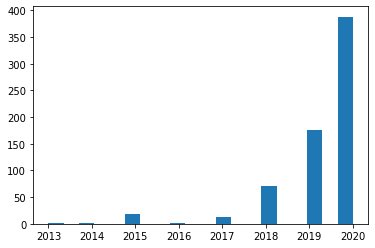

In [96]:
import matplotlib.pyplot as plt
plt.hist(date_final, bins=20)
plt.show()

In [3]:
import pandas as pd
Sample_test_data = pd.read_csv('Sample_data_test.csv',sep=',',encoding = "ISO-8859-1")

In [90]:
Sample_test_data.head()

,Unified_url,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,start_date,wildcard_subdomain,Redirect_URL,Created on 2020,label,certificate_period
0,aruba-covid19.u720493s8q.ha004.t.justns.ru,0,0,0,16,0,0.042553,1,5,1,0,673883,2014,0,0,0,1,0
1,ayudadigitalcovid.org,1,0,0,7,0,0.076923,0,1,0,0,10000000,2020,0,0,1,1,90
2,barcelonaneoville.com.br,1,0,0,6,0,0.068966,0,2,0,0,10000000,2010,0,0,0,1,90
3,combatecovid.org,1,0,0,5,0,0.095238,0,1,0,0,1537499,2020,0,0,1,1,365
4,coronanow.kr,1,0,0,4,0,0.117647,0,1,0,0,649905,2020,0,0,1,1,90


In [91]:
ap=Sample_test_data.groupby(by=['label'])
ap.size()

label
0    675
1    442
dtype: int64

In [92]:
Sample_test_data.loc[Sample_test_data['Unified_url'] == 'coronavirus.ohio.gov']

,Unified_url,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,start_date,wildcard_subdomain,Redirect_URL,Created on 2020,label,certificate_period
889,coronavirus.ohio.gov,0,0,0,3,0,0.111111,0,2,0,7,2612,2020,0,0,1,0,394


In [109]:
import whois 
date_list2 = []
for i in tqdm(Sample_test_data['Unified_url']):
    
    hostname = i
    pattern = "https://|http://|www.|https://www.|http://www."
    pre_pattern_match = re.search(pattern, hostname)
    if pre_pattern_match:
        hostname = hostname[pre_pattern_match.end():]
        post_pattern_match = re.search("/", hostname)
        if post_pattern_match:
            hostname = hostname[:post_pattern_match.start()]
        char = hostname
    else:
        char = hostname
    try:
        domain = whois.query(char)
        print(char)
        print(domain.__dict__)
        print(domain.name)
        print(domain.creation_date)
        
        date_list2.append(domain.creation_date)
    except whois.UnknownTld as e:
        date_list2.append(0)
    except UnicodeDecodeError as e:
        date_list2.append(0)
    except AttributeError as e:
        date_list2.append(0)
    except whois.UnknownDateFormat as e:
        date_list2.append(0)
    except whois.WhoisCommandFailed as e:
        date_list2.append(0)















  0%|          | 0/1229 [00:00<?, ?it/s]

aruba-covid19.u720493s8q.ha004.t.justns.ru
{'name': 'justns.ru', 'registrar': 'RU-CENTER-RU', 'creation_date': datetime.datetime(2014, 7, 12, 9, 52, 51), 'expiration_date': datetime.datetime(2021, 7, 12, 10, 52, 51), 'last_updated': None, 'status': 'REGISTERED, DELEGATED, VERIFIED', 'name_servers': {'ns1.justhost.ru', 'ns2.justhost.ru'}}
justns.ru
2014-07-12 09:52:51
ayudadigitalcovid.org
{'name': 'ayudadigitalcovid.org', 'registrar': 'Soluciones Corporativas IP, SL', 'creation_date': datetime.datetime(2020, 3, 22, 8, 8, 9), 'expiration_date': datetime.datetime(2021, 3, 22, 8, 8, 9), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns50232.webempresa.eu', 'ns50231.webempresa.eu\r', 'ns50231.webempresa.eu', 'ns50232.webempresa.eu\r'}}
ayudadigitalcovid.org
2020-03-22 08:08:09
barcelonaneoville.com.br
{'name': 'barcelonaneoville.com.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(2010, 4, 22, 0, 0), 'expiration_date': datetime.datetime(2021,















  2%|▏         | 27/1229 [00:00<00:29, 40.42it/s]













  7%|▋         | 90/1229 [00:00<00:20, 56.18it/s]

virys-covid19.ru
{'name': 'virys-covid19.ru', 'registrar': 'REGRU-RU', 'creation_date': datetime.datetime(2020, 3, 19, 12, 2, 50), 'expiration_date': datetime.datetime(2021, 3, 19, 12, 2, 50), 'last_updated': None, 'status': 'REGISTERED, DELEGATED, UNVERIFIED', 'name_servers': {'ns1.hosting.reg.ru', 'ns2.hosting.reg.ru'}}
virys-covid19.ru
2020-03-19 12:02:50
whereiscovid.info
{'name': 'whereiscovid.info', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 22, 22, 53, 26), 'expiration_date': datetime.datetime(2021, 3, 22, 22, 53, 26), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dahlia.ns.cloudflare.com\r', 'cleo.ns.cloudflare.com\r'}}
whereiscovid.info
2020-03-22 22:53:26
www.irs.org
{'name': 'irs.org', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(1997, 11, 4, 5, 0), 'expiration_date': datetime.datetime(2027, 11, 3, 5, 0), 'last_updated': None, 'status': 'clientTran

co19.oracle.com
{'name': 'oracle.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1988, 12, 2, 5, 0), 'expiration_date': datetime.datetime(2020, 12, 1, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'orcldns2.ultradns.net\r', 'ns2.p04.dynect.net\r', 'ns1.p04.dynect.net', 'ns2.p04.dynect.net', 'orcldns2.ultradns.net', 'ns4.p04.dynect.net', 'orcldns1.ultradns.com\r', 'ns3.p04.dynect.net', 'ns1.p04.dynect.net\r', 'orcldns1.ultradns.com', 'ns3.p04.dynect.net\r', 'ns4.p04.dynect.net\r'}}
oracle.com
1988-12-02 05:00:00
coronamadrid.com
{'name': 'coronamadrid.com', 'registrar': 'Acens Technologies, S.L.U.', 'creation_date': datetime.datetime(2020, 3, 14, 23, 45, 44), 'expiration_date': datetime.datetime(2022, 3, 14, 23, 45, 44), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'icmcom.madrid.org\r', 'olimpia.madrid.org\r', 'olimpia.madrid.org', 'icmcom.madrid















  9%|▉         | 110/1229 [00:03<00:54, 20.40it/s]

coronavirus.datafree.co
{'name': 'datafree.co', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2018, 1, 16, 18, 20, 12), 'expiration_date': datetime.datetime(2021, 1, 16, 18, 20, 12), 'last_updated': datetime.datetime(2020, 1, 22, 14, 22, 42), 'status': 'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited', 'name_servers': {'ns-127.awsdns-15.com\r', 'ns-1822.awsdns-35.co.uk\r', 'ns-1058.awsdns-04.org\r', 'ns-682.awsdns-21.net\r'}}
datafree.co
2018-01-16 18:20:12
coronavirus.jhu.edu
{'name': 'jhu.edu', 'registrar': '', 'creation_date': datetime.datetime(1987, 3, 19, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2019, 7, 25, 0, 0), 'status': '', 'name_servers': {'ens1.jhmi.edu', 'ens1.jhu.edu'}}
jhu.edu
1987-03-19 00:00:00
















 10%|█         | 124/1229 [00:11<03:53,  4.73it/s]

coronavirus.to.gov.br
{'name': 'to.gov.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(1998, 2, 2, 0, 0), 'expiration_date': None, 'last_updated': datetime.datetime(2019, 1, 4, 0, 0), 'status': '20200819 DSOK', 'name_servers': {'ns.to.gov.br', 'ns4.to.gov.br', 'ns1.to.gov.br', 'ns3.to.gov.br', 'ns2.to.gov.br'}, 'owner': 'Governo do Estado do Tocantins'}
to.gov.br
1998-02-02 00:00:00
covid-19-1-newhavenct.hub.arcgis.com
{'name': 'arcgis.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1999, 6, 9, 22, 21, 51), 'expiration_date': datetime.datetime(2021, 6, 9, 22, 22, 31), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-982.awsdns-58.net\r', 'ns-1062.awsdns-04.org\r', 'ns-423.awsdns-52.com', 'ns-1882.awsdns-43.co.uk', 'ns-982.awsdns-58.net', 'ns-423.awsdns-52.com\r', 'ns-1062.awsdns-04.org', 'ns-1882.awsdns-43.co.uk\r'}}
arcgis.com
1999-06-09 22:21:51
covid-19.iglocska.eu
{'n















 11%|█         | 134/1229 [00:13<03:51,  4.73it/s]

covid19.figshare.com
{'name': 'figshare.com', 'registrar': '1&1 IONOS SE', 'creation_date': datetime.datetime(2010, 12, 7, 10, 28, 14), 'expiration_date': datetime.datetime(2023, 12, 7, 10, 28, 14), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-194.awsdns-24.com\r', 'ns-1455.awsdns-53.org\r', 'ns-1552.awsdns-02.co.uk\r', 'ns-884.awsdns-46.net\r'}}
figshare.com
2010-12-07 10:28:14
covid19.govt.nz
{'name': 'covid19.govt.nz', 'registrar': 'Government Registrar, Department of Internal Affairs', 'creation_date': None, 'expiration_date': None, 'last_updated': datetime.datetime(2020, 8, 16, 23, 31, 53, tzinfo=datetime.timezone(datetime.timedelta(seconds=43200))), 'status': '200 Active', 'name_servers': {'ns5.digital.govt.nz\r', 'ns2.digital.govt.nz\r', 'ns4.digital.govt.nz\r', 'ns1.digital.govt.nz\r', 'ns3.digital.govt.nz\r'}}
covid19.govt.nz
None
covid19.nhp.gov.in
{'name': 'nhp.gov.in', 'registrar': 'National 















 12%|█▏        | 142/1229 [00:14<03:01,  6.00it/s]

covid19india.org
{'name': 'covid19india.org', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 12, 7, 51, 46), 'expiration_date': datetime.datetime(2021, 3, 12, 7, 51, 46), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-a4.googledomains.com', 'ns-cloud-a4.googledomains.com\r', 'ns-cloud-a2.googledomains.com', 'ns-cloud-a3.googledomains.com', 'ns-cloud-a1.googledomains.com', 'ns-cloud-a3.googledomains.com\r', 'ns-cloud-a2.googledomains.com\r', 'ns-cloud-a1.googledomains.com\r'}}
covid19india.org
2020-03-12 07:51:46
covid19japan.com
{'name': 'covid19japan.com', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2020, 2, 14, 17, 19, 59), 'expiration_date': datetime.datetime(2021, 2, 14, 17, 19, 59), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.p03.nsone.net\r', 'dns4.p03.nsone.net',















 13%|█▎        | 158/1229 [00:14<02:14,  7.95it/s]

landing.google.com
{'name': 'google.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1997, 9, 15, 4, 0), 'expiration_date': datetime.datetime(2028, 9, 14, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns3.google.com\r', 'ns2.google.com\r', 'ns2.google.com', 'ns3.google.com', 'ns4.google.com', 'ns1.google.com\r', 'ns4.google.com\r', 'ns1.google.com'}}
google.com
1997-09-15 04:00:00
news.google.com
{'name': 'google.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1997, 9, 15, 4, 0), 'expiration_date': datetime.datetime(2028, 9, 14, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns3.google.com\r', 'ns2.google.com\r', 'ns2.google.com', 'ns3.google.com', 'ns4.google.com', 'ns1.google.com\r', 'ns4.google.com\r', 'ns1.google.com'}}
google.com
1997-09-15 04:00:00
patents.google.com
{'















 18%|█▊        | 222/1229 [00:15<01:31, 10.98it/s]

faq-coronavirus-financial-help.lsign.site
{'name': 'lsign.site', 'registrar': 'Namecheap', 'creation_date': datetime.datetime(2020, 4, 29, 23, 36, 55), 'expiration_date': datetime.datetime(2021, 4, 29, 23, 59, 59), 'last_updated': datetime.datetime(2020, 6, 14, 16, 4, 10), 'status': 'serverHold https://icann.org/epp#serverHold', 'name_servers': {'ara.ns.cloudflare.com', 'hunts.ns.cloudflare.com', 'hunts.ns.cloudflare.com\r', 'ara.ns.cloudflare.com\r'}}
lsign.site
2020-04-29 23:36:55
faq-coronavirus-financial-help.nsign.me
{'name': 'nsign.me', 'registrar': 'NameCheap, Inc.', 'creation_date': None, 'expiration_date': None, 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': set()}
nsign.me
None
gigaplay.com.br
{'name': 'gigaplay.com.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(2007, 4, 9, 0, 0), 'expiration_date': datetime.datetime(2021, 4, 9, 0, 0), 'last_updated': datetime.datetime(2020, 7, 5, 0, 0), 'status': 'published', 'name_servers': {'















 19%|█▊        | 229/1229 [00:17<02:52,  5.79it/s]

help-corona.cn
{'name': 'help-corona.cn', 'registrar': '广东耐思智慧科技有限公司', 'creation_date': datetime.datetime(2020, 4, 30, 4, 14, 59), 'expiration_date': datetime.datetime(2023, 4, 30, 4, 14, 59), 'last_updated': None, 'status': 'clientDeleteProhibited', 'name_servers': {'leif.ns.cloudflare.com', 'pam.ns.cloudflare.com'}}
help-corona.cn
2020-04-30 04:14:59
ing.csam-corona.be
{'name': 'ing.csam-corona.be', 'registrar': '', 'creation_date': None, 'expiration_date': None, 'last_updated': None, 'status': 'NOT ALLOWED', 'name_servers': set()}
ing.csam-corona.be
None
















 19%|█▉        | 234/1229 [00:19<03:34,  4.64it/s]

ing.securecovid-19.noez.me
{'name': 'noez.me', 'registrar': 'RegistryGate GmbH', 'creation_date': None, 'expiration_date': None, 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': set()}
noez.me
None
jshirt.it
{'name': 'jshirt.it', 'registrar': '', 'creation_date': datetime.datetime(2015, 11, 13, 10, 12, 21), 'expiration_date': datetime.datetime(2020, 11, 13, 0, 0), 'last_updated': datetime.datetime(2019, 11, 29, 0, 50, 24), 'status': 'ok', 'name_servers': set()}
jshirt.it
2015-11-13 10:12:21
kampcbation.info
{'name': 'kampcbation.info', 'registrar': 'ALIBABA.COM SINGAPORE E-COMMERCE PRIVATE LIMITED', 'creation_date': datetime.datetime(2020, 1, 19, 15, 40, 51), 'expiration_date': datetime.datetime(2021, 1, 19, 15, 40, 51), 'last_updated': None, 'status': 'serverHold https://icann.org/epp#serverHold', 'name_servers': {'ns7.alidns.com\r', 'ns8.alidns.com\r'}}
kampcbation.info
2020-01-19 15:40:51
















 19%|█▉        | 238/1229 [00:21<04:37,  3.57it/s]

mbhydro-covid19.com
mersrekdocuments.ir
{'name': 'mersrekdocuments.ir', 'registrar': 'nic.ir', 'creation_date': None, 'expiration_date': datetime.datetime(2021, 2, 17, 0, 0), 'last_updated': datetime.datetime(2020, 6, 16, 0, 0), 'status': '', 'name_servers': {'v1s2.xundns.com', 'v1s1.xundns.com'}}
mersrekdocuments.ir
None
















 20%|█▉        | 241/1229 [00:23<06:57,  2.37it/s]

moabcovid.org
{'name': 'moabcovid.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 22, 19, 7, 27), 'expiration_date': datetime.datetime(2021, 3, 22, 19, 7, 27), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns02.domaincontrol.com\r', 'ns01.domaincontrol.com\r'}}
moabcovid.org
2020-03-22 19:07:27
















 20%|█▉        | 241/1229 [00:39<06:57,  2.37it/s]













 20%|█▉        | 242/1229 [01:39<6:22:48, 23.27s/it]













 20%|█▉        | 243/1229 [01:41<4:36:57, 16.85s/it]

no-covid.online
{'name': 'no-covid.online', 'registrar': 'Go Daddy, LLC', 'creation_date': datetime.datetime(2020, 3, 22, 17, 17, 28), 'expiration_date': datetime.datetime(2021, 3, 22, 23, 59, 59), 'last_updated': datetime.datetime(2020, 4, 15, 11, 49, 8), 'status': 'clientRenewProhibited https://icann.org/epp#clientRenewProhibited', 'name_servers': {'ns213.inhostedns.net\r', 'ns113.inhostedns.com\r', 'ns313.inhostedns.org\r'}}
no-covid.online
2020-03-22 17:17:28
















 20%|█▉        | 245/1229 [01:42<3:14:58, 11.89s/it]

notmycovid.org
{'name': 'notmycovid.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 22, 21, 10, 42), 'expiration_date': datetime.datetime(2021, 3, 22, 21, 10, 42), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns72.domaincontrol.com\r', 'ns71.domaincontrol.com\r'}}
notmycovid.org
2020-03-22 21:10:42
















 20%|██        | 248/1229 [01:43<2:17:04,  8.38s/it]

oldschool.runescape-covid-19.info
{'name': 'runescape-covid-19.info', 'registrar': 'Gransy s.r.o. d/b/a subreg.cz', 'creation_date': datetime.datetime(2020, 3, 26, 22, 16, 3), 'expiration_date': datetime.datetime(2021, 3, 26, 22, 16, 3), 'last_updated': None, 'status': 'inactive https://icann.org/epp#inactive', 'name_servers': {'dnssec:'}}
runescape-covid-19.info
2020-03-26 22:16:03
















 20%|██        | 249/1229 [01:43<1:40:33,  6.16s/it]

parismomes.fr
{'name': 'parismomes.fr', 'registrar': 'PRIVIANET', 'creation_date': datetime.datetime(2000, 3, 28, 22, 0), 'expiration_date': None, 'last_updated': datetime.datetime(2019, 9, 10, 10, 20, 7), 'status': 'ACTIVE', 'name_servers': {'owen.ns.cloudflare.com', 'kia.ns.cloudflare.com'}}
parismomes.fr
2000-03-28 22:00:00
















 20%|██        | 250/1229 [01:44<1:13:56,  4.53s/it]

partners-covid.org
{'name': 'partners-covid.org', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 22, 17, 36, 35), 'expiration_date': datetime.datetime(2021, 3, 22, 17, 36, 35), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-c2.googledomains.com', 'ns-cloud-c1.googledomains.com', 'ns-cloud-c4.googledomains.com', 'ns-cloud-c3.googledomains.com', 'ns-cloud-c3.googledomains.com\r', 'ns-cloud-c2.googledomains.com\r', 'ns-cloud-c1.googledomains.com\r', 'ns-cloud-c4.googledomains.com\r'}}
partners-covid.org
2020-03-22 17:36:35
















 20%|██        | 251/1229 [01:45<55:43,  3.42s/it]  

partnerscovid.org
{'name': 'partnerscovid.org', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 22, 17, 36, 30), 'expiration_date': datetime.datetime(2021, 3, 22, 17, 36, 30), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-a4.googledomains.com', 'ns-cloud-a4.googledomains.com\r', 'ns-cloud-a2.googledomains.com', 'ns-cloud-a3.googledomains.com', 'ns-cloud-a1.googledomains.com', 'ns-cloud-a3.googledomains.com\r', 'ns-cloud-a2.googledomains.com\r', 'ns-cloud-a1.googledomains.com\r'}}
partnerscovid.org
2020-03-22 17:36:30
















 21%|██        | 252/1229 [01:47<46:08,  2.83s/it]

permovqu.com
















 21%|██        | 253/1229 [01:47<37:01,  2.28s/it]

pescaturismocorona.it
{'name': 'pescaturismocorona.it', 'registrar': '', 'creation_date': datetime.datetime(2018, 1, 31, 10, 25, 54), 'expiration_date': datetime.datetime(2021, 1, 31, 0, 0), 'last_updated': datetime.datetime(2020, 2, 16, 0, 52, 28), 'status': 'ok', 'name_servers': set()}
pescaturismocorona.it
2018-01-31 10:25:54
















 21%|██        | 255/1229 [01:49<28:44,  1.77s/it]

pre-covid.info
{'name': 'pre-covid.info', 'registrar': 'OpenTLD B.V.', 'creation_date': datetime.datetime(2020, 4, 15, 4, 3, 29), 'expiration_date': datetime.datetime(2021, 4, 15, 4, 3, 29), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.registrant-verification.ispapi.net', 'ns3.registrant-verification.ispapi.net', 'ns2.registrant-verification.ispapi.net\r', 'ns2.registrant-verification.ispapi.net', 'ns3.registrant-verification.ispapi.net\r', 'ns1.registrant-verification.ispapi.net\r'}}
pre-covid.info
2020-04-15 04:03:29
















 21%|██        | 256/1229 [01:49<21:57,  1.35s/it]

previnadocoronasuavida.com
















 21%|██        | 257/1229 [01:50<20:19,  1.25s/it]

recovid.us
{'name': 'recovid.us', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 21, 5, 18, 40), 'expiration_date': datetime.datetime(2021, 3, 21, 5, 18, 40), 'last_updated': None, 'status': 'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited', 'name_servers': {'ns19.domaincontrol.com\r', 'ns20.domaincontrol.com\r'}}
recovid.us
2020-03-21 05:18:40
















 21%|██        | 258/1229 [01:51<16:30,  1.02s/it]

rijosfoods.com.br
{'name': 'rijosfoods.com.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(2016, 10, 5, 0, 0), 'expiration_date': datetime.datetime(2020, 10, 5, 0, 0), 'last_updated': datetime.datetime(2020, 4, 24, 0, 0), 'status': 'published', 'name_servers': {'dns2.serversp.com.br', 'dns1.serversp.com.br'}, 'owner': 'Alberto Carvalho'}
rijosfoods.com.br
2016-10-05 00:00:00
















 21%|██        | 259/1229 [01:51<13:10,  1.23it/s]

runescape-covid19.info
{'name': 'runescape-covid19.info', 'registrar': 'Gransy s.r.o. d/b/a subreg.cz', 'creation_date': datetime.datetime(2020, 3, 22, 14, 55, 7), 'expiration_date': datetime.datetime(2021, 3, 22, 14, 55, 7), 'last_updated': None, 'status': 'inactive https://icann.org/epp#inactive', 'name_servers': {'dnssec:'}}
runescape-covid19.info
2020-03-22 14:55:07
















 21%|██        | 260/1229 [01:51<10:44,  1.50it/s]

saicoronadeixanoistrabalhar.com
















 21%|██        | 261/1229 [01:52<10:29,  1.54it/s]

skcovid.org
{'name': 'skcovid.org', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 22, 20, 4, 41), 'expiration_date': datetime.datetime(2021, 3, 22, 20, 4, 41), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-c2.googledomains.com', 'ns-cloud-c1.googledomains.com', 'ns-cloud-c4.googledomains.com', 'ns-cloud-c3.googledomains.com', 'ns-cloud-c3.googledomains.com\r', 'ns-cloud-c2.googledomains.com\r', 'ns-cloud-c1.googledomains.com\r', 'ns-cloud-c4.googledomains.com\r'}}
skcovid.org
2020-03-22 20:04:41
















 21%|██▏       | 262/1229 [01:52<09:30,  1.70it/s]

solidarite-covid.org
{'name': 'solidarite-covid.org', 'registrar': 'Amazon Registrar, Inc.', 'creation_date': datetime.datetime(2020, 3, 22, 22, 9, 17), 'expiration_date': datetime.datetime(2021, 3, 22, 22, 9, 17), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-552.awsdns-05.net\r', 'ns-1841.awsdns-38.co.uk\r', 'ns-1450.awsdns-53.org\r', 'ns-832.awsdns-40.net\r'}}
solidarite-covid.org
2020-03-22 22:09:17
















 21%|██▏       | 263/1229 [01:53<10:12,  1.58it/s]

standagainstcovid.org
{'name': 'standagainstcovid.org', 'registrar': 'OVH', 'creation_date': datetime.datetime(2020, 3, 22, 14, 43, 14), 'expiration_date': datetime.datetime(2021, 3, 22, 14, 43, 14), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns111.ovh.net', 'dns111.ovh.net\r', 'ns111.ovh.net\r', 'dns111.ovh.net'}}
standagainstcovid.org
2020-03-22 14:43:14
















 21%|██▏       | 264/1229 [01:54<12:28,  1.29it/s]

starilionpla.website
{'name': 'starilionpla.website', 'registrar': 'Namecheap', 'creation_date': datetime.datetime(2020, 3, 19, 4, 36, 37), 'expiration_date': datetime.datetime(2021, 3, 19, 23, 59, 59), 'last_updated': datetime.datetime(2020, 4, 29, 10, 7, 30), 'status': 'serverHold https://icann.org/epp#serverHold', 'name_servers': {'dns1.namecheaphosting.com', 'dns1.namecheaphosting.com\r', 'dns2.namecheaphosting.com', 'dns2.namecheaphosting.com\r'}}
starilionpla.website
2020-03-19 04:36:37
















 22%|██▏       | 265/1229 [02:10<1:25:19,  5.31s/it]

stopcorona.org
{'name': 'stopcorona.org', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2020, 1, 28, 2, 23), 'expiration_date': datetime.datetime(2021, 1, 28, 2, 23), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.registrar-servers.com', 'dns1.registrar-servers.com', 'dns1.registrar-servers.com\r', 'dns2.registrar-servers.com\r'}}
stopcorona.org
2020-01-28 02:23:00
















 22%|██▏       | 266/1229 [02:11<1:06:36,  4.15s/it]

stopcovid.store
{'name': 'stopcovid.store', 'registrar': 'Registrar of Domain Names REG.RU, LLC', 'creation_date': datetime.datetime(2020, 3, 21, 17, 38, 59), 'expiration_date': datetime.datetime(2021, 3, 21, 23, 59, 59), 'last_updated': datetime.datetime(2020, 4, 13, 9, 30, 57), 'status': 'serverHold https://icann.org/epp#serverHold', 'name_servers': {'ns2.reg.ru\r', 'ns1.reg.ru\r'}}
stopcovid.store
2020-03-21 17:38:59
















 22%|██▏       | 267/1229 [02:12<49:49,  3.11s/it]  

t-uber.me
{'name': 't-uber.me', 'registrar': 'GoDaddy.com, LLC', 'creation_date': None, 'expiration_date': None, 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': set()}
t-uber.me
None
















 22%|██▏       | 269/1229 [02:13<36:35,  2.29s/it]

testkitcovid.org
{'name': 'testkitcovid.org', 'registrar': 'united-domains AG', 'creation_date': datetime.datetime(2020, 3, 22, 9, 2, 58), 'expiration_date': datetime.datetime(2021, 3, 22, 9, 2, 58), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.wixdns.net\r', 'ns0.wixdns.net\r'}}
testkitcovid.org
2020-03-22 09:02:58
















 22%|██▏       | 271/1229 [02:14<27:33,  1.73s/it]

thechristianwardrobe.us
{'name': 'thechristianwardrobe.us', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2015, 11, 3, 20, 41, 51), 'expiration_date': datetime.datetime(2020, 11, 2, 23, 59, 59), 'last_updated': None, 'status': 'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited', 'name_servers': {'ns38.domaincontrol.com\r', 'ns37.domaincontrol.com\r'}}
thechristianwardrobe.us
2015-11-03 20:41:51
















 22%|██▏       | 272/1229 [02:14<20:47,  1.30s/it]

todoscontraocovid19.com
















 23%|██▎       | 279/1229 [02:15<15:02,  1.05it/s]

uman4covid.org
{'name': 'uman4covid.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(2020, 3, 22, 13, 4, 39), 'expiration_date': datetime.datetime(2021, 3, 22, 13, 4, 39), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns3.wixdns.net\r', 'ns3.wixdns.net', 'ns2.wixdns.net\r', 'ns2.wixdns.net'}}
uman4covid.org
2020-03-22 13:04:39
















 23%|██▎       | 280/1229 [02:15<12:04,  1.31it/s]

verizoncovid-12.com
















 23%|██▎       | 281/1229 [02:16<12:37,  1.25it/s]

videoonlinefrecorona.xyz
















 23%|██▎       | 282/1229 [02:17<14:51,  1.06it/s]

villacorona.pl
{'name': 'villacorona.pl', 'registrar': '', 'creation_date': datetime.datetime(2005, 7, 18, 9, 58, 49), 'expiration_date': None, 'last_updated': datetime.datetime(2020, 7, 21, 10, 18, 7), 'status': '', 'name_servers': {'ns10.az.pl', 'ns11.az.pl'}}
villacorona.pl
2005-07-18 09:58:49
















 23%|██▎       | 283/1229 [02:18<12:15,  1.29it/s]

webbfilms.co.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(2010, 9, 28, 0, 0), 'expiration_date': datetime.datetime(2020, 9, 28, 0, 0), 'last_updated': datetime.datetime(2018, 8, 29, 0, 0), 'status': '', 'name_servers': {'ns1.livedns.co.uk'}}

2010-09-28 00:00:00
















 23%|██▎       | 284/1229 [02:19<16:41,  1.06s/it]

wefightcovid.se
{'name': 'wefightcovid.se', 'registrar': 'Internetbolaget', 'creation_date': datetime.datetime(2020, 3, 23, 0, 0), 'expiration_date': datetime.datetime(2021, 3, 23, 0, 0), 'last_updated': datetime.datetime(2020, 3, 23, 0, 0), 'status': 'ok', 'name_servers': {'ns.ettnet.se', 'ns2.ettnet.se'}}
wefightcovid.se
2020-03-23 00:00:00
















 23%|██▎       | 286/1229 [02:20<12:49,  1.23it/s]

www.brunoespanha.com
www.cbsrealitychase.com
www.cherrydancefitness.co.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(2012, 6, 2, 0, 0), 'expiration_date': datetime.datetime(2024, 6, 2, 0, 0), 'last_updated': datetime.datetime(2020, 8, 16, 0, 0), 'status': '', 'name_servers': {'ns27.d9hosting.com\r'}}

2012-06-02 00:00:00
















 24%|██▎       | 291/1229 [02:21<09:50,  1.59it/s]

www.gov-ca-covid19.org
{'name': 'gov-ca-covid19.org', 'registrar': 'Shinjiru MSC Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 27, 19, 10, 25), 'expiration_date': datetime.datetime(2021, 3, 27, 19, 10, 25), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.ipchina163.com\r', 'ns2.metaldns.com\r', 'ns2.ipchina163.com', 'ns1.ipchina163.com', 'ns1.metaldns.com', 'ns1.metaldns.com\r', 'ns2.metaldns.com', 'ns1.ipchina163.com\r'}}
gov-ca-covid19.org
2020-03-27 19:10:25
















 24%|██▍       | 292/1229 [02:22<09:46,  1.60it/s]

www.lamalug.org
{'name': 'lamalug.org', 'registrar': 'Namesilo, LLC', 'creation_date': datetime.datetime(2001, 1, 15, 8, 11, 42), 'expiration_date': datetime.datetime(2021, 1, 15, 8, 11, 42), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'kia.ns.cloudflare.com', 'logan.ns.cloudflare.com', 'kia.ns.cloudflare.com\r', 'logan.ns.cloudflare.com\r'}}
lamalug.org
2001-01-15 08:11:42
www.pescaturismocorona.it
{'name': 'pescaturismocorona.it', 'registrar': '', 'creation_date': datetime.datetime(2018, 1, 31, 10, 25, 54), 'expiration_date': datetime.datetime(2021, 1, 31, 0, 0), 'last_updated': datetime.datetime(2020, 2, 16, 0, 52, 28), 'status': 'ok', 'name_servers': set()}
pescaturismocorona.it
2018-01-31 10:25:54
















 24%|██▍       | 295/1229 [02:22<07:31,  2.07it/s]

www.stpl.ca
















 24%|██▍       | 298/1229 [02:23<06:14,  2.49it/s]













 24%|██▍       | 299/1229 [02:23<07:04,  2.19it/s]

19covid-gouv12.com
{'name': '19covid-gouv12.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 21, 2, 40, 57), 'expiration_date': datetime.datetime(2021, 3, 21, 2, 40, 57), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.steeldns.com\r', 'ns2.steeldns.com\r', 'ns2.steeldns.com', 'ns1.steeldns.com'}}
19covid-gouv12.com
2020-03-21 02:40:57
















 24%|██▍       | 300/1229 [02:24<08:50,  1.75it/s]

airbnb.id-covid19.com
{'name': 'id-covid19.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 20, 12, 9, 42), 'expiration_date': datetime.datetime(2021, 3, 20, 12, 9, 42), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.argondns.net', 'ns1.argondns.net\r', 'ns1.argondns.net', 'ns2.argondns.net\r'}}
id-covid19.com
2020-03-20 12:09:42
















 24%|██▍       | 301/1229 [02:25<09:00,  1.72it/s]

amelenedez.com
{'name': 'amelenedez.com', 'registrar': 'OVH sas', 'creation_date': datetime.datetime(2020, 4, 16, 11, 31, 22), 'expiration_date': datetime.datetime(2021, 4, 16, 11, 31, 22), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns16.ovh.net\r', 'dns16.ovh.net', 'ns16.ovh.net\r', 'ns16.ovh.net'}}
amelenedez.com
2020-04-16 11:31:22
















 25%|██▍       | 302/1229 [02:25<09:19,  1.66it/s]

amelzendez.com
{'name': 'amelzendez.com', 'registrar': 'OVH sas', 'creation_date': datetime.datetime(2020, 4, 16, 11, 28, 27), 'expiration_date': datetime.datetime(2021, 4, 16, 11, 28, 27), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns16.ovh.net\r', 'dns16.ovh.net', 'ns16.ovh.net\r', 'ns16.ovh.net'}}
amelzendez.com
2020-04-16 11:28:27
















 25%|██▍       | 303/1229 [02:26<10:10,  1.52it/s]

americanascovidshop.com
{'name': 'americanascovidshop.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 5, 7, 22, 23, 35), 'expiration_date': datetime.datetime(2021, 5, 7, 22, 23, 35), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'cass.ns.cloudflare.com', 'cass.ns.cloudflare.com\r', 'dax.ns.cloudflare.com', 'dax.ns.cloudflare.com\r'}}
americanascovidshop.com
2020-05-07 22:23:35
















 25%|██▍       | 304/1229 [02:27<09:45,  1.58it/s]

amqelendez.com
{'name': 'amqelendez.com', 'registrar': 'OVH sas', 'creation_date': datetime.datetime(2020, 4, 16, 11, 27, 20), 'expiration_date': datetime.datetime(2021, 4, 16, 11, 27, 20), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns16.ovh.net\r', 'dns16.ovh.net', 'ns16.ovh.net\r', 'ns16.ovh.net'}}
amqelendez.com
2020-04-16 11:27:20
















 25%|██▍       | 305/1229 [02:27<09:56,  1.55it/s]

ateaseoutfitters.com
{'name': 'ateaseoutfitters.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2014, 8, 4, 17, 29, 31), 'expiration_date': datetime.datetime(2021, 8, 4, 17, 29, 31), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns23.domaincontrol.com\r', 'ns24.domaincontrol.com\r'}}
ateaseoutfitters.com
2014-08-04 17:29:31
















 25%|██▍       | 306/1229 [02:28<10:03,  1.53it/s]

beccahorner.com
{'name': 'beccahorner.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2011, 12, 30, 18, 42, 36), 'expiration_date': datetime.datetime(2021, 12, 30, 18, 42, 36), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns23.domaincontrol.com\r', 'ns24.domaincontrol.com\r'}}
beccahorner.com
2011-12-30 18:42:36
















 25%|██▍       | 307/1229 [02:29<09:24,  1.63it/s]

bell-covid19.com
{'name': 'bell-covid19.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 22, 20, 34, 37), 'expiration_date': datetime.datetime(2021, 3, 22, 20, 34, 37), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.ipchina163.com\r', 'ns2.metaldns.com\r', 'ns2.ipchina163.com', 'ns1.ipchina163.com', 'ns1.metaldns.com', 'ns1.metaldns.com\r', 'ns2.metaldns.com', 'ns1.ipchina163.com\r'}}
bell-covid19.com
2020-03-22 20:34:37
















 25%|██▌       | 308/1229 [02:36<40:40,  2.65s/it]

bhleon.com-do.serfidelo.com
{'name': 'serfidelo.com', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2020, 1, 14, 20, 33, 24), 'expiration_date': datetime.datetime(2021, 1, 14, 20, 33, 24), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns1.namecheaphosting.com', 'dns1.namecheaphosting.com\r', 'dns2.namecheaphosting.com', 'dns2.namecheaphosting.com\r'}}
serfidelo.com
2020-01-14 20:33:24
















 25%|██▌       | 309/1229 [02:37<33:52,  2.21s/it]

bokepspecialcovid19.event-indo.com
{'name': 'event-indo.com', 'registrar': 'Wild West Domains, LLC', 'creation_date': datetime.datetime(2020, 2, 23, 0, 6, 37), 'expiration_date': datetime.datetime(2021, 2, 23, 0, 6, 37), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.frostzhost.com\r', 'ns1.frostzhost.com\r'}}
event-indo.com
2020-02-23 00:06:37
















 25%|██▌       | 310/1229 [02:38<28:49,  1.88s/it]

bp-formularios-covid19.azurewebsites.net
{'name': 'azurewebsites.net', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2012, 1, 24, 18, 43, 51), 'expiration_date': datetime.datetime(2021, 1, 24, 18, 43, 51), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2prod.122.azuredns-prd.org', 'ns1prod.122.azuredns-prd.org', 'ns2prod.122.azuredns-prd.org\r', 'ns2prod.122.azuredns-prd.info', 'ns1prod.122.azuredns-prd.info\r', 'ns1prod.122.azuredns-prd.org\r', 'ns2prod.122.azuredns-prd.info\r', 'ns1prod.122.azuredns-prd.info'}}
azurewebsites.net
2012-01-24 18:43:51
















 25%|██▌       | 311/1229 [02:39<22:37,  1.48s/it]

bravecovid.com
{'name': 'bravecovid.com', 'registrar': 'Amazon Registrar, Inc.', 'creation_date': datetime.datetime(2020, 3, 21, 16, 20, 40), 'expiration_date': datetime.datetime(2021, 3, 21, 16, 20, 40), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns-1116.awsdns-11.org\r', 'ns-119.awsdns-14.com\r', 'ns-666.awsdns-19.net\r', 'ns-1856.awsdns-40.co.uk\r'}}
bravecovid.com
2020-03-21 16:20:40
















 25%|██▌       | 312/1229 [02:40<20:52,  1.37s/it]

business-facebook-covid19.com
{'name': 'business-facebook-covid19.com', 'registrar': 'Register.com, Inc.', 'creation_date': datetime.datetime(2020, 3, 13, 18, 16, 55), 'expiration_date': datetime.datetime(2021, 3, 13, 18, 16, 55), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.register.com', 'dns2.register.com\r', 'dns1.register.com\r', 'dns1.register.com'}}
business-facebook-covid19.com
2020-03-13 18:16:55
















 25%|██▌       | 313/1229 [02:41<17:44,  1.16s/it]

carrefourcovid.com
{'name': 'carrefourcovid.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 5, 8, 17, 24, 17), 'expiration_date': datetime.datetime(2021, 5, 8, 17, 24, 17), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
carrefourcovid.com
2020-05-08 17:24:17
















 26%|██▌       | 314/1229 [02:42<16:32,  1.08s/it]

cdestudiantes.com
{'name': 'cdestudiantes.com', 'registrar': 'Hosting Concepts B.V. d/b/a Openprovider', 'creation_date': datetime.datetime(2017, 12, 15, 18, 3, 40), 'expiration_date': datetime.datetime(2020, 12, 15, 18, 3, 40), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.teconecto.es', 'ns1.teconecto.es', 'ns1.teconecto.es\r', 'ns2.teconecto.es\r'}}
cdestudiantes.com
2017-12-15 18:03:40
















 26%|██▌       | 315/1229 [02:42<15:59,  1.05s/it]

cecollc.com
{'name': 'cecollc.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2014, 6, 30, 6, 57, 50), 'expiration_date': datetime.datetime(2021, 6, 30, 6, 57, 50), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ice2.brawaa.com', 'ice1.brawaa.com\r', 'ice1.brawaa.com', 'ice2.brawaa.com\r'}}
cecollc.com
2014-06-30 06:57:50
















 26%|██▌       | 316/1229 [02:43<14:52,  1.02it/s]

chasecovid19t.com
{'name': 'chasecovid19t.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 22, 22, 51, 18), 'expiration_date': datetime.datetime(2021, 3, 22, 22, 51, 18), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns66.domaincontrol.com\r', 'ns65.domaincontrol.com\r'}}
chasecovid19t.com
2020-03-22 22:51:18
















 26%|██▌       | 317/1229 [02:44<14:07,  1.08it/s]

childcarecorona.com
{'name': 'childcarecorona.com', 'registrar': 'Firstround Names LLC', 'creation_date': datetime.datetime(2019, 12, 2, 19, 24, 43), 'expiration_date': datetime.datetime(2020, 12, 2, 19, 24, 43), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns1626.ztomy.com', 'ns1626.ztomy.com\r', 'ns2626.ztomy.com', 'ns2626.ztomy.com\r'}}
childcarecorona.com
2019-12-02 19:24:43
















 26%|██▌       | 318/1229 [02:45<13:39,  1.11it/s]

chirurgiehmrcovid.com
{'name': 'chirurgiehmrcovid.com', 'registrar': 'Wix.com Ltd.', 'creation_date': datetime.datetime(2020, 3, 22, 19, 29, 2), 'expiration_date': datetime.datetime(2021, 3, 22, 19, 29, 2), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns12.wixdns.net', 'ns12.wixdns.net\r', 'ns13.wixdns.net', 'ns13.wixdns.net\r'}}
chirurgiehmrcovid.com
2020-03-22 19:29:02
















 26%|██▌       | 319/1229 [02:45<11:58,  1.27it/s]

cinenagari.com
{'name': 'cinenagari.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2020, 1, 12, 16, 37, 13), 'expiration_date': datetime.datetime(2021, 1, 12, 16, 37, 13), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.suspended-domain.com', 'ns2.suspended-domain.com', 'ns1.suspended-domain.com\r', 'ns2.suspended-domain.com\r'}}
cinenagari.com
2020-01-12 16:37:13
















 26%|██▌       | 320/1229 [02:47<15:49,  1.04s/it]

cmattayers.com
{'name': 'cmattayers.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2010, 4, 8, 13, 58, 54), 'expiration_date': datetime.datetime(2021, 4, 8, 13, 58, 54), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns43.domaincontrol.com\r', 'ns44.domaincontrol.com\r'}}
cmattayers.com
2010-04-08 13:58:54
















 26%|██▌       | 321/1229 [02:48<14:28,  1.05it/s]

computecovid.com
{'name': 'computecovid.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 22, 22, 3, 23), 'expiration_date': datetime.datetime(2021, 3, 22, 22, 3, 23), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-a4.googledomains.com', 'ns-cloud-a4.googledomains.com\r', 'ns-cloud-a2.googledomains.com', 'ns-cloud-a3.googledomains.com', 'ns-cloud-a1.googledomains.com', 'ns-cloud-a3.googledomains.com\r', 'ns-cloud-a2.googledomains.com\r', 'ns-cloud-a1.googledomains.com\r'}}
computecovid.com
2020-03-22 22:03:23
















 26%|██▌       | 322/1229 [02:49<13:50,  1.09it/s]

corona-masr2.com
{'name': 'corona-masr2.com', 'registrar': 'Everyones Internet, Ltd. dba SoftLayer', 'creation_date': datetime.datetime(2020, 3, 18, 18, 55, 6), 'expiration_date': datetime.datetime(2021, 3, 18, 18, 55, 6), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'ns1.softlayer.com', 'ns2.softlayer.com\r', 'ns2.softlayer.com', 'ns1.softlayer.com\r'}}
corona-masr2.com
2020-03-18 18:55:06
















 26%|██▋       | 323/1229 [02:50<13:53,  1.09it/s]

corona-masr21.com
{'name': 'corona-masr21.com', 'registrar': 'Everyones Internet, Ltd. dba SoftLayer', 'creation_date': datetime.datetime(2020, 3, 18, 18, 56, 29), 'expiration_date': datetime.datetime(2021, 3, 18, 18, 56, 29), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'ns1.softlayer.com', 'ns2.softlayer.com\r', 'ns2.softlayer.com', 'ns1.softlayer.com\r'}}
corona-masr21.com
2020-03-18 18:56:29
















 26%|██▋       | 324/1229 [02:50<12:50,  1.18it/s]

corona-masr3.com
{'name': 'corona-masr3.com', 'registrar': 'Everyones Internet, Ltd. dba SoftLayer', 'creation_date': datetime.datetime(2020, 3, 18, 18, 55, 22), 'expiration_date': datetime.datetime(2021, 3, 18, 18, 55, 22), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'ns1.softlayer.com', 'ns2.softlayer.com\r', 'ns2.softlayer.com', 'ns1.softlayer.com\r'}}
corona-masr3.com
2020-03-18 18:55:22
















 26%|██▋       | 325/1229 [02:51<12:06,  1.24it/s]

corona-virusus.com
{'name': 'corona-virusus.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 23, 22, 14, 9), 'expiration_date': datetime.datetime(2021, 3, 23, 22, 14, 9), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns61.domaincontrol.com\r', 'ns62.domaincontrol.com\r'}}
corona-virusus.com
2020-03-23 22:14:09
















 27%|██▋       | 326/1229 [02:52<13:23,  1.12it/s]

coronabye.com
{'name': 'coronabye.com', 'registrar': 'FastDomain Inc.', 'creation_date': datetime.datetime(2020, 1, 30, 15, 45, 13), 'expiration_date': datetime.datetime(2021, 1, 30, 15, 45, 13), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns2.bluehost.com\r', 'ns1.bluehost.com\r', 'ns2.bluehost.com', 'ns1.bluehost.com'}}
coronabye.com
2020-01-30 15:45:13
















 27%|██▋       | 327/1229 [02:53<11:47,  1.28it/s]

coronadocruisers.com
{'name': 'coronadocruisers.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2016, 5, 21, 21, 3, 37), 'expiration_date': datetime.datetime(2021, 5, 21, 21, 3, 37), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns11.domaincontrol.com\r', 'ns12.domaincontrol.com\r'}}
coronadocruisers.com
2016-05-21 21:03:37
















 27%|██▋       | 328/1229 [02:55<18:38,  1.24s/it]

coronavgame1.atwebpages.com
{'name': 'atwebpages.com', 'registrar': 'eNom, LLC', 'creation_date': datetime.datetime(2007, 5, 11, 12, 5, 55), 'expiration_date': datetime.datetime(2021, 5, 11, 12, 5, 55), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns2.runhosting.com\r', 'ns1.runhosting.com\r'}}
atwebpages.com
2007-05-11 12:05:55
















 27%|██▋       | 329/1229 [02:56<17:51,  1.19s/it]

coronavgame2.atwebpages.com
{'name': 'atwebpages.com', 'registrar': 'eNom, LLC', 'creation_date': datetime.datetime(2007, 5, 11, 12, 5, 55), 'expiration_date': datetime.datetime(2021, 5, 11, 12, 5, 55), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns2.runhosting.com\r', 'ns1.runhosting.com\r'}}
atwebpages.com
2007-05-11 12:05:55
















 27%|██▋       | 330/1229 [02:57<14:51,  1.01it/s]

coronavgame3.atwebpages.com
{'name': 'atwebpages.com', 'registrar': 'eNom, LLC', 'creation_date': datetime.datetime(2007, 5, 11, 12, 5, 55), 'expiration_date': datetime.datetime(2021, 5, 11, 12, 5, 55), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns2.runhosting.com\r', 'ns1.runhosting.com\r'}}
atwebpages.com
2007-05-11 12:05:55
















 27%|██▋       | 331/1229 [02:58<15:07,  1.01s/it]

coronavirusbacktoreality.com
{'name': 'coronavirusbacktoreality.com', 'registrar': 'Wix.com Ltd.', 'creation_date': datetime.datetime(2020, 3, 21, 15, 51, 10), 'expiration_date': datetime.datetime(2021, 3, 21, 15, 51, 10), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns12.wixdns.net', 'ns12.wixdns.net\r', 'ns13.wixdns.net', 'ns13.wixdns.net\r'}}
coronavirusbacktoreality.com
2020-03-21 15:51:10
















 27%|██▋       | 332/1229 [02:58<14:32,  1.03it/s]

coronavirusfactory.com
{'name': 'coronavirusfactory.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 28, 15, 11, 17), 'expiration_date': datetime.datetime(2021, 3, 28, 15, 11, 17), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns19.domaincontrol.com\r', 'ns20.domaincontrol.com\r'}}
coronavirusfactory.com
2020-03-28 15:11:17
















 27%|██▋       | 333/1229 [02:59<12:13,  1.22it/s]

coronavirusfeedback.com
{'name': 'coronavirusfeedback.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 23, 22, 14, 10), 'expiration_date': datetime.datetime(2021, 3, 23, 22, 14, 10), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
coronavirusfeedback.com
2020-03-23 22:14:10
















 27%|██▋       | 334/1229 [03:00<13:32,  1.10it/s]

coronavirusfinancial.net
{'name': 'coronavirusfinancial.net', 'registrar': 'Wix.com Ltd.', 'creation_date': datetime.datetime(2020, 3, 22, 1, 39, 30), 'expiration_date': datetime.datetime(2021, 3, 22, 1, 39, 30), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.wixdns.net\r', 'ns0.wixdns.net', 'ns0.wixdns.net\r', 'ns1.wixdns.net'}}
coronavirusfinancial.net
2020-03-22 01:39:30
















 27%|██▋       | 335/1229 [03:01<13:32,  1.10it/s]

coronavirusonooeir.huidps.com
{'name': 'huidps.com', 'registrar': 'Launchpad.com Inc.', 'creation_date': datetime.datetime(2020, 3, 27, 1, 28, 36), 'expiration_date': datetime.datetime(2021, 3, 27, 1, 28, 36), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns6270.hostgator.com\r', 'ns6270.hostgator.com', 'ns6269.hostgator.com\r', 'ns6269.hostgator.com'}}
huidps.com
2020-03-27 01:28:36
















 27%|██▋       | 336/1229 [03:03<18:08,  1.22s/it]

coronavirusonooeir.luxciosoiop.com
{'name': 'luxciosoiop.com', 'registrar': 'Launchpad.com Inc.', 'creation_date': datetime.datetime(2019, 12, 2, 12, 26, 8), 'expiration_date': datetime.datetime(2020, 12, 2, 12, 26, 8), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns6241.hostgator.com\r', 'ns6241.hostgator.com', 'ns6242.hostgator.com', 'ns6242.hostgator.com\r'}}
luxciosoiop.com
2019-12-02 12:26:08
















 27%|██▋       | 337/1229 [03:03<15:10,  1.02s/it]

coronavirustrouble.com
{'name': 'coronavirustrouble.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 23, 22, 14, 10), 'expiration_date': datetime.datetime(2021, 3, 23, 22, 14, 10), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns19.domaincontrol.com\r', 'ns20.domaincontrol.com\r'}}
coronavirustrouble.com
2020-03-23 22:14:10
















 28%|██▊       | 338/1229 [03:04<13:37,  1.09it/s]

coronawire.com
{'name': 'coronawire.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2019, 10, 20, 14, 21, 1), 'expiration_date': datetime.datetime(2022, 10, 20, 14, 21, 1), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns63.domaincontrol.com\r', 'ns64.domaincontrol.com\r'}}
coronawire.com
2019-10-20 14:21:01
















 28%|██▊       | 339/1229 [03:05<11:34,  1.28it/s]

coronawires.com
{'name': 'coronawires.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2019, 10, 20, 14, 21), 'expiration_date': datetime.datetime(2022, 10, 20, 14, 21), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns11.domaincontrol.com\r', 'ns12.domaincontrol.com\r'}}
coronawires.com
2019-10-20 14:21:00
















 28%|██▊       | 340/1229 [03:06<16:33,  1.12s/it]

cottonbeatscovid.com
{'name': 'cottonbeatscovid.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2020, 3, 22, 18, 0, 19), 'expiration_date': datetime.datetime(2021, 3, 22, 18, 0, 19), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns-cloud-b4.googledomains.com\r', 'ns-cloud-b2.googledomains.com', 'ns-cloud-b3.googledomains.com\r', 'ns-cloud-b1.googledomains.com\r', 'ns-cloud-b4.googledomains.com', 'ns-cloud-b1.googledomains.com', 'ns-cloud-b2.googledomains.com\r', 'ns-cloud-b3.googledomains.com'}}
cottonbeatscovid.com
2020-03-22 18:00:19
















 28%|██▊       | 341/1229 [03:07<14:05,  1.05it/s]

courseaholic.com
{'name': 'courseaholic.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2007, 2, 28, 9, 39, 45), 'expiration_date': datetime.datetime(2021, 2, 28, 9, 39, 45), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'mark.ns.cloudflare.com\r', 'riya.ns.cloudflare.com\r'}}
courseaholic.com
2007-02-28 09:39:45
















 28%|██▊       | 342/1229 [03:08<15:40,  1.06s/it]

covid-19.xxx-wa.com
{'name': 'xxx-wa.com', 'registrar': 'Wild West Domains, LLC', 'creation_date': datetime.datetime(2020, 2, 4, 6, 15, 40), 'expiration_date': datetime.datetime(2021, 2, 4, 6, 15, 40), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'kenia.ns.cloudflare.com\r', 'hans.ns.cloudflare.com\r'}}
xxx-wa.com
2020-02-04 06:15:40
















 28%|██▊       | 343/1229 [03:09<13:47,  1.07it/s]

covid-19art.com
{'name': 'covid-19art.com', 'registrar': 'Wix.com Ltd.', 'creation_date': datetime.datetime(2020, 3, 22, 23, 55, 17), 'expiration_date': datetime.datetime(2021, 3, 22, 23, 55, 17), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns5.wixdns.net', 'ns4.wixdns.net', 'ns4.wixdns.net\r', 'ns5.wixdns.net\r'}}
covid-19art.com
2020-03-22 23:55:17
















 28%|██▊       | 344/1229 [03:10<12:57,  1.14it/s]

covid19-credits.com
{'name': 'covid19-credits.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 4, 5, 15, 0, 18), 'expiration_date': datetime.datetime(2021, 4, 5, 15, 0, 18), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-cloud-a4.googledomains.com', 'ns-cloud-a4.googledomains.com\r', 'ns-cloud-a2.googledomains.com', 'ns-cloud-a3.googledomains.com', 'ns-cloud-a1.googledomains.com', 'ns-cloud-a3.googledomains.com\r', 'ns-cloud-a2.googledomains.com\r', 'ns-cloud-a1.googledomains.com\r'}}
covid19-credits.com
2020-04-05 15:00:18
















 28%|██▊       | 345/1229 [03:10<11:52,  1.24it/s]

covid19-infor.net
{'name': 'covid19-infor.net', 'registrar': 'NameSilo, LLC', 'creation_date': datetime.datetime(2020, 3, 26, 20, 7, 3), 'expiration_date': datetime.datetime(2021, 3, 26, 20, 7, 3), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'ns100.viasky.co\r', 'ns101.viasky.co\r'}}
covid19-infor.net
2020-03-26 20:07:03
















 28%|██▊       | 346/1229 [03:14<24:03,  1.63s/it]

covid19-seguranca.autosmsbb.com
{'name': 'autosmsbb.com', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2020, 3, 18, 13, 7, 1), 'expiration_date': datetime.datetime(2021, 3, 18, 13, 7, 1), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'maxine.ns.cloudflare.com\r', 'apollo.ns.cloudflare.com', 'apollo.ns.cloudflare.com\r', 'maxine.ns.cloudflare.com'}}
autosmsbb.com
2020-03-18 13:07:01
















 28%|██▊       | 347/1229 [03:15<21:48,  1.48s/it]

covid19.id-airbnb.com
{'name': 'id-airbnb.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 27, 18, 4, 43), 'expiration_date': datetime.datetime(2021, 3, 27, 18, 4, 43), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.argondns.net', 'ns1.argondns.net\r', 'ns1.argondns.net', 'ns2.argondns.net\r'}}
id-airbnb.com
2020-03-27 18:04:43
















 28%|██▊       | 348/1229 [03:16<19:44,  1.34s/it]

covid19voip.com
{'name': 'covid19voip.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 22, 6, 52, 25), 'expiration_date': datetime.datetime(2021, 3, 22, 6, 52, 25), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-cloud-e1.googledomains.com', 'ns-cloud-e4.googledomains.com\r', 'ns-cloud-e3.googledomains.com', 'ns-cloud-e2.googledomains.com\r', 'ns-cloud-e4.googledomains.com', 'ns-cloud-e2.googledomains.com', 'ns-cloud-e1.googledomains.com\r', 'ns-cloud-e3.googledomains.com\r'}}
covid19voip.com
2020-03-22 06:52:25
















 28%|██▊       | 349/1229 [03:17<18:56,  1.29s/it]

covidreamz.com
{'name': 'covidreamz.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 5, 12, 1, 48, 21), 'expiration_date': datetime.datetime(2021, 5, 12, 1, 48, 21), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
covidreamz.com
2020-05-12 01:48:21
















 28%|██▊       | 350/1229 [03:18<16:11,  1.11s/it]

covidsome.com
{'name': 'covidsome.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 4, 28, 17, 42, 14), 'expiration_date': datetime.datetime(2021, 4, 28, 17, 42, 14), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-b4.googledomains.com\r', 'ns-cloud-b2.googledomains.com', 'ns-cloud-b3.googledomains.com\r', 'ns-cloud-b1.googledomains.com\r', 'ns-cloud-b4.googledomains.com', 'ns-cloud-b1.googledomains.com', 'ns-cloud-b2.googledomains.com\r', 'ns-cloud-b3.googledomains.com'}}
covidsome.com
2020-04-28 17:42:14
















 29%|██▊       | 351/1229 [03:19<14:21,  1.02it/s]

craemrcovid19.com
{'name': 'craemrcovid19.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 26, 13, 14, 50), 'expiration_date': datetime.datetime(2021, 3, 26, 13, 14, 50), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.ipchina163.com\r', 'ns2.metaldns.com\r', 'ns2.ipchina163.com', 'ns1.ipchina163.com', 'ns1.metaldns.com', 'ns1.metaldns.com\r', 'ns2.metaldns.com', 'ns1.ipchina163.com\r'}}
craemrcovid19.com
2020-03-26 13:14:50
















 29%|██▊       | 352/1229 [03:19<13:02,  1.12it/s]

crookedcovid.com
{'name': 'crookedcovid.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2020, 3, 21, 20, 27, 40), 'expiration_date': datetime.datetime(2021, 3, 21, 20, 27, 40), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.hover.com', 'ns1.hover.com\r', 'ns2.hover.com', 'ns2.hover.com\r'}}
crookedcovid.com
2020-03-21 20:27:40
















 29%|██▊       | 353/1229 [03:20<11:29,  1.27it/s]

crushcovid.net
{'name': 'crushcovid.net', 'registrar': 'DNC Holdings, Inc.', 'creation_date': datetime.datetime(2020, 3, 21, 21, 12, 8), 'expiration_date': datetime.datetime(2021, 3, 21, 21, 12, 8), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1045.ui-dns.de\r', 'ns1045.ui-dns.org', 'ns1045.ui-dns.de', 'ns1045.ui-dns.org\r', 'ns1045.ui-dns.biz', 'ns1045.ui-dns.com\r', 'ns1045.ui-dns.biz\r', 'ns1045.ui-dns.com'}}
crushcovid.net
2020-03-21 21:12:08
















 29%|██▉       | 354/1229 [03:21<11:38,  1.25it/s]

curbsidecovid.com
{'name': 'curbsidecovid.com', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(2020, 3, 21, 21, 54, 10), 'expiration_date': datetime.datetime(2021, 3, 21, 21, 54, 10), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns14.worldnic.com\r', 'ns13.worldnic.com\r', 'ns13.worldnic.com', 'ns14.worldnic.com'}}
curbsidecovid.com
2020-03-21 21:54:10
















 29%|██▉       | 355/1229 [03:22<12:12,  1.19it/s]

dailycorona.bitbyteplay.com
{'name': 'bitbyteplay.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2019, 2, 4, 17, 1, 36), 'expiration_date': datetime.datetime(2022, 2, 4, 17, 1, 36), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.smrishad.com\r', 'ns1.smrishad.com\r', 'ns1.smrishad.com', 'ns2.smrishad.com'}}
bitbyteplay.com
2019-02-04 17:01:36
















 29%|██▉       | 356/1229 [03:22<11:25,  1.27it/s]

daneili-corus.com
{'name': 'daneili-corus.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2020, 1, 23, 4, 59, 43), 'expiration_date': datetime.datetime(2021, 1, 23, 4, 59, 43), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'mercury.monovm.com\r', 'mars.monovm.com', 'earth.monovm.com', 'earth.monovm.com\r', 'venus.monovm.com\r', 'mars.monovm.com\r', 'venus.monovm.com', 'mercury.monovm.com'}}
daneili-corus.com
2020-01-23 04:59:43
















 29%|██▉       | 357/1229 [03:23<10:29,  1.39it/s]

dentalleadgroup.com
{'name': 'dentalleadgroup.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2017, 10, 10, 21, 32, 49), 'expiration_date': datetime.datetime(2020, 10, 10, 21, 32, 49), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'pdns11.domaincontrol.com\r', 'pdns12.domaincontrol.com\r'}}
dentalleadgroup.com
2017-10-10 21:32:49
















 29%|██▉       | 358/1229 [03:24<10:31,  1.38it/s]

descovid-19.com
{'name': 'descovid-19.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2020, 4, 12, 15, 36, 50), 'expiration_date': datetime.datetime(2021, 4, 12, 15, 36, 50), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.suspended-domain.com', 'ns2.suspended-domain.com', 'ns1.suspended-domain.com\r', 'ns2.suspended-domain.com\r'}}
descovid-19.com
2020-04-12 15:36:50
















 29%|██▉       | 359/1229 [03:24<10:16,  1.41it/s]

dtipgifts.com
{'name': 'dtipgifts.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2016, 3, 25, 18, 59, 8), 'expiration_date': datetime.datetime(2021, 3, 25, 18, 59, 8), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns39.domaincontrol.com\r', 'ns40.domaincontrol.com\r'}}
dtipgifts.com
2016-03-25 18:59:08
















 29%|██▉       | 360/1229 [03:27<18:52,  1.30s/it]

ecolenefiber.com
{'name': 'ecolenefiber.com', 'registrar': 'PT ARDH GLOBAL INDONESIA', 'creation_date': datetime.datetime(2007, 3, 15, 4, 15, 25), 'expiration_date': datetime.datetime(2022, 3, 15, 4, 15, 25), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'sg2.ardhosting.com\r', 'sg1.ardhosting.com', 'sg1.ardhosting.com\r', 'sg2.ardhosting.com'}}
ecolenefiber.com
2007-03-15 04:15:25
















 29%|██▉       | 361/1229 [03:28<16:55,  1.17s/it]

edigishoppee.com
{'name': 'edigishoppee.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2019, 10, 16, 16, 52, 35), 'expiration_date': datetime.datetime(2020, 10, 16, 16, 52, 35), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.dedaddy.com\r', 'ns2.dedaddy.com\r'}}
edigishoppee.com
2019-10-16 16:52:35
















 29%|██▉       | 362/1229 [03:30<19:14,  1.33s/it]

eecovid19-support150.hyundaigiadinhsaigon.com
{'name': 'hyundaigiadinhsaigon.com', 'registrar': 'GMO Internet, Inc. d/b/a Onamae.com', 'creation_date': datetime.datetime(2019, 10, 25, 2, 52, 51), 'expiration_date': datetime.datetime(2020, 10, 25, 2, 52, 51), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns3.tenten.vn\r', 'ns2.tenten.vn\r', 'ns1.tenten.vn\r'}}
hyundaigiadinhsaigon.com
2019-10-25 02:52:51
















 30%|██▉       | 363/1229 [03:30<16:35,  1.15s/it]

envisioncm.com
{'name': 'envisioncm.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2018, 10, 13, 3, 48, 2), 'expiration_date': datetime.datetime(2021, 10, 13, 3, 48, 2), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns68.domaincontrol.com\r', 'ns67.domaincontrol.com\r'}}
envisioncm.com
2018-10-13 03:48:02
















 30%|██▉       | 364/1229 [03:31<14:34,  1.01s/it]

financingcovid.com
{'name': 'financingcovid.com', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2020, 3, 22, 23, 45, 57), 'expiration_date': datetime.datetime(2021, 3, 22, 23, 45, 57), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns3.wixdns.net\r', 'ns3.wixdns.net', 'ns2.wixdns.net\r', 'ns2.wixdns.net'}}
financingcovid.com
2020-03-22 23:45:57
















 30%|██▉       | 365/1229 [03:32<14:03,  1.02it/s]

firealarmcemen.com
{'name': 'firealarmcemen.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2016, 9, 12, 10, 47, 23), 'expiration_date': datetime.datetime(2020, 9, 12, 10, 47, 23), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.chinhosting.com\r', 'ns1.chinhosting.com', 'ns2.chinhosting.com\r', 'ns2.chinhosting.com'}}
firealarmcemen.com
2016-09-12 10:47:23
















 30%|██▉       | 366/1229 [03:32<12:19,  1.17it/s]

fmcg-patterns.com
{'name': 'fmcg-patterns.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2012, 10, 17, 16, 5, 30), 'expiration_date': datetime.datetime(2020, 10, 17, 16, 5, 30), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'algin.ns.cloudflare.com\r', 'penny.ns.cloudflare.com\r'}}
fmcg-patterns.com
2012-10-17 16:05:30
















 30%|██▉       | 367/1229 [03:34<17:26,  1.21s/it]

forgecovid.com
{'name': 'forgecovid.com', 'registrar': 'Wix.com Ltd.', 'creation_date': datetime.datetime(2020, 3, 22, 22, 45, 25), 'expiration_date': datetime.datetime(2021, 3, 22, 22, 45, 25), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns3.wixdns.net\r', 'ns3.wixdns.net', 'ns2.wixdns.net\r', 'ns2.wixdns.net'}}
forgecovid.com
2020-03-22 22:45:25
















 30%|██▉       | 368/1229 [03:35<15:08,  1.06s/it]

frateemedia.com
{'name': 'frateemedia.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2014, 11, 12, 17, 16, 34), 'expiration_date': datetime.datetime(2020, 11, 12, 17, 16, 34), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.strongernet.com', 'ns1.strongernet.com\r', 'ns2.strongernet.com\r', 'ns1.strongernet.com'}}
frateemedia.com
2014-11-12 17:16:34
















 30%|███       | 369/1229 [03:36<13:27,  1.06it/s]

fushet.com
{'name': 'fushet.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2019, 3, 7, 13, 57, 7), 'expiration_date': datetime.datetime(2021, 3, 7, 13, 57, 7), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns42.domaincontrol.com\r', 'ns41.domaincontrol.com\r'}}
fushet.com
2019-03-07 13:57:07
















 30%|███       | 370/1229 [03:36<12:21,  1.16it/s]

gelaallc.com
{'name': 'gelaallc.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2017, 2, 1, 15, 38, 45), 'expiration_date': datetime.datetime(2022, 2, 1, 15, 38, 45), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns18.domaincontrol.com\r', 'ns17.domaincontrol.com\r'}}
gelaallc.com
2017-02-01 15:38:45
















 30%|███       | 371/1229 [03:37<11:54,  1.20it/s]

goovcovid19.com
{'name': 'goovcovid19.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 4, 8, 23, 7, 43), 'expiration_date': datetime.datetime(2021, 4, 8, 23, 7, 43), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-cloud-c2.googledomains.com', 'ns-cloud-c1.googledomains.com', 'ns-cloud-c3.googledomains.com', 'ns-cloud-c4.googledomains.com', 'ns-cloud-c3.googledomains.com\r', 'ns-cloud-c2.googledomains.com\r', 'ns-cloud-c1.googledomains.com\r', 'ns-cloud-c4.googledomains.com\r'}}
goovcovid19.com
2020-04-08 23:07:43
















 30%|███       | 372/1229 [03:38<11:03,  1.29it/s]

gouvcanada-covid19.com
{'name': 'gouvcanada-covid19.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 31, 18, 6, 42), 'expiration_date': datetime.datetime(2021, 3, 31, 18, 6, 42), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.ipchina163.com\r', 'ns2.metaldns.com\r', 'ns2.ipchina163.com', 'ns1.ipchina163.com', 'ns1.metaldns.com', 'ns1.metaldns.com\r', 'ns2.metaldns.com', 'ns1.ipchina163.com\r'}}
gouvcanada-covid19.com
2020-03-31 18:06:42
















 30%|███       | 373/1229 [03:38<09:56,  1.44it/s]

highbrowclothing.com
{'name': 'highbrowclothing.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 29, 6, 41, 32), 'expiration_date': datetime.datetime(2022, 3, 29, 6, 41, 32), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns15.domaincontrol.com\r', 'ns16.domaincontrol.com\r'}}
highbrowclothing.com
2020-03-29 06:41:32
id-covid19.com
{'name': 'id-covid19.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 20, 12, 9, 42), 'expiration_date': datetime.datetime(2021, 3, 20, 12, 9, 42), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.argondns.net', 'ns1.argondns.net\r', 'ns1.argondns.net', 'ns2.argondns.net\r'}}
id-covid19.com
2020-03-20 12:09:42
















 31%|███       | 375/1229 [03:40<09:55,  1.43it/s]

informecovid.com
{'name': 'informecovid.com', 'registrar': 'Hetzner Online GmbH', 'creation_date': datetime.datetime(2020, 3, 21, 14, 44, 2), 'expiration_date': datetime.datetime(2021, 3, 21, 14, 44, 2), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns3.second-ns.de', 'ns3.second-ns.de\r', 'ns.second-ns.com\r', 'ns1.your-server.de\r', 'ns1.your-server.de', 'ns.second-ns.com'}}
informecovid.com
2020-03-21 14:44:02
















 31%|███       | 376/1229 [03:41<10:08,  1.40it/s]

intellicovid.com
{'name': 'intellicovid.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 23, 4, 1, 20), 'expiration_date': datetime.datetime(2021, 3, 23, 4, 1, 20), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns4-01.azure-dns.info\r', 'ns2-01.azure-dns.net\r', 'ns3-01.azure-dns.org', 'ns2-01.azure-dns.net', 'ns4-01.azure-dns.info', 'ns1-01.azure-dns.com', 'ns3-01.azure-dns.org\r', 'ns1-01.azure-dns.com\r'}}
intellicovid.com
2020-03-23 04:01:20
















 31%|███       | 377/1229 [03:42<12:14,  1.16it/s]

intercovid.com
{'name': 'intercovid.com', 'registrar': 'RegistryGate GmbH', 'creation_date': datetime.datetime(2020, 3, 22, 21, 11, 18), 'expiration_date': datetime.datetime(2021, 3, 22, 21, 11, 18), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns5.kasserver.com\r', 'ns5.kasserver.com', 'ns6.kasserver.com', 'ns6.kasserver.com\r'}}
intercovid.com
2020-03-22 21:11:18
















 31%|███       | 378/1229 [03:42<11:08,  1.27it/s]

iowacovid.com
{'name': 'iowacovid.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 22, 22, 21, 2), 'expiration_date': datetime.datetime(2021, 3, 22, 22, 21, 2), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'kay.ns.cloudflare.com\r', 'paul.ns.cloudflare.com\r', 'paul.ns.cloudflare.com', 'kay.ns.cloudflare.com'}}
iowacovid.com
2020-03-22 22:21:02
















 31%|███       | 379/1229 [03:45<17:46,  1.25s/it]

irs-gov.uc.r.appspot.com
{'name': 'appspot.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2005, 3, 10, 2, 27, 55), 'expiration_date': datetime.datetime(2021, 3, 10, 1, 27, 55), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns3.google.com\r', 'ns2.google.com\r', 'ns2.google.com', 'ns3.google.com', 'ns4.google.com', 'ns1.google.com\r', 'ns4.google.com\r', 'ns1.google.com'}}
appspot.com
2005-03-10 02:27:55
















 31%|███       | 380/1229 [03:46<15:45,  1.11s/it]

ita-covid19.com
{'name': 'ita-covid19.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2020, 4, 16, 8, 52, 52), 'expiration_date': datetime.datetime(2021, 4, 16, 8, 52, 52), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.dns-parking.com', 'ns1.dns-parking.com', 'ns1.dns-parking.com\r', 'ns2.dns-parking.com\r'}}
ita-covid19.com
2020-04-16 08:52:52
















 31%|███       | 381/1229 [03:46<14:53,  1.05s/it]

ithinkihavecovid.com
{'name': 'ithinkihavecovid.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 22, 21, 0, 2), 'expiration_date': datetime.datetime(2021, 3, 22, 21, 0, 2), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-b4.googledomains.com\r', 'ns-cloud-b2.googledomains.com', 'ns-cloud-b3.googledomains.com\r', 'ns-cloud-b1.googledomains.com\r', 'ns-cloud-b4.googledomains.com', 'ns-cloud-b1.googledomains.com', 'ns-cloud-b2.googledomains.com\r', 'ns-cloud-b3.googledomains.com'}}
ithinkihavecovid.com
2020-03-22 21:00:02
















 31%|███       | 382/1229 [03:48<15:38,  1.11s/it]

jacarandascovid.com
{'name': 'jacarandascovid.com', 'registrar': 'Wix.com Ltd.', 'creation_date': datetime.datetime(2020, 3, 23, 0, 15, 29), 'expiration_date': datetime.datetime(2021, 3, 23, 0, 15, 29), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.wixdns.net\r', 'ns0.wixdns.net', 'ns0.wixdns.net\r', 'ns1.wixdns.net'}}
jacarandascovid.com
2020-03-23 00:15:29
















 31%|███       | 383/1229 [03:49<15:16,  1.08s/it]

jararandascovid.com
{'name': 'jararandascovid.com', 'registrar': 'Wix.com Ltd.', 'creation_date': datetime.datetime(2020, 3, 23, 0, 12, 30), 'expiration_date': datetime.datetime(2021, 3, 23, 0, 12, 30), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.wixdns.net\r', 'ns0.wixdns.net', 'ns0.wixdns.net\r', 'ns1.wixdns.net'}}
jararandascovid.com
2020-03-23 00:12:30
















 31%|███       | 384/1229 [03:49<13:23,  1.05it/s]

jasminettv.com
{'name': 'jasminettv.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2017, 3, 2, 16, 8, 13), 'expiration_date': datetime.datetime(2021, 3, 2, 16, 8, 13), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns56.domaincontrol.com\r', 'ns55.domaincontrol.com\r'}}
jasminettv.com
2017-03-02 16:08:13
















 31%|███▏      | 385/1229 [03:51<15:47,  1.12s/it]

keolis-covid.com
{'name': 'keolis-covid.com', 'registrar': 'FastDomain Inc.', 'creation_date': datetime.datetime(2020, 3, 21, 11, 24, 1), 'expiration_date': datetime.datetime(2021, 3, 21, 11, 24, 1), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.bluehost.com\r', 'ns1.bluehost.com\r', 'ns2.bluehost.com', 'ns1.bluehost.com'}}
keolis-covid.com
2020-03-21 11:24:01
















 31%|███▏      | 386/1229 [03:52<14:57,  1.06s/it]

lanzarotecovid.com
{'name': 'lanzarotecovid.com', 'registrar': '10dencehispahard, S.L.', 'creation_date': datetime.datetime(2020, 3, 22, 23, 10, 39), 'expiration_date': datetime.datetime(2021, 3, 22, 23, 10, 39), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns1.cdmon.net\r', 'ns2.cdmon.net\r', 'ns5.cdmondns-01.com\r', 'ns3.cdmon.net\r', 'ns4.cdmondns-01.org\r'}}
lanzarotecovid.com
2020-03-22 23:10:39
















 31%|███▏      | 387/1229 [03:53<13:33,  1.03it/s]

laylaraephoto.com
{'name': 'laylaraephoto.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2014, 8, 26, 3, 2, 7), 'expiration_date': datetime.datetime(2021, 8, 26, 3, 2, 7), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns1.us89.siteground.us', 'ns2.us89.siteground.us\r', 'ns1.us89.siteground.us\r', 'ns2.us89.siteground.us'}}
laylaraephoto.com
2014-08-26 03:02:07
















 32%|███▏      | 388/1229 [03:53<11:42,  1.20it/s]

magalu-combate-ao-corona.com
{'name': 'magalu-combate-ao-corona.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 21, 6, 49, 21), 'expiration_date': datetime.datetime(2021, 3, 21, 6, 49, 21), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
magalu-combate-ao-corona.com
2020-03-21 06:49:21
















 32%|███▏      | 389/1229 [03:53<09:40,  1.45it/s]

mail.covid-19.xxx-wa.com
{'name': 'xxx-wa.com', 'registrar': 'Wild West Domains, LLC', 'creation_date': datetime.datetime(2020, 2, 4, 6, 15, 40), 'expiration_date': datetime.datetime(2021, 2, 4, 6, 15, 40), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'kenia.ns.cloudflare.com\r', 'hans.ns.cloudflare.com\r'}}
xxx-wa.com
2020-02-04 06:15:40
















 32%|███▏      | 390/1229 [03:54<10:06,  1.38it/s]

manchoujouser.com
{'name': 'manchoujouser.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 8, 18, 29), 'expiration_date': datetime.datetime(2021, 3, 8, 18, 29), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-cloud-e1.googledomains.com', 'ns-cloud-e4.googledomains.com\r', 'ns-cloud-e3.googledomains.com', 'ns-cloud-e2.googledomains.com\r', 'ns-cloud-e4.googledomains.com', 'ns-cloud-e2.googledomains.com', 'ns-cloud-e1.googledomains.com\r', 'ns-cloud-e3.googledomains.com\r'}}
manchoujouser.com
2020-03-08 18:29:00
















 32%|███▏      | 391/1229 [03:55<09:40,  1.44it/s]

mapacovid.com
{'name': 'mapacovid.com', 'registrar': '1&1 IONOS SE', 'creation_date': datetime.datetime(2020, 3, 22, 16, 33, 21), 'expiration_date': datetime.datetime(2021, 3, 22, 16, 33, 21), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1075.ui-dns.com\r', 'ns1119.ui-dns.biz\r', 'ns1040.ui-dns.de\r', 'ns1089.ui-dns.org\r'}}
mapacovid.com
2020-03-22 16:33:21
















 32%|███▏      | 392/1229 [03:56<09:40,  1.44it/s]

mascarillasparacovid.com
{'name': 'mascarillasparacovid.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2020, 3, 21, 20, 36, 45), 'expiration_date': datetime.datetime(2021, 3, 21, 20, 36, 45), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-a4.googledomains.com', 'ns-cloud-a4.googledomains.com\r', 'ns-cloud-a2.googledomains.com', 'ns-cloud-a3.googledomains.com', 'ns-cloud-a1.googledomains.com', 'ns-cloud-a3.googledomains.com\r', 'ns-cloud-a2.googledomains.com\r', 'ns-cloud-a1.googledomains.com\r'}}
mascarillasparacovid.com
2020-03-21 20:36:45
















 32%|███▏      | 393/1229 [03:56<09:35,  1.45it/s]

masry-corona51.com
{'name': 'masry-corona51.com', 'registrar': 'Everyones Internet, Ltd. dba SoftLayer', 'creation_date': datetime.datetime(2020, 3, 18, 19, 12, 34), 'expiration_date': datetime.datetime(2021, 3, 18, 19, 12, 34), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'ns1.softlayer.com', 'ns2.softlayer.com\r', 'ns2.softlayer.com', 'ns1.softlayer.com\r'}}
masry-corona51.com
2020-03-18 19:12:34
















 32%|███▏      | 394/1229 [03:57<09:32,  1.46it/s]

mastermovesltd.com
{'name': 'mastermovesltd.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2018, 7, 14, 7, 22, 39), 'expiration_date': datetime.datetime(2021, 7, 14, 7, 22, 39), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns59.domaincontrol.com\r', 'ns60.domaincontrol.com\r'}}
mastermovesltd.com
2018-07-14 07:22:39
















 32%|███▏      | 395/1229 [03:58<11:39,  1.19it/s]

mediterraneosantamarinella.com
{'name': 'mediterraneosantamarinella.com', 'registrar': 'FastDomain Inc.', 'creation_date': datetime.datetime(2019, 6, 14, 8, 38, 15), 'expiration_date': datetime.datetime(2020, 6, 14, 8, 38, 15), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'ns2.bluehost-expired.domainparkingserver.net\r', 'ns2.bluehost-expired.domainparkingserver.net', 'ns1.bluehost-expired.domainparkingserver.net\r', 'ns1.bluehost-expired.domainparkingserver.net'}}
mediterraneosantamarinella.com
2019-06-14 08:38:15
















 32%|███▏      | 396/1229 [03:59<10:49,  1.28it/s]

mlskitchensmanchester.com
{'name': 'mlskitchensmanchester.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2019, 8, 16, 14, 0, 13), 'expiration_date': datetime.datetime(2021, 8, 16, 14, 0, 13), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns68.domaincontrol.com\r', 'ns67.domaincontrol.com\r'}}
mlskitchensmanchester.com
2019-08-16 14:00:13
















 32%|███▏      | 397/1229 [04:01<15:09,  1.09s/it]

nellyreifler.com
{'name': 'nellyreifler.com', 'registrar': 'eNom, LLC', 'creation_date': datetime.datetime(2013, 1, 5, 16, 14, 32), 'expiration_date': datetime.datetime(2022, 1, 5, 16, 14, 32), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.curiovox.com\r', 'ns1.curiovox.com\r'}}
nellyreifler.com
2013-01-05 16:14:32
















 32%|███▏      | 398/1229 [04:01<12:47,  1.08it/s]

netflix-covid-19.com
{'name': 'netflix-covid-19.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2020, 4, 16, 18, 16, 20), 'expiration_date': datetime.datetime(2021, 4, 16, 18, 16, 20), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.suspended-domain.com', 'ns2.suspended-domain.com', 'ns1.suspended-domain.com\r', 'ns2.suspended-domain.com\r'}}
netflix-covid-19.com
2020-04-16 18:16:20
















 32%|███▏      | 399/1229 [04:02<14:49,  1.07s/it]

news.att-covid19.com
{'name': 'att-covid19.com', 'registrar': 'Ascio Technologies, Inc. Danmark - Filial af Ascio technologies, Inc. USA', 'creation_date': datetime.datetime(2020, 4, 20, 12, 2, 40), 'expiration_date': datetime.datetime(2021, 4, 20, 12, 2, 40), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns3.combell.net\r', 'ns4.combell.net\r'}}
att-covid19.com
2020-04-20 12:02:40
















 33%|███▎      | 400/1229 [04:04<16:00,  1.16s/it]

nimbleurbia53.com
{'name': 'nimbleurbia53.com', 'registrar': 'ALIBABA.COM SINGAPORE E-COMMERCE PRIVATE LIMITED', 'creation_date': datetime.datetime(2020, 2, 3, 6, 44, 7), 'expiration_date': datetime.datetime(2021, 2, 3, 6, 44, 7), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns7.alidns.com\r', 'ns8.alidns.com\r'}}
nimbleurbia53.com
2020-02-03 06:44:07
















 33%|███▎      | 401/1229 [04:04<13:53,  1.01s/it]

oceansapparel.com
{'name': 'oceansapparel.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2002, 5, 14, 1, 59, 53), 'expiration_date': datetime.datetime(2023, 5, 14, 1, 59, 53), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns30.domaincontrol.com\r', 'ns29.domaincontrol.com\r'}}
oceansapparel.com
2002-05-14 01:59:53
















 33%|███▎      | 402/1229 [04:05<12:13,  1.13it/s]

onlnne.com
{'name': 'onlnne.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2020, 3, 2, 17, 42, 23), 'expiration_date': datetime.datetime(2021, 3, 2, 17, 42, 23), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'ns1.onlnne.com\r', 'ns2.onlnne.com', 'ns2.onlnne.com\r', 'ns1.onlnne.com'}}
onlnne.com
2020-03-02 17:42:23
















 33%|███▎      | 403/1229 [04:06<11:53,  1.16it/s]

pastcovid.com
{'name': 'pastcovid.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 21, 23, 51, 8), 'expiration_date': datetime.datetime(2021, 3, 21, 23, 51, 8), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns7.wixdns.net', 'ns6.wixdns.net', 'ns6.wixdns.net\r', 'ns7.wixdns.net\r'}}
pastcovid.com
2020-03-21 23:51:08
















 33%|███▎      | 404/1229 [04:07<11:04,  1.24it/s]

plantingvelve.com
{'name': 'plantingvelve.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2020, 4, 19, 16, 33, 10), 'expiration_date': datetime.datetime(2021, 4, 19, 16, 33, 10), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'ns2.ipage.com\r', 'ns1.ipage.com\r', 'ns1.ipage.com', 'ns2.ipage.com'}}
plantingvelve.com
2020-04-19 16:33:10
















 33%|███▎      | 405/1229 [04:08<12:13,  1.12it/s]

playdomain53.com
{'name': 'playdomain53.com', 'registrar': 'ALIBABA.COM SINGAPORE E-COMMERCE PRIVATE LIMITED', 'creation_date': datetime.datetime(2020, 2, 3, 7, 3, 20), 'expiration_date': datetime.datetime(2021, 2, 3, 7, 3, 20), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns7.alidns.com\r', 'ns8.alidns.com\r'}}
playdomain53.com
2020-02-03 07:03:20
















 33%|███▎      | 406/1229 [04:08<11:33,  1.19it/s]

politicovid.com
{'name': 'politicovid.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2020, 3, 21, 19, 8, 5), 'expiration_date': datetime.datetime(2021, 3, 21, 19, 8, 5), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.wixdns.net\r', 'ns0.wixdns.net', 'ns0.wixdns.net\r', 'ns1.wixdns.net'}}
politicovid.com
2020-03-21 19:08:05
















 33%|███▎      | 407/1229 [04:10<15:16,  1.11s/it]

portal.auone.jp-verifykey.covid-191.com
{'name': 'covid-191.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 28, 23, 46, 56), 'expiration_date': datetime.datetime(2021, 3, 28, 23, 46, 56), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-e1.googledomains.com', 'ns-cloud-e4.googledomains.com\r', 'ns-cloud-e3.googledomains.com', 'ns-cloud-e2.googledomains.com\r', 'ns-cloud-e4.googledomains.com', 'ns-cloud-e2.googledomains.com', 'ns-cloud-e1.googledomains.com\r', 'ns-cloud-e3.googledomains.com\r'}}
covid-191.com
2020-03-28 23:46:56
















 33%|███▎      | 408/1229 [04:11<13:43,  1.00s/it]

previnasedocoronavirus.com
{'name': 'previnasedocoronavirus.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 5, 20, 18, 50, 18), 'expiration_date': datetime.datetime(2021, 5, 20, 18, 50, 18), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
previnasedocoronavirus.com
2020-05-20 18:50:18
















 33%|███▎      | 409/1229 [04:11<10:53,  1.26it/s]

remittancefiles.com
















 33%|███▎      | 410/1229 [04:12<10:59,  1.24it/s]

rogers-covid19.com
{'name': 'rogers-covid19.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 22, 5, 43, 40), 'expiration_date': datetime.datetime(2021, 3, 22, 5, 43, 40), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.ipchina163.com\r', 'ns2.metaldns.com\r', 'ns2.ipchina163.com', 'ns1.ipchina163.com', 'ns1.metaldns.com', 'ns1.metaldns.com\r', 'ns2.metaldns.com', 'ns1.ipchina163.com\r'}}
rogers-covid19.com
2020-03-22 05:43:40
















 33%|███▎      | 411/1229 [04:13<11:43,  1.16it/s]

sajayagroup.com
{'name': 'sajayagroup.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2011, 11, 14, 10, 10, 38), 'expiration_date': datetime.datetime(2020, 11, 14, 10, 10, 38), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ice2.brawaa.com', 'ice1.brawaa.com\r', 'ice1.brawaa.com', 'ice2.brawaa.com\r'}}
sajayagroup.com
2011-11-14 10:10:38
















 34%|███▎      | 412/1229 [04:14<11:16,  1.21it/s]

seeannsave.com
{'name': 'seeannsave.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2012, 3, 4, 17, 59, 1), 'expiration_date': datetime.datetime(2021, 3, 4, 17, 59, 1), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.bluehost.com\r', 'ns1.bluehost.com\r'}}
seeannsave.com
2012-03-04 17:59:01
















 34%|███▎      | 413/1229 [04:16<15:02,  1.11s/it]

sicurezza-covid19.com
{'name': 'sicurezza-covid19.com', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2020, 3, 19, 14, 16, 34), 'expiration_date': datetime.datetime(2021, 3, 19, 14, 16, 34), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'dns1.namecheaphosting.com', 'dns1.namecheaphosting.com\r', 'dns2.namecheaphosting.com', 'dns2.namecheaphosting.com\r'}}
sicurezza-covid19.com
2020-03-19 14:16:34
















 34%|███▎      | 414/1229 [04:16<12:44,  1.07it/s]

simplysororitypackets.com
{'name': 'simplysororitypackets.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2019, 7, 2, 11, 4, 30), 'expiration_date': datetime.datetime(2021, 7, 2, 11, 4, 30), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns6.wixdns.net\r', 'ns7.wixdns.net\r'}}
simplysororitypackets.com
2019-07-02 11:04:30
















 34%|███▍      | 415/1229 [04:17<12:27,  1.09it/s]

skcovid.com
{'name': 'skcovid.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 22, 20, 4, 37), 'expiration_date': datetime.datetime(2021, 3, 22, 20, 4, 37), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-e1.googledomains.com', 'ns-cloud-e4.googledomains.com\r', 'ns-cloud-e3.googledomains.com', 'ns-cloud-e2.googledomains.com\r', 'ns-cloud-e4.googledomains.com', 'ns-cloud-e2.googledomains.com', 'ns-cloud-e1.googledomains.com\r', 'ns-cloud-e3.googledomains.com\r'}}
skcovid.com
2020-03-22 20:04:37
















 34%|███▍      | 416/1229 [04:19<16:37,  1.23s/it]

spokanecovid.com
{'name': 'spokanecovid.com', 'registrar': 'Domain.com, LLC', 'creation_date': datetime.datetime(2020, 3, 21, 15, 28, 8), 'expiration_date': datetime.datetime(2021, 3, 21, 15, 28, 8), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns2.domain.com', 'ns2.domain.com\r', 'ns1.domain.com\r', 'ns1.domain.com'}}
spokanecovid.com
2020-03-21 15:28:08
















 34%|███▍      | 417/1229 [04:20<17:01,  1.26s/it]

summergirlfilms.com
{'name': 'summergirlfilms.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2014, 1, 30, 0, 59, 6), 'expiration_date': datetime.datetime(2021, 2, 19, 11, 59, 59), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.4priv8.com\r', 'ns2.4priv8.com\r'}}
summergirlfilms.com
2014-01-30 00:59:06
















 34%|███▍      | 418/1229 [04:21<15:13,  1.13s/it]

supperbelle.com
{'name': 'supperbelle.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2013, 5, 13, 2, 15, 31), 'expiration_date': datetime.datetime(2021, 5, 13, 2, 15, 31), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
supperbelle.com
2013-05-13 02:15:31
















 34%|███▍      | 419/1229 [04:23<17:17,  1.28s/it]

t-ubersa.com
{'name': 't-ubersa.com', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2020, 5, 14, 7, 27, 55), 'expiration_date': datetime.datetime(2021, 5, 14, 7, 27, 55), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'dns1.namecheaphosting.com', 'dns1.namecheaphosting.com\r', 'dns2.namecheaphosting.com', 'dns2.namecheaphosting.com\r'}}
t-ubersa.com
2020-05-14 07:27:55
















 34%|███▍      | 420/1229 [04:23<15:23,  1.14s/it]

taikisushi.com
{'name': 'taikisushi.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2019, 12, 14, 16, 51, 49), 'expiration_date': datetime.datetime(2021, 12, 14, 16, 51, 49), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns30511.dizinc.com\r', 'dns30510.dizinc.com\r'}}
taikisushi.com
2019-12-14 16:51:49
















 34%|███▍      | 421/1229 [04:25<14:53,  1.11s/it]

testkitcovid.net
{'name': 'testkitcovid.net', 'registrar': 'United-Domains AG', 'creation_date': datetime.datetime(2020, 3, 22, 9, 2, 59), 'expiration_date': datetime.datetime(2021, 3, 22, 9, 2, 59), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.wixdns.net\r', 'ns0.wixdns.net\r'}}
testkitcovid.net
2020-03-22 09:02:59
















 34%|███▍      | 422/1229 [04:25<13:50,  1.03s/it]

thxcovid.com
{'name': 'thxcovid.com', 'registrar': 'World4You Internet Services GmbH', 'creation_date': datetime.datetime(2020, 3, 21, 7, 6, 9), 'expiration_date': datetime.datetime(2021, 3, 21, 7, 6, 9), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.world4you.at', 'ns1.world4you.at\r', 'ns2.world4you.at\r', 'ns1.world4you.at'}}
thxcovid.com
2020-03-21 07:06:09
















 34%|███▍      | 423/1229 [04:26<13:09,  1.02it/s]

todosjuntoscontraocovid.com
{'name': 'todosjuntoscontraocovid.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2020, 4, 6, 2, 42, 2), 'expiration_date': datetime.datetime(2021, 4, 6, 2, 42, 2), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'parking2.mdnsservice.com', 'parking2.mdnsservice.com\r', 'parking1.mdnsservice.com', 'parking1.mdnsservice.com\r'}}
todosjuntoscontraocovid.com
2020-04-06 02:42:02
















 34%|███▍      | 424/1229 [04:27<11:47,  1.14it/s]

trackcoronavirus.com
{'name': 'trackcoronavirus.com', 'registrar': '1&1 IONOS SE', 'creation_date': datetime.datetime(2020, 1, 26, 13, 27, 48), 'expiration_date': datetime.datetime(2021, 1, 26, 13, 27, 48), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns1.p05.nsone.net\r', 'dns2.p05.nsone.net\r', 'dns3.p05.nsone.net\r', 'dns4.p05.nsone.net\r'}}
trackcoronavirus.com
2020-01-26 13:27:48
















 35%|███▍      | 425/1229 [04:28<13:24,  1.00s/it]

trustedproductreview.com
{'name': 'trustedproductreview.com', 'registrar': 'FastDomain Inc.', 'creation_date': datetime.datetime(2017, 12, 28, 22, 45, 10), 'expiration_date': datetime.datetime(2020, 12, 28, 22, 45, 10), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.bluehost.com\r', 'ns1.bluehost.com\r', 'ns2.bluehost.com', 'ns1.bluehost.com'}}
trustedproductreview.com
2017-12-28 22:45:10
















 35%|███▍      | 426/1229 [04:29<13:08,  1.02it/s]

tzetta.com
{'name': 'tzetta.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2012, 4, 9, 9, 32, 22), 'expiration_date': datetime.datetime(2021, 4, 9, 9, 32, 22), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'dns2.masterweb.net\r', 'dns2.masterweb.net', 'dns3.masterweb.com\r', 'dns4.masterwebnet.com', 'dns4.masterwebnet.com\r', 'dns1.masterwebnet.com', 'dns3.masterweb.com', 'dns1.masterwebnet.com\r'}}
tzetta.com
2012-04-09 09:32:22
















 35%|███▍      | 427/1229 [04:30<11:38,  1.15it/s]

uk-covid-19-relieve.com
{'name': 'uk-covid-19-relieve.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 21, 0, 28, 25), 'expiration_date': datetime.datetime(2022, 3, 21, 0, 28, 25), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns19.domaincontrol.com\r', 'ns20.domaincontrol.com\r'}}
uk-covid-19-relieve.com
2020-03-21 00:28:25
















 35%|███▍      | 428/1229 [04:30<11:08,  1.20it/s]

usavscovid.com
{'name': 'usavscovid.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2020, 3, 21, 20, 46, 3), 'expiration_date': datetime.datetime(2021, 3, 21, 20, 46, 3), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-c2.googledomains.com', 'ns-cloud-c1.googledomains.com', 'ns-cloud-c3.googledomains.com', 'ns-cloud-c4.googledomains.com', 'ns-cloud-c3.googledomains.com\r', 'ns-cloud-c2.googledomains.com\r', 'ns-cloud-c1.googledomains.com\r', 'ns-cloud-c4.googledomains.com\r'}}
usavscovid.com
2020-03-21 20:46:03
















 35%|███▍      | 429/1229 [04:31<10:28,  1.27it/s]

vamosacabcomocorona.com
{'name': 'vamosacabcomocorona.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 4, 1, 3, 47, 16), 'expiration_date': datetime.datetime(2021, 4, 1, 3, 47, 16), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
vamosacabcomocorona.com
2020-04-01 03:47:16
















 35%|███▍      | 430/1229 [04:39<40:20,  3.03s/it]

vamoscombaterocoronanaosaiadecasa.com
{'name': 'vamoscombaterocoronanaosaiadecasa.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 5, 25, 2, 2, 51), 'expiration_date': datetime.datetime(2021, 5, 25, 2, 2, 51), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
vamoscombaterocoronanaosaiadecasa.com
2020-05-25 02:02:51
















 35%|███▌      | 431/1229 [04:40<31:21,  2.36s/it]

vergognacovid.com
{'name': 'vergognacovid.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2020, 3, 21, 17, 48, 5), 'expiration_date': datetime.datetime(2021, 3, 21, 17, 48, 5), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns4.arubadns.cz\r', 'dns3.arubadns.net\r', 'dns2.technorail.com', 'dns.technorail.com\r', 'dns3.arubadns.net', 'dns4.arubadns.cz', 'dns2.technorail.com\r', 'dns.technorail.com'}}
vergognacovid.com
2020-03-21 17:48:05
















 35%|███▌      | 432/1229 [04:42<27:34,  2.08s/it]

vivadiagcovid.com
{'name': 'vivadiagcovid.com', 'registrar': 'Register SPA', 'creation_date': datetime.datetime(2020, 3, 21, 17, 17, 1), 'expiration_date': datetime.datetime(2021, 3, 21, 17, 17, 1), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns1.register.it\r', 'ns2.register.it\r'}}
vivadiagcovid.com
2020-03-21 17:17:01
















 35%|███▌      | 433/1229 [04:43<23:25,  1.77s/it]

volontaire-covid.com
{'name': 'volontaire-covid.com', 'registrar': 'Gandi SAS', 'creation_date': datetime.datetime(2020, 3, 21, 15, 33, 11), 'expiration_date': datetime.datetime(2021, 3, 21, 15, 33, 11), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-237-b.gandi.net\r', 'dnssec:', 'ns-237-b.gandi.net', 'ns-37-a.gandi.net\r', 'ns-94-c.gandi.net\r', 'ns-37-a.gandi.net', 'ns-94-c.gandi.net', 'name'}}
volontaire-covid.com
2020-03-21 15:33:11
















 35%|███▌      | 434/1229 [04:43<18:44,  1.41s/it]

volontairescovid.com
{'name': 'volontairescovid.com', 'registrar': 'OVH sas', 'creation_date': datetime.datetime(2020, 3, 21, 20, 13, 13), 'expiration_date': datetime.datetime(2021, 3, 21, 20, 13, 13), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns111.ovh.net', 'dns111.ovh.net\r', 'ns111.ovh.net\r', 'dns111.ovh.net'}}
volontairescovid.com
2020-03-21 20:13:13
















 35%|███▌      | 435/1229 [04:44<17:09,  1.30s/it]

vvho-dropb0xcloud.selfip.com
{'name': 'selfip.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2005, 6, 17, 3, 1, 36), 'expiration_date': datetime.datetime(2021, 6, 17, 3, 1, 36), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns5.dyndns.org', 'ns4.dyndns.org\r', 'ns5.dyndns.org\r', 'ns4.dyndns.org', 'ns3.dyndns.org', 'ns3.dyndns.org\r', 'ns1.dyndns.org\r', 'ns1.dyndns.org'}}
selfip.com
2005-06-17 03:01:36
















 35%|███▌      | 436/1229 [04:45<15:07,  1.14s/it]

wearecovid.com
{'name': 'wearecovid.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 22, 0, 38, 49), 'expiration_date': datetime.datetime(2021, 3, 22, 0, 38, 49), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-e1.googledomains.com', 'ns-cloud-e4.googledomains.com\r', 'ns-cloud-e3.googledomains.com', 'ns-cloud-e2.googledomains.com\r', 'ns-cloud-e4.googledomains.com', 'ns-cloud-e2.googledomains.com', 'ns-cloud-e1.googledomains.com\r', 'ns-cloud-e3.googledomains.com\r'}}
wearecovid.com
2020-03-22 00:38:49
















 36%|███▌      | 437/1229 [04:46<13:28,  1.02s/it]

wintexgroup-cn.com
{'name': 'wintexgroup-cn.com', 'registrar': 'Internet Domain Service BS Corp', 'creation_date': datetime.datetime(2019, 8, 7, 9, 7, 31), 'expiration_date': datetime.datetime(2021, 8, 7, 9, 7, 31), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.ibspark.com\r', 'ns2.ibspark.com\r'}}
wintexgroup-cn.com
2019-08-07 09:07:31
www.airbnb.id-covid19.com
{'name': 'id-covid19.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 20, 12, 9, 42), 'expiration_date': datetime.datetime(2021, 3, 20, 12, 9, 42), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.argondns.net', 'ns1.argondns.net\r', 'ns1.argondns.net', 'ns2.argondns.net\r'}}
id-covid19.com
2020-03-20 12:09:42
www.americanascovidshop.com
{'name': 'americanascovidshop.com', 'registrar': 'Google LLC', 'creation_date': datetime.da















 36%|███▌      | 440/1229 [04:47<10:23,  1.27it/s]

www.brightparcel.com
{'name': 'brightparcel.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2013, 5, 17, 13, 47, 15), 'expiration_date': datetime.datetime(2021, 5, 17, 13, 47, 15), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.sainent.com\r', 'ns1.sainent.com\r', 'ns2.sainent.com', 'ns1.sainent.com'}}
brightparcel.com
2013-05-17 13:47:15
www.coronavirusonooeir.huidps.com
{'name': 'huidps.com', 'registrar': 'Launchpad.com Inc.', 'creation_date': datetime.datetime(2020, 3, 27, 1, 28, 36), 'expiration_date': datetime.datetime(2021, 3, 27, 1, 28, 36), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns6270.hostgator.com\r', 'ns6270.hostgator.com', 'ns6269.hostgator.com\r', 'ns6269.hostgator.com'}}
huidps.com
2020-03-27 01:28:36
















 36%|███▌      | 442/1229 [04:50<14:06,  1.08s/it]

www.covid-19challengecoin.com
{'name': 'covid-19challengecoin.com', 'registrar': 'Wix.com Ltd.', 'creation_date': datetime.datetime(2020, 5, 4, 23, 20, 58), 'expiration_date': datetime.datetime(2021, 5, 4, 23, 20, 58), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns12.wixdns.net\r', 'ns13.wixdns.net\r'}}
covid-19challengecoin.com
2020-05-04 23:20:58
www.dailycorona.bitbyteplay.com
{'name': 'bitbyteplay.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2019, 2, 4, 17, 1, 36), 'expiration_date': datetime.datetime(2022, 2, 4, 17, 1, 36), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.smrishad.com\r', 'ns1.smrishad.com\r', 'ns1.smrishad.com', 'ns2.smrishad.com'}}
bitbyteplay.com
2019-02-04 17:01:36
















 36%|███▌      | 444/1229 [04:52<13:36,  1.04s/it]

www.iacovides.com
{'name': 'iacovides.com', 'registrar': 'eNom, LLC', 'creation_date': datetime.datetime(2000, 5, 12, 14, 12, 56), 'expiration_date': datetime.datetime(2021, 5, 12, 14, 12, 55), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.livedns.co.uk\r', 'ns2.livedns.co.uk\r'}}
iacovides.com
2000-05-12 14:12:56
















 36%|███▌      | 445/1229 [04:53<12:01,  1.09it/s]

www.irshelpcovid19.com
{'name': 'irshelpcovid19.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 31, 13, 57, 14), 'expiration_date': datetime.datetime(2021, 3, 31, 13, 57, 14), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns15.domaincontrol.com\r', 'ns16.domaincontrol.com\r'}}
irshelpcovid19.com
2020-03-31 13:57:14
www.ita-covid19.com
{'name': 'ita-covid19.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2020, 4, 16, 8, 52, 52), 'expiration_date': datetime.datetime(2021, 4, 16, 8, 52, 52), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.dns-parking.com', 'ns1.dns-parking.com', 'ns1.dns-parking.com\r', 'ns2.dns-parking.com\r'}}
ita-covid19.com
2020-04-16 08:52:52
















 36%|███▋      | 447/1229 [04:53<10:11,  1.28it/s]

www.itaucovid19.com
{'name': 'itaucovid19.com', 'registrar': 'Wix.com Ltd.', 'creation_date': datetime.datetime(2020, 4, 23, 8, 49, 21), 'expiration_date': datetime.datetime(2021, 4, 23, 8, 49, 21), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns8.wixdns.net\r', 'ns9.wixdns.net\r', 'ns9.wixdns.net', 'ns8.wixdns.net'}}
itaucovid19.com
2020-04-23 08:49:21
















 36%|███▋      | 448/1229 [04:54<09:18,  1.40it/s]

www.lovecelebrities.com
{'name': 'lovecelebrities.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2015, 12, 2, 12, 56, 1), 'expiration_date': datetime.datetime(2020, 12, 2, 12, 56, 1), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns6448.hostgator.com\r', 'ns6447.hostgator.com\r'}}
lovecelebrities.com
2015-12-02 12:56:01
www.mediterraneosantamarinella.com
{'name': 'mediterraneosantamarinella.com', 'registrar': 'FastDomain Inc.', 'creation_date': datetime.datetime(2019, 6, 14, 8, 38, 15), 'expiration_date': datetime.datetime(2020, 6, 14, 8, 38, 15), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'ns2.bluehost-expired.domainparkingserver.net\r', 'ns2.bluehost-expired.domainparkingserver.net', 'ns1.bluehost-expired.domainparkingserver.net\r', 'ns1.bluehost-expired.domainparkingserver.net'}}
mediterraneosantamarinella.com
2019-06-14 08:38:15
















 37%|███▋      | 455/1229 [04:55<06:47,  1.90it/s]

www.wailmegensa.com
{'name': 'wailmegensa.com', 'registrar': 'OVH sas', 'creation_date': datetime.datetime(2020, 4, 3, 21, 3, 48), 'expiration_date': datetime.datetime(2021, 4, 3, 21, 3, 48), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns16.ovh.net\r', 'dns16.ovh.net', 'ns16.ovh.net\r', 'ns16.ovh.net'}}
wailmegensa.com
2020-04-03 21:03:48
















 37%|███▋      | 456/1229 [04:55<06:05,  2.11it/s]

www4-irs-gov.uc.r.appspot.com
{'name': 'appspot.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2005, 3, 10, 2, 27, 55), 'expiration_date': datetime.datetime(2021, 3, 10, 1, 27, 55), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns3.google.com\r', 'ns2.google.com\r', 'ns2.google.com', 'ns3.google.com', 'ns4.google.com', 'ns1.google.com\r', 'ns4.google.com\r', 'ns1.google.com'}}
appspot.com
2005-03-10 02:27:55
actualisatie.updateics-covid19.noez.me
{'name': 'noez.me', 'registrar': 'RegistryGate GmbH', 'creation_date': None, 'expiration_date': None, 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': set()}
noez.me
None
airbnb.id-covid19.com
{'name': 'id-covid19.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 20, 12, 9, 42), 'expiration_date': datetime.datetime(2021, 3, 20,















 38%|███▊      | 461/1229 [04:56<04:48,  2.66it/s]

antiviruscompares2020.com
{'name': 'antiviruscompares2020.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 1, 2, 9, 16, 13), 'expiration_date': datetime.datetime(2021, 1, 2, 9, 16, 13), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.antiviruscompares2020.com\r', 'ns1.antiviruscompares2020.com\r'}}
antiviruscompares2020.com
2020-01-02 09:16:13
















 38%|███▊      | 462/1229 [05:37<2:41:59, 12.67s/it]

antivirushelps.com
{'name': 'antivirushelps.com', 'registrar': 'DropCatch.com 549 LLC', 'creation_date': datetime.datetime(2017, 3, 25, 18, 7, 59), 'expiration_date': datetime.datetime(2021, 3, 25, 18, 7, 59), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'nsg2.namebrightdns.com\r', 'nsg1.namebrightdns.com\r'}}
antivirushelps.com
2017-03-25 18:07:59
aruba-covid19.u720493s8q.ha004.t.justns.ru
{'name': 'justns.ru', 'registrar': 'RU-CENTER-RU', 'creation_date': datetime.datetime(2014, 7, 12, 9, 52, 51), 'expiration_date': datetime.datetime(2021, 7, 12, 10, 52, 51), 'last_updated': None, 'status': 'REGISTERED, DELEGATED, VERIFIED', 'name_servers': {'ns1.justhost.ru', 'ns2.justhost.ru'}}
justns.ru
2014-07-12 09:52:51
















 38%|███▊      | 465/1229 [05:40<1:56:36,  9.16s/it]

atualizacaocaixacovid-19.com
{'name': 'atualizacaocaixacovid-19.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2020, 5, 26, 23, 0, 39), 'expiration_date': datetime.datetime(2021, 5, 26, 23, 0, 39), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns3.terraempresas.com.br', 'ns2.terraempresas.com.br\r', 'ns3.terraempresas.com.br\r', 'ns2.terraempresas.com.br'}}
atualizacaocaixacovid-19.com
2020-05-26 23:00:39
bell-covid19.com
{'name': 'bell-covid19.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 22, 20, 34, 37), 'expiration_date': datetime.datetime(2021, 3, 22, 20, 34, 37), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.ipchina163.com\r', 'ns2.metaldns.com\r', 'ns2.ipchina163.com', 'ns1.ipchina163.com', 'ns1.metaldns.com', 'ns1.metaldns.com\r', 'ns2.metaldns.com', 'ns1.ipchina163.com\r'}}
bell-covid19.co















 38%|███▊      | 471/1229 [05:40<1:21:12,  6.43s/it]

c0vidatbsoul.com
















 38%|███▊      | 472/1229 [05:42<1:02:07,  4.92s/it]

c0vidrbcsoul.com
carrefourcovid.com
{'name': 'carrefourcovid.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 5, 8, 17, 24, 17), 'expiration_date': datetime.datetime(2021, 5, 8, 17, 24, 17), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
carrefourcovid.com
2020-05-08 17:24:17
















 39%|███▊      | 474/1229 [05:42<44:37,  3.55s/it]  

cerb-c0vid19-registrati0n.com
{'name': 'cerb-c0vid19-registrati0n.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 4, 25, 20, 18, 43), 'expiration_date': datetime.datetime(2021, 4, 25, 20, 18, 43), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.steeldns.com\r', 'ns2.steeldns.com\r', 'ns2.steeldns.com', 'ns1.steeldns.com'}}
cerb-c0vid19-registrati0n.com
2020-04-25 20:18:43
chase-covid19s.com
chase7-covid.com
chasecovid19s.com
chasecovid19t.com
{'name': 'chasecovid19t.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 22, 22, 51, 18), 'expiration_date': datetime.datetime(2021, 3, 22, 22, 51, 18), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns66.domaincontrol.com\r', 'ns65.domaincontrol.com\r'}}
chasecovid19t.com
2020-03-22 22:51:18
chasecovid19v.com
















 39%|███▉      | 480/1229 [05:43<31:14,  2.50s/it]

chat-whatsapps.19covidd.com
{'name': '19covidd.com', 'registrar': 'Wild West Domains, LLC', 'creation_date': datetime.datetime(2020, 5, 19, 2, 22, 48), 'expiration_date': datetime.datetime(2021, 5, 19, 2, 22, 48), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.planet.my.id\r', 'dns1.planet.my.id\r'}}
19covidd.com
2020-05-19 02:22:48
click.cocovid.co
{'name': 'cocovid.co', 'registrar': '1&1 IONOS SE', 'creation_date': datetime.datetime(2020, 4, 6, 0, 33, 57), 'expiration_date': datetime.datetime(2021, 4, 6, 0, 33, 57), 'last_updated': datetime.datetime(2020, 4, 11, 0, 34, 3), 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1114.ui-dns.biz\r', 'ns1124.ui-dns.org\r', 'ns1115.ui-dns.com\r', 'ns1095.ui-dns.de\r'}}
cocovid.co
2020-04-06 00:33:57
cocovid.co
{'name': 'cocovid.co', 'registrar': '1&1 IONOS SE', 'creation_date': datetime.datetime(2020, 4, 6, 0, 3















 39%|███▉      | 483/1229 [05:44<22:41,  1.83s/it]

computervirusrelief.com
{'name': 'computervirusrelief.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2019, 9, 2, 19, 25, 46), 'expiration_date': datetime.datetime(2020, 9, 2, 19, 25, 46), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-cloud-d2.googledomains.com\r', 'ns-cloud-d3.googledomains.com', 'ns-cloud-d4.googledomains.com', 'ns-cloud-d1.googledomains.com', 'ns-cloud-d1.googledomains.com\r', 'ns-cloud-d2.googledomains.com', 'ns-cloud-d3.googledomains.com\r', 'ns-cloud-d4.googledomains.com\r'}}
computervirusrelief.com
2019-09-02 19:25:46
corona-virusus.com
{'name': 'corona-virusus.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 23, 22, 14, 9), 'expiration_date': datetime.datetime(2021, 3, 23, 22, 14, 9), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns61.domaincontrol.com\r', '















 40%|████      | 494/1229 [05:44<15:47,  1.29s/it]

corotnavirusonline.huidps.com
{'name': 'huidps.com', 'registrar': 'Launchpad.com Inc.', 'creation_date': datetime.datetime(2020, 3, 27, 1, 28, 36), 'expiration_date': datetime.datetime(2021, 3, 27, 1, 28, 36), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns6270.hostgator.com\r', 'ns6270.hostgator.com', 'ns6269.hostgator.com\r', 'ns6269.hostgator.com'}}
huidps.com
2020-03-27 01:28:36
covid-19.xxx-wa.com
{'name': 'xxx-wa.com', 'registrar': 'Wild West Domains, LLC', 'creation_date': datetime.datetime(2020, 2, 4, 6, 15, 40), 'expiration_date': datetime.datetime(2021, 2, 4, 6, 15, 40), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'kenia.ns.cloudflare.com\r', 'hans.ns.cloudflare.com\r'}}
xxx-wa.com
2020-02-04 06:15:40
covid-192.godaddysites.com
{'name': 'godaddysites.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime















 41%|████      | 505/1229 [05:44<11:03,  1.09it/s]

covid19-survei.000webhostapp.com
{'name': '000webhostapp.com', 'registrar': 'Hostinger, UAB', 'creation_date': datetime.datetime(2016, 5, 11, 13, 34, 12), 'expiration_date': datetime.datetime(2022, 5, 11, 13, 34, 12), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.000webhost.com', 'dns1.000webhost.com', 'dns2.000webhost.com\r', 'dns1.000webhost.com\r'}}
000webhostapp.com
2016-05-11 13:34:12
covid19.id-airbnb.com
{'name': 'id-airbnb.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 27, 18, 4, 43), 'expiration_date': datetime.datetime(2021, 3, 27, 18, 4, 43), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.argondns.net', 'ns1.argondns.net\r', 'ns1.argondns.net', 'ns2.argondns.net\r'}}
id-airbnb.com
2020-03-27 18:04:43
covid19.seguranca-bb.info
{'name': 'seguranca-bb.info', 'registrar















 42%|████▏     | 518/1229 [05:45<07:41,  1.54it/s]

covidluiza.000webhostapp.com
{'name': '000webhostapp.com', 'registrar': 'Hostinger, UAB', 'creation_date': datetime.datetime(2016, 5, 11, 13, 34, 12), 'expiration_date': datetime.datetime(2022, 5, 11, 13, 34, 12), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.000webhost.com', 'dns1.000webhost.com', 'dns2.000webhost.com\r', 'dns1.000webhost.com\r'}}
000webhostapp.com
2016-05-11 13:34:12
















 42%|████▏     | 521/1229 [05:47<08:06,  1.45it/s]

covidmask.xyz
{'name': 'covidmask.xyz', 'registrar': 'Dreamscape Networks International Pte Ltd', 'creation_date': datetime.datetime(2020, 6, 1, 15, 50, 32), 'expiration_date': datetime.datetime(2021, 6, 1, 23, 59, 59), 'last_updated': datetime.datetime(2020, 6, 12, 5, 19, 51), 'status': 'serverHold https://icann.org/epp#serverHold', 'name_servers': {'cortney.ns.cloudflare.com', 'skip.ns.cloudflare.com\r', 'cortney.ns.cloudflare.com\r', 'skip.ns.cloudflare.com'}}
covidmask.xyz
2020-06-01 15:50:32
covidreamz.com
{'name': 'covidreamz.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 5, 12, 1, 48, 21), 'expiration_date': datetime.datetime(2021, 5, 12, 1, 48, 21), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
covidreamz.com
2020-05-12 01:48:21
covidsome.com
{'name': 'covidsome.com', 'registrar': 'Google LLC', 'creation_date': datet















 43%|████▎     | 523/1229 [05:48<06:22,  1.85it/s]

covidstimulusreliefs.000webhostapp.com
{'name': '000webhostapp.com', 'registrar': 'Hostinger, UAB', 'creation_date': datetime.datetime(2016, 5, 11, 13, 34, 12), 'expiration_date': datetime.datetime(2022, 5, 11, 13, 34, 12), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.000webhost.com', 'dns1.000webhost.com', 'dns2.000webhost.com\r', 'dns1.000webhost.com\r'}}
000webhostapp.com
2016-05-11 13:34:12
cracovidfunds.com
{'name': 'cracovidfunds.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 5, 9, 10, 20, 14), 'expiration_date': datetime.datetime(2021, 5, 9, 10, 20, 14), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'a.dnspod.com\r', 'a.dnspod.com', 'b.dnspod.com', 'b.dnspod.com\r'}}
cracovidfunds.com
2020-05-09 10:20:14
craemrcovid19.com
{'name': 'craemrcovid19.com', 'registrar': 'Shinjiru Technology Sdn Bhd', '















 43%|████▎     | 525/1229 [05:48<05:37,  2.09it/s]

cronavirus199.com
{'name': 'cronavirus199.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 26, 5, 18, 32), 'expiration_date': datetime.datetime(2021, 3, 26, 5, 18, 32), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
cronavirus199.com
2020-03-26 05:18:32
















 43%|████▎     | 526/1229 [05:49<06:31,  1.79it/s]

dailypossitivehamervirus.club
{'name': 'dailypossitivehamervirus.club', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 5, 19, 11, 31, 16), 'expiration_date': datetime.datetime(2021, 5, 19, 11, 31, 16), 'last_updated': None, 'status': 'clientRenewProhibited https://icann.org/epp#clientRenewProhibited', 'name_servers': {'ns42.domaincontrol.com\r', 'ns41.domaincontrol.com\r'}}
dailypossitivehamervirus.club
2020-05-19 11:31:16
dati-covid19-psd2.000webhostapp.com
{'name': '000webhostapp.com', 'registrar': 'Hostinger, UAB', 'creation_date': datetime.datetime(2016, 5, 11, 13, 34, 12), 'expiration_date': datetime.datetime(2022, 5, 11, 13, 34, 12), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.000webhost.com', 'dns1.000webhost.com', 'dns2.000webhost.com\r', 'dns1.000webhost.com\r'}}
000webhostapp.com
2016-05-11 13:34:12
descovid-19.com
{'name': 'descovid-19.com', 'registrar': 'PDR Ltd.















 43%|████▎     | 530/1229 [05:49<04:58,  2.34it/s]

efakty-koronawirus24.pl
{'name': 'efakty-koronawirus24.pl is undergoing proceeding', 'registrar': '', 'creation_date': datetime.datetime(2020, 3, 26, 23, 15, 7), 'expiration_date': None, 'last_updated': datetime.datetime(2020, 3, 26, 23, 15, 8), 'status': '', 'name_servers': set()}
efakty-koronawirus24.pl is undergoing proceeding
2020-03-26 23:15:07
















 43%|████▎     | 531/1229 [05:50<05:36,  2.08it/s]

eniyiantivirusprogrami.com
{'name': 'eniyiantivirusprogrami.com', 'registrar': 'Porkbun LLC', 'creation_date': datetime.datetime(2019, 11, 12, 9, 41, 2), 'expiration_date': datetime.datetime(2020, 11, 12, 9, 41, 2), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'mark.ns.cloudflare.com\r', 'lady.ns.cloudflare.com\r', 'mark.ns.cloudflare.com', 'lady.ns.cloudflare.com'}}
eniyiantivirusprogrami.com
2019-11-12 09:41:02
faq-coronavirus-financial-help.lsign.site
{'name': 'lsign.site', 'registrar': 'Namecheap', 'creation_date': datetime.datetime(2020, 4, 29, 23, 36, 55), 'expiration_date': datetime.datetime(2021, 4, 29, 23, 59, 59), 'last_updated': datetime.datetime(2020, 6, 14, 16, 4, 10), 'status': 'serverHold https://icann.org/epp#serverHold', 'name_servers': {'ara.ns.cloudflare.com', 'hunts.ns.cloudflare.com', 'hunts.ns.cloudflare.com\r', 'ara.ns.cloudflare.com\r'}}
lsign.site
2020-04-29 23:36:55
faq-coronavirus-fina















 44%|████▎     | 535/1229 [05:50<04:11,  2.76it/s]

ghostvirus.000webhostapp.com
{'name': '000webhostapp.com', 'registrar': 'Hostinger, UAB', 'creation_date': datetime.datetime(2016, 5, 11, 13, 34, 12), 'expiration_date': datetime.datetime(2022, 5, 11, 13, 34, 12), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.000webhost.com', 'dns1.000webhost.com', 'dns2.000webhost.com\r', 'dns1.000webhost.com\r'}}
000webhostapp.com
2016-05-11 13:34:12
goovcovid19.com
{'name': 'goovcovid19.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 4, 8, 23, 7, 43), 'expiration_date': datetime.datetime(2021, 4, 8, 23, 7, 43), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-cloud-c2.googledomains.com', 'ns-cloud-c1.googledomains.com', 'ns-cloud-c3.googledomains.com', 'ns-cloud-c4.googledomains.com', 'ns-cloud-c3.googledomains.com\r', 'ns-cloud-c2.googledomains.com\r', 'ns-cloud-c1.g















 44%|████▍     | 538/1229 [05:51<03:44,  3.07it/s]

group.whatsapps.19covidd.com
{'name': '19covidd.com', 'registrar': 'Wild West Domains, LLC', 'creation_date': datetime.datetime(2020, 5, 19, 2, 22, 48), 'expiration_date': datetime.datetime(2021, 5, 19, 2, 22, 48), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.planet.my.id\r', 'dns1.planet.my.id\r'}}
19covidd.com
2020-05-19 02:22:48
















 44%|████▍     | 539/1229 [05:52<05:29,  2.10it/s]

grupbokep28.19covidd.com
{'name': '19covidd.com', 'registrar': 'Wild West Domains, LLC', 'creation_date': datetime.datetime(2020, 5, 19, 2, 22, 48), 'expiration_date': datetime.datetime(2021, 5, 19, 2, 22, 48), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.planet.my.id\r', 'dns1.planet.my.id\r'}}
19covidd.com
2020-05-19 02:22:48
















 44%|████▍     | 540/1229 [05:52<04:58,  2.31it/s]

grupwhatsapp.19covidd.com
{'name': '19covidd.com', 'registrar': 'Wild West Domains, LLC', 'creation_date': datetime.datetime(2020, 5, 19, 2, 22, 48), 'expiration_date': datetime.datetime(2021, 5, 19, 2, 22, 48), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.planet.my.id\r', 'dns1.planet.my.id\r'}}
19covidd.com
2020-05-19 02:22:48
ing.securecovid-19.noez.me
{'name': 'noez.me', 'registrar': 'RegistryGate GmbH', 'creation_date': None, 'expiration_date': None, 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': set()}
noez.me
None
















 44%|████▍     | 543/1229 [05:53<04:18,  2.66it/s]

irs-gov-coronavirus-get.ue.r.appspot.com
{'name': 'appspot.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2005, 3, 10, 2, 27, 55), 'expiration_date': datetime.datetime(2021, 3, 10, 1, 27, 55), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns3.google.com\r', 'ns2.google.com\r', 'ns2.google.com', 'ns3.google.com', 'ns4.google.com', 'ns1.google.com\r', 'ns4.google.com\r', 'ns1.google.com'}}
appspot.com
2005-03-10 02:27:55
















 44%|████▍     | 544/1229 [05:54<06:38,  1.72it/s]

irs-gov-covid19.phpnet.us
{'name': 'phpnet.us', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2006, 5, 17, 17, 8, 39), 'expiration_date': datetime.datetime(2021, 5, 16, 23, 59, 59), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns5.byet.org\r', 'ns2.byet.org', 'ns4.byet.org', 'ns4.byet.org\r', 'ns3.byet.org\r', 'ns1.byet.org\r', 'ns1.byet.org', 'ns5.byet.org', 'ns2.byet.org\r', 'ns3.byet.org'}}
phpnet.us
2006-05-17 17:08:39
ita-covid19.com
{'name': 'ita-covid19.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2020, 4, 16, 8, 52, 52), 'expiration_date': datetime.datetime(2021, 4, 16, 8, 52, 52), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.dns-parking.com', 'ns1.dns-parking.com', 'ns1.dns-parking.com\r', 'ns2.dns-parking.com\r'}}
ita-covid19.com
2020-04-16 08:52:52
italy-covid19.u720553s9g.ha004.t.just















 45%|████▍     | 549/1229 [05:55<05:18,  2.13it/s]

juntoscontracoronavirus.com
{'name': 'juntoscontracoronavirus.com', 'registrar': 'Soluciones Corporativas IP, SL', 'creation_date': datetime.datetime(2020, 3, 21, 0, 16, 5), 'expiration_date': datetime.datetime(2021, 3, 21, 0, 16, 5), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'ns1.dondominio.com', 'ns2.dondominio.com', 'ns2.dondominio.com\r', 'ns1.dondominio.com\r'}}
juntoscontracoronavirus.com
2020-03-21 00:16:05
magalu-combate-ao-corona.com
{'name': 'magalu-combate-ao-corona.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 21, 6, 49, 21), 'expiration_date': datetime.datetime(2021, 3, 21, 6, 49, 21), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
magalu-combate-ao-corona.com
2020-03-21 06:49:21
mail.covid-19.xxx-wa.com
{'name': 'xxx-wa.com', 'registrar': 'Wild West Domai















 45%|████▌     | 556/1229 [05:56<04:10,  2.69it/s]

microsoftvirusremovalfromsystem.in
nepalcoronavirus2.000webhostapp.com
{'name': '000webhostapp.com', 'registrar': 'Hostinger, UAB', 'creation_date': datetime.datetime(2016, 5, 11, 13, 34, 12), 'expiration_date': datetime.datetime(2022, 5, 11, 13, 34, 12), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.000webhost.com', 'dns1.000webhost.com', 'dns2.000webhost.com\r', 'dns1.000webhost.com\r'}}
000webhostapp.com
2016-05-11 13:34:12
netflix-covid-19.com
{'name': 'netflix-covid-19.com', 'registrar': 'PDR Ltd. d/b/a PublicDomainRegistry.com', 'creation_date': datetime.datetime(2020, 4, 16, 18, 16, 20), 'expiration_date': datetime.datetime(2021, 4, 16, 18, 16, 20), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.suspended-domain.com', 'ns2.suspended-domain.com', 'ns1.suspended-domain.com\r', 'ns2.suspended-domain.com\r'}}
netflix-covid-















 45%|████▌     | 559/1229 [05:57<04:11,  2.67it/s]

netflixbrazilcovid.com
{'name': 'netflixbrazilcovid.com', 'registrar': 'Register SPA', 'creation_date': datetime.datetime(2020, 5, 20, 18, 41, 59), 'expiration_date': datetime.datetime(2021, 5, 20, 18, 41, 59), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns1.amenworld.com\r', 'ns2.amenworld.com\r'}}
netflixbrazilcovid.com
2020-05-20 18:41:59
newcovid19unread.z13.web.core.windows.net
{'name': 'windows.net', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 8, 10, 4, 0), 'expiration_date': datetime.datetime(2021, 6, 4, 16, 6, 16), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns4-205.azure-dns.info', 'ns1-205.azure-dns.com', 'ns3-205.azure-dns.org', 'ns1-205.azure-dns.com\r', 'ns2-205.azure-dns.net\r', 'ns2-205.azure-dns.net', 'ns3-205.azure-dns.org\r', 'ns4-205.azure-dns.info\r'}}
windows.net
1995-08-10 04:00:00
oldschool.runescape-covid-19.info
{'name'















 47%|████▋     | 578/1229 [06:00<03:21,  3.23it/s]

store1secure.covid19mascarillasymas.com
{'name': 'covid19mascarillasymas.com', 'registrar': 'Domain.com, LLC', 'creation_date': datetime.datetime(2020, 5, 22, 1, 41, 6), 'expiration_date': datetime.datetime(2021, 5, 22, 1, 41, 6), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.bignethost.com\r', 'ns2.bignethost.com\r'}}
covid19mascarillasymas.com
2020-05-22 01:41:06
todoscontraocovid19.com
todosjuntoscontraocovid.com
{'name': 'todosjuntoscontraocovid.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2020, 4, 6, 2, 42, 2), 'expiration_date': datetime.datetime(2021, 4, 6, 2, 42, 2), 'last_updated': None, 'status': 'clientHold https://icann.org/epp#clientHold', 'name_servers': {'parking2.mdnsservice.com', 'parking2.mdnsservice.com\r', 'parking1.mdnsservice.com', 'parking1.mdnsservice.com\r'}}
todosjuntoscontraocovid.com
2020-04-06 02:42:02
uberpromocovid19.000webhostapp.com
{'name': '0















 48%|████▊     | 585/1229 [06:01<02:38,  4.06it/s]

vamosnoprevinirtododiadocovid.com
{'name': 'vamosnoprevinirtododiadocovid.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 5, 24, 17, 13, 20), 'expiration_date': datetime.datetime(2021, 5, 24, 17, 13, 20), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns09.domaincontrol.com\r', 'ns10.domaincontrol.com\r'}}
vamosnoprevinirtododiadocovid.com
2020-05-24 17:13:20
verizoncovid-12.com
















 48%|████▊     | 587/1229 [06:03<04:50,  2.21it/s]

virus-alert-w01e02.pw
















 48%|████▊     | 588/1229 [06:03<04:19,  2.47it/s]

virus-os-e37dn61.club
















 48%|████▊     | 589/1229 [06:03<04:06,  2.59it/s]

virusflourished23.azurewebsites.net
{'name': 'azurewebsites.net', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2012, 1, 24, 18, 43, 51), 'expiration_date': datetime.datetime(2021, 1, 24, 18, 43, 51), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2prod.122.azuredns-prd.org', 'ns1prod.122.azuredns-prd.org', 'ns2prod.122.azuredns-prd.org\r', 'ns2prod.122.azuredns-prd.info', 'ns1prod.122.azuredns-prd.info\r', 'ns1prod.122.azuredns-prd.org\r', 'ns2prod.122.azuredns-prd.info\r', 'ns1prod.122.azuredns-prd.info'}}
azurewebsites.net
2012-01-24 18:43:51
virusscoronas.000webhostapp.com
{'name': '000webhostapp.com', 'registrar': 'Hostinger, UAB', 'creation_date': datetime.datetime(2016, 5, 11, 13, 34, 12), 'expiration_date': datetime.datetime(2022, 5, 11, 13, 34, 12), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.000















 48%|████▊     | 591/1229 [06:04<04:18,  2.47it/s]

viruswarningnandalert.in
















 48%|████▊     | 592/1229 [06:17<44:06,  4.15s/it]

vzwcovid19g-001-site1.1tempurl.com
{'name': '1tempurl.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2015, 10, 7, 8, 24, 18), 'expiration_date': datetime.datetime(2023, 10, 7, 8, 24, 18), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.site4now.net\r', 'ns1.site4now.net\r', 'ns3.site4now.net\r'}}
1tempurl.com
2015-10-07 08:24:18
















 48%|████▊     | 593/1229 [06:18<33:17,  3.14s/it]

vzwcovid19i-001-site1.1tempurl.com
{'name': '1tempurl.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2015, 10, 7, 8, 24, 18), 'expiration_date': datetime.datetime(2023, 10, 7, 8, 24, 18), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.site4now.net\r', 'ns1.site4now.net\r', 'ns3.site4now.net\r'}}
1tempurl.com
2015-10-07 08:24:18
















 48%|████▊     | 594/1229 [06:20<28:39,  2.71s/it]

webmail.accenter.answerivecovid19.com
{'name': 'answerivecovid19.com', 'registrar': 'Wild West Domains, LLC', 'creation_date': datetime.datetime(2020, 5, 24, 13, 38, 15), 'expiration_date': datetime.datetime(2021, 5, 24, 13, 38, 15), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2-06.azure-dns.net\r', 'ns3-06.azure-dns.org\r', 'ns1-06.azure-dns.com\r', 'ns4-06.azure-dns.info\r'}}
answerivecovid19.com
2020-05-24 13:38:15
airbnb.id-covid19.com
{'name': 'id-covid19.com', 'registrar': 'Shinjiru Technology Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 20, 12, 9, 42), 'expiration_date': datetime.datetime(2021, 3, 20, 12, 9, 42), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.argondns.net', 'ns1.argondns.net\r', 'ns1.argondns.net', 'ns2.argondns.net\r'}}
id-covid19.com
2020-03-20 12:09:42
americanascovidshop.com
{'name': 'americanas















 49%|████▉     | 601/1229 [06:21<20:12,  1.93s/it]

covidmask24.com
{'name': 'covidmask24.com', 'registrar': 'World4You Internet Services GmbH', 'creation_date': datetime.datetime(2020, 3, 21, 18, 6, 6), 'expiration_date': datetime.datetime(2021, 3, 21, 18, 6, 6), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.world4you.at', 'ns1.world4you.at\r', 'ns2.world4you.at\r', 'ns1.world4you.at'}}
covidmask24.com
2020-03-21 18:06:06
gov-ca-covid19.org
{'name': 'gov-ca-covid19.org', 'registrar': 'Shinjiru MSC Sdn Bhd', 'creation_date': datetime.datetime(2020, 3, 27, 19, 10, 25), 'expiration_date': datetime.datetime(2021, 3, 27, 19, 10, 25), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.ipchina163.com\r', 'ns2.metaldns.com\r', 'ns2.ipchina163.com', 'ns1.ipchina163.com', 'ns1.metaldns.com', 'ns1.metaldns.com\r', 'ns2.metaldns.com', 'ns1.ipchina163.com\r'}}
gov-ca-covid19.org
2020-03-27 19:1















 50%|████▉     | 611/1229 [06:22<14:17,  1.39s/it]

xn--jelpmedstoppespredningenavkoronavirus-4ed.weebly.com
{'name': 'weebly.com', 'registrar': 'SafeNames Ltd.', 'creation_date': datetime.datetime(2006, 3, 29, 0, 25, 7), 'expiration_date': datetime.datetime(2021, 3, 28, 23, 25, 7), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.p01.nsone.net\r', 'dns3.p01.nsone.net\r', 'ns-646.awsdns-16.net\r', 'ns-1500.awsdns-59.org\r', 'ns-123.awsdns-15.com\r', 'dns1.p01.nsone.net\r'}}
weebly.com
2006-03-29 00:25:07
zendesk-covid19.org
















 50%|████▉     | 613/1229 [06:23<11:46,  1.15s/it]

zonasegurabeta.viabcp-covid19.xyz
{'name': 'viabcp-covid19.xyz', 'registrar': 'Namecheap', 'creation_date': datetime.datetime(2020, 3, 20, 19, 5, 18), 'expiration_date': datetime.datetime(2021, 3, 20, 23, 59, 59), 'last_updated': datetime.datetime(2020, 5, 9, 16, 19, 11), 'status': 'serverHold https://icann.org/epp#serverHold', 'name_servers': {'dns101.registrar-servers.com', 'dns101.registrar-servers.com\r', 'dns102.registrar-servers.com', 'dns102.registrar-servers.com\r'}}
viabcp-covid19.xyz
2020-03-20 19:05:18
















 50%|████▉     | 614/1229 [06:24<11:10,  1.09s/it]

akkure4covid.com
{'name': 'akkure4covid.com', 'registrar': 'Blacknight Internet Solutions Ltd.', 'creation_date': datetime.datetime(2020, 2, 28, 6, 30, 21), 'expiration_date': datetime.datetime(2022, 2, 28, 6, 30, 21), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.syd4.hostingplatform.net.au\r', 'ns2.syd4.hostingplatform.net.au', 'ns2.syd4.hostingplatform.net.au\r', 'ns1.syd4.hostingplatform.net.au'}}
akkure4covid.com
2020-02-28 06:30:21
















 50%|█████     | 615/1229 [06:25<11:41,  1.14s/it]

api.contracovid.com.br
{'name': 'contracovid.com.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(2020, 3, 22, 0, 0), 'expiration_date': datetime.datetime(2021, 3, 22, 0, 0), 'last_updated': datetime.datetime(2020, 3, 22, 0, 0), 'status': 'published', 'name_servers': {'ns184.prodns.com.br', 'ns185.prodns.com.br'}, 'owner': 'Bitz Softwares Ltda'}
contracovid.com.br
2020-03-22 00:00:00
















 50%|█████     | 616/1229 [06:26<09:30,  1.07it/s]

app.contracovid.com.br
{'name': 'contracovid.com.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(2020, 3, 22, 0, 0), 'expiration_date': datetime.datetime(2021, 3, 22, 0, 0), 'last_updated': datetime.datetime(2020, 3, 22, 0, 0), 'status': 'published', 'name_servers': {'ns184.prodns.com.br', 'ns185.prodns.com.br'}, 'owner': 'Bitz Softwares Ltda'}
contracovid.com.br
2020-03-22 00:00:00
















 50%|█████     | 617/1229 [06:26<08:18,  1.23it/s]

block-covid.org
{'name': 'block-covid.org', 'registrar': 'OVH', 'creation_date': datetime.datetime(2020, 4, 10, 15, 2, 22), 'expiration_date': datetime.datetime(2021, 4, 10, 15, 2, 22), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns16.ovh.net\r', 'dns16.ovh.net', 'ns16.ovh.net\r', 'ns16.ovh.net'}}
block-covid.org
2020-04-10 15:02:22
















 50%|█████     | 618/1229 [06:27<07:16,  1.40it/s]

campanhacoronavirus.barro.ce.gov.br
{'name': 'ce.gov.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(1996, 5, 27, 0, 0), 'expiration_date': None, 'last_updated': datetime.datetime(2019, 10, 25, 0, 0), 'status': 'published', 'name_servers': {'intsrv009.etice.ce.gov.br', 'intsrv007.etice.ce.gov.br', 'intsrv008.etice.ce.gov.br'}, 'owner': 'EMPRESA DE TECNOLOGIA DA INFORMACAO DO CEARA-ETICE'}
ce.gov.br
1996-05-27 00:00:00
















 50%|█████     | 619/1229 [06:27<07:18,  1.39it/s]

combateaocoronavirus.feira.br
{'name': 'combateaocoronavirus.feira.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(2020, 3, 12, 0, 0), 'expiration_date': datetime.datetime(2021, 3, 12, 0, 0), 'last_updated': datetime.datetime(2020, 3, 20, 0, 0), 'status': 'published', 'name_servers': {'nspro35.hostgator.com.br', 'nspro34.hostgator.com.br'}, 'owner': 'jeferson santos almeida'}
combateaocoronavirus.feira.br
2020-03-12 00:00:00
















 50%|█████     | 620/1229 [06:29<09:02,  1.12it/s]

contracovid.com.br
{'name': 'contracovid.com.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(2020, 3, 22, 0, 0), 'expiration_date': datetime.datetime(2021, 3, 22, 0, 0), 'last_updated': datetime.datetime(2020, 3, 22, 0, 0), 'status': 'published', 'name_servers': {'ns184.prodns.com.br', 'ns185.prodns.com.br'}, 'owner': 'Bitz Softwares Ltda'}
contracovid.com.br
2020-03-22 00:00:00
















 51%|█████     | 621/1229 [06:30<11:00,  1.09s/it]

coronavirus.cl
{'name': 'coronavirus.cl', 'registrar': 'nic.cl', 'creation_date': datetime.datetime(2020, 1, 24, 14, 7, 27), 'expiration_date': datetime.datetime(2021, 1, 24, 14, 7, 27), 'last_updated': None, 'status': '', 'name_servers': {'urlfwdqa.nic.cl', 'secundario.nic.cl'}}
coronavirus.cl
2020-01-24 14:07:27
















 51%|█████     | 626/1229 [06:31<08:26,  1.19it/s]

covid19-brazil-api.now.sh
{'name': 'now.sh', 'registrar': '1API GmbH', 'creation_date': datetime.datetime(2016, 2, 24, 1, 23, 54), 'expiration_date': datetime.datetime(2021, 2, 24, 1, 23, 54), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'d.zeitworld.com\r', 'b.zeitworld.com\r', 'c.zeitworld.com\r', 'e.zeitworld.com\r', 'a.zeitworld.com\r'}}
now.sh
2016-02-24 01:23:54
















 51%|█████     | 627/1229 [06:33<09:35,  1.05it/s]

covid19.ifnoar.com.br
{'name': 'ifnoar.com.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(2018, 10, 1, 0, 0), 'expiration_date': datetime.datetime(2020, 10, 1, 0, 0), 'last_updated': datetime.datetime(2019, 9, 1, 0, 0), 'status': 'published', 'name_servers': {'ns947.hostgator.com.br', 'ns946.hostgator.com.br'}, 'owner': 'Leandro Rodrigues da Souza'}
ifnoar.com.br
2018-10-01 00:00:00
















 51%|█████     | 628/1229 [06:33<08:34,  1.17it/s]

covidcuritiba.com.br
{'name': 'covidcuritiba.com.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(2020, 3, 22, 0, 0), 'expiration_date': datetime.datetime(2021, 3, 22, 0, 0), 'last_updated': datetime.datetime(2020, 3, 22, 0, 0), 'status': 'published', 'name_servers': {'ns959.hostgator.com.br', 'ns958.hostgator.com.br'}, 'owner': 'Patricia Moreira Leal Salvacao'}
covidcuritiba.com.br
2020-03-22 00:00:00
















 51%|█████▏    | 631/1229 [06:34<06:39,  1.50it/s]

hcacovid19form.com
{'name': 'hcacovid19form.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2020, 4, 3, 15, 59, 24), 'expiration_date': datetime.datetime(2022, 4, 3, 15, 59, 24), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.medcity.net\r', 'ns2.medcity.net', 'ns1.medcity.net', 'ns2.medcity.net\r'}}
hcacovid19form.com
2020-04-03 15:59:24
















 51%|█████▏    | 632/1229 [06:35<06:10,  1.61it/s]

hcacovidresearch.com
{'name': 'hcacovidresearch.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2020, 4, 16, 19, 58, 55), 'expiration_date': datetime.datetime(2022, 4, 16, 19, 58, 55), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.medcity.net\r', 'ns2.medcity.net\r'}}
hcacovidresearch.com
2020-04-16 19:58:55
















 52%|█████▏    | 636/1229 [06:36<05:06,  1.94it/s]

hispabot-covid19.eu
{'name': 'hispabot-covid19.eu', 'registrar': 'Arsys Internet S.L.', 'creation_date': None, 'expiration_date': None, 'last_updated': None, 'status': '', 'name_servers': set()}
hispabot-covid19.eu
None
















 52%|█████▏    | 638/1229 [06:36<04:45,  2.07it/s]

hispabot-covid19.net
{'name': 'hispabot-covid19.net', 'registrar': 'Arsys Internet, S.L. dba NICLINE.COM', 'creation_date': datetime.datetime(2020, 4, 1, 10, 32, 54), 'expiration_date': datetime.datetime(2021, 4, 1, 10, 32, 54), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'dns7.servidoresdns.net\r', 'dns8.servidoresdns.net\r'}}
hispabot-covid19.net
2020-04-01 10:32:54
















 52%|█████▏    | 639/1229 [06:37<05:28,  1.79it/s]

hispabot-covid19.org
{'name': 'hispabot-covid19.org', 'registrar': 'Arsys Internet, S.L. dba NICLINE.COM', 'creation_date': datetime.datetime(2020, 4, 1, 10, 32, 52), 'expiration_date': datetime.datetime(2021, 4, 1, 10, 32, 52), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'dns7.servidoresdns.net\r', 'dns8.servidoresdns.net\r'}}
hispabot-covid19.org
2020-04-01 10:32:52
















 52%|█████▏    | 643/1229 [06:38<04:07,  2.37it/s]

hispabotcovid19.eu
{'name': 'hispabotcovid19.eu', 'registrar': 'Arsys Internet S.L.', 'creation_date': None, 'expiration_date': None, 'last_updated': None, 'status': '', 'name_servers': set()}
hispabotcovid19.eu
None
















 52%|█████▏    | 645/1229 [06:38<03:42,  2.63it/s]

hispabotcovid19.net
{'name': 'hispabotcovid19.net', 'registrar': 'Arsys Internet, S.L. dba NICLINE.COM', 'creation_date': datetime.datetime(2020, 4, 1, 10, 33, 6), 'expiration_date': datetime.datetime(2021, 4, 1, 10, 33, 6), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'dns7.servidoresdns.net\r', 'dns8.servidoresdns.net\r'}}
hispabotcovid19.net
2020-04-01 10:33:06
















 53%|█████▎    | 646/1229 [06:39<03:55,  2.47it/s]

hispabotcovid19.org
{'name': 'hispabotcovid19.org', 'registrar': 'Arsys Internet, S.L. dba NICLINE.COM', 'creation_date': datetime.datetime(2020, 4, 1, 10, 33, 1), 'expiration_date': datetime.datetime(2021, 4, 1, 10, 33, 1), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'dns7.servidoresdns.net\r', 'dns8.servidoresdns.net\r'}}
hispabotcovid19.org
2020-04-01 10:33:01
















 53%|█████▎    | 648/1229 [06:39<03:30,  2.77it/s]

saolucascoronavirus.com.br
{'name': 'saolucascoronavirus.com.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(2020, 3, 20, 0, 0), 'expiration_date': datetime.datetime(2021, 3, 20, 0, 0), 'last_updated': datetime.datetime(2020, 6, 26, 0, 0), 'status': 'published', 'name_servers': {'liz.ns.cloudflare.com', 'hans.ns.cloudflare.com'}, 'owner': 'Alexandre Campiotti de Lima'}
saolucascoronavirus.com.br
2020-03-20 00:00:00
















 53%|█████▎    | 649/1229 [06:40<03:49,  2.53it/s]

suzanocoronavirus.com.br
{'name': 'suzanocoronavirus.com.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(2020, 3, 16, 0, 0), 'expiration_date': datetime.datetime(2021, 3, 16, 0, 0), 'last_updated': datetime.datetime(2020, 3, 16, 0, 0), 'status': 'published', 'name_servers': {'ns2.cpanelhost.top', 'ns1.cpanelhost.top'}, 'owner': 'FELIPE COELHO'}
suzanocoronavirus.com.br
2020-03-16 00:00:00
















 53%|█████▎    | 650/1229 [06:40<04:37,  2.08it/s]













 53%|█████▎    | 651/1229 [06:41<05:03,  1.91it/s]

viruscorona.cl
{'name': 'viruscorona.cl', 'registrar': 'nic.cl', 'creation_date': datetime.datetime(2020, 1, 24, 16, 36, 18), 'expiration_date': datetime.datetime(2021, 1, 24, 16, 36, 18), 'last_updated': None, 'status': '', 'name_servers': {'urlfwdqa.nic.cl', 'secundario.nic.cl'}}
viruscorona.cl
2020-01-24 16:36:18
www.contracovid.com.br
{'name': 'contracovid.com.br', 'registrar': 'Nic.br', 'creation_date': datetime.datetime(2020, 3, 22, 0, 0), 'expiration_date': datetime.datetime(2021, 3, 22, 0, 0), 'last_updated': datetime.datetime(2020, 3, 22, 0, 0), 'status': 'published', 'name_servers': {'ns184.prodns.com.br', 'ns185.prodns.com.br'}, 'owner': 'Bitz Softwares Ltda'}
contracovid.com.br
2020-03-22 00:00:00
















 53%|█████▎    | 653/1229 [06:42<04:26,  2.16it/s]

abc7ny.com
{'name': 'abc7ny.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1999, 2, 12, 5, 0), 'expiration_date': datetime.datetime(2021, 2, 12, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-1496.awsdns-59.org', 'ns-1496.awsdns-59.org\r', 'ns-1664.awsdns-16.co.uk\r', 'ns-899.awsdns-48.net\r', 'ns-332.awsdns-41.com', 'ns-899.awsdns-48.net', 'ns-332.awsdns-41.com\r', 'ns-1664.awsdns-16.co.uk'}}
abc7ny.com
1999-02-12 05:00:00
















 53%|█████▎    | 654/1229 [06:42<05:31,  1.74it/s]

abcnews.go.com
{'name': 'go.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1998, 1, 9, 5, 0), 'expiration_date': datetime.datetime(2021, 1, 8, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'sens01.dig.com', 'sens02.dig.com\r', 'sens02.dig.com', 'orns01.dig.com', 'orns02.dig.com', 'orns02.dig.com\r', 'sens01.dig.com\r', 'orns01.dig.com\r'}}
go.com
1998-01-09 05:00:00
















 53%|█████▎    | 655/1229 [06:44<07:26,  1.29it/s]

about.canva.com
{'name': 'canva.com', 'registrar': 'Gandi SAS', 'creation_date': datetime.datetime(2001, 5, 5, 0, 3, 52), 'expiration_date': datetime.datetime(2023, 5, 5, 0, 3, 52), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.canva.com', 'ns1.canva.com', 'ns2.canva.com\r', 'ns1.canva.com\r', 'name'}}
canva.com
2001-05-05 00:03:52
















 53%|█████▎    | 656/1229 [06:46<12:17,  1.29s/it]

about.fb.com
{'name': 'fb.com', 'registrar': 'RegistrarSafe, LLC', 'creation_date': datetime.datetime(1990, 5, 22, 4, 0), 'expiration_date': datetime.datetime(2028, 5, 23, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'a.ns.facebook.com\r', 'd.ns.facebook.com', 'd.ns.facebook.com\r', 'b.ns.facebook.com\r', 'b.ns.facebook.com', 'c.ns.facebook.com\r', 'c.ns.facebook.com', 'a.ns.facebook.com'}}
fb.com
1990-05-22 04:00:00
















 53%|█████▎    | 657/1229 [06:47<10:50,  1.14s/it]

accelerator.weather.com
{'name': 'weather.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1994, 8, 9, 4, 0), 'expiration_date': datetime.datetime(2021, 1, 25, 15, 56, 59), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'a13-67.akam.net', 'a24-65.akam.net\r', 'a1-70.akam.net', 'a11-66.akam.net\r', 'a10-65.akam.net', 'a13-67.akam.net\r', 'a24-65.akam.net', 'a14-64.akam.net', 'a14-64.akam.net\r', 'a11-66.akam.net', 'a10-65.akam.net\r', 'a1-70.akam.net\r'}}
weather.com
1994-08-09 04:00:00
















 54%|█████▎    | 659/1229 [06:48<08:55,  1.07it/s]

aflcio.org
{'name': 'aflcio.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 4, 23, 4, 0), 'expiration_date': datetime.datetime(2021, 4, 24, 4, 0), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'bayan.ns.cloudflare.com\r', 'tess.ns.cloudflare.com', 'bayan.ns.cloudflare.com', 'tess.ns.cloudflare.com\r'}}
aflcio.org
1995-04-23 04:00:00
















 54%|█████▎    | 660/1229 [06:48<07:13,  1.31it/s]

albertahealthservices.ca
















 54%|█████▍    | 661/1229 [06:49<08:08,  1.16it/s]

applepedlar.github.io
{'name': 'github.io', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2013, 3, 8, 19, 12, 48), 'expiration_date': datetime.datetime(2021, 3, 8, 19, 12, 48), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-692.awsdns-22.net\r', 'dns2.p05.nsone.net\r', 'ns-1622.awsdns-10.co.uk\r', 'dns2.p05.nsone.net', 'dns3.p05.nsone.net', 'dns1.p05.nsone.net', 'ns-692.awsdns-22.net', 'dns3.p05.nsone.net\r', 'ns-1622.awsdns-10.co.uk', 'dns1.p05.nsone.net\r'}}
github.io
2013-03-08 19:12:48
















 54%|█████▍    | 662/1229 [06:50<07:14,  1.31it/s]

arizonatogether.org
{'name': 'arizonatogether.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 21, 0, 3, 48), 'expiration_date': datetime.datetime(2021, 3, 21, 0, 3, 48), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'noel.ns.cloudflare.com\r', 'beth.ns.cloudflare.com\r'}}
arizonatogether.org
2020-03-21 00:03:48
















 54%|█████▍    | 665/1229 [06:51<05:41,  1.65it/s]

azcentral.com
{'name': 'azcentral.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 7, 27, 4, 0), 'expiration_date': datetime.datetime(2021, 7, 26, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns3.p07.nsone.net\r', 'ns02.gannett-dns.com\r', 'dns1.p07.nsone.net', 'dns4.p07.nsone.net\r', 'dns4.p07.nsone.net', 'ns01.gannett-dns.com', 'ns02.gannett-dns.com', 'dns2.p07.nsone.net\r', 'ns04.gannett-dns.com\r', 'ns04.gannett-dns.com', 'dns2.p07.nsone.net', 'ns03.gannett-dns.com', 'dns3.p07.nsone.net', 'ns01.gannett-dns.com\r', 'dns1.p07.nsone.net\r', 'ns03.gannett-dns.com\r'}}
azcentral.com
1995-07-27 04:00:00
















 54%|█████▍    | 667/1229 [06:52<05:49,  1.61it/s]

bestpractice.bmj.com
{'name': 'bmj.com', 'registrar': 'Gandi SAS', 'creation_date': datetime.datetime(1995, 2, 25, 5, 0), 'expiration_date': datetime.datetime(2021, 2, 26, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-652.awsdns-17.net\r', 'ns-1559.awsdns-02.co.uk\r', 'ns-1471.awsdns-55.org\r', 'ns-1559.awsdns-02.co.uk', 'ns-652.awsdns-17.net', 'ns-294.awsdns-36.com', 'ns-1471.awsdns-55.org', 'ns-294.awsdns-36.com\r', 'name'}}
bmj.com
1995-02-25 05:00:00
















 54%|█████▍    | 668/1229 [06:52<05:46,  1.62it/s]

bing.com
{'name': 'bing.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1996, 1, 29, 5, 0), 'expiration_date': datetime.datetime(2021, 1, 30, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.p09.nsone.net', 'dns3.p09.nsone.net', 'dns4.p09.nsone.net\r', 'dns1.p09.nsone.net', 'ns2-204.azure-dns.net\r', 'ns2-204.azure-dns.net', 'dns1.p09.nsone.net\r', 'ns4-204.azure-dns.info', 'ns3-204.azure-dns.org', 'ns1-204.azure-dns.com\r', 'ns4-204.azure-dns.info\r', 'ns3-204.azure-dns.org\r', 'dns4.p09.nsone.net', 'dns3.p09.nsone.net\r', 'ns1-204.azure-dns.com', 'dns2.p09.nsone.net\r'}}
bing.com
1996-01-29 05:00:00
















 55%|█████▍    | 671/1229 [06:54<05:10,  1.80it/s]

ca.news.yahoo.com
{'name': 'yahoo.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 1, 18, 5, 0), 'expiration_date': datetime.datetime(2023, 1, 19, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns4.yahoo.com\r', 'ns1.yahoo.com\r', 'ns5.yahoo.com\r', 'ns2.yahoo.com', 'ns2.yahoo.com\r', 'ns3.yahoo.com\r', 'ns3.yahoo.com', 'ns5.yahoo.com', 'ns1.yahoo.com', 'ns4.yahoo.com'}}
yahoo.com
1995-01-18 05:00:00
















 55%|█████▍    | 674/1229 [06:55<04:43,  1.95it/s]

calgaryherald.com
{'name': 'calgaryherald.com', 'registrar': 'Webnames.ca Inc.', 'creation_date': datetime.datetime(1995, 12, 23, 5, 0), 'expiration_date': datetime.datetime(2020, 12, 22, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.postmediadns.com\r', 'ns2.postmediadns.com\r'}}
calgaryherald.com
1995-12-23 05:00:00
















 55%|█████▍    | 675/1229 [06:56<04:51,  1.90it/s]

camh.echoontario.ca
















 55%|█████▌    | 676/1229 [06:57<06:14,  1.48it/s]

capitalmarkets.bmo.com
{'name': 'bmo.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(1992, 12, 31, 5, 0), 'expiration_date': datetime.datetime(2021, 7, 2, 3, 59, 59), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'asia3.akam.net\r', 'eur2.akam.net', 'eur5.akam.net\r', 'ns1-217.akam.net\r', 'ns1-217.akam.net', 'asia1.akam.net\r', 'eur5.akam.net', 'eur4.akam.net', 'eur4.akam.net\r', 'eur6.akam.net', 'eur2.akam.net\r', 'ns1-200.akam.net', 'ns1-200.akam.net\r', 'asia1.akam.net', 'asia3.akam.net', 'eur6.akam.net\r'}}
bmo.com
1992-12-31 05:00:00
















 55%|█████▌    | 677/1229 [06:58<08:34,  1.07it/s]

casel.org
{'name': 'casel.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1998, 11, 16, 5, 0), 'expiration_date': datetime.datetime(2022, 11, 15, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'lou.ns.cloudflare.com', 'aria.ns.cloudflare.com', 'aria.ns.cloudflare.com\r', 'lou.ns.cloudflare.com\r'}}
casel.org
1998-11-16 05:00:00
















 55%|█████▌    | 678/1229 [06:59<09:54,  1.08s/it]

cen.acs.org
{'name': 'acs.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1991, 5, 22, 4, 0), 'expiration_date': datetime.datetime(2021, 5, 23, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns10.acs.org\r', 'dns02.acs.org', 'dns07.acs.org', 'dns02.acs.org\r', 'dns10.acs.org', 'dns07.acs.org\r', 'dns11.acs.org\r', 'dns11.acs.org'}}
acs.org
1991-05-22 04:00:00
















 55%|█████▌    | 679/1229 [07:01<10:31,  1.15s/it]

cepr.org
{'name': 'cepr.org', 'registrar': 'Domeneshop AS dba domainnameshop.com', 'creation_date': datetime.datetime(1996, 2, 24, 5, 0), 'expiration_date': datetime.datetime(2021, 2, 25, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'algin.ns.cloudflare.com\r', 'liv.ns.cloudflare.com\r'}}
cepr.org
1996-02-24 05:00:00
















 55%|█████▌    | 680/1229 [07:02<09:43,  1.06s/it]

cihr-irsc.gc.ca
















 55%|█████▌    | 682/1229 [07:03<08:57,  1.02it/s]

coronavirus.1point3acres.com
{'name': '1point3acres.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2009, 5, 15, 14, 46, 19), 'expiration_date': datetime.datetime(2021, 5, 15, 14, 46, 19), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'salvador.ns.cloudflare.com\r', 'zara.ns.cloudflare.com\r'}}
1point3acres.com
2009-05-15 14:46:19
















 56%|█████▌    | 685/1229 [07:04<06:44,  1.35it/s]

coronavirus.duke.edu
{'name': 'duke.edu', 'registrar': '', 'creation_date': datetime.datetime(1986, 6, 2, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2018, 9, 11, 0, 0), 'status': '', 'name_servers': {'dns-nc1-01.oit.duke.edu', 'dns-auth-01.oit.duke.edu'}}
duke.edu
1986-06-02 00:00:00
















 56%|█████▌    | 689/1229 [07:04<05:04,  1.77it/s]

coronavirus.illinoisstate.edu
{'name': 'illinoisstate.edu', 'registrar': '', 'creation_date': datetime.datetime(2000, 6, 22, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 1, 10, 0, 0), 'status': '', 'name_servers': {'ens1.ilstu.edu', 'awsens2.illinoisstate.edu'}}
illinoisstate.edu
2000-06-22 00:00:00
coronavirus.jhu.edu
{'name': 'jhu.edu', 'registrar': '', 'creation_date': datetime.datetime(1987, 3, 19, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2019, 7, 25, 0, 0), 'status': '', 'name_servers': {'ens1.jhmi.edu', 'ens1.jhu.edu'}}
jhu.edu
1987-03-19 00:00:00
















 56%|█████▋    | 694/1229 [07:06<04:35,  1.94it/s]

coronavirus.providence.org
{'name': 'providence.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1993, 8, 9, 4, 0), 'expiration_date': datetime.datetime(2023, 8, 8, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'svl-ans-01.inet.qwest.net\r', 'svl-ans-01.inet.qwest.net', 'dca-ans-01.inet.qwest.net', 'dca-ans-01.inet.qwest.net\r'}}
providence.org
1993-08-09 04:00:00
















 57%|█████▋    | 695/1229 [07:07<04:29,  1.98it/s]

coronavirus.ucsd.edu
{'name': 'ucsd.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 12, 9, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 8, 17, 0, 0), 'status': '', 'name_servers': {'ns-auth3.ucsd.edu', 'ns-auth2.ucsd.edu'}}
ucsd.edu
1985-12-09 00:00:00
















 57%|█████▋    | 696/1229 [07:07<04:34,  1.94it/s]

coronavirus.uiowa.edu
{'name': 'uiowa.edu', 'registrar': '', 'creation_date': datetime.datetime(1988, 3, 30, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2019, 11, 15, 0, 0), 'status': '', 'name_servers': {'dns2.uiowa.edu', 'dns-r1.uiowa.net'}}
uiowa.edu
1988-03-30 00:00:00
















 57%|█████▋    | 698/1229 [07:08<03:57,  2.23it/s]

coronavirusupdates.uchicago.edu
{'name': 'uchicago.edu', 'registrar': '', 'creation_date': datetime.datetime(1991, 11, 22, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 7, 31, 0, 0), 'status': '', 'name_servers': {'ucns3.uchicago.edu', 'ucns1.uchicago.uiowa.edu'}}
uchicago.edu
1991-11-22 00:00:00
















 57%|█████▋    | 699/1229 [07:08<03:57,  2.23it/s]

covid-101.org
{'name': 'covid-101.org', 'registrar': 'Tucows Inc.', 'creation_date': datetime.datetime(2020, 3, 14, 15, 37, 1), 'expiration_date': datetime.datetime(2021, 3, 14, 15, 37, 1), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns101.nixihost.com', 'ns102.nixihost.com', 'ns101.nixihost.com\r', 'ns102.nixihost.com\r'}}
covid-101.org
2020-03-14 15:37:01
















 57%|█████▋    | 700/1229 [07:09<03:35,  2.45it/s]

covid-19-newfoundland-and-labrador-gnl.hub.arcgis.com
{'name': 'arcgis.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1999, 6, 9, 22, 21, 51), 'expiration_date': datetime.datetime(2021, 6, 9, 22, 22, 31), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-982.awsdns-58.net\r', 'ns-1062.awsdns-04.org\r', 'ns-423.awsdns-52.com', 'ns-1882.awsdns-43.co.uk', 'ns-982.awsdns-58.net', 'ns-423.awsdns-52.com\r', 'ns-1062.awsdns-04.org', 'ns-1882.awsdns-43.co.uk\r'}}
arcgis.com
1999-06-09 22:21:51
















 57%|█████▋    | 701/1229 [07:11<08:53,  1.01s/it]

covid-19-print-farm.webnode.com
{'name': 'webnode.com', 'registrar': 'Realtime Register B.V.', 'creation_date': datetime.datetime(1999, 3, 21, 5, 0), 'expiration_date': datetime.datetime(2022, 3, 21, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-jv3mtijvcb.eu-dnswnd.de\r', 'ns-edi8o4edeb.eu-dnswnd.eu', 'ns-edi8o4edeb.eu-dnswnd.eu\r', 'ns-dmdv77dmdb.eu-dnswnd.be', 'ns-jv3mtijvcb.eu-dnswnd.de', 'ns-dmdv77dmdb.eu-dnswnd.be\r'}}
webnode.com
1999-03-21 05:00:00
















 57%|█████▋    | 703/1229 [07:12<06:51,  1.28it/s]

covid-19.bccdc.ca
















 57%|█████▋    | 704/1229 [07:12<06:50,  1.28it/s]

covid-19.cochrane.org
{'name': 'cochrane.org', 'registrar': 'Tucows Inc.', 'creation_date': datetime.datetime(1997, 1, 20, 5, 0), 'expiration_date': datetime.datetime(2022, 1, 21, 5, 0), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'pdns98.ultradns.org\r', 'pdns98.ultradns.net\r', 'pdns98.ultradns.com', 'pdns98.ultradns.org', 'pdns98.ultradns.net', 'pdns98.ultradns.biz\r', 'pdns98.ultradns.com\r', 'pdns98.ultradns.biz'}}
cochrane.org
1997-01-20 05:00:00
















 57%|█████▋    | 705/1229 [07:13<07:31,  1.16it/s]

covid-19.dnastack.com
{'name': 'dnastack.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2014, 2, 9, 0, 0, 1), 'expiration_date': datetime.datetime(2021, 2, 9, 0, 0, 1), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns49.domaincontrol.com\r', 'ns50.domaincontrol.com\r'}}
dnastack.com
2014-02-09 00:00:01
















 57%|█████▋    | 706/1229 [07:15<09:14,  1.06s/it]

covid-19.ebscomedical.com
{'name': 'ebscomedical.com', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2019, 9, 27, 16, 24, 22), 'expiration_date': datetime.datetime(2020, 9, 27, 16, 24, 22), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dilbert.ns.cloudflare.com', 'dilbert.ns.cloudflare.com\r', 'aria.ns.cloudflare.com', 'aria.ns.cloudflare.com\r'}}
ebscomedical.com
2019-09-27 16:24:22
















 58%|█████▊    | 707/1229 [07:15<07:41,  1.13it/s]

covid-19.ontario.ca
















 58%|█████▊    | 708/1229 [07:16<07:14,  1.20it/s]

covid-19.sledilnik.org
{'name': 'sledilnik.org', 'registrar': 'Porkbun, LLC', 'creation_date': datetime.datetime(2020, 3, 25, 9, 9, 46), 'expiration_date': datetime.datetime(2021, 3, 25, 9, 9, 46), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'kolton.ns.cloudflare.com\r', 'ursula.ns.cloudflare.com', 'ursula.ns.cloudflare.com\r', 'kolton.ns.cloudflare.com'}}
sledilnik.org
2020-03-25 09:09:46
















 58%|█████▊    | 709/1229 [07:17<07:08,  1.21it/s]

covid-19.tacc.utexas.edu
{'name': 'utexas.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 8, 13, 0, 0), 'expiration_date': datetime.datetime(2023, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 7, 2, 0, 0), 'status': '', 'name_servers': {'glass.its.utexas.edu', 'marianas.its.utexas.edu'}}
utexas.edu
1985-08-13 00:00:00
















 58%|█████▊    | 710/1229 [07:18<06:17,  1.37it/s]

covid-19.ucla.edu
{'name': 'ucla.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 4, 24, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2019, 7, 9, 0, 0), 'status': '', 'name_servers': {'ns1.dns.ucla.edu', 'ns3.dns.ucla.edu'}}
ucla.edu
1985-04-24 00:00:00
















 58%|█████▊    | 711/1229 [07:18<05:12,  1.66it/s]

covid-art.github.io
{'name': 'github.io', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2013, 3, 8, 19, 12, 48), 'expiration_date': datetime.datetime(2021, 3, 8, 19, 12, 48), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-692.awsdns-22.net\r', 'dns2.p05.nsone.net\r', 'ns-1622.awsdns-10.co.uk\r', 'dns2.p05.nsone.net', 'dns3.p05.nsone.net', 'dns1.p05.nsone.net', 'ns-692.awsdns-22.net', 'dns3.p05.nsone.net\r', 'ns-1622.awsdns-10.co.uk', 'dns1.p05.nsone.net\r'}}
github.io
2013-03-08 19:12:48
















 58%|█████▊    | 712/1229 [07:19<06:14,  1.38it/s]

covid-benefits.alpha.canada.ca
















 58%|█████▊    | 713/1229 [07:19<05:20,  1.61it/s]

covid-response-moa-muniorg.hub.arcgis.com
{'name': 'arcgis.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1999, 6, 9, 22, 21, 51), 'expiration_date': datetime.datetime(2021, 6, 9, 22, 22, 31), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-982.awsdns-58.net\r', 'ns-1062.awsdns-04.org\r', 'ns-423.awsdns-52.com', 'ns-1882.awsdns-43.co.uk', 'ns-982.awsdns-58.net', 'ns-423.awsdns-52.com\r', 'ns-1062.awsdns-04.org', 'ns-1882.awsdns-43.co.uk\r'}}
arcgis.com
1999-06-09 22:21:51
















 58%|█████▊    | 714/1229 [07:20<05:25,  1.58it/s]

covid-survey.dataforgood.fb.com
{'name': 'fb.com', 'registrar': 'RegistrarSafe, LLC', 'creation_date': datetime.datetime(1990, 5, 22, 4, 0), 'expiration_date': datetime.datetime(2028, 5, 23, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'a.ns.facebook.com\r', 'd.ns.facebook.com', 'd.ns.facebook.com\r', 'b.ns.facebook.com\r', 'b.ns.facebook.com', 'c.ns.facebook.com\r', 'c.ns.facebook.com', 'a.ns.facebook.com'}}
fb.com
1990-05-22 04:00:00
















 58%|█████▊    | 715/1229 [07:20<04:41,  1.83it/s]

covid-tracker-dot-winnow-non-prod.appspot.com
{'name': 'appspot.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2005, 3, 10, 2, 27, 55), 'expiration_date': datetime.datetime(2021, 3, 10, 1, 27, 55), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns3.google.com\r', 'ns2.google.com\r', 'ns2.google.com', 'ns3.google.com', 'ns4.google.com', 'ns1.google.com\r', 'ns4.google.com\r', 'ns1.google.com'}}
appspot.com
2005-03-10 02:27:55
















 58%|█████▊    | 716/1229 [07:21<04:39,  1.84it/s]

covid.brown.edu
{'name': 'brown.edu', 'registrar': '', 'creation_date': datetime.datetime(1986, 8, 27, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 7, 1, 0, 0), 'status': '', 'name_servers': {'ns1.ucsb.edu', 'bru-ns1.brown.edu'}}
brown.edu
1986-08-27 00:00:00
















 58%|█████▊    | 718/1229 [07:21<03:59,  2.13it/s]

covid.gmt.io
{'name': 'gmt.io', 'registrar': 'CloudFlare, Inc.', 'creation_date': datetime.datetime(2012, 8, 28, 14, 56), 'expiration_date': datetime.datetime(2021, 8, 28, 14, 56), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'megan.ns.cloudflare.com\r', 'zod.ns.cloudflare.com\r'}}
gmt.io
2012-08-28 14:56:00
















 59%|█████▊    | 720/1229 [07:22<04:13,  2.00it/s]

covid.joinzoe.com
{'name': 'joinzoe.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2018, 2, 2, 18, 11, 28), 'expiration_date': datetime.datetime(2025, 2, 2, 18, 11, 28), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'vida.ns.cloudflare.com\r', 'arnold.ns.cloudflare.com\r'}}
joinzoe.com
2018-02-02 18:11:28
















 59%|█████▊    | 722/1229 [07:23<03:49,  2.20it/s]

covid.smallbusinessbc.ca
















 59%|█████▉    | 723/1229 [07:24<03:49,  2.20it/s]

covid.yale.edu
{'name': 'yale.edu', 'registrar': '', 'creation_date': datetime.datetime(1987, 3, 17, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 6, 5, 0, 0), 'status': '', 'name_servers': {'pks1302-103.net.yale.edu', 'pks1302-102.net.yale.edu'}}
yale.edu
1987-03-17 00:00:00
















 59%|█████▉    | 728/1229 [07:24<02:55,  2.85it/s]

covid19.columbia.edu
{'name': 'columbia.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 7, 5, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2019, 11, 22, 0, 0), 'status': '', 'name_servers': {'ns1.lse.ac.uk', 'auth2.dns.cogentco.com'}}
columbia.edu
1985-07-05 00:00:00
















 59%|█████▉    | 729/1229 [07:25<04:04,  2.04it/s]

covid19.jcalonso.com
{'name': 'jcalonso.com', 'registrar': 'Amazon Registrar, Inc.', 'creation_date': datetime.datetime(2010, 5, 14, 19, 50, 6), 'expiration_date': datetime.datetime(2021, 5, 14, 19, 50, 6), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-567.awsdns-06.net\r', 'ns-265.awsdns-33.com\r', 'ns-1368.awsdns-43.org\r', 'ns-1645.awsdns-13.co.uk\r'}}
jcalonso.com
2010-05-14 19:50:06
















 59%|█████▉    | 730/1229 [07:27<06:47,  1.22it/s]

covid19.mcmaster.ca
















 60%|█████▉    | 733/1229 [07:27<05:17,  1.56it/s]













 60%|█████▉    | 735/1229 [07:27<03:55,  2.10it/s]

covid19.research.ubc.ca
covid19.ubc.ca
















 60%|█████▉    | 736/1229 [07:28<04:04,  2.02it/s]

covid19.unl.edu
{'name': 'unl.edu', 'registrar': '', 'creation_date': datetime.datetime(1987, 7, 28, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 7, 13, 0, 0), 'status': '', 'name_servers': {'ns-1812.awsdns-34.co.uk', 'ns-110.awsdns-13.com'}}
unl.edu
1987-07-28 00:00:00
















 60%|██████    | 738/1229 [07:28<03:27,  2.37it/s]

covid19.wisc.edu
{'name': 'wisc.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 9, 30, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 3, 24, 0, 0), 'status': '', 'name_servers': {'adns2.doit.wisc.edu', 'adns3.doit.wisc.edu'}}
wisc.edu
1985-09-30 00:00:00
















 60%|██████    | 740/1229 [07:29<02:39,  3.06it/s]

covid19.yale.edu
{'name': 'yale.edu', 'registrar': '', 'creation_date': datetime.datetime(1987, 3, 17, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 6, 5, 0, 0), 'status': '', 'name_servers': {'pks1302-103.net.yale.edu', 'pks1302-102.net.yale.edu'}}
yale.edu
1987-03-17 00:00:00
















 60%|██████    | 741/1229 [07:29<02:58,  2.73it/s]

covid19challenge.mit.edu
{'name': 'mit.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 5, 23, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2019, 1, 23, 0, 0), 'status': '', 'name_servers': {'usw2.akam.net', 'eur5.akam.net'}}
mit.edu
1985-05-23 00:00:00
















 61%|██████    | 745/1229 [07:29<02:15,  3.57it/s]

covid19learningresources.azurewebsites.net
{'name': 'azurewebsites.net', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2012, 1, 24, 18, 43, 51), 'expiration_date': datetime.datetime(2021, 1, 24, 18, 43, 51), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2prod.122.azuredns-prd.org', 'ns1prod.122.azuredns-prd.org', 'ns2prod.122.azuredns-prd.org\r', 'ns2prod.122.azuredns-prd.info', 'ns1prod.122.azuredns-prd.info\r', 'ns1prod.122.azuredns-prd.org\r', 'ns2prod.122.azuredns-prd.info\r', 'ns1prod.122.azuredns-prd.info'}}
azurewebsites.net
2012-01-24 18:43:51
















 61%|██████    | 746/1229 [07:30<02:53,  2.79it/s]

covid19misinfo.org
{'name': 'covid19misinfo.org', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2020, 3, 11, 14, 3, 41), 'expiration_date': datetime.datetime(2022, 3, 11, 14, 3, 41), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'liz.ns.cloudflare.com\r', 'tim.ns.cloudflare.com\r', 'tim.ns.cloudflare.com', 'liz.ns.cloudflare.com'}}
covid19misinfo.org
2020-03-11 14:03:41
















 61%|██████    | 748/1229 [07:30<02:34,  3.11it/s]

covid19responsefund.org
{'name': 'covid19responsefund.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 5, 15, 33, 55), 'expiration_date': datetime.datetime(2021, 3, 5, 15, 33, 55), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-1829.awsdns-36.co.uk\r', 'ns-999.awsdns-60.net\r', 'ns-1120.awsdns-12.org\r', 'ns-263.awsdns-32.com\r'}}
covid19responsefund.org
2020-03-05 15:33:55
















 61%|██████    | 751/1229 [07:31<02:04,  3.85it/s]

covid2019.azurewebsites.net
{'name': 'azurewebsites.net', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2012, 1, 24, 18, 43, 51), 'expiration_date': datetime.datetime(2021, 1, 24, 18, 43, 51), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2prod.122.azuredns-prd.org', 'ns1prod.122.azuredns-prd.org', 'ns2prod.122.azuredns-prd.org\r', 'ns2prod.122.azuredns-prd.info', 'ns1prod.122.azuredns-prd.info\r', 'ns1prod.122.azuredns-prd.org\r', 'ns2prod.122.azuredns-prd.info\r', 'ns1prod.122.azuredns-prd.info'}}
azurewebsites.net
2012-01-24 18:43:51
















 61%|██████    | 752/1229 [07:33<05:44,  1.39it/s]

covidmemo.law.stanford.edu
{'name': 'stanford.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 10, 4, 0, 0), 'expiration_date': datetime.datetime(2022, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 8, 17, 0, 0), 'status': '', 'name_servers': {'avallone.stanford.edu', 'atalante.stanford.edu'}}
stanford.edu
1985-10-04 00:00:00
















 61%|██████▏   | 753/1229 [07:33<05:09,  1.54it/s]

covidquestions.ca
















 61%|██████▏   | 754/1229 [07:34<05:35,  1.41it/s]

covidtracking.com
{'name': 'covidtracking.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(2020, 3, 8, 4, 13, 1), 'expiration_date': datetime.datetime(2022, 3, 8, 4, 13, 1), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns4.p02.nsone.net', 'dns1.p02.nsone.net\r', 'dns3.p02.nsone.net\r', 'dns2.p02.nsone.net', 'dns3.p02.nsone.net', 'dns1.p02.nsone.net', 'dns4.p02.nsone.net\r', 'dns2.p02.nsone.net\r'}}
covidtracking.com
2020-03-08 04:13:01
















 61%|██████▏   | 755/1229 [07:37<10:42,  1.36s/it]

crohnsandcolitiscanada.akaraisin.com
{'name': 'akaraisin.com', 'registrar': 'DomainPeople, Inc.', 'creation_date': datetime.datetime(2006, 7, 12, 21, 58, 46), 'expiration_date': datetime.datetime(2026, 7, 12, 21, 58, 46), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.3peaks.com\r', 'ns1.3peaks.com\r'}}
akaraisin.com
2006-07-12 21:58:46
















 62%|██████▏   | 757/1229 [07:38<08:40,  1.10s/it]

cv.nmhealth.org
{'name': 'nmhealth.org', 'registrar': 'Domain.com, LLC', 'creation_date': datetime.datetime(2003, 12, 4, 4, 16, 24), 'expiration_date': datetime.datetime(2022, 12, 4, 4, 16, 24), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns4-01.azuregov-dns.us\r', 'ns1-01.azuregov-dns.us\r', 'ns2-01.azuregov-dns.us\r', 'ns3-01.azuregov-dns.us', 'ns1-01.azuregov-dns.us', 'ns2-01.azuregov-dns.us', 'ns4-01.azuregov-dns.us', 'ns3-01.azuregov-dns.us\r'}}
nmhealth.org
2003-12-04 04:16:24
















 62%|██████▏   | 759/1229 [07:39<07:15,  1.08it/s]

dashboard-covid-19.herokuapp.com
{'name': 'herokuapp.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2010, 9, 19, 5, 55, 31), 'expiration_date': datetime.datetime(2023, 9, 19, 5, 55, 31), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.p03.nsone.net\r', 'dns4.p03.nsone.net', 'dns1.p03.nsone.net', 'dns1.p03.nsone.net\r', 'dns4.p03.nsone.net\r', 'dns2.p03.nsone.net', 'dns3.p03.nsone.net', 'dns3.p03.nsone.net\r'}}
herokuapp.com
2010-09-19 05:55:31
















 62%|██████▏   | 760/1229 [07:40<06:57,  1.12it/s]

datassential.com
{'name': 'datassential.com', 'registrar': 'Domain.com, LLC', 'creation_date': datetime.datetime(2001, 1, 24, 23, 56, 59), 'expiration_date': datetime.datetime(2021, 1, 24, 23, 56, 59), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns3.nameresolve.com', 'ns4.nameresolve.com', 'ns1.nameresolve.com\r', 'ns2.nameresolve.com', 'ns3.nameresolve.com\r', 'ns4.nameresolve.com\r', 'ns1.nameresolve.com', 'ns2.nameresolve.com\r'}}
datassential.com
2001-01-24 23:56:59
















 63%|██████▎   | 769/1229 [07:42<05:20,  1.43it/s]

edition.cnn.com
{'name': 'cnn.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1993, 9, 22, 4, 0), 'expiration_date': datetime.datetime(2026, 9, 21, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-576.awsdns-08.net', 'ns-47.awsdns-05.com', 'ns-1630.awsdns-11.co.uk\r', 'ns-1086.awsdns-07.org\r', 'ns-1630.awsdns-11.co.uk', 'ns-1086.awsdns-07.org', 'ns-576.awsdns-08.net\r', 'ns-47.awsdns-05.com\r'}}
cnn.com
1993-09-22 04:00:00
















 63%|██████▎   | 770/1229 [07:43<05:08,  1.49it/s]

elaborer.org
{'name': 'elaborer.org', 'registrar': 'Tucows Inc.', 'creation_date': datetime.datetime(2008, 11, 23, 17, 25, 54), 'expiration_date': datetime.datetime(2020, 11, 23, 17, 25, 54), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.hostpapa.com\r', 'ns1.hostpapa.com\r', 'ns2.hostpapa.com', 'ns1.hostpapa.com'}}
elaborer.org
2008-11-23 17:25:54
















 63%|██████▎   | 771/1229 [07:45<08:18,  1.09s/it]

emedicine.medscape.com
{'name': 'medscape.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1999, 3, 4, 5, 0), 'expiration_date': datetime.datetime(2023, 3, 4, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'tim.ns.cloudflare.com\r', 'tim.ns.cloudflare.com', 'cloe.ns.cloudflare.com\r', 'cloe.ns.cloudflare.com'}}
medscape.com
1999-03-04 05:00:00
















 63%|██████▎   | 772/1229 [07:46<07:59,  1.05s/it]

en.hesperian.org
{'name': 'hesperian.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1998, 5, 21, 4, 0), 'expiration_date': datetime.datetime(2023, 5, 20, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'tori.ns.cloudflare.com\r', 'rocky.ns.cloudflare.com\r'}}
hesperian.org
1998-05-21 04:00:00
















 63%|██████▎   | 773/1229 [07:47<07:48,  1.03s/it]

en.unesco.org
{'name': 'unesco.org', 'registrar': 'Gandi SAS', 'creation_date': datetime.datetime(1994, 3, 1, 5, 0), 'expiration_date': datetime.datetime(2027, 3, 2, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns0.unesco.org\r', 'ns.unicc.org', 'ns-nadc.unicc.org', 'ns1.unesco.org', 'ns0.unesco.org', 'ns1.unesco.org\r', 'ns.unicc.org\r', 'ns-nadc.unicc.org\r'}}
unesco.org
1994-03-01 05:00:00
















 63%|██████▎   | 774/1229 [07:48<08:11,  1.08s/it]

en.wikipedia.org
{'name': 'wikipedia.org', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2001, 1, 13, 0, 12, 14), 'expiration_date': datetime.datetime(2023, 1, 13, 0, 12, 14), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns0.wikimedia.org\r', 'ns2.wikimedia.org\r', 'ns0.wikimedia.org', 'ns1.wikimedia.org\r', 'ns2.wikimedia.org', 'ns1.wikimedia.org'}}
wikipedia.org
2001-01-13 00:12:14
















 63%|██████▎   | 778/1229 [07:48<06:04,  1.24it/s]

github.com
{'name': 'github.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2007, 10, 9, 18, 20, 50), 'expiration_date': datetime.datetime(2020, 10, 9, 18, 20, 50), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-1707.awsdns-21.co.uk\r', 'dns2.p08.nsone.net\r', 'dns1.p08.nsone.net\r', 'ns-1283.awsdns-32.org\r', 'ns-520.awsdns-01.net\r', 'ns-421.awsdns-52.com\r', 'dns3.p08.nsone.net\r', 'dns4.p08.nsone.net\r'}}
github.com
2007-10-09 18:20:50
















 63%|██████▎   | 780/1229 [07:49<05:09,  1.45it/s]

hawaiicovid19.com
{'name': 'hawaiicovid19.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 10, 2, 17, 39), 'expiration_date': datetime.datetime(2021, 3, 10, 2, 17, 39), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns21.domaincontrol.com\r', 'ns22.domaincontrol.com\r'}}
hawaiicovid19.com
2020-03-10 02:17:39
















 64%|██████▎   | 781/1229 [07:50<04:32,  1.65it/s]

health-infobase.canada.ca
















 64%|██████▎   | 783/1229 [07:51<04:14,  1.75it/s]

healthatlas.ucsf.edu
{'name': 'ucsf.edu', 'registrar': '', 'creation_date': datetime.datetime(1986, 2, 21, 0, 0), 'expiration_date': datetime.datetime(2022, 7, 31, 0, 0), 'last_updated': datetime.datetime(2019, 12, 18, 0, 0), 'status': '', 'name_servers': {'3002-s251-ens1.ucsf.edu', 'wtc-ac179-ens1.ucsf.edu'}}
ucsf.edu
1986-02-21 00:00:00
















 64%|██████▍   | 784/1229 [07:52<05:35,  1.33it/s]

healthy.kaiserpermanente.org
{'name': 'kaiserpermanente.org', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1996, 9, 19, 4, 0), 'expiration_date': datetime.datetime(2022, 9, 18, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ea-dns14.kp.org', 'ea-dns36.kp.org\r', 'ea-dns36.kp.org', 'ea-dns14.kp.org\r', 'ea-dns25.kp.org', 'ea-dns25.kp.org\r'}}
kaiserpermanente.org
1996-09-19 04:00:00
















 64%|██████▍   | 785/1229 [07:52<05:14,  1.41it/s]

hgis.uw.edu
{'name': 'uw.edu', 'registrar': '', 'creation_date': datetime.datetime(1999, 3, 5, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2019, 12, 18, 0, 0), 'status': '', 'name_servers': {'marge.cac.washington.edu', 'hanna.cac.washington.edu'}}
uw.edu
1999-03-05 00:00:00
















 64%|██████▍   | 786/1229 [07:53<05:00,  1.47it/s]

hms.harvard.edu
{'name': 'harvard.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 6, 27, 0, 0), 'expiration_date': datetime.datetime(2023, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 6, 2, 0, 0), 'status': '', 'name_servers': {'ext-dns-1.harvard.edu', 'ext-dns-2.harvard.edu'}}
harvard.edu
1985-06-27 00:00:00
















 64%|██████▍   | 787/1229 [07:54<05:20,  1.38it/s]

home.pearsonvue.com
{'name': 'pearsonvue.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(2002, 8, 20, 20, 29, 7), 'expiration_date': datetime.datetime(2021, 8, 20, 20, 29, 7), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns.vue.com\r', 'dns-ext1.vue.com', 'ns.vue.com', 'ns2.vue.com\r', 'ns2.vue.com'}}
pearsonvue.com
2002-08-20 20:29:07
















 64%|██████▍   | 789/1229 [07:55<04:40,  1.57it/s]

ig.ft.com
{'name': 'ft.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1994, 11, 30, 5, 0), 'expiration_date': datetime.datetime(2021, 11, 29, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-52.awsdns-06.com', 'ns-1447.awsdns-52.org\r', 'ns-1447.awsdns-52.org', 'ns-1984.awsdns-56.co.uk\r', 'ns-52.awsdns-06.com\r', 'ns-1984.awsdns-56.co.uk', 'ns-530.awsdns-02.net', 'ns-530.awsdns-02.net\r'}}
ft.com
1994-11-30 05:00:00
















 64%|██████▍   | 790/1229 [07:56<05:02,  1.45it/s]

infographics.channelnewsasia.com
{'name': 'channelnewsasia.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1999, 2, 23, 5, 0), 'expiration_date': datetime.datetime(2023, 2, 23, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-1292.awsdns-33.org', 'ns-573.awsdns-07.net', 'ns-246.awsdns-30.com\r', 'ns-1994.awsdns-57.co.uk\r', 'ns-573.awsdns-07.net\r', 'ns-1994.awsdns-57.co.uk', 'ns-246.awsdns-30.com', 'ns-1292.awsdns-33.org\r'}}
channelnewsasia.com
1999-02-23 05:00:00
















 64%|██████▍   | 791/1229 [07:56<04:44,  1.54it/s]

instituteforfoodsafety.cornell.edu
{'name': 'cornell.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 7, 15, 0, 0), 'expiration_date': datetime.datetime(2022, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 6, 30, 0, 0), 'status': '', 'name_servers': {'dns.cit.cornell.edu', 'bigred.cit.cornell.edu'}}
cornell.edu
1985-07-15 00:00:00
















 64%|██████▍   | 792/1229 [07:57<04:47,  1.52it/s]

ipac-canada.org
{'name': 'ipac-canada.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2013, 6, 20, 19, 17, 8), 'expiration_date': datetime.datetime(2021, 6, 20, 19, 17, 8), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns73.domaincontrol.com\r', 'ns74.domaincontrol.com\r'}}
ipac-canada.org
2013-06-20 19:17:08
















 65%|██████▍   | 793/1229 [07:57<04:24,  1.65it/s]

jack.org
{'name': 'jack.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2004, 12, 29, 18, 50, 33), 'expiration_date': datetime.datetime(2025, 12, 29, 18, 50, 33), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns21.domaincontrol.com\r', 'ns22.domaincontrol.com\r'}}
jack.org
2004-12-29 18:50:33
















 65%|██████▍   | 794/1229 [07:58<04:41,  1.54it/s]

jamanetwork.com
{'name': 'jamanetwork.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2007, 6, 8, 3, 13, 43), 'expiration_date': datetime.datetime(2021, 6, 8, 3, 13, 43), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'pdns07.domaincontrol.com\r', 'pdns08.domaincontrol.com\r'}}
jamanetwork.com
2007-06-08 03:13:43
















 65%|██████▍   | 796/1229 [07:59<04:22,  1.65it/s]

joindiaspora.com
{'name': 'joindiaspora.com', 'registrar': 'Gandi SAS', 'creation_date': datetime.datetime(2010, 4, 6, 1, 53, 26), 'expiration_date': datetime.datetime(2021, 4, 6, 1, 53, 26), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-154-c.gandi.net', 'dnssec:', 'ns-153-b.gandi.net', 'ns-153-b.gandi.net\r', 'name', 'ns-232-a.gandi.net', 'ns-154-c.gandi.net\r', 'ns-232-a.gandi.net\r'}}
joindiaspora.com
2010-04-06 01:53:26
















 65%|██████▍   | 797/1229 [08:01<08:16,  1.15s/it]

journals.sagepub.com
{'name': 'sagepub.com', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1989, 5, 16, 4, 0), 'expiration_date': datetime.datetime(2022, 5, 17, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.savvis.net\r', 'ns4.savvis.net', 'sagesavdns01.sagepub.com\r', 'ns3.savvis.net', 'ns3.savvis.net\r', 'sagesavdns02.sagepub.com', 'sagesavdns01.sagepub.com', 'ns4.savvis.net\r', 'ns1.savvis.net\r', 'ns2.savvis.net', 'ns5.savvis.net', 'sagesavdns02.sagepub.com\r', 'ns1.savvis.net', 'ns5.savvis.net\r'}}
sagepub.com
1989-05-16 04:00:00
















 65%|██████▍   | 798/1229 [08:02<06:19,  1.14it/s]

justice.gc.ca
















 65%|██████▌   | 801/1229 [08:02<04:36,  1.55it/s]

markusmannheim.github.io
{'name': 'github.io', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2013, 3, 8, 19, 12, 48), 'expiration_date': datetime.datetime(2021, 3, 8, 19, 12, 48), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-692.awsdns-22.net\r', 'dns2.p05.nsone.net\r', 'ns-1622.awsdns-10.co.uk\r', 'dns2.p05.nsone.net', 'dns3.p05.nsone.net', 'dns1.p05.nsone.net', 'ns-692.awsdns-22.net', 'dns3.p05.nsone.net\r', 'ns-1622.awsdns-10.co.uk', 'dns1.p05.nsone.net\r'}}
github.io
2013-03-08 19:12:48
















 65%|██████▌   | 802/1229 [08:02<03:41,  1.92it/s]

med.stanford.edu
{'name': 'stanford.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 10, 4, 0, 0), 'expiration_date': datetime.datetime(2022, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 8, 17, 0, 0), 'status': '', 'name_servers': {'avallone.stanford.edu', 'atalante.stanford.edu'}}
stanford.edu
1985-10-04 00:00:00
















 65%|██████▌   | 803/1229 [08:03<03:38,  1.95it/s]

medium.com
{'name': 'medium.com', 'registrar': 'Amazon Registrar, Inc.', 'creation_date': datetime.datetime(1998, 5, 27, 4, 0), 'expiration_date': datetime.datetime(2021, 5, 26, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'alina.ns.cloudflare.com\r', 'kip.ns.cloudflare.com\r'}}
medium.com
1998-05-27 04:00:00
















 66%|██████▌   | 805/1229 [08:04<04:16,  1.65it/s]

montreal.ctvnews.ca
















 66%|██████▌   | 806/1229 [08:05<05:13,  1.35it/s]

montrealgazette.com
{'name': 'montrealgazette.com', 'registrar': 'Webnames.ca Inc.', 'creation_date': datetime.datetime(1995, 12, 23, 5, 0), 'expiration_date': datetime.datetime(2020, 12, 22, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.postmediadns.com\r', 'ns2.postmediadns.com\r'}}
montrealgazette.com
1995-12-23 05:00:00
















 66%|██████▌   | 807/1229 [08:07<07:02,  1.00s/it]

myhealth.alberta.ca
















 66%|██████▌   | 808/1229 [08:08<06:34,  1.07it/s]

nafme.org
{'name': 'nafme.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(2011, 4, 19, 16, 9, 39), 'expiration_date': datetime.datetime(2021, 4, 19, 16, 9, 39), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns25.worldnic.com\r', 'ns25.worldnic.com', 'ns26.worldnic.com', 'ns26.worldnic.com\r'}}
nafme.org
2011-04-19 16:09:39
















 66%|██████▌   | 809/1229 [08:09<06:54,  1.01it/s]

news.aa.com
{'name': 'aa.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1998, 1, 2, 5, 0), 'expiration_date': datetime.datetime(2021, 1, 1, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'asia3.akam.net\r', 'ns1-149.akam.net\r', 'eur5.akam.net\r', 'ns1-149.akam.net', 'eur5.akam.net', 'asia3.akam.net', 'ns1-118.akam.net', 'eur6.akam.net', 'usw2.akam.net', 'usw2.akam.net\r', 'asia4.akam.net', 'ns1-118.akam.net\r', 'asia2.akam.net\r', 'eur6.akam.net\r', 'asia4.akam.net\r', 'asia2.akam.net'}}
aa.com
1998-01-02 05:00:00
















 66%|██████▌   | 810/1229 [08:10<06:25,  1.09it/s]

news.gov.bc.ca
















 66%|██████▌   | 811/1229 [08:11<06:29,  1.07it/s]

news.microsoft.com
{'name': 'microsoft.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1991, 5, 2, 4, 0), 'expiration_date': datetime.datetime(2021, 5, 3, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns4-205.azure-dns.info', 'ns1-205.azure-dns.com', 'ns3-205.azure-dns.org', 'ns1-205.azure-dns.com\r', 'ns2-205.azure-dns.net\r', 'ns2-205.azure-dns.net', 'ns3-205.azure-dns.org\r', 'ns4-205.azure-dns.info\r'}}
microsoft.com
1991-05-02 04:00:00
















 66%|██████▌   | 812/1229 [08:13<09:21,  1.35s/it]

news.sky.com
{'name': 'sky.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1988, 3, 31, 5, 0), 'expiration_date': datetime.datetime(2027, 6, 17, 16, 10, 54), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'edns1.ultradns.net', 'ns1.isp.sky.com\r', 'ns1.isp.sky.com', 'edns1.ultradns.net\r', 'ns0.isp.sky.com', 'edns1.ultradns.biz\r', 'edns1.ultradns.org', 'ns0.isp.sky.com\r', 'edns1.ultradns.biz', 'edns1.ultradns.com\r', 'edns1.ultradns.org\r', 'edns1.ultradns.com'}}
sky.com
1988-03-31 05:00:00
















 66%|██████▌   | 813/1229 [08:13<07:31,  1.09s/it]

newsinteractives.cbc.ca
















 66%|██████▌   | 814/1229 [08:15<08:00,  1.16s/it]

novel-coronavirus.onlinelibrary.wiley.com
{'name': 'wiley.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1994, 10, 12, 4, 0), 'expiration_date': datetime.datetime(2021, 10, 11, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'aus-ibextdns-01.wiley.com\r', 'aus-ibextdns-01.wiley.com', 'car-ibextdns-01.wiley.com\r', 'car-ibextdns-01.wiley.com'}}
wiley.com
1994-10-12 04:00:00
















 66%|██████▋   | 815/1229 [08:15<06:22,  1.08it/s]

nrc.canada.ca
















 66%|██████▋   | 817/1229 [08:16<05:17,  1.30it/s]

nymag.com
{'name': 'nymag.com', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(1996, 11, 2, 5, 0), 'expiration_date': datetime.datetime(2020, 11, 1, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-1573.awsdns-04.co.uk\r', 'ns-510.awsdns-63.com\r', 'ns-1573.awsdns-04.co.uk', 'ns-1420.awsdns-49.org', 'ns-706.awsdns-24.net', 'ns-1420.awsdns-49.org\r', 'ns-706.awsdns-24.net\r', 'ns-510.awsdns-63.com'}}
nymag.com
1996-11-02 05:00:00
















 67%|██████▋   | 818/1229 [08:17<04:51,  1.41it/s]

occ.ca
















 67%|██████▋   | 820/1229 [08:18<04:46,  1.43it/s]

online.citi.com
{'name': 'citi.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1998, 12, 29, 5, 0), 'expiration_date': datetime.datetime(2022, 12, 29, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.nsroot1.com', 'ns1.nsroot1.com\r', 'ns2.nsroot2.com\r', 'ns2.nsroot2.com'}}
citi.com
1998-12-29 05:00:00
















 67%|██████▋   | 821/1229 [08:20<06:55,  1.02s/it]

openwho.org
{'name': 'openwho.org', 'registrar': 'EPAG Domainservices GmbH', 'creation_date': datetime.datetime(2016, 6, 8, 14, 37), 'expiration_date': datetime.datetime(2021, 6, 8, 14, 37), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'mail3.hpi-dns.de\r', 'www8.hpi-web.de\r', 'dns1.hpi.uni-potsdam.de\r'}}
openwho.org
2016-06-08 14:37:00
















 67%|██████▋   | 823/1229 [08:20<05:07,  1.32it/s]













 67%|██████▋   | 824/1229 [08:20<03:56,  1.72it/s]

ottawa.ca
ottawa.ctvnews.ca
















 67%|██████▋   | 825/1229 [08:21<04:36,  1.46it/s]

ourworldindata.org
{'name': 'ourworldindata.org', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2014, 5, 23, 10, 26, 49), 'expiration_date': datetime.datetime(2028, 5, 23, 10, 26, 49), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'iris.ns.cloudflare.com\r', 'micah.ns.cloudflare.com', 'iris.ns.cloudflare.com', 'micah.ns.cloudflare.com\r'}}
ourworldindata.org
2014-05-23 10:26:49
















 67%|██████▋   | 826/1229 [08:22<04:12,  1.59it/s]

paltc.org
{'name': 'paltc.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2015, 7, 10, 15, 1, 50), 'expiration_date': datetime.datetime(2021, 7, 10, 15, 1, 50), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.p08.dynect.net\r', 'ns4.p08.dynect.net\r', 'ns2.p08.dynect.net\r', 'ns3.p08.dynect.net\r'}}
paltc.org
2015-07-10 15:01:50
















 67%|██████▋   | 827/1229 [08:23<05:48,  1.16it/s]

patient.info
{'name': 'patient.info', 'registrar': 'eNom, Inc.', 'creation_date': datetime.datetime(2002, 7, 13, 21, 18, 5), 'expiration_date': datetime.datetime(2024, 7, 13, 21, 18, 5), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns2.patient.info\r', 'ns1.patient.info\r'}}
patient.info
2002-07-13 21:18:05
















 67%|██████▋   | 828/1229 [08:24<05:56,  1.12it/s]

people.com
{'name': 'people.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1994, 6, 2, 4, 0), 'expiration_date': datetime.datetime(2021, 6, 1, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-1978.awsdns-55.co.uk', 'ns-1235.awsdns-26.org', 'ns-641.awsdns-16.net\r', 'ns-179.awsdns-22.com', 'ns-1978.awsdns-55.co.uk\r', 'ns-179.awsdns-22.com\r', 'ns-1235.awsdns-26.org\r', 'ns-641.awsdns-16.net'}}
people.com
1994-06-02 04:00:00
















 67%|██████▋   | 829/1229 [08:25<06:22,  1.05it/s]

petsmartcharities.org
{'name': 'petsmartcharities.org', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1999, 5, 3, 15, 23, 17), 'expiration_date': datetime.datetime(2022, 5, 3, 15, 21, 41), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.markmonitor.com\r', 'ns5.markmonitor.com\r', 'ns5.markmonitor.com', 'ns3.markmonitor.com', 'ns6.markmonitor.com', 'ns1.markmonitor.com\r', 'ns3.markmonitor.com\r', 'ns1.markmonitor.com', 'ns2.markmonitor.com', 'ns4.markmonitor.com', 'ns6.markmonitor.com\r', 'ns7.markmonitor.com', 'ns7.markmonitor.com\r', 'ns4.markmonitor.com\r'}}
petsmartcharities.org
1999-05-03 15:23:17
















 68%|██████▊   | 830/1229 [08:27<08:40,  1.30s/it]

physicianpodcasts.nm.org
{'name': 'nm.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1988, 9, 9, 4, 0), 'expiration_date': datetime.datetime(2029, 9, 8, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns12.dnsmadeeasy.com', 'ns13.dnsmadeeasy.com', 'ns14.dnsmadeeasy.com\r', 'ns11.dnsmadeeasy.com\r', 'ns14.dnsmadeeasy.com', 'ns10.dnsmadeeasy.com\r', 'ns11.dnsmadeeasy.com', 'ns13.dnsmadeeasy.com\r', 'ns15.dnsmadeeasy.com', 'ns12.dnsmadeeasy.com\r', 'ns10.dnsmadeeasy.com', 'ns15.dnsmadeeasy.com\r'}}
nm.org
1988-09-09 04:00:00
















 68%|██████▊   | 832/1229 [08:28<06:43,  1.02s/it]

plus.mcmaster.ca
















 68%|██████▊   | 834/1229 [08:28<04:53,  1.34it/s]

postgraduateeducation.hms.harvard.edu
{'name': 'harvard.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 6, 27, 0, 0), 'expiration_date': datetime.datetime(2023, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 6, 2, 0, 0), 'status': '', 'name_servers': {'ext-dns-1.harvard.edu', 'ext-dns-2.harvard.edu'}}
harvard.edu
1985-06-27 00:00:00
















 68%|██████▊   | 835/1229 [08:29<04:20,  1.51it/s]

projects.iq.harvard.edu
{'name': 'harvard.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 6, 27, 0, 0), 'expiration_date': datetime.datetime(2023, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 6, 2, 0, 0), 'status': '', 'name_servers': {'ext-dns-1.harvard.edu', 'ext-dns-2.harvard.edu'}}
harvard.edu
1985-06-27 00:00:00
















 68%|██████▊   | 836/1229 [08:29<04:05,  1.60it/s]

protect.purdue.edu
{'name': 'purdue.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 4, 24, 0, 0), 'expiration_date': datetime.datetime(2023, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 6, 3, 0, 0), 'status': '', 'name_servers': {'ns3.purdue.edu', 'pendragon.cs.purdue.edu'}}
purdue.edu
1985-04-24 00:00:00
















 68%|██████▊   | 837/1229 [08:30<03:50,  1.70it/s]

public.ehealthsask.ca
















 68%|██████▊   | 839/1229 [08:30<02:59,  2.17it/s]

resources-covid19canada.hub.arcgis.com
{'name': 'arcgis.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1999, 6, 9, 22, 21, 51), 'expiration_date': datetime.datetime(2021, 6, 9, 22, 22, 31), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-982.awsdns-58.net\r', 'ns-1062.awsdns-04.org\r', 'ns-423.awsdns-52.com', 'ns-1882.awsdns-43.co.uk', 'ns-982.awsdns-58.net', 'ns-423.awsdns-52.com\r', 'ns-1062.awsdns-04.org', 'ns-1882.awsdns-43.co.uk\r'}}
arcgis.com
1999-06-09 22:21:51
















 68%|██████▊   | 840/1229 [08:31<03:31,  1.84it/s]

restaurant.org
{'name': 'restaurant.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1996, 1, 2, 5, 0), 'expiration_date': datetime.datetime(2021, 1, 1, 5, 0), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns15.worldnic.com', 'ns16.worldnic.com', 'ns15.worldnic.com\r', 'ns16.worldnic.com\r'}}
restaurant.org
1996-01-02 05:00:00
















 68%|██████▊   | 841/1229 [08:31<03:31,  1.84it/s]

rheum-covid.org
{'name': 'rheum-covid.org', 'registrar': 'Tucows Inc.', 'creation_date': datetime.datetime(2020, 3, 13, 4, 6, 14), 'expiration_date': datetime.datetime(2021, 3, 13, 4, 6, 14), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns3.dreamhost.com', 'ns1.dreamhost.com', 'ns2.dreamhost.com', 'ns3.dreamhost.com\r', 'ns2.dreamhost.com\r', 'ns1.dreamhost.com\r'}}
rheum-covid.org
2020-03-13 04:06:14
















 69%|██████▊   | 842/1229 [08:32<03:20,  1.93it/s]

santemontreal.qc.ca
















 69%|██████▉   | 845/1229 [08:32<02:37,  2.44it/s]

slate.com
{'name': 'slate.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1995, 2, 21, 5, 0), 'expiration_date': datetime.datetime(2021, 2, 22, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-625.awsdns-14.net\r', 'ns-1512.awsdns-61.org\r', 'ns-259.awsdns-32.com\r', 'ns-1786.awsdns-31.co.uk\r', 'ns-259.awsdns-32.com', 'ns-1786.awsdns-31.co.uk', 'ns-625.awsdns-14.net', 'ns-1512.awsdns-61.org'}}
slate.com
1995-02-21 05:00:00
















 69%|██████▉   | 846/1229 [08:33<03:13,  1.98it/s]

smallgroupnetwork.com
{'name': 'smallgroupnetwork.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2005, 4, 10, 20, 22, 7), 'expiration_date': datetime.datetime(2021, 4, 10, 20, 22, 7), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-1338.awsdns-39.org\r', 'ns-258.awsdns-32.com\r', 'ns-706.awsdns-24.net\r', 'ns-1747.awsdns-26.co.uk\r'}}
smallgroupnetwork.com
2005-04-10 20:22:07
















 69%|██████▉   | 847/1229 [08:34<04:17,  1.48it/s]

success.ada.org
{'name': 'ada.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1994, 2, 18, 5, 0), 'expiration_date': datetime.datetime(2021, 2, 19, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns3.ada.org', 'ns1.ada.org\r', 'ns2.ada.org\r', 'ns1.ada.org', 'ns2.ada.org', 'ns3.ada.org\r'}}
ada.org
1994-02-18 05:00:00
















 69%|██████▉   | 848/1229 [08:34<03:44,  1.70it/s]

taxfoundation.org
{'name': 'taxfoundation.org', 'registrar': 'Amazon Registrar, Inc.', 'creation_date': datetime.datetime(1996, 2, 24, 5, 0), 'expiration_date': datetime.datetime(2029, 2, 25, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-1235.awsdns-26.org\r', 'ns-1800.awsdns-33.co.uk\r', 'ns-1011.awsdns-62.net\r', 'ns-139.awsdns-17.com\r'}}
taxfoundation.org
1996-02-24 05:00:00
















 69%|██████▉   | 849/1229 [08:36<05:11,  1.22it/s]

tbub.sas.com
{'name': 'sas.com', 'registrar': 'Brandsight, LLC', 'creation_date': datetime.datetime(1990, 3, 2, 5, 0), 'expiration_date': datetime.datetime(2021, 3, 3, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'extdns02.na.sas.com\r', 'extdns04.na.sas.com\r', 'extdns05.na.sas.com\r', 'extdns04.na.sas.com', 'extdns02.na.sas.com', 'extdns01.na.sas.com\r', 'extdns06.na.sas.com\r', 'extdns03.na.sas.com\r', 'extdns01.na.sas.com', 'extdns05.na.sas.com', 'extdns06.na.sas.com', 'extdns03.na.sas.com'}}
sas.com
1990-03-02 05:00:00
















 69%|██████▉   | 851/1229 [08:37<04:49,  1.31it/s]

thestarphoenix.com
{'name': 'thestarphoenix.com', 'registrar': 'Webnames.ca Inc.', 'creation_date': datetime.datetime(1999, 5, 27, 21, 13, 43), 'expiration_date': datetime.datetime(2021, 5, 27, 21, 14, 19), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns1.postmediadns.com\r', 'ns2.postmediadns.com\r'}}
thestarphoenix.com
1999-05-27 21:13:43
















 69%|██████▉   | 852/1229 [08:38<05:07,  1.23it/s]

time.com
{'name': 'time.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1993, 11, 19, 5, 0), 'expiration_date': datetime.datetime(2020, 11, 18, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.p08.nsone.net\r', 'dns4.p08.nsone.net', 'dns1.p08.nsone.net\r', 'dns1.p08.nsone.net', 'dns3.p08.nsone.net', 'dns3.p08.nsone.net\r', 'dns2.p08.nsone.net', 'dns4.p08.nsone.net\r'}}
time.com
1993-11-19 05:00:00
















 69%|██████▉   | 853/1229 [08:39<05:07,  1.22it/s]

tinyurl.com
{'name': 'tinyurl.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2002, 1, 27, 6, 17, 41), 'expiration_date': datetime.datetime(2029, 1, 27, 6, 17, 41), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'freedom.ns.tinyurl.com', 'freedom.ns.tinyurl.com\r', 'liberty.ns.tinyurl.com\r', 'constitution.ns.tinyurl.com', 'revolution.ns.tinyurl.com', 'revolution.ns.tinyurl.com\r', 'liberty.ns.tinyurl.com', 'constitution.ns.tinyurl.com\r'}}
tinyurl.com
2002-01-27 06:17:41
















 70%|██████▉   | 856/1229 [08:41<04:51,  1.28it/s]

uhs.berkeley.edu
{'name': 'berkeley.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 4, 24, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 6, 22, 0, 0), 'status': '', 'name_servers': {'adns3.berkeley.edu', 'adns2.berkeley.edu'}}
berkeley.edu
1985-04-24 00:00:00
















 70%|██████▉   | 857/1229 [08:41<04:30,  1.37it/s]

updates.usask.ca
















 70%|██████▉   | 858/1229 [08:42<03:47,  1.63it/s]

us.cnn.com
{'name': 'cnn.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1993, 9, 22, 4, 0), 'expiration_date': datetime.datetime(2026, 9, 21, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-576.awsdns-08.net', 'ns-47.awsdns-05.com', 'ns-1630.awsdns-11.co.uk\r', 'ns-1086.awsdns-07.org\r', 'ns-1630.awsdns-11.co.uk', 'ns-1086.awsdns-07.org', 'ns-576.awsdns-08.net\r', 'ns-47.awsdns-05.com\r'}}
cnn.com
1993-09-22 04:00:00
















 70%|██████▉   | 859/1229 [08:43<04:32,  1.36it/s]

vancouversun.com
{'name': 'vancouversun.com', 'registrar': 'Webnames.ca Inc.', 'creation_date': datetime.datetime(1995, 12, 23, 5, 0), 'expiration_date': datetime.datetime(2020, 12, 22, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.postmediadns.com\r', 'ns2.postmediadns.com\r'}}
vancouversun.com
1995-12-23 05:00:00
















 70%|██████▉   | 860/1229 [08:43<04:09,  1.48it/s]

virusncov.com
{'name': 'virusncov.com', 'registrar': 'Porkbun LLC', 'creation_date': datetime.datetime(2020, 2, 4, 3, 33, 21), 'expiration_date': datetime.datetime(2021, 2, 4, 3, 33, 21), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dorthy.ns.cloudflare.com', 'dorthy.ns.cloudflare.com\r', 'logan.ns.cloudflare.com', 'logan.ns.cloudflare.com\r'}}
virusncov.com
2020-02-04 03:33:21
















 70%|███████   | 861/1229 [08:45<05:50,  1.05it/s]

wcb.ab.ca
















 70%|███████   | 863/1229 [08:45<04:24,  1.38it/s]

winnipeg.ca
















 70%|███████   | 864/1229 [08:46<04:31,  1.34it/s]

aacap.org
{'name': 'aacap.org', 'registrar': 'Register.com, Inc.', 'creation_date': datetime.datetime(1995, 4, 20, 4, 0), 'expiration_date': datetime.datetime(2022, 4, 21, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns102.register.com\r', 'dns102.register.com', 'dns101.register.com\r', 'dns101.register.com'}}
aacap.org
1995-04-20 04:00:00
















 70%|███████   | 865/1229 [08:47<04:01,  1.51it/s]

acas.org.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(1997, 3, 3, 0, 0), 'expiration_date': datetime.datetime(2022, 3, 3, 0, 0), 'last_updated': datetime.datetime(2020, 2, 3, 0, 0), 'status': '', 'name_servers': {'dns0.star.co.uk'}}

1997-03-03 00:00:00
















 70%|███████   | 866/1229 [08:47<04:09,  1.45it/s]

acog.org
{'name': 'acog.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(1997, 5, 28, 4, 0), 'expiration_date': datetime.datetime(2029, 5, 27, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.acog.org\r', 'ns1.acog.org\r'}}
acog.org
1997-05-28 04:00:00
















 71%|███████   | 868/1229 [08:48<03:38,  1.66it/s]

agc.org
{'name': 'agc.org', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(1996, 7, 31, 4, 0), 'expiration_date': datetime.datetime(2023, 7, 30, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns3-06.azure-dns.org', 'ns3-06.azure-dns.org\r', 'ns2-06.azure-dns.net', 'ns4-06.azure-dns.info', 'ns2-06.azure-dns.net\r', 'ns4-06.azure-dns.info\r', 'ns1-06.azure-dns.com', 'ns1-06.azure-dns.com\r'}}
agc.org
1996-07-31 04:00:00
















 71%|███████   | 869/1229 [08:49<03:22,  1.78it/s]

al.com
{'name': 'al.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1997, 4, 23, 4, 0), 'expiration_date': datetime.datetime(2022, 4, 24, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.p09.nsone.net', 'dns3.p09.nsone.net', 'dns4.p09.nsone.net\r', 'dns1.p09.nsone.net', 'dns1.p09.nsone.net\r', 'ns5.dnsmadeeasy.com\r', 'ns5.dnsmadeeasy.com', 'dns4.p09.nsone.net', 'dns3.p09.nsone.net\r', 'dns2.p09.nsone.net\r'}}
al.com
1997-04-23 04:00:00
alberta.ca
















 71%|███████   | 871/1229 [08:49<03:02,  1.96it/s]

aljazeera.com
{'name': 'aljazeera.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1996, 4, 12, 4, 0), 'expiration_date': datetime.datetime(2021, 4, 13, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-1302.awsdns-34.org\r', 'ns-321.awsdns-40.com\r', 'ns-321.awsdns-40.com', 'ns-1814.awsdns-34.co.uk\r', 'ns-1302.awsdns-34.org', 'ns-744.awsdns-29.net\r', 'ns-744.awsdns-29.net', 'ns-1814.awsdns-34.co.uk'}}
aljazeera.com
1996-04-12 04:00:00
















 71%|███████   | 872/1229 [08:50<04:06,  1.45it/s]

amtrak.com
{'name': 'amtrak.com', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 2, 6, 5, 0), 'expiration_date': datetime.datetime(2021, 2, 7, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'a3-64.akam.net\r', 'a3-64.akam.net', 'a9-65.akam.net', 'a1-62.akam.net', 'a2-66.akam.net', 'a26-67.akam.net', 'a1-62.akam.net\r', 'a2-66.akam.net\r', 'a26-67.akam.net\r', 'a10-65.akam.net\r', 'a10-65.akam.net', 'a9-65.akam.net\r'}}
amtrak.com
1995-02-06 05:00:00
















 71%|███████   | 873/1229 [08:51<04:01,  1.47it/s]

aol.com
{'name': 'aol.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 6, 22, 4, 0), 'expiration_date': datetime.datetime(2021, 11, 23, 12, 2, 22), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns4.yahoo.com\r', 'ns1.yahoo.com\r', 'ns5.yahoo.com\r', 'ns2.yahoo.com', 'ns2.yahoo.com\r', 'ns3.yahoo.com\r', 'ns3.yahoo.com', 'ns1.yahoo.com', 'ns5.yahoo.com', 'ns4.yahoo.com'}}
aol.com
1995-06-22 04:00:00
















 71%|███████   | 874/1229 [08:52<04:05,  1.45it/s]

apa.org
{'name': 'apa.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1992, 10, 29, 5, 0), 'expiration_date': datetime.datetime(2021, 10, 28, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-335.awsdns-41.com', 'ns-1873.awsdns-42.co.uk\r', 'ns-1135.awsdns-13.org\r', 'ns-956.awsdns-55.net\r', 'ns-1873.awsdns-42.co.uk', 'ns-956.awsdns-55.net', 'ns-1135.awsdns-13.org', 'ns-335.awsdns-41.com\r'}}
apa.org
1992-10-29 05:00:00
















 71%|███████▏  | 876/1229 [08:52<03:07,  1.89it/s]

arizona.edu
{'name': 'arizona.edu', 'registrar': '', 'creation_date': datetime.datetime(1986, 1, 23, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2018, 7, 20, 0, 0), 'status': '', 'name_servers': {'optima.cs.arizona.edu', 'pendragon.cs.purdue.edu'}}
arizona.edu
1986-01-23 00:00:00
















 71%|███████▏  | 877/1229 [08:53<03:54,  1.50it/s]

arlingtonva.us
{'name': 'arlingtonva.us', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2002, 5, 4, 19, 9, 41), 'expiration_date': datetime.datetime(2023, 5, 3, 23, 59, 59), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns2.arlingtonva.us\r', 'ns1.arlingtonva.us\r'}}
arlingtonva.us
2002-05-04 19:09:41
















 71%|███████▏  | 878/1229 [08:54<04:42,  1.24it/s]

asam.org
{'name': 'asam.org', 'registrar': 'Name.com, Inc.', 'creation_date': datetime.datetime(1996, 3, 9, 5, 0), 'expiration_date': datetime.datetime(2027, 3, 10, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'a7.uberns.com\r', 'b7.uberns.com\r', 'a7.uberns.com', 'b7.uberns.com'}}
asam.org
1996-03-09 05:00:00
















 72%|███████▏  | 880/1229 [08:56<04:31,  1.29it/s]

att.com
{'name': 'att.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1986, 4, 25, 5, 0), 'expiration_date': datetime.datetime(2021, 4, 26, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.attdns.com\r', 'ns6.attdns.net', 'ns5.attdns.net', 'ns3.attdns.com', 'ns4.attdns.com\r', 'ns3.attdns.com\r', 'ns5.attdns.net\r', 'ns6.attdns.net\r', 'ns1.attdns.com\r', 'ns4.attdns.com', 'ns1.attdns.com', 'ns2.attdns.com'}}
att.com
1986-04-25 05:00:00
















 72%|███████▏  | 881/1229 [08:56<04:06,  1.41it/s]

autism-society.org
{'name': 'autism-society.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(1996, 3, 29, 5, 0), 'expiration_date': datetime.datetime(2021, 3, 30, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.bluehost.com\r', 'ns1.bluehost.com\r'}}
autism-society.org
1996-03-29 05:00:00
















 72%|███████▏  | 882/1229 [08:57<04:25,  1.31it/s]

autonews.com
{'name': 'autonews.com', 'registrar': 'TLDS L.L.C. d/b/a SRSPlus', 'creation_date': datetime.datetime(1997, 11, 15, 5, 0), 'expiration_date': datetime.datetime(2024, 11, 14, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-712.awsdns-25.net', 'ns-492.awsdns-61.com\r', 'ns-712.awsdns-25.net\r', 'ns-1883.awsdns-43.co.uk\r', 'ns-1883.awsdns-43.co.uk', 'ns-1264.awsdns-30.org\r', 'ns-492.awsdns-61.com', 'ns-1264.awsdns-30.org'}}
autonews.com
1997-11-15 05:00:00
















 72%|███████▏  | 883/1229 [08:58<04:02,  1.43it/s]

avert.org
{'name': 'avert.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1997, 3, 6, 5, 0), 'expiration_date': datetime.datetime(2021, 3, 7, 5, 0), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'joel.ns.cloudflare.com', 'joel.ns.cloudflare.com\r', 'kristin.ns.cloudflare.com', 'kristin.ns.cloudflare.com\r'}}
avert.org
1997-03-06 05:00:00
















 72%|███████▏  | 884/1229 [08:58<03:59,  1.44it/s]

awwa.org
{'name': 'awwa.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1993, 9, 29, 4, 0), 'expiration_date': datetime.datetime(2025, 9, 28, 4, 0), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns55.worldnic.com\r', 'ns55.worldnic.com', 'ns56.worldnic.com', 'ns56.worldnic.com\r'}}
awwa.org
1993-09-29 04:00:00
azcentral.com
{'name': 'azcentral.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 7, 27, 4, 0), 'expiration_date': datetime.datetime(2021, 7, 26, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns3.p07.nsone.net\r', 'ns02.gannett-dns.com\r', 'dns1.p07.nsone.net', 'dns4.p07.nsone.net\r', 'dns4.p07.nsone.net', 'ns01.gannett-dns.com', 'ns02.gannett-dns.com', 'dns2.p07.nsone.net\r', 'ns04.gannett-dns.com\r', 'ns04.gannett-dns.com', 'dns2.p07.nsone.net', 'ns03.gannett-dns.com', 'dns3.p07.nsone.net', 'ns01.ga















 72%|███████▏  | 887/1229 [08:59<03:13,  1.77it/s]

bbc.co.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(1996, 8, 1, 0, 0), 'expiration_date': datetime.datetime(2025, 12, 13, 0, 0), 'last_updated': datetime.datetime(2020, 6, 24, 0, 0), 'status': '', 'name_servers': {'ns0.bbcdns.net\r'}}

1996-08-01 00:00:00
















 72%|███████▏  | 888/1229 [09:00<03:45,  1.51it/s]

bbc.com
{'name': 'bbc.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(1989, 7, 15, 4, 0), 'expiration_date': datetime.datetime(2021, 7, 14, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.bbcdns.net\r', 'ns0.bbcdns.net', 'ns1.bbcdns.net.uk\r', 'ns0.bbcdns.net.uk\r', 'ns1.bbcdns.net.uk', 'ns1.bbcdns.net', 'ns0.bbcdns.net\r', 'ns0.bbcdns.net.uk'}}
bbc.com
1989-07-15 04:00:00
















 72%|███████▏  | 889/1229 [09:01<03:45,  1.51it/s]

bcbs.com
{'name': 'bcbs.com', 'registrar': 'Focus IP, Inc. dba AppDetex', 'creation_date': datetime.datetime(1998, 8, 13, 4, 0), 'expiration_date': datetime.datetime(2021, 8, 12, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'pdns4.ultradns.org', 'pdns1.ultradns.net', 'pdns1.ultradns.net\r', 'pdns6.ultradns.co.uk\r', 'pdns5.ultradns.info', 'pdns5.ultradns.info\r', 'pdns3.ultradns.org\r', 'pdns6.ultradns.co.uk', 'pdns3.ultradns.org', 'pdns2.ultradns.net\r', 'pdns2.ultradns.net', 'pdns4.ultradns.org\r'}}
bcbs.com
1998-08-13 04:00:00
















 72%|███████▏  | 890/1229 [09:01<03:43,  1.52it/s]

bdc.ca
















 72%|███████▏  | 891/1229 [09:02<03:08,  1.79it/s]

bdo.ca
















 73%|███████▎  | 892/1229 [09:02<02:40,  2.10it/s]

bell.ca
















 73%|███████▎  | 893/1229 [09:03<03:01,  1.85it/s]

biomedcentral.com
{'name': 'biomedcentral.com', 'registrar': 'EuroDNS S.A.', 'creation_date': datetime.datetime(1999, 8, 6, 0, 43, 15), 'expiration_date': datetime.datetime(2021, 8, 6, 0, 43, 7), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns12.dnsmadeeasy.com', 'ns13.dnsmadeeasy.com', 'ns14.dnsmadeeasy.com\r', 'ns11.dnsmadeeasy.com\r', 'ns14.dnsmadeeasy.com', 'ns10.dnsmadeeasy.com\r', 'ns11.dnsmadeeasy.com', 'ns13.dnsmadeeasy.com\r', 'ns15.dnsmadeeasy.com', 'ns12.dnsmadeeasy.com\r', 'ns10.dnsmadeeasy.com', 'ns15.dnsmadeeasy.com\r'}}
biomedcentral.com
1999-08-06 00:43:15
















 73%|███████▎  | 894/1229 [09:03<02:41,  2.07it/s]

bma.org.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(1996, 8, 1, 0, 0), 'expiration_date': datetime.datetime(2021, 2, 15, 0, 0), 'last_updated': datetime.datetime(2020, 2, 11, 0, 0), 'status': '', 'name_servers': {'ns1.netnames.net\r'}}

1996-08-01 00:00:00
















 73%|███████▎  | 895/1229 [09:04<03:01,  1.84it/s]

bmocm.com
{'name': 'bmocm.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2005, 12, 5, 15, 39, 43), 'expiration_date': datetime.datetime(2020, 12, 5, 15, 39, 43), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'asia3.akam.net\r', 'eur2.akam.net', 'eur5.akam.net\r', 'ns1-217.akam.net\r', 'ns1-217.akam.net', 'asia1.akam.net\r', 'eur5.akam.net', 'eur4.akam.net', 'eur4.akam.net\r', 'eur6.akam.net', 'eur2.akam.net\r', 'ns1-200.akam.net', 'ns1-200.akam.net\r', 'asia1.akam.net', 'asia3.akam.net', 'eur6.akam.net\r'}}
bmocm.com
2005-12-05 15:39:43
















 73%|███████▎  | 896/1229 [09:04<03:20,  1.66it/s]

boma.org
{'name': 'boma.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 8, 15, 4, 0), 'expiration_date': datetime.datetime(2030, 8, 14, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns65.worldnic.com', 'ns65.worldnic.com\r', 'ns66.worldnic.com', 'ns66.worldnic.com\r'}}
boma.org
1995-08-15 04:00:00
















 73%|███████▎  | 898/1229 [09:06<03:20,  1.65it/s]













 73%|███████▎  | 899/1229 [09:06<03:14,  1.70it/s]

breitbart.com
{'name': 'breitbart.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(1999, 3, 14, 5, 0), 'expiration_date': datetime.datetime(2026, 3, 14, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'sofia.ns.cloudflare.com\r', 'alan.ns.cloudflare.com\r'}}
breitbart.com
1999-03-14 05:00:00
















 73%|███████▎  | 900/1229 [09:07<03:17,  1.67it/s]

broward.org
{'name': 'broward.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1997, 8, 10, 4, 0), 'expiration_date': datetime.datetime(2024, 11, 3, 18, 31, 36), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns3.peak10.com', 'ns1.peak10.com\r', 'ns1.peak10.com', 'ns4.peak10.com\r', 'ns3.peak10.com\r', 'eocxdns01.broward.org', 'ns6.peak10.com\r', 'ns2.peak10.com', 'ns5.peak10.com\r', 'ns5.peak10.com', 'ns2.peak10.com\r', 'eocxdns01.broward.org\r', 'mrxdns01.broward.org', 'mrxdns01.broward.org\r', 'ns4.peak10.com', 'ns6.peak10.com'}}
broward.org
1997-08-10 04:00:00
















 73%|███████▎  | 901/1229 [09:07<03:07,  1.75it/s]

businessinsider.com
{'name': 'businessinsider.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(1998, 3, 6, 5, 0), 'expiration_date': datetime.datetime(2022, 9, 8, 3, 59, 59), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.p03.nsone.net\r', 'ns7.dnsmadeeasy.com\r', 'ns5.dnsmadeeasy.com\r', 'dns1.p03.nsone.net\r', 'ns6.dnsmadeeasy.com\r', 'dns4.p03.nsone.net\r', 'dns3.p03.nsone.net\r'}}
businessinsider.com
1998-03-06 05:00:00
















 73%|███████▎  | 902/1229 [09:08<03:21,  1.62it/s]

buzzfeednews.com
{'name': 'buzzfeednews.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2013, 7, 22, 17, 30, 5), 'expiration_date': datetime.datetime(2022, 7, 22, 17, 30, 5), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-1029.awsdns-00.org\r', 'ns-118.awsdns-14.com', 'ns-1695.awsdns-19.co.uk\r', 'ns-1695.awsdns-19.co.uk', 'ns-595.awsdns-10.net', 'ns-1029.awsdns-00.org', 'ns-118.awsdns-14.com\r', 'ns-595.awsdns-10.net\r'}}
buzzfeednews.com
2013-07-22 17:30:05
















 73%|███████▎  | 903/1229 [09:08<02:52,  1.89it/s]

camh.ca
canada.ca
















 74%|███████▎  | 905/1229 [09:09<02:31,  2.14it/s]

capebretonpost.com
{'name': 'capebretonpost.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(1998, 8, 26, 4, 0), 'expiration_date': datetime.datetime(2020, 8, 25, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.hover.com', 'ns1.hover.com\r', 'ns2.hover.com', 'ns2.hover.com\r'}}
capebretonpost.com
1998-08-26 04:00:00
cbc.ca
















 74%|███████▍  | 907/1229 [09:09<02:06,  2.55it/s]

cbre.com
{'name': 'cbre.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1998, 5, 22, 4, 0), 'expiration_date': datetime.datetime(2021, 5, 21, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.cscdns.net\r', 'dns1.cscdns.net', 'dns1.cscdns.net\r', 'dns2.cscdns.net'}}
cbre.com
1998-05-22 04:00:00
















 74%|███████▍  | 908/1229 [09:10<02:30,  2.13it/s]

cbsnews.com
{'name': 'cbsnews.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1994, 10, 4, 4, 0), 'expiration_date': datetime.datetime(2021, 10, 3, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.p09.nsone.net', 'ophelia.ns.cloudflare.com\r', 'ophelia.ns.cloudflare.com', 'dns1.p09.nsone.net', 'dns1.p09.nsone.net\r', 'john.ns.cloudflare.com', 'dns2.p09.nsone.net\r', 'john.ns.cloudflare.com\r'}}
cbsnews.com
1994-10-04 04:00:00
















 74%|███████▍  | 909/1229 [09:13<05:43,  1.07s/it]

ccohs.ca
















 74%|███████▍  | 915/1229 [09:13<04:06,  1.27it/s]

cebm.net
{'name': 'cebm.net', 'registrar': '123-Reg Limited', 'creation_date': datetime.datetime(2002, 5, 31, 13, 45, 42), 'expiration_date': datetime.datetime(2021, 5, 31, 13, 45, 42), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns.hosteurope.com\r', 'ns2.hosteurope.com\r'}}
cebm.net
2002-05-31 13:45:42
















 75%|███████▍  | 916/1229 [09:14<04:41,  1.11it/s]

chabad.org
{'name': 'chabad.org', 'registrar': 'GKG.NET, INC.', 'creation_date': datetime.datetime(1994, 1, 14, 5, 0), 'expiration_date': datetime.datetime(2027, 1, 13, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.chabadonline.com\r', 'ns2.chabadonline.com\r', 'ns2.chabadonline.com', 'ns1.chabadonline.com'}}
chabad.org
1994-01-14 05:00:00
















 75%|███████▍  | 917/1229 [09:15<04:17,  1.21it/s]

chase.com
{'name': 'chase.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 10, 11, 4, 0), 'expiration_date': datetime.datetime(2021, 10, 10, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns2.p59.dynect.net', 'ns3.p59.dynect.net', 'ns1.jpmorganchase.com', 'ns4.p59.dynect.net\r', 'ns05.jpmorganchase.com', 'ns2.jpmorganchase.com\r', 'ns4.p59.dynect.net', 'ns1.jpmorganchase.com\r', 'ns2.jpmorganchase.com', 'ns1.p59.dynect.net\r', 'ns3.p59.dynect.net\r', 'ns1.p59.dynect.net', 'ns06.jpmorganchase.com\r', 'ns05.jpmorganchase.com\r', 'ns2.p59.dynect.net\r', 'ns06.jpmorganchase.com'}}
chase.com
1995-10-11 04:00:00
















 75%|███████▍  | 919/1229 [09:16<03:28,  1.49it/s]

churchofengland.org
{'name': 'churchofengland.org', 'registrar': 'Mesh Digital Limited', 'creation_date': datetime.datetime(2003, 4, 19, 12, 9, 1), 'expiration_date': datetime.datetime(2021, 4, 19, 12, 9, 1), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns4.churchofengland.org\r', 'ns3.churchofengland.org\r'}}
churchofengland.org
2003-04-19 12:09:01
















 75%|███████▍  | 920/1229 [09:16<03:12,  1.61it/s]

cidrap.umn.edu
{'name': 'umn.edu', 'registrar': '', 'creation_date': datetime.datetime(1987, 1, 21, 0, 0), 'expiration_date': datetime.datetime(2022, 7, 31, 0, 0), 'last_updated': datetime.datetime(2019, 7, 3, 0, 0), 'status': '', 'name_servers': {'ns-auth-remote-1.umn.edu', 'ns-auth-1.umn.edu'}}
umn.edu
1987-01-21 00:00:00
















 75%|███████▍  | 921/1229 [09:16<02:42,  1.90it/s]

cihi.ca
















 75%|███████▌  | 923/1229 [09:17<02:04,  2.45it/s]

cityofkingston.ca
















 75%|███████▌  | 924/1229 [09:18<02:38,  1.93it/s]

clinicaltrialsarena.com
{'name': 'clinicaltrialsarena.com', 'registrar': 'Register SPA', 'creation_date': datetime.datetime(2009, 3, 17, 15, 29, 33), 'expiration_date': datetime.datetime(2021, 3, 17, 15, 29, 33), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns-951.awsdns-54.net\r', 'ns-1871.awsdns-41.co.uk\r', 'ns-271.awsdns-33.com\r', 'ns-1234.awsdns-26.org\r'}}
clinicaltrialsarena.com
2009-03-17 15:29:33
















 75%|███████▌  | 925/1229 [09:18<02:16,  2.23it/s]

cma.ca
















 75%|███████▌  | 926/1229 [09:18<01:59,  2.53it/s]













 75%|███████▌  | 927/1229 [09:18<01:39,  3.03it/s]

cmaj.ca
cmhc-schl.gc.ca
















 76%|███████▌  | 928/1229 [09:19<02:25,  2.06it/s]

cnbc.com
{'name': 'cnbc.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1997, 9, 30, 4, 0), 'expiration_date': datetime.datetime(2021, 9, 29, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.p05.nsone.net\r', 'dns4.p05.nsone.net', 'dns2.p05.nsone.net', 'dns3.p05.nsone.net', 'dns4.p05.nsone.net\r', 'dns1.p05.nsone.net', 'dns3.p05.nsone.net\r', 'dns1.p05.nsone.net\r'}}
cnbc.com
1997-09-30 04:00:00
















 76%|███████▌  | 929/1229 [09:20<02:31,  1.99it/s]

cnet.com
{'name': 'cnet.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1994, 3, 5, 5, 0), 'expiration_date': datetime.datetime(2021, 3, 6, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ophelia.ns.cloudflare.com\r', 'dns2.p09.nsone.net\r', 'dns1.p09.nsone.net\r', 'john.ns.cloudflare.com\r'}}
cnet.com
1994-03-05 05:00:00
cnn.com
{'name': 'cnn.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1993, 9, 22, 4, 0), 'expiration_date': datetime.datetime(2026, 9, 21, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-576.awsdns-08.net', 'ns-47.awsdns-05.com', 'ns-1630.awsdns-11.co.uk\r', 'ns-1086.awsdns-07.org\r', 'ns-1630.awsdns-11.co.uk', 'ns-1086.awsdns-07.org', 'ns-576.awsdns-08.net\r', 'ns-47.awsdns-05.com\r'}}
cnn.com
1993-09-22 04:00:00
















 76%|███████▌  | 931/1229 [09:20<02:20,  2.13it/s]

co.fresno.ca.us
{'name': 'fresno.ca.us', 'registrar': 'City of Fresno, CA', 'creation_date': datetime.datetime(2003, 2, 6, 17, 57, 22), 'expiration_date': datetime.datetime(2021, 2, 5, 23, 59, 59), 'last_updated': None, 'status': 'serverTransferProhibited https://icann.org/epp#serverTransferProhibited', 'name_servers': {'cins2.fresno.ca.us\r', 'cons1.fresno.ca.us\r', 'cins1.fresno.ca.us\r'}}
fresno.ca.us
2003-02-06 17:57:22
















 76%|███████▌  | 932/1229 [09:21<02:10,  2.28it/s]

conferenceboard.ca
















 76%|███████▌  | 933/1229 [09:22<03:24,  1.45it/s]

copyright.com
{'name': 'copyright.com', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1994, 6, 8, 4, 0), 'expiration_date': datetime.datetime(2028, 6, 7, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-452.awsdns-56.com\r', 'ns-939.awsdns-53.net', 'ns-939.awsdns-53.net\r', 'ns-452.awsdns-56.com', 'ns-1281.awsdns-32.org\r', 'ns-1577.awsdns-05.co.uk\r', 'ns-1577.awsdns-05.co.uk', 'ns-1281.awsdns-32.org'}}
copyright.com
1994-06-08 04:00:00
















 76%|███████▋  | 939/1229 [09:23<02:30,  1.92it/s]

covid-19canada.com
{'name': 'covid-19canada.com', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2020, 3, 2, 9, 20, 5), 'expiration_date': datetime.datetime(2021, 3, 2, 9, 20, 5), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'micah.ns.cloudflare.com', 'rose.ns.cloudflare.com', 'rose.ns.cloudflare.com\r', 'micah.ns.cloudflare.com\r'}}
covid-19canada.com
2020-03-02 09:20:05
















 76%|███████▋  | 940/1229 [09:23<02:32,  1.89it/s]

covid-19facts.com
{'name': 'covid-19facts.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(2020, 2, 11, 18, 40, 20), 'expiration_date': datetime.datetime(2022, 2, 11, 18, 40, 20), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.cscdns.net\r', 'dns1.cscdns.net', 'dns1.cscdns.net\r', 'dns2.cscdns.net'}}
covid-19facts.com
2020-02-11 18:40:20
















 77%|███████▋  | 943/1229 [09:24<01:55,  2.48it/s]

covid19q.herokuapp.com
{'name': 'herokuapp.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2010, 9, 19, 5, 55, 31), 'expiration_date': datetime.datetime(2023, 9, 19, 5, 55, 31), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.p03.nsone.net\r', 'dns4.p03.nsone.net', 'dns1.p03.nsone.net', 'dns1.p03.nsone.net\r', 'dns4.p03.nsone.net\r', 'dns2.p03.nsone.net', 'dns3.p03.nsone.net', 'dns3.p03.nsone.net\r'}}
herokuapp.com
2010-09-19 05:55:31
















 77%|███████▋  | 945/1229 [09:24<01:33,  3.02it/s]

covidactnow.org
{'name': 'covidactnow.org', 'registrar': 'TurnCommerce, Inc. DBA NameBright.com', 'creation_date': datetime.datetime(2020, 3, 15, 21, 27, 22), 'expiration_date': datetime.datetime(2021, 3, 15, 21, 27, 22), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-1010.awsdns-62.net\r', 'ns-166.awsdns-20.com\r', 'ns-2016.awsdns-60.co.uk\r', 'ns-1393.awsdns-46.org\r'}}
covidactnow.org
2020-03-15 21:27:22
















 77%|███████▋  | 946/1229 [09:25<01:54,  2.48it/s]

covidnearyou.org
{'name': 'covidnearyou.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2020, 3, 15, 18, 0, 8), 'expiration_date': datetime.datetime(2021, 3, 15, 18, 0, 8), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'amber.ns.cloudflare.com\r', 'guy.ns.cloudflare.com\r'}}
covidnearyou.org
2020-03-15 18:00:08
















 77%|███████▋  | 947/1229 [09:26<02:44,  1.72it/s]

covidvisualizer.com
{'name': 'covidvisualizer.com', 'registrar': 'NameCheap, Inc.', 'creation_date': datetime.datetime(2020, 2, 28, 17, 50, 11), 'expiration_date': datetime.datetime(2021, 2, 28, 17, 50, 11), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'andy.ns.cloudflare.com\r', 'chloe.ns.cloudflare.com\r', 'chloe.ns.cloudflare.com', 'andy.ns.cloudflare.com'}}
covidvisualizer.com
2020-02-28 17:50:11
ctvnews.ca
















 77%|███████▋  | 951/1229 [09:26<02:11,  2.11it/s]

digitaltrends.com
{'name': 'digitaltrends.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2003, 6, 4, 18, 21, 23), 'expiration_date': datetime.datetime(2024, 6, 4, 18, 21, 23), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-78.awsdns-09.com\r', 'ns-1711.awsdns-21.co.uk\r', 'ns-666.awsdns-19.net\r', 'ns-1522.awsdns-62.org\r'}}
digitaltrends.com
2003-06-04 18:21:23
















 77%|███████▋  | 952/1229 [09:27<02:30,  1.84it/s]

discover.com
{'name': 'discover.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1993, 11, 15, 5, 0), 'expiration_date': datetime.datetime(2020, 11, 14, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'a3-64.akam.net\r', 'a6-65.akam.net\r', 'a4-64.akam.net', 'a3-64.akam.net', 'a5-67.akam.net', 'a1-23.akam.net', 'a6-65.akam.net', 'a5-67.akam.net\r', 'a8-66.akam.net', 'a4-64.akam.net\r', 'a1-23.akam.net\r', 'a8-66.akam.net\r'}}
discover.com
1993-11-15 05:00:00
















 78%|███████▊  | 955/1229 [09:28<02:05,  2.18it/s]

drugs.com
{'name': 'drugs.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1998, 12, 18, 5, 0), 'expiration_date': datetime.datetime(2022, 12, 18, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'a7-64.akam.net', 'a11-64.akam.net\r', 'a1-23.akam.net\r', 'a20-66.akam.net', 'a1-23.akam.net', 'a11-64.akam.net', 'a20-66.akam.net\r', 'a4-67.akam.net', 'a18-65.akam.net\r', 'a18-65.akam.net', 'a4-67.akam.net\r', 'a7-64.akam.net\r'}}
drugs.com
1998-12-18 05:00:00
















 78%|███████▊  | 956/1229 [09:29<02:55,  1.55it/s]

dshs.state.tx.us
{'name': 'state.tx.us', 'registrar': 'US Locality', 'creation_date': datetime.datetime(2003, 2, 6, 20, 36, 27), 'expiration_date': datetime.datetime(2108, 2, 6, 20, 36, 27), 'last_updated': None, 'status': 'serverTransferProhibited https://icann.org/epp#serverTransferProhibited', 'name_servers': {'ns5.capnet.state.tx.us\r', 'ns2.ots.utsystem.edu\r', 'tybalt.caltech.edu\r', 'ns.capnet.state.tx.us\r', 'merlin.texan.state.tx.us\r', 'ns9.tex-an.net\r'}}
state.tx.us
2003-02-06 20:36:27
















 78%|███████▊  | 958/1229 [09:30<02:35,  1.75it/s]

eatright.org
{'name': 'eatright.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(1995, 8, 22, 4, 0), 'expiration_date': datetime.datetime(2028, 8, 21, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns61.domaincontrol.com\r', 'ns62.domaincontrol.com\r'}}
eatright.org
1995-08-22 04:00:00
















 78%|███████▊  | 959/1229 [09:32<04:12,  1.07it/s]

ecdc.europa.eu
{'name': 'europa.eu', 'registrar': 'Proximus nv/sa', 'creation_date': None, 'expiration_date': None, 'last_updated': None, 'status': '', 'name_servers': set()}
europa.eu
None
















 78%|███████▊  | 960/1229 [09:33<04:09,  1.08it/s]

economist.com
{'name': 'economist.com', 'registrar': 'Nom-iq Ltd. dba COM LAUDE', 'creation_date': datetime.datetime(1994, 11, 28, 5, 0), 'expiration_date': datetime.datetime(2027, 11, 27, 5, 0), 'last_updated': None, 'status': 'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited', 'name_servers': {'dns2.p01.nsone.net\r', 'dns4.p01.nsone.net\r', 'dns3.p01.nsone.net\r', 'dns1.p01.nsone.net\r'}}
economist.com
1994-11-28 05:00:00
















 78%|███████▊  | 961/1229 [09:33<03:57,  1.13it/s]

ecri.org
{'name': 'ecri.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1997, 10, 23, 4, 0), 'expiration_date': datetime.datetime(2024, 10, 22, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ecridns03.ecri.org', 'ecridns06.ecri.org\r', 'ecridns05.ecri.org\r', 'ecridns02.ecri.org', 'ecridns06.ecri.org', 'ecridns03.ecri.org\r', 'ecridns04.ecri.org\r', 'ns9.customer.level3.net\r', 'ecridns01.ecri.org\r', 'ecridns05.ecri.org', 'ns9.customer.level3.net', 'ns12.customer.level3.net', 'ecridns01.ecri.org', 'ecridns02.ecri.org\r', 'ecridns04.ecri.org', 'ns12.customer.level3.net\r'}}
ecri.org
1997-10-23 04:00:00
















 78%|███████▊  | 962/1229 [09:34<03:13,  1.38it/s]

edc.ca
















 78%|███████▊  | 964/1229 [09:34<02:34,  1.71it/s]

edmonton.ca
















 79%|███████▊  | 965/1229 [09:43<12:56,  2.94s/it]

educanada.ca
















 79%|███████▊  | 966/1229 [09:44<10:43,  2.44s/it]

elsevier.com
{'name': 'elsevier.com', 'registrar': 'SafeNames Ltd.', 'creation_date': datetime.datetime(1993, 7, 2, 4, 0), 'expiration_date': datetime.datetime(2021, 7, 1, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns3.reedelsevier.com\r', 'ns1.reedelsevier.com\r', 'ns2.reedelsevier.com\r'}}
elsevier.com
1993-07-02 04:00:00
















 79%|███████▉  | 968/1229 [09:45<07:52,  1.81s/it]

england.nhs.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(1996, 8, 1, 0, 0), 'expiration_date': None, 'last_updated': None, 'status': '', 'name_servers': {'nsa.nhs.uk'}}

1996-08-01 00:00:00
















 79%|███████▉  | 969/1229 [09:46<06:58,  1.61s/it]

epilepsy.com
{'name': 'epilepsy.com', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 4, 10, 4, 0), 'expiration_date': datetime.datetime(2021, 4, 11, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns24.worldnic.com\r', 'ns24.worldnic.com', 'ns23.worldnic.com', 'ns23.worldnic.com\r'}}
epilepsy.com
1995-04-10 04:00:00
















 79%|███████▉  | 970/1229 [09:46<05:32,  1.28s/it]

era-edta.org
{'name': 'era-edta.org', 'registrar': 'Tucows Inc.', 'creation_date': datetime.datetime(2001, 12, 3, 15, 12, 12), 'expiration_date': datetime.datetime(2020, 12, 3, 15, 12, 11), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns1.inet2.it', 'dns2.inet2.it\r', 'dns1.inet2.it\r', 'dns2.inet2.it'}}
era-edta.org
2001-12-03 15:12:12
















 79%|███████▉  | 971/1229 [09:47<04:55,  1.14s/it]

facs.org
{'name': 'facs.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 4, 22, 4, 0), 'expiration_date': datetime.datetime(2021, 4, 23, 4, 0), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns12.dnsmadeeasy.com', 'ns13.dnsmadeeasy.com', 'ns14.dnsmadeeasy.com\r', 'ns11.dnsmadeeasy.com\r', 'ns14.dnsmadeeasy.com', 'ns10.dnsmadeeasy.com\r', 'ns11.dnsmadeeasy.com', 'ns13.dnsmadeeasy.com\r', 'ns15.dnsmadeeasy.com', 'ns12.dnsmadeeasy.com\r', 'ns10.dnsmadeeasy.com', 'ns15.dnsmadeeasy.com\r'}}
facs.org
1995-04-22 04:00:00
















 79%|███████▉  | 973/1229 [09:48<03:51,  1.11it/s]

fanniemae.com
{'name': 'fanniemae.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1995, 4, 28, 4, 0), 'expiration_date': datetime.datetime(2021, 4, 29, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.fanniemae.com', 'pdns111.ultradns.biz', 'pdns111.ultradns.net', 'ns2.fanniemae.com\r', 'pdns111.ultradns.biz\r', 'ns1.fanniemae.com', 'ns1.fanniemae.com\r', 'pdns111.ultradns.com', 'pdns111.ultradns.org\r', 'pdns111.ultradns.net\r', 'pdns111.ultradns.com\r', 'pdns111.ultradns.org'}}
fanniemae.com
1995-04-28 04:00:00
















 79%|███████▉  | 974/1229 [09:48<03:34,  1.19it/s]

fao.org
{'name': 'fao.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1993, 7, 14, 4, 0), 'expiration_date': datetime.datetime(2024, 7, 13, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-120.awsdns-15.com\r', 'ns-1878.awsdns-42.co.uk\r', 'ns-1878.awsdns-42.co.uk', 'ns-1022.awsdns-63.net\r', 'ns-1289.awsdns-33.org\r', 'ns-1289.awsdns-33.org', 'ns-1022.awsdns-63.net', 'ns-120.awsdns-15.com'}}
fao.org
1993-07-14 04:00:00
















 79%|███████▉  | 975/1229 [09:50<04:30,  1.06s/it]

fedex.com
{'name': 'fedex.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1991, 2, 26, 5, 0), 'expiration_date': datetime.datetime(2020, 11, 29, 18, 27, 45), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'grace.fedex.com\r', 'a.service.afiliasdns.info\r', 'ns1-193.akam.net', 'land.fedex.com', 'use5.akam.net', 'spdns3.cscdns.net\r', 'b.service.afiliasdns.org', 'ns1-244.akam.net\r', 'kate.fedex.com', 'grace.fedex.com', 'ns1-244.akam.net', 'a.service.afiliasdns.info', 'use5.akam.net\r', 'ns1-193.akam.net\r', 'c.service.afiliasdns.net', 'spdns3.cscdns.net', 'kate.fedex.com\r', 'b.service.afiliasdns.org\r', 'c.service.afiliasdns.net\r', 'land.fedex.com\r'}}
fedex.com
1991-02-26 05:00:00
















 79%|███████▉  | 977/1229 [10:22<23:26,  5.58s/it]

flamboroughreview.com
{'name': 'flamboroughreview.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(1999, 2, 22, 5, 0), 'expiration_date': datetime.datetime(2021, 2, 22, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns3.easydns.ca', 'dns2.easydns.net', 'dns1.easydns.com', 'dns1.easydns.com\r', 'dns2.easydns.net\r', 'dns3.easydns.ca\r'}}
flamboroughreview.com
1999-02-22 05:00:00
















 80%|███████▉  | 978/1229 [10:23<17:44,  4.24s/it]

fldoe.org
{'name': 'fldoe.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1999, 9, 1, 14, 44, 48), 'expiration_date': datetime.datetime(2023, 9, 1, 14, 44, 48), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns1.mfn2.myflorida.com', 'ns1.mfn2.myflorida.com\r', 'ns3.mfn2.myflorida.com\r', 'ns3.mfn2.myflorida.com', 'ns2.mfn2.myflorida.com', 'ns2.mfn2.myflorida.com\r'}}
fldoe.org
1999-09-01 14:44:48
















 80%|███████▉  | 980/1229 [10:25<13:25,  3.23s/it]

fmi.org
{'name': 'fmi.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 8, 3, 4, 0), 'expiration_date': datetime.datetime(2021, 8, 2, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-1891.awsdns-44.co.uk\r', 'ns-1342.awsdns-39.org\r', 'ns-453.awsdns-56.com', 'ns-649.awsdns-17.net', 'ns-453.awsdns-56.com\r', 'ns-1342.awsdns-39.org', 'ns-1891.awsdns-44.co.uk', 'ns-649.awsdns-17.net\r'}}
fmi.org
1995-08-03 04:00:00
















 80%|███████▉  | 981/1229 [10:25<09:43,  2.35s/it]

fnha.ca
















 80%|███████▉  | 983/1229 [10:26<07:14,  1.77s/it]

forbes.com
{'name': 'forbes.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1993, 6, 17, 4, 0), 'expiration_date': datetime.datetime(2022, 6, 16, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-979.awsdns-58.net\r', 'ns-217.awsdns-27.com\r', 'ns-1028.awsdns-00.org', 'ns-979.awsdns-58.net', 'ns-1637.awsdns-12.co.uk\r', 'ns-217.awsdns-27.com', 'ns-1637.awsdns-12.co.uk', 'ns-1028.awsdns-00.org\r'}}
forbes.com
1993-06-17 04:00:00
















 80%|████████  | 984/1229 [10:27<05:41,  1.39s/it]

foxnews.com
{'name': 'foxnews.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 6, 21, 4, 0), 'expiration_date': datetime.datetime(2026, 6, 20, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns01.foxdoua.com\r', 'ns04.foxdoua.com\r', 'ns03.foxdoua.com\r', 'ns03.dns.fox\r', 'ns02.foxdoua.com\r', 'ns02.dns.fox\r', 'ns01.dns.fox\r', 'ns04.dns.fox\r'}}
foxnews.com
1995-06-21 04:00:00
















 80%|████████  | 985/1229 [10:27<04:30,  1.11s/it]

freddiemac.com
{'name': 'freddiemac.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1995, 3, 23, 5, 0), 'expiration_date': datetime.datetime(2021, 3, 24, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns8.freddiemac.com', 'ns6.freddiemac.com\r', 'ns5.freddiemac.com', 'ns6.freddiemac.com', 'ns5.freddiemac.com\r', 'ns7.freddiemac.com\r', 'ns7.freddiemac.com', 'ns8.freddiemac.com\r'}}
freddiemac.com
1995-03-23 05:00:00
ft.com
{'name': 'ft.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1994, 11, 30, 5, 0), 'expiration_date': datetime.datetime(2021, 11, 29, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-52.awsdns-06.com', 'ns-1447.awsdns-52.org\r', 'ns-1447.awsdns-52.org', 'ns-1984.awsdns-56.co.uk\r', 'ns-52.awsdns-06.com\r', 'ns-1984.awsdns-56.co















 80%|████████  | 987/1229 [10:28<03:39,  1.10it/s]

futurelearn.com
{'name': 'futurelearn.com', 'registrar': 'Gandi SAS', 'creation_date': datetime.datetime(2012, 8, 27, 18, 1, 37), 'expiration_date': datetime.datetime(2029, 8, 27, 18, 1, 37), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns12.dnsmadeeasy.com', 'ns13.dnsmadeeasy.com', 'ns14.dnsmadeeasy.com\r', 'ns11.dnsmadeeasy.com\r', 'ns14.dnsmadeeasy.com', 'ns10.dnsmadeeasy.com\r', 'ns11.dnsmadeeasy.com', 'ns13.dnsmadeeasy.com\r', 'name', 'ns15.dnsmadeeasy.com', 'ns12.dnsmadeeasy.com\r', 'ns10.dnsmadeeasy.com', 'ns15.dnsmadeeasy.com\r'}}
futurelearn.com
2012-08-27 18:01:37
















 80%|████████  | 988/1229 [10:29<03:23,  1.18it/s]

gatesnotes.com
{'name': 'gatesnotes.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2009, 7, 1, 18, 10, 45), 'expiration_date': datetime.datetime(2027, 7, 1, 18, 10, 45), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns4-01.azure-dns.info\r', 'ns3-01.azure-dns.org\r', 'ns2-01.azure-dns.net\r', 'ns1-01.azure-dns.com\r'}}
gatesnotes.com
2009-07-01 18:10:45
















 80%|████████  | 989/1229 [10:31<04:33,  1.14s/it]

gfa.org
{'name': 'gfa.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1996, 5, 30, 4, 0), 'expiration_date': datetime.datetime(2029, 5, 29, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-cloud-c2.googledomains.com', 'ns-cloud-c1.googledomains.com', 'ns-cloud-c4.googledomains.com', 'ns-cloud-c3.googledomains.com', 'ns-cloud-c3.googledomains.com\r', 'ns-cloud-c2.googledomains.com\r', 'ns-cloud-c1.googledomains.com\r', 'ns-cloud-c4.googledomains.com\r'}}
gfa.org
1996-05-30 04:00:00
















 81%|████████  | 990/1229 [10:31<03:52,  1.03it/s]

globalwebindex.com
{'name': 'globalwebindex.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2008, 10, 25, 21, 2, 7), 'expiration_date': datetime.datetime(2020, 10, 25, 21, 2, 7), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-cloud-e4.googledomains.com\r', 'ns-cloud-e1.googledomains.com\r', 'ns-cloud-e2.googledomains.com\r', 'ns-cloud-e3.googledomains.com\r'}}
globalwebindex.com
2008-10-25 21:02:07
















 81%|████████  | 991/1229 [10:43<16:40,  4.20s/it]

gov.mb.ca
















 81%|████████  | 992/1229 [10:55<25:20,  6.42s/it]

gov.nl.ca
















 81%|████████  | 993/1229 [11:00<24:14,  6.16s/it]

gov.nt.ca
















 81%|████████  | 994/1229 [11:08<25:34,  6.53s/it]

gov.nu.ca
















 81%|████████  | 995/1229 [11:08<18:14,  4.68s/it]

gov.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(1996, 8, 1, 0, 0), 'expiration_date': None, 'last_updated': None, 'status': '', 'name_servers': {'ns0.ja.net'}}

1996-08-01 00:00:00
















 81%|████████  | 997/1229 [11:08<12:52,  3.33s/it]

halton.ca
















 81%|████████  | 998/1229 [12:24<1:35:59, 24.93s/it]

harvard.edu
{'name': 'harvard.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 6, 27, 0, 0), 'expiration_date': datetime.datetime(2023, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 6, 2, 0, 0), 'status': '', 'name_servers': {'ext-dns-1.harvard.edu', 'ext-dns-2.harvard.edu'}}
harvard.edu
1985-06-27 00:00:00
















 82%|████████▏ | 1002/1229 [13:39<1:27:31, 23.13s/it]













 82%|████████▏ | 1003/1229 [13:40<1:01:56, 16.45s/it]

health.harvard.edu
{'name': 'harvard.edu', 'registrar': '', 'creation_date': datetime.datetime(1985, 6, 27, 0, 0), 'expiration_date': datetime.datetime(2023, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 6, 2, 0, 0), 'status': '', 'name_servers': {'ext-dns-1.harvard.edu', 'ext-dns-2.harvard.edu'}}
harvard.edu
1985-06-27 00:00:00
















 82%|████████▏ | 1006/1229 [13:43<43:41, 11.76s/it]  

healthdata.org
{'name': 'healthdata.org', 'registrar': 'Tiger Technologies LLC', 'creation_date': datetime.datetime(2012, 9, 5, 15, 15, 20), 'expiration_date': datetime.datetime(2021, 9, 5, 15, 15, 20), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'hank.ns.cloudflare.com\r', 'hank.ns.cloudflare.com', 'pam.ns.cloudflare.com', 'pam.ns.cloudflare.com\r'}}
healthdata.org
2012-09-05 15:15:20
















 82%|████████▏ | 1008/1229 [14:58<1:11:54, 19.52s/it]













 82%|████████▏ | 1009/1229 [14:59<51:07, 13.94s/it]  

healthmap.org
{'name': 'healthmap.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2004, 11, 17, 1, 23, 12), 'expiration_date': datetime.datetime(2020, 11, 17, 1, 23, 12), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-616.awsdns-13.net\r', 'ns-1752.awsdns-27.co.uk\r', 'ns-468.awsdns-58.com\r', 'ns-1307.awsdns-35.org\r'}}
healthmap.org
2004-11-17 01:23:12
















 82%|████████▏ | 1010/1229 [14:59<36:21,  9.96s/it]

heart.org
{'name': 'heart.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 1, 12, 5, 0), 'expiration_date': datetime.datetime(2030, 1, 11, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns1.heart.org', 'dns2.heart.org\r', 'dns3.heart.org\r', 'dns1.heart.org\r', 'dns2.heart.org', 'dns3.heart.org'}}
heart.org
1995-01-12 05:00:00
















 82%|████████▏ | 1011/1229 [15:19<46:29, 12.80s/it]

heretohelp.bc.ca
















 82%|████████▏ | 1013/1229 [15:20<32:40,  9.08s/it]

hopkinsmedicine.org
{'name': 'hopkinsmedicine.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1999, 12, 10, 18, 10, 47), 'expiration_date': datetime.datetime(2029, 12, 10, 18, 10, 47), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ens1.jhmi.edu', 'ens1.jhu.edu\r', 'ens1.jhu.edu', 'ens1.jhmi.edu\r'}}
hopkinsmedicine.org
1999-12-10 18:10:47
















 83%|████████▎ | 1015/1229 [15:21<23:06,  6.48s/it]

humana.com
{'name': 'humana.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 11, 30, 5, 0), 'expiration_date': datetime.datetime(2021, 9, 25, 23, 9, 55), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'edns1.ultradns.net', 'edns1.ultradns.net\r', 'edns1.ultradns.biz\r', 'edns1.ultradns.org', 'edns1.ultradns.biz', 'edns1.ultradns.com\r', 'edns1.ultradns.org\r', 'edns1.ultradns.com'}}
humana.com
1995-11-30 05:00:00
















 83%|████████▎ | 1016/1229 [15:21<16:49,  4.74s/it]

humanesociety.org
{'name': 'humanesociety.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1997, 6, 6, 4, 0), 'expiration_date': datetime.datetime(2024, 6, 5, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns3.p08.dynect.net\r', 'ns2.p08.dynect.net', 'ns1.p08.dynect.net\r', 'ns4.p08.dynect.net\r', 'ns2.p08.dynect.net\r', 'ns3.p08.dynect.net', 'ns4.p08.dynect.net', 'ns1.p08.dynect.net'}}
humanesociety.org
1997-06-06 04:00:00
















 83%|████████▎ | 1017/1229 [15:22<12:27,  3.52s/it]

iaff.org
{'name': 'iaff.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1996, 4, 13, 4, 0), 'expiration_date': datetime.datetime(2029, 4, 14, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dmtu.mt.ns.els-gms.att.net', 'dbru.br.ns.els-gms.att.net\r', 'dmtu.mt.ns.els-gms.att.net\r', 'dbru.br.ns.els-gms.att.net'}}
iaff.org
1996-04-13 04:00:00
















 83%|████████▎ | 1018/1229 [15:23<09:31,  2.71s/it]

iata.org
{'name': 'iata.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1994, 12, 8, 5, 0), 'expiration_date': datetime.datetime(2024, 12, 7, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'pdns4.ultradns.org', 'pdns1.ultradns.net', 'pdns1.ultradns.net\r', 'pdns6.ultradns.co.uk\r', 'pdns5.ultradns.info', 'pdns5.ultradns.info\r', 'pdns3.ultradns.org\r', 'pdns6.ultradns.co.uk', 'pdns3.ultradns.org', 'pdns2.ultradns.net\r', 'pdns2.ultradns.net', 'pdns4.ultradns.org\r'}}
iata.org
1994-12-08 05:00:00
















 83%|████████▎ | 1019/1229 [15:23<07:06,  2.03s/it]

ibm.com
{'name': 'ibm.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1986, 3, 19, 5, 0), 'expiration_date': datetime.datetime(2021, 3, 20, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'asia3.akam.net\r', 'eur2.akam.net', 'eur5.akam.net\r', 'eur5.akam.net', 'ns1-99.akam.net\r', 'eur2.akam.net\r', 'usw2.akam.net', 'usw2.akam.net\r', 'usc3.akam.net\r', 'ns1-99.akam.net', 'usc2.akam.net', 'ns1-206.akam.net', 'asia3.akam.net', 'usc2.akam.net\r', 'usc3.akam.net', 'ns1-206.akam.net\r'}}
ibm.com
1986-03-19 05:00:00
















 83%|████████▎ | 1022/1229 [15:23<05:01,  1.46s/it]













 83%|████████▎ | 1023/1229 [15:24<04:14,  1.23s/it]

imo.org
{'name': 'imo.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 8, 11, 4, 0), 'expiration_date': datetime.datetime(2021, 8, 10, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns.unicc.org', 'ns3.imo.org', 'ns-nadc.unicc.org', 'ns3.imo.org\r', 'ns2.imo.org', 'ns.unicc.org\r', 'ns2.imo.org\r', 'ns-nadc.unicc.org\r'}}
imo.org
1995-08-11 04:00:00
















 83%|████████▎ | 1025/1229 [15:26<03:58,  1.17s/it]

instagram.com
{'name': 'instagram.com', 'registrar': 'RegistrarSafe, LLC', 'creation_date': datetime.datetime(2004, 6, 4, 13, 37, 18), 'expiration_date': datetime.datetime(2027, 6, 4, 13, 37, 18), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-384.awsdns-48.com\r', 'ns-384.awsdns-48.com', 'ns-2016.awsdns-60.co.uk\r', 'ns-1349.awsdns-40.org', 'ns-868.awsdns-44.net', 'ns-2016.awsdns-60.co.uk', 'ns-868.awsdns-44.net\r', 'ns-1349.awsdns-40.org\r'}}
instagram.com
2004-06-04 13:37:18
















 84%|████████▎ | 1027/1229 [15:27<03:06,  1.08it/s]

jdrf.org
{'name': 'jdrf.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(2000, 3, 27, 21, 58, 50), 'expiration_date': datetime.datetime(2025, 3, 27, 21, 58, 50), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-c.pnap.net\r', 'ns-a.pnap.net\r', 'ns-b.pnap.net', 'ns-d.pnap.net\r', 'ns-b.pnap.net\r', 'ns-a.pnap.net', 'ns-c.pnap.net', 'ns-d.pnap.net'}}
jdrf.org
2000-03-27 21:58:50
















 84%|████████▎ | 1028/1229 [15:32<07:28,  2.23s/it]

jobbank.gc.ca
















 84%|████████▎ | 1029/1229 [15:33<05:56,  1.78s/it]

jointcommission.org
{'name': 'jointcommission.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(2003, 10, 7, 19, 8, 56), 'expiration_date': datetime.datetime(2028, 10, 7, 19, 8, 56), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns12.dnsmadeeasy.com', 'ns13.dnsmadeeasy.com', 'ns14.dnsmadeeasy.com\r', 'ns11.dnsmadeeasy.com\r', 'ns14.dnsmadeeasy.com', 'ns10.dnsmadeeasy.com\r', 'ns11.dnsmadeeasy.com', 'ns13.dnsmadeeasy.com\r', 'ns15.dnsmadeeasy.com', 'ns12.dnsmadeeasy.com\r', 'ns10.dnsmadeeasy.com', 'ns15.dnsmadeeasy.com\r'}}
jointcommission.org
2003-10-07 19:08:56
















 84%|████████▍ | 1030/1229 [15:34<04:56,  1.49s/it]

journalpioneer.com
{'name': 'journalpioneer.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2001, 10, 31, 19, 13, 20), 'expiration_date': datetime.datetime(2020, 10, 31, 18, 13, 20), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.hover.com', 'ns1.hover.com\r', 'ns2.hover.com', 'ns2.hover.com\r'}}
journalpioneer.com
2001-10-31 19:13:20
















 84%|████████▍ | 1031/1229 [15:35<04:42,  1.43s/it]

jpost.com
{'name': 'jpost.com', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1996, 9, 30, 4, 0), 'expiration_date': datetime.datetime(2024, 9, 29, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'mona.ns.cloudflare.com\r', 'isaac.ns.cloudflare.com', 'mona.ns.cloudflare.com', 'isaac.ns.cloudflare.com\r'}}
jpost.com
1996-09-30 04:00:00
















 84%|████████▍ | 1033/1229 [15:36<03:47,  1.16s/it]

kgw.com
{'name': 'kgw.com', 'registrar': 'Name.com, Inc.', 'creation_date': datetime.datetime(1995, 7, 26, 4, 0), 'expiration_date': datetime.datetime(2021, 7, 25, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-1891.awsdns-44.co.uk\r', 'ns-1197.awsdns-21.org\r', 'ns-1197.awsdns-21.org', 'ns-1004.awsdns-61.net\r', 'ns-1004.awsdns-61.net', 'ns-22.awsdns-02.com', 'ns-1891.awsdns-44.co.uk', 'ns-22.awsdns-02.com\r'}}
kgw.com
1995-07-26 04:00:00
















 84%|████████▍ | 1034/1229 [15:37<03:24,  1.05s/it]

kidney.org
{'name': 'kidney.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 12, 27, 5, 0), 'expiration_date': datetime.datetime(2028, 12, 26, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns0.dnsmadeeasy.com\r', 'ns4.dnsmadeeasy.com', 'ns0.dnsmadeeasy.com', 'ns4.dnsmadeeasy.com\r', 'ns3.dnsmadeeasy.com', 'ns2.dnsmadeeasy.com\r', 'ns3.dnsmadeeasy.com\r', 'ns1.dnsmadeeasy.com', 'ns2.dnsmadeeasy.com', 'ns1.dnsmadeeasy.com\r'}}
kidney.org
1995-12-27 05:00:00
















 84%|████████▍ | 1037/1229 [15:38<02:37,  1.22it/s]

latimes.com
{'name': 'latimes.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1990, 12, 12, 5, 0), 'expiration_date': datetime.datetime(2021, 12, 11, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-452.awsdns-56.com\r', 'ns-926.awsdns-51.net', 'ns-1610.awsdns-09.co.uk', 'ns-452.awsdns-56.com', 'ns-1295.awsdns-33.org\r', 'ns-1295.awsdns-33.org', 'ns-926.awsdns-51.net\r', 'ns-1610.awsdns-09.co.uk\r'}}
latimes.com
1990-12-12 05:00:00
















 84%|████████▍ | 1038/1229 [15:47<11:01,  3.46s/it]

lewuathe.com
{'name': 'lewuathe.com', 'registrar': 'Amazon Registrar, Inc.', 'creation_date': datetime.datetime(2012, 8, 12, 11, 13, 33), 'expiration_date': datetime.datetime(2021, 8, 12, 11, 13, 33), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'sima.ns.cloudflare.com\r', 'earl.ns.cloudflare.com\r'}}
lewuathe.com
2012-08-12 11:13:33
















 85%|████████▍ | 1039/1229 [15:48<08:29,  2.68s/it]

littler.com
{'name': 'littler.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1994, 8, 16, 4, 0), 'expiration_date': datetime.datetime(2021, 8, 15, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns0.dnsmadeeasy.com\r', 'ns4.dnsmadeeasy.com', 'ns0.dnsmadeeasy.com', 'ns4.dnsmadeeasy.com\r', 'ns3.dnsmadeeasy.com', 'ns2.dnsmadeeasy.com\r', 'ns3.dnsmadeeasy.com\r', 'ns2.dnsmadeeasy.com', 'ns1.dnsmadeeasy.com', 'ns1.dnsmadeeasy.com\r'}}
littler.com
1994-08-16 04:00:00
















 85%|████████▍ | 1040/1229 [15:51<08:09,  2.59s/it]

livescience.com
{'name': 'livescience.com', 'registrar': 'LEXSYNERGY LIMITED', 'creation_date': datetime.datetime(2001, 4, 4, 10, 50, 17), 'expiration_date': datetime.datetime(2021, 4, 4, 10, 50, 17), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-1768.awsdns-29.co.uk\r', 'ns-816.awsdns-38.net\r', 'ns-1524.awsdns-62.org\r', 'ns-91.awsdns-11.com\r'}}
livescience.com
2001-04-04 10:50:17
















 85%|████████▍ | 1044/1229 [15:51<05:41,  1.85s/it]

marketwatch.com
{'name': 'marketwatch.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1997, 7, 31, 4, 0), 'expiration_date': datetime.datetime(2021, 7, 30, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-450.awsdns-56.com', 'ns-705.awsdns-24.net\r', 'ns-450.awsdns-56.com\r', 'ns-1588.awsdns-06.co.uk', 'ns-1291.awsdns-33.org\r', 'ns-1588.awsdns-06.co.uk\r', 'ns-705.awsdns-24.net', 'ns-1291.awsdns-33.org'}}
marketwatch.com
1997-07-31 04:00:00
















 85%|████████▌ | 1045/1229 [15:52<04:23,  1.43s/it]

masslive.com
{'name': 'masslive.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1996, 10, 7, 4, 0), 'expiration_date': datetime.datetime(2021, 11, 25, 2, 18, 9), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.p09.nsone.net', 'dns3.p09.nsone.net', 'dns4.p09.nsone.net\r', 'dns1.p09.nsone.net', 'dns1.p09.nsone.net\r', 'ns5.dnsmadeeasy.com\r', 'ns5.dnsmadeeasy.com', 'dns4.p09.nsone.net', 'dns3.p09.nsone.net\r', 'dns2.p09.nsone.net\r'}}
masslive.com
1996-10-07 04:00:00
















 85%|████████▌ | 1046/1229 [15:52<03:15,  1.07s/it]













 85%|████████▌ | 1047/1229 [15:52<02:32,  1.20it/s]

mcgill.ca
















 85%|████████▌ | 1048/1229 [15:52<02:09,  1.39it/s]

mckinsey.com
{'name': 'mckinsey.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1990, 5, 22, 4, 0), 'expiration_date': datetime.datetime(2022, 5, 23, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'a9-64.akam.net\r', 'a22-66.akam.net\r', 'a1-89.akam.net\r', 'a3-67.akam.net\r', 'a9-64.akam.net', 'a22-66.akam.net', 'a18-65.akam.net\r', 'a18-65.akam.net', 'a3-67.akam.net', 'a12-64.akam.net', 'a12-64.akam.net\r', 'a1-89.akam.net'}}
mckinsey.com
1990-05-22 04:00:00
















 86%|████████▌ | 1051/1229 [15:53<01:43,  1.72it/s]

medicinenet.com
{'name': 'medicinenet.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 10, 18, 4, 0), 'expiration_date': datetime.datetime(2022, 10, 17, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'tim.ns.cloudflare.com\r', 'tim.ns.cloudflare.com', 'cloe.ns.cloudflare.com\r', 'cloe.ns.cloudflare.com'}}
medicinenet.com
1995-10-18 04:00:00
medscape.com
{'name': 'medscape.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1999, 3, 4, 5, 0), 'expiration_date': datetime.datetime(2023, 3, 4, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'tim.ns.cloudflare.com\r', 'tim.ns.cloudflare.com', 'cloe.ns.cloudflare.com\r', 'cloe.ns.cloudflare.com'}}
medscape.com
1999-03-04 05:00:00
















 86%|████████▌ | 1054/1229 [15:54<01:20,  2.18it/s]

merriam-webster.com
{'name': 'merriam-webster.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1999, 2, 8, 5, 0), 'expiration_date': datetime.datetime(2021, 2, 8, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-323.awsdns-40.com\r', 'ns-636.awsdns-15.net\r', 'ns-636.awsdns-15.net', 'ns-1998.awsdns-57.co.uk', 'ns-1084.awsdns-07.org', 'ns-1998.awsdns-57.co.uk\r', 'ns-1084.awsdns-07.org\r', 'ns-323.awsdns-40.com'}}
merriam-webster.com
1999-02-08 05:00:00
















 86%|████████▌ | 1058/1229 [15:55<01:14,  2.31it/s]

mind.org.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(1996, 8, 1, 0, 0), 'expiration_date': datetime.datetime(2020, 10, 6, 0, 0), 'last_updated': datetime.datetime(2018, 9, 26, 0, 0), 'status': '', 'name_servers': {'ben.ns.cloudflare.com\r'}}

1996-08-01 00:00:00
















 86%|████████▌ | 1059/1229 [15:56<01:15,  2.25it/s]

mlive.com
{'name': 'mlive.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1996, 12, 3, 5, 0), 'expiration_date': datetime.datetime(2021, 12, 2, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.p09.nsone.net', 'dns3.p09.nsone.net', 'dns4.p09.nsone.net\r', 'dns1.p09.nsone.net', 'dns1.p09.nsone.net\r', 'ns5.dnsmadeeasy.com\r', 'ns5.dnsmadeeasy.com', 'dns4.p09.nsone.net', 'dns3.p09.nsone.net\r', 'dns2.p09.nsone.net\r'}}
mlive.com
1996-12-03 05:00:00
















 86%|████████▌ | 1060/1229 [15:56<01:14,  2.26it/s]

monash.edu
{'name': 'monash.edu', 'registrar': '', 'creation_date': datetime.datetime(2000, 2, 5, 0, 0), 'expiration_date': datetime.datetime(2022, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 3, 6, 0, 0), 'status': '', 'name_servers': {'ns3.its.monash.edu', 'ns4.its.monash.edu'}}
monash.edu
2000-02-05 00:00:00
















 86%|████████▋ | 1062/1229 [15:57<01:08,  2.42it/s]

msn.com
{'name': 'msn.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1994, 11, 10, 5, 0), 'expiration_date': datetime.datetime(2022, 6, 4, 16, 44, 29), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns1.p09.nsone.net', 'ns2-204.azure-dns.net\r', 'ns2-204.azure-dns.net', 'dns1.p09.nsone.net\r', 'ns3-204.azure-dns.org', 'ns4-204.azure-dns.info', 'ns1-204.azure-dns.com\r', 'ns4-204.azure-dns.info\r', 'ns3-204.azure-dns.org\r', 'ns1-204.azure-dns.com'}}
msn.com
1994-11-10 05:00:00
















 86%|████████▋ | 1063/1229 [15:59<02:11,  1.27it/s]

msnbc.com
{'name': 'msnbc.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 12, 15, 5, 0), 'expiration_date': datetime.datetime(2024, 6, 21, 0, 28, 36), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'asia3.akam.net\r', 'ns1-161.akam.net', 'asia3.akam.net', 'ns1-102.akam.net', 'usw1.akam.net', 'eur4.akam.net', 'eur4.akam.net\r', 'eur3.akam.net', 'use3.akam.net\r', 'eur3.akam.net\r', 'ns1-161.akam.net\r', 'usc1.akam.net\r', 'usc1.akam.net', 'usw1.akam.net\r', 'aus1.akam.net', 'use3.akam.net', 'aus1.akam.net\r', 'ns1-102.akam.net\r'}}
msnbc.com
1995-12-15 05:00:00
















 87%|████████▋ | 1064/1229 [16:00<02:17,  1.20it/s]

naadac.org
{'name': 'naadac.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1996, 7, 18, 4, 0), 'expiration_date': datetime.datetime(2029, 7, 17, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns11.worldnic.com\r', 'ns12.worldnic.com\r', 'ns12.worldnic.com', 'ns11.worldnic.com'}}
naadac.org
1996-07-18 04:00:00
















 87%|████████▋ | 1065/1229 [16:02<03:47,  1.38s/it]

nado.org
{'name': 'nado.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 6, 12, 4, 0), 'expiration_date': datetime.datetime(2022, 6, 11, 4, 0), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'rodney.ns.cloudflare.com', 'angela.ns.cloudflare.com', 'angela.ns.cloudflare.com\r', 'rodney.ns.cloudflare.com\r'}}
nado.org
1995-06-12 04:00:00
















 87%|████████▋ | 1066/1229 [16:04<04:04,  1.50s/it]

nami.org
{'name': 'nami.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1996, 1, 10, 5, 0), 'expiration_date': datetime.datetime(2025, 1, 9, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns3.p10.dynect.net', 'ns2.p10.dynect.net\r', 'ns3.p10.dynect.net\r', 'ns4.p10.dynect.net', 'ns4.p10.dynect.net\r', 'ns1.p10.dynect.net', 'ns2.p10.dynect.net', 'ns1.p10.dynect.net\r'}}
nami.org
1996-01-10 05:00:00
















 87%|████████▋ | 1068/1229 [16:05<03:05,  1.15s/it]

nasponline.org
{'name': 'nasponline.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(2000, 10, 27, 16, 11, 48), 'expiration_date': datetime.datetime(2022, 10, 27, 17, 11, 48), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-630.awsdns-14.net', 'ns-65.awsdns-08.com\r', 'ns-65.awsdns-08.com', 'ns-630.awsdns-14.net\r', 'ns-1054.awsdns-03.org\r', 'ns-1054.awsdns-03.org', 'ns-1670.awsdns-16.co.uk\r', 'ns-1670.awsdns-16.co.uk'}}
nasponline.org
2000-10-27 16:11:48
















 87%|████████▋ | 1069/1229 [16:05<02:34,  1.04it/s]

nationalmssociety.org
{'name': 'nationalmssociety.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(1999, 3, 26, 5, 0), 'expiration_date': datetime.datetime(2021, 3, 26, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'pdns11.domaincontrol.com\r', 'pdns12.domaincontrol.com\r'}}
nationalmssociety.org
1999-03-26 05:00:00
















 87%|████████▋ | 1070/1229 [16:06<02:22,  1.12it/s]

nbcnews.com
{'name': 'nbcnews.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1997, 6, 26, 4, 0), 'expiration_date': datetime.datetime(2021, 6, 25, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'nsa1.nbcnews.com\r', 'nsa3.nbcnews.com\r', 'nsa4.nbcnews.com', 'nsa2.nbcnews.com\r', 'nsa2.nbcnews.com', 'nsa4.nbcnews.com\r', 'nsa3.nbcnews.com', 'nsa1.nbcnews.com'}}
nbcnews.com
1997-06-26 04:00:00
















 87%|████████▋ | 1072/1229 [16:07<01:53,  1.38it/s]

ncaa.org
{'name': 'ncaa.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1994, 11, 18, 5, 0), 'expiration_date': datetime.datetime(2020, 11, 17, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.ncaa.org', 'ns.ncaa.org', 'ns1.ncaa.org\r', 'ns.ncaa.org\r'}}
ncaa.org
1994-11-18 05:00:00
















 87%|████████▋ | 1074/1229 [16:08<01:50,  1.41it/s]

ncsl.org
{'name': 'ncsl.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1993, 8, 30, 4, 0), 'expiration_date': datetime.datetime(2023, 8, 29, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'svl-ans-01.inet.qwest.net\r', 'svl-ans-01.inet.qwest.net', 'dca-ans-01.inet.qwest.net', 'dca-ans-01.inet.qwest.net\r'}}
ncsl.org
1993-08-30 04:00:00
















 88%|████████▊ | 1076/1229 [16:09<01:42,  1.49it/s]

ndtv.com
{'name': 'ndtv.com', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1996, 9, 26, 4, 0), 'expiration_date': datetime.datetime(2023, 9, 25, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'a4-64.akam.net', 'a1-18.akam.net', 'a26-66.akam.net', 'a7-65.akam.net', 'a7-65.akam.net\r', 'a2-65.akam.net', 'a2-65.akam.net\r', 'a1-18.akam.net\r', 'a3-67.akam.net\r', 'a26-66.akam.net\r', 'a4-64.akam.net\r', 'a3-67.akam.net'}}
ndtv.com
1996-09-26 04:00:00
















 88%|████████▊ | 1077/1229 [16:10<01:38,  1.54it/s]

netflix.com
{'name': 'netflix.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1997, 11, 11, 5, 0), 'expiration_date': datetime.datetime(2021, 11, 10, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-81.awsdns-10.com\r', 'ns-1372.awsdns-43.org\r', 'ns-659.awsdns-18.net\r', 'ns-1984.awsdns-56.co.uk\r', 'ns-81.awsdns-10.com', 'ns-1372.awsdns-43.org', 'ns-659.awsdns-18.net', 'ns-1984.awsdns-56.co.uk'}}
netflix.com
1997-11-11 05:00:00
















 88%|████████▊ | 1079/1229 [16:10<01:19,  1.89it/s]

news24.com
{'name': 'news24.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1997, 10, 30, 5, 0), 'expiration_date': datetime.datetime(2020, 10, 29, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'hope.ns.cloudflare.com\r', 'jobs.ns.cloudflare.com\r', 'jobs.ns.cloudflare.com', 'hope.ns.cloudflare.com'}}
news24.com
1997-10-30 05:00:00
















 88%|████████▊ | 1080/1229 [16:30<16:00,  6.45s/it]

newscientist.com
{'name': 'newscientist.com', 'registrar': 'Google LLC', 'creation_date': datetime.datetime(1995, 7, 29, 4, 0), 'expiration_date': datetime.datetime(2021, 7, 28, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ned.ns.cloudflare.com\r', 'betty.ns.cloudflare.com', 'betty.ns.cloudflare.com\r', 'ned.ns.cloudflare.com'}}
newscientist.com
1995-07-29 04:00:00
















 88%|████████▊ | 1081/1229 [16:33<13:10,  5.34s/it]

nga.org
{'name': 'nga.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 11, 3, 5, 0), 'expiration_date': datetime.datetime(2029, 11, 2, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'auth5.dns.cogentco.com\r', 'auth4.dns.cogentco.com\r', 'auth2.dns.cogentco.com\r', 'auth1.dns.cogentco.com', 'auth5.dns.cogentco.com', 'auth1.dns.cogentco.com\r', 'ns1.nga.org', 'ns2.nga.org', 'auth4.dns.cogentco.com', 'ns2.nga.org\r', 'ns1.nga.org\r', 'auth2.dns.cogentco.com'}}
nga.org
1995-11-03 05:00:00
















 88%|████████▊ | 1083/1229 [16:34<09:17,  3.82s/it]

nhpco.org
{'name': 'nhpco.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1999, 5, 12, 16, 20, 20), 'expiration_date': datetime.datetime(2023, 5, 12, 16, 20, 54), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns62.worldnic.com', 'ns61.worldnic.com', 'ns62.worldnic.com\r', 'ns61.worldnic.com\r'}}
nhpco.org
1999-05-12 16:20:20
nhs.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(1996, 8, 1, 0, 0), 'expiration_date': None, 'last_updated': None, 'status': '', 'name_servers': {'nsa.nhs.uk'}}

1996-08-01 00:00:00
















 88%|████████▊ | 1086/1229 [16:34<06:27,  2.71s/it]

nice.org.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(1998, 6, 9, 0, 0), 'expiration_date': datetime.datetime(2022, 6, 9, 0, 0), 'last_updated': datetime.datetime(2020, 6, 8, 0, 0), 'status': '', 'name_servers': {'ns-1382.awsdns-44.org\r'}}

1998-06-09 00:00:00
















 89%|████████▊ | 1088/1229 [16:35<04:39,  1.99s/it]

nj211.org
{'name': 'nj211.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2000, 4, 19, 17, 44, 9), 'expiration_date': datetime.datetime(2025, 4, 19, 17, 44, 9), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns78.domaincontrol.com\r', 'ns77.domaincontrol.com\r'}}
nj211.org
2000-04-19 17:44:09
















 89%|████████▊ | 1089/1229 [16:36<03:53,  1.67s/it]

nolo.com
{'name': 'nolo.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(1994, 3, 24, 5, 0), 'expiration_date': datetime.datetime(2021, 3, 25, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'mira.ns.cloudflare.com\r', 'vin.ns.cloudflare.com\r'}}
nolo.com
1994-03-24 05:00:00
















 89%|████████▊ | 1090/1229 [16:36<03:12,  1.39s/it]

novartis.com
{'name': 'novartis.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1996, 4, 2, 5, 0), 'expiration_date': datetime.datetime(2020, 11, 17, 17, 29, 14), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns2.novartis.com', 'dns2.novartis.com\r', 'dns1.novartis.com\r', 'dns4.novartis.com', 'dns3.novartis.com', 'dns3.novartis.com\r', 'dns4.novartis.com\r', 'dns1.novartis.com'}}
novartis.com
1996-04-02 05:00:00
















 89%|████████▉ | 1091/1229 [16:37<02:35,  1.13s/it]

novascotia.com
{'name': 'novascotia.com', 'registrar': 'Rebel.ca Corp.', 'creation_date': datetime.datetime(1996, 2, 19, 5, 0), 'expiration_date': datetime.datetime(2020, 10, 15, 19, 4, 40), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.d-zone.ca\r', 'ns1.d-zone.ca\r', 'name'}}
novascotia.com
1996-02-19 05:00:00
















 89%|████████▉ | 1092/1229 [16:37<02:11,  1.04it/s]

npr.org
{'name': 'npr.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1993, 12, 13, 5, 0), 'expiration_date': datetime.datetime(2022, 12, 12, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'watson.npr.org\r', 'holmes.npr.org\r', 'holmes.npr.org', 'watson.npr.org'}}
npr.org
1993-12-13 05:00:00
















 89%|████████▉ | 1093/1229 [16:49<09:12,  4.06s/it]

nserc-crsng.gc.ca
















 89%|████████▉ | 1094/1229 [17:08<19:31,  8.67s/it]

nshealth.ca
















 89%|████████▉ | 1095/1229 [17:09<13:59,  6.27s/it]

nytimes.com
{'name': 'nytimes.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1994, 1, 18, 5, 0), 'expiration_date': datetime.datetime(2023, 1, 19, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns7.dnsmadeeasy.com\r', 'ns7.dnsmadeeasy.com', 'dns3.p06.nsone.net', 'dns4.p06.nsone.net\r', 'dns4.p06.nsone.net', 'ns5.dnsmadeeasy.com\r', 'ns5.dnsmadeeasy.com', 'dns3.p06.nsone.net\r', 'dns1.p06.nsone.net', 'dns1.p06.nsone.net\r', 'ns6.dnsmadeeasy.com\r', 'ns6.dnsmadeeasy.com', 'dns2.p06.nsone.net', 'dns2.p06.nsone.net\r'}}
nytimes.com
1994-01-18 05:00:00
















 89%|████████▉ | 1096/1229 [17:20<17:18,  7.81s/it]

oakville.ca
















 89%|████████▉ | 1097/1229 [17:22<13:26,  6.11s/it]

oas.org
{'name': 'oas.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1994, 6, 23, 4, 0), 'expiration_date': datetime.datetime(2024, 6, 22, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.ccf-dns.com', 'ns2.ccf-dns.net', 'ns1.ccf-dns.com\r', 'oasunix2.oas.org', 'ns2.ccf-dns.net\r', 'oasunix1.oas.org\r', 'oasunix1.oas.org', 'oasunix2.oas.org\r'}}
oas.org
1994-06-23 04:00:00
















 89%|████████▉ | 1098/1229 [17:23<09:41,  4.44s/it]

oecd.org
{'name': 'oecd.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1994, 12, 13, 5, 0), 'expiration_date': datetime.datetime(2020, 12, 12, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'net-gw5.oecd.org\r', 'delphi.iea.org\r', 'net-gw4.oecd.org\r', 'net-gw4.oecd.org', 'net-gw5.oecd.org', 'delphi.iea.org'}}
oecd.org
1994-12-13 05:00:00
ontario.ca
















 90%|████████▉ | 1100/1229 [17:59<18:12,  8.47s/it]

ontariohealth.ca
















 90%|████████▉ | 1102/1229 [17:59<12:48,  6.05s/it]

oregonlive.com
{'name': 'oregonlive.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1996, 6, 27, 4, 0), 'expiration_date': datetime.datetime(2021, 6, 26, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.p09.nsone.net', 'dns3.p09.nsone.net', 'dns4.p09.nsone.net\r', 'dns1.p09.nsone.net', 'dns1.p09.nsone.net\r', 'ns5.dnsmadeeasy.com\r', 'ns5.dnsmadeeasy.com', 'dns4.p09.nsone.net', 'dns3.p09.nsone.net\r', 'dns2.p09.nsone.net\r'}}
oregonlive.com
1996-06-27 04:00:00
















 90%|████████▉ | 1103/1229 [18:00<09:19,  4.44s/it]

orlandosentinel.com
{'name': 'orlandosentinel.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 7, 27, 4, 0), 'expiration_date': datetime.datetime(2021, 7, 26, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns4.tribpub.com\r', 'dns2.tribpub.com', 'dns2.tribpub.com\r', 'dns1.tribpub.com\r', 'dns3.tribpub.com\r', 'dns1.tribpub.com', 'dns4.tribpub.com', 'dns3.tribpub.com'}}
orlandosentinel.com
1995-07-27 04:00:00
















 90%|████████▉ | 1104/1229 [18:14<14:58,  7.19s/it]

osc.gov.on.ca
















 90%|████████▉ | 1106/1229 [18:19<11:59,  5.85s/it]

ottawapublichealth.ca
















 90%|█████████ | 1109/1229 [18:20<08:18,  4.16s/it]













 90%|█████████ | 1110/1229 [18:20<05:53,  2.97s/it]

patientaccess.com
{'name': 'patientaccess.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(1997, 1, 17, 5, 0), 'expiration_date': datetime.datetime(2021, 1, 18, 5, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'elma.ns.cloudflare.com\r', 'clyde.ns.cloudflare.com\r'}}
patientaccess.com
1997-01-17 05:00:00
















 90%|█████████ | 1111/1229 [18:21<04:32,  2.31s/it]

pcusa.org
{'name': 'pcusa.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1993, 10, 27, 4, 0), 'expiration_date': datetime.datetime(2029, 10, 26, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns12.dnsmadeeasy.com', 'ns13.dnsmadeeasy.com', 'ns14.dnsmadeeasy.com\r', 'ns11.dnsmadeeasy.com\r', 'ns14.dnsmadeeasy.com', 'ns10.dnsmadeeasy.com\r', 'ns11.dnsmadeeasy.com', 'ns13.dnsmadeeasy.com\r', 'ns15.dnsmadeeasy.com', 'ns12.dnsmadeeasy.com\r', 'ns10.dnsmadeeasy.com', 'ns15.dnsmadeeasy.com\r'}}
pcusa.org
1993-10-27 04:00:00
















 90%|█████████ | 1112/1229 [18:40<14:35,  7.48s/it]

pharmacists.ca
















 91%|█████████ | 1114/1229 [18:42<10:26,  5.45s/it]

physio-pedia.com
{'name': 'physio-pedia.com', 'registrar': '123-Reg Limited', 'creation_date': datetime.datetime(2008, 3, 9, 16, 12, 43), 'expiration_date': datetime.datetime(2023, 3, 9, 17, 12, 43), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ingrid.ns.cloudflare.com\r', 'zod.ns.cloudflare.com\r'}}
physio-pedia.com
2008-03-09 16:12:43
















 91%|█████████ | 1115/1229 [18:43<07:47,  4.10s/it]

policeone.com
{'name': 'policeone.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(1999, 6, 2, 18, 46, 41), 'expiration_date': datetime.datetime(2024, 6, 2, 18, 47, 19), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-1260.awsdns-29.org\r', 'ns-951.awsdns-54.net\r', 'ns-29.awsdns-03.com\r', 'ns-1847.awsdns-38.co.uk\r'}}
policeone.com
1999-06-02 18:46:41
















 91%|█████████ | 1116/1229 [19:18<25:31, 13.55s/it]

princeedwardisland.ca
















 91%|█████████ | 1117/1229 [19:20<18:33,  9.94s/it]

princeton.edu
{'name': 'princeton.edu', 'registrar': '', 'creation_date': datetime.datetime(1987, 4, 3, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 8, 13, 0, 0), 'status': '', 'name_servers': {'a24-66.akam.net', 'auth2.dns.cogentco.com'}}
princeton.edu
1987-04-03 00:00:00
















 91%|█████████ | 1118/1229 [19:21<13:23,  7.24s/it]

ptinews.com
{'name': 'ptinews.com', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1999, 1, 29, 5, 0), 'expiration_date': datetime.datetime(2024, 1, 29, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns57.worldnic.com\r', 'ns58.worldnic.com', 'ns58.worldnic.com\r', 'ns57.worldnic.com'}}
ptinews.com
1999-01-29 05:00:00
















 91%|█████████ | 1120/1229 [19:23<09:43,  5.36s/it]

publichealth.hscni.net
{'name': 'hscni.net', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(2007, 1, 11, 14, 47, 48), 'expiration_date': datetime.datetime(2021, 1, 11, 14, 47, 48), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dnssec2-win.server.ntli.net\r', 'dnssec1-win.server.ntli.net\r', 'dnssec1-win.server.ntli.net', 'gatekeeper.n-i.nhs.uk\r', 'gatekeeper.n-i.nhs.uk', 'dnssec2-win.server.ntli.net'}}
hscni.net
2007-01-11 14:47:48
















 91%|█████████ | 1121/1229 [19:43<17:49,  9.90s/it]

publichealthontario.ca
















 91%|█████████▏| 1122/1229 [19:45<13:14,  7.42s/it]

quebec.ca
















 91%|█████████▏| 1123/1229 [19:45<09:31,  5.39s/it]

queensu.ca
















 91%|█████████▏| 1124/1229 [19:47<07:13,  4.13s/it]

questdiagnostics.com
{'name': 'questdiagnostics.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1997, 4, 10, 4, 0), 'expiration_date': datetime.datetime(2021, 4, 11, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.questdiagnostics.com\r', 'ns4.questdiagnostics.com\r', 'ns4.questdiagnostics.com', 'ns1.questdiagnostics.com', 'ns3.questdiagnostics.com\r', 'ns2.questdiagnostics.com', 'ns2.questdiagnostics.com\r', 'ns3.questdiagnostics.com'}}
questdiagnostics.com
1997-04-10 04:00:00
















 92%|█████████▏| 1125/1229 [19:48<05:30,  3.18s/it]

radio.com
{'name': 'radio.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1996, 8, 10, 4, 0), 'expiration_date': datetime.datetime(2021, 8, 9, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-9.awsdns-01.com\r', 'ns-9.awsdns-01.com', 'ns-1138.awsdns-14.org\r', 'ns-1909.awsdns-46.co.uk', 'ns-1138.awsdns-14.org', 'ns-839.awsdns-40.net\r', 'ns-839.awsdns-40.net', 'ns-1909.awsdns-46.co.uk\r'}}
radio.com
1996-08-10 04:00:00
















 92%|█████████▏| 1126/1229 [19:48<04:11,  2.44s/it]

rcdhu.com
{'name': 'rcdhu.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2000, 3, 23, 21, 36, 38), 'expiration_date': datetime.datetime(2021, 3, 23, 20, 36, 38), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'primarydns.nexicom.net', 'primarydns.nexicom.net\r', 'hosting3.nexicom.net', 'hosting3.nexicom.net\r'}}
rcdhu.com
2000-03-23 21:36:38
















 92%|█████████▏| 1127/1229 [19:49<03:15,  1.92s/it]

rcog.org.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(1996, 8, 1, 0, 0), 'expiration_date': datetime.datetime(2020, 11, 15, 0, 0), 'last_updated': datetime.datetime(2019, 10, 16, 0, 0), 'status': '', 'name_servers': {'ns0.hso.uk.com\r'}}

1996-08-01 00:00:00
















 92%|█████████▏| 1129/1229 [19:50<02:25,  1.46s/it]

realtor.com
{'name': 'realtor.com', 'registrar': 'Register.com, Inc.', 'creation_date': datetime.datetime(1995, 9, 14, 4, 0), 'expiration_date': datetime.datetime(2020, 9, 13, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.move.com\r', 'ns2.move.com', 'ns1.move.com', 'ns2.move.com\r'}}
realtor.com
1995-09-14 04:00:00
















 92%|█████████▏| 1130/1229 [19:52<02:33,  1.55s/it]

reddit.com
{'name': 'reddit.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2005, 4, 29, 17, 59, 19), 'expiration_date': datetime.datetime(2022, 4, 29, 17, 59, 19), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-1029.awsdns-00.org\r', 'ns-557.awsdns-05.net', 'ns-1887.awsdns-43.co.uk', 'ns-378.awsdns-47.com', 'ns-557.awsdns-05.net\r', 'ns-1029.awsdns-00.org', 'ns-1887.awsdns-43.co.uk\r', 'ns-378.awsdns-47.com\r'}}
reddit.com
2005-04-29 17:59:19
















 92%|█████████▏| 1131/1229 [19:53<02:34,  1.58s/it]

reuters.com
{'name': 'reuters.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1993, 6, 3, 4, 0), 'expiration_date': datetime.datetime(2023, 6, 2, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-emea-2.thomsonreuters.net', 'ns-emea-1.thomsonreuters.net', 'ns-amers-1.thomsonreuters.net\r', 'ns-emea-2.thomsonreuters.net\r', 'ns-apac-2.thomsonreuters.net', 'ns-emea-1.thomsonreuters.net\r', 'ns-apac-2.thomsonreuters.net\r', 'ns-amers-2.thomsonreuters.net', 'ns-apac-1.thomsonreuters.net\r', 'ns-amers-1.thomsonreuters.net', 'ns-amers-2.thomsonreuters.net\r', 'ns-apac-1.thomsonreuters.net'}}
reuters.com
1993-06-03 04:00:00
















 92%|█████████▏| 1132/1229 [19:54<02:14,  1.39s/it]

rheumatology.org
{'name': 'rheumatology.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 10, 7, 4, 0), 'expiration_date': datetime.datetime(2021, 10, 6, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.p23.dynect.net', 'ns1.p23.dynect.net\r', 'ns3.p23.dynect.net\r', 'ns2.p23.dynect.net', 'ns4.p23.dynect.net\r', 'ns3.p23.dynect.net', 'ns4.p23.dynect.net', 'ns2.p23.dynect.net\r'}}
rheumatology.org
1995-10-07 04:00:00
















 92%|█████████▏| 1133/1229 [19:55<01:47,  1.12s/it]

rivcoph.org
{'name': 'rivcoph.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2001, 6, 20, 16, 36, 34), 'expiration_date': datetime.datetime(2022, 6, 20, 16, 36, 34), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns2.riverside.ca.us\r', 'ns1.riverside.ca.us\r'}}
rivcoph.org
2001-06-20 16:36:34
















 92%|█████████▏| 1135/1229 [20:06<03:53,  2.48s/it]

sac-isc.gc.ca
















 92%|█████████▏| 1136/1229 [20:07<03:06,  2.00s/it]

safeco.com
{'name': 'safeco.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1994, 4, 21, 4, 0), 'expiration_date': datetime.datetime(2021, 4, 22, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'a1-32.akam.net\r', 'a11-65.akam.net\r', 'a12-66.akam.net\r', 'a9-65.akam.net', 'a22-67.akam.net\r', 'a28-64.akam.net\r', 'a22-67.akam.net', 'a12-66.akam.net', 'a28-64.akam.net', 'a11-65.akam.net', 'a9-65.akam.net\r', 'a1-32.akam.net'}}
safeco.com
1994-04-21 04:00:00
















 93%|█████████▎| 1140/1229 [20:08<02:10,  1.47s/it]

sccgov.org
{'name': 'sccgov.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2002, 6, 26, 1, 2, 12), 'expiration_date': datetime.datetime(2021, 6, 26, 1, 7, 27), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'sccdns03.co.santa-clara.ca.us\r', 'sccdns01.co.santa-clara.ca.us\r'}}
sccgov.org
2002-06-26 01:02:12
















 93%|█████████▎| 1141/1229 [20:09<01:54,  1.30s/it]

sccm.org
{'name': 'sccm.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1994, 6, 8, 4, 0), 'expiration_date': datetime.datetime(2022, 6, 7, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns24.worldnic.com\r', 'ns24.worldnic.com', 'ns23.worldnic.com', 'ns23.worldnic.com\r'}}
sccm.org
1994-06-08 04:00:00
















 93%|█████████▎| 1143/1229 [20:10<01:36,  1.12s/it]

sciencedirect.com
{'name': 'sciencedirect.com', 'registrar': 'SafeNames Ltd.', 'creation_date': datetime.datetime(1997, 3, 12, 5, 0), 'expiration_date': datetime.datetime(2021, 3, 13, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'sofia.ns.cloudflare.com\r', 'elmo.ns.cloudflare.com\r'}}
sciencedirect.com
1997-03-12 05:00:00
















 93%|█████████▎| 1144/1229 [20:11<01:26,  1.02s/it]

sciencemag.org
{'name': 'sciencemag.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1996, 4, 28, 4, 0), 'expiration_date': datetime.datetime(2022, 4, 29, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns03.aaas.org', 'ns01.aaas.org', 'ns02.aaas.org\r', 'ns03.aaas.org\r', 'ns01.aaas.org\r', 'ns02.aaas.org'}}
sciencemag.org
1996-04-28 04:00:00
















 93%|█████████▎| 1145/1229 [20:11<01:12,  1.16it/s]

seattlepi.com
{'name': 'seattlepi.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1999, 3, 25, 5, 0), 'expiration_date': datetime.datetime(2021, 3, 25, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns5.hearstnp.com', 'ns6.hearstnp.com', 'ns3.hearstnp.com', 'ns1.hearstnp.com', 'ns2.hearstnp.com\r', 'ns2.hearstnp.com', 'ns5.hearstnp.com\r', 'ns1.hearstnp.com\r', 'ns4.hearstnp.com\r', 'ns6.hearstnp.com\r', 'ns3.hearstnp.com\r', 'ns4.hearstnp.com'}}
seattlepi.com
1999-03-25 05:00:00
















 93%|█████████▎| 1147/1229 [20:12<00:54,  1.51it/s]

securities-administrators.ca
















 93%|█████████▎| 1148/1229 [20:12<00:48,  1.69it/s]

self.com
{'name': 'self.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1994, 5, 17, 4, 0), 'expiration_date': datetime.datetime(2021, 5, 18, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-1162.awsdns-17.org\r', 'ns-1973.awsdns-54.co.uk\r', 'ns-276.awsdns-34.com\r', 'ns-528.awsdns-02.net\r', 'ns-1973.awsdns-54.co.uk', 'ns-1162.awsdns-17.org', 'ns-276.awsdns-34.com', 'ns-528.awsdns-02.net'}}
self.com
1994-05-17 04:00:00
















 93%|█████████▎| 1149/1229 [20:25<05:31,  4.14s/it]

seniorscouncil.net
{'name': 'seniorscouncil.net', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2004, 10, 13, 20, 28, 20), 'expiration_date': datetime.datetime(2021, 10, 13, 20, 28, 20), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'dns1.mediashaker.com\r', 'dns2.mediashaker.com\r'}}
seniorscouncil.net
2004-10-13 20:28:20
















 94%|█████████▎| 1150/1229 [20:26<04:30,  3.43s/it]

snopes.com
{'name': 'snopes.com', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1997, 1, 9, 5, 0), 'expiration_date': datetime.datetime(2025, 1, 8, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-1083.awsdns-07.org\r', 'ns-1004.awsdns-61.net\r', 'ns-280.awsdns-35.com', 'ns-1004.awsdns-61.net', 'ns-1780.awsdns-30.co.uk\r', 'ns-280.awsdns-35.com\r', 'ns-1083.awsdns-07.org', 'ns-1780.awsdns-30.co.uk'}}
snopes.com
1997-01-09 05:00:00
















 94%|█████████▎| 1151/1229 [20:27<03:20,  2.58s/it]

socialworkers.org
{'name': 'socialworkers.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(1997, 9, 22, 4, 0), 'expiration_date': datetime.datetime(2020, 9, 21, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns0.dnsmadeeasy.com\r', 'ns4.dnsmadeeasy.com\r', 'ns2.dnsmadeeasy.com\r', 'ns3.dnsmadeeasy.com\r', 'ns1.dnsmadeeasy.com\r'}}
socialworkers.org
1997-09-22 04:00:00
















 94%|█████████▎| 1152/1229 [20:33<04:49,  3.77s/it]

solg.net
{'name': 'solg.net', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(2006, 10, 23, 23, 16, 36), 'expiration_date': datetime.datetime(2020, 10, 23, 23, 16, 36), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'chris.ns.cloudflare.com', 'zelda.ns.cloudflare.com', 'zelda.ns.cloudflare.com\r', 'chris.ns.cloudflare.com\r'}}
solg.net
2006-10-23 23:16:36
















 94%|█████████▍| 1153/1229 [20:34<03:34,  2.82s/it]

somerset.gov.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(1996, 8, 1, 0, 0), 'expiration_date': None, 'last_updated': None, 'status': '', 'name_servers': {'ns0.ja.net'}}

1996-08-01 00:00:00
















 94%|█████████▍| 1154/1229 [20:36<03:09,  2.53s/it]

southernnevadahealthdistrict.org
{'name': 'southernnevadahealthdistrict.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2006, 3, 20, 22, 11, 16), 'expiration_date': datetime.datetime(2022, 3, 20, 22, 11, 16), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns43.domaincontrol.com\r', 'ns44.domaincontrol.com\r'}}
southernnevadahealthdistrict.org
2006-03-20 22:11:16
















 94%|█████████▍| 1155/1229 [20:37<02:26,  1.98s/it]

southwest.com
{'name': 'southwest.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1997, 5, 1, 4, 0), 'expiration_date': datetime.datetime(2021, 5, 2, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-sdc.southwest.com\r', 'ns-pdc.southwest.com\r', 'ns-sdc.southwest.com', 'ns-pdc.southwest.com'}}
southwest.com
1997-05-01 04:00:00
















 94%|█████████▍| 1156/1229 [20:37<01:56,  1.60s/it]

sprint.com
{'name': 'sprint.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1990, 3, 12, 5, 0), 'expiration_date': datetime.datetime(2021, 3, 13, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'reston-ns1.telemail.net', 'ns2-auth.sprintlink.net\r', 'ns2-auth.sprintlink.net', 'reston-ns3.telemail.net\r', 'ns1-auth.sprintlink.net\r', 'reston-ns1.telemail.net\r', 'ns3-auth.sprintlink.net', 'ns1-auth.sprintlink.net', 'ns3-auth.sprintlink.net\r', 'reston-ns3.telemail.net'}}
sprint.com
1990-03-12 05:00:00
















 94%|█████████▍| 1157/1229 [20:38<01:35,  1.32s/it]

staradvertiser.com
{'name': 'staradvertiser.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2009, 2, 14, 23, 11, 59), 'expiration_date': datetime.datetime(2028, 2, 14, 23, 11, 59), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-1975.awsdns-54.co.uk\r', 'ns-1407.awsdns-47.org\r', 'ns-538.awsdns-03.net\r', 'ns-232.awsdns-29.com\r'}}
staradvertiser.com
2009-02-14 23:11:59
















 94%|█████████▍| 1158/1229 [20:38<01:10,  1.01it/s]

statcan.gc.ca
















 94%|█████████▍| 1160/1229 [20:40<01:04,  1.07it/s]

statista.com
{'name': 'statista.com', 'registrar': 'Amazon Registrar, Inc.', 'creation_date': datetime.datetime(2005, 12, 28, 18, 1, 3), 'expiration_date': datetime.datetime(2020, 12, 28, 18, 1, 3), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-1133.awsdns-13.org\r', 'ns-194.awsdns-24.com\r', 'ns-1945.awsdns-51.co.uk\r', 'ns-773.awsdns-32.net\r'}}
statista.com
2005-12-28 18:01:03
















 94%|█████████▍| 1161/1229 [20:41<01:06,  1.02it/s]

tableau.com
{'name': 'tableau.com', 'registrar': 'Gandi SAS', 'creation_date': datetime.datetime(1996, 6, 24, 4, 0), 'expiration_date': datetime.datetime(2021, 6, 23, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dns2.p03.nsone.net\r', 'ns02.shapesandcolors.net\r', 'ns02.shapesandcolors.net', 'ns03.shapesandcolors.net\r', 'ns01.shapesandcolors.net', 'dns1.p03.nsone.net', 'ns01.shapesandcolors.net\r', 'dns1.p03.nsone.net\r', 'name', 'dns2.p03.nsone.net', 'dns3.p03.nsone.net', 'ns03.shapesandcolors.net', 'dns3.p03.nsone.net\r'}}
tableau.com
1996-06-24 04:00:00
















 95%|█████████▍| 1162/1229 [20:42<01:00,  1.10it/s]

tampagov.net
{'name': 'tampagov.net', 'registrar': 'Wild West Domains, LLC', 'creation_date': datetime.datetime(1999, 12, 20, 14, 58, 54), 'expiration_date': datetime.datetime(2020, 12, 20, 14, 58, 54), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns4.level3.net\r', 'ns3.level3.net\r', 'ns1.tampagov.net\r', 'ns2.tampagov.net\r'}}
tampagov.net
1999-12-20 14:58:54
















 95%|█████████▍| 1163/1229 [20:42<00:56,  1.18it/s]

tdjakes.org
{'name': 'tdjakes.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1996, 5, 22, 4, 0), 'expiration_date': datetime.datetime(2021, 5, 23, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-534.awsdns-02.net\r', 'ns-1410.awsdns-48.org', 'ns-1991.awsdns-56.co.uk\r', 'ns-534.awsdns-02.net', 'ns-1410.awsdns-48.org\r', 'ns-124.awsdns-15.com\r', 'ns-1991.awsdns-56.co.uk', 'ns-124.awsdns-15.com'}}
tdjakes.org
1996-05-22 04:00:00
















 95%|█████████▍| 1166/1229 [20:44<00:45,  1.39it/s]

theatlantic.com
{'name': 'theatlantic.com', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 8, 15, 4, 0), 'expiration_date': datetime.datetime(2026, 8, 14, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'edns2.ultradns.biz\r', 'edns2.ultradns.biz', 'edns2.ultradns.org', 'edns2.ultradns.org\r', 'edns2.ultradns.net', 'edns2.ultradns.com', 'edns2.ultradns.com\r', 'edns2.ultradns.net\r'}}
theatlantic.com
1995-08-15 04:00:00
















 95%|█████████▍| 1167/1229 [20:44<00:46,  1.34it/s]

theblaze.com
{'name': 'theblaze.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2000, 9, 26, 11, 10, 10), 'expiration_date': datetime.datetime(2021, 9, 26, 11, 10, 10), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-1205.awsdns-22.org\r', 'ns-894.awsdns-47.net\r', 'ns-1781.awsdns-30.co.uk\r', 'ns-237.awsdns-29.com\r'}}
theblaze.com
2000-09-26 11:10:10
















 95%|█████████▌| 1168/1229 [20:45<00:37,  1.62it/s]

thechronicleherald.ca
















 95%|█████████▌| 1169/1229 [20:46<00:46,  1.30it/s]

theglobeandmail.com
{'name': 'theglobeandmail.com', 'registrar': 'Webnames.ca Inc.', 'creation_date': datetime.datetime(1995, 9, 18, 4, 0), 'expiration_date': datetime.datetime(2021, 9, 17, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-879.awsdns-45.net\r', 'ns-1360.awsdns-42.org\r', 'ns-83.awsdns-10.com\r', 'ns-1735.awsdns-24.co.uk\r'}}
theglobeandmail.com
1995-09-18 04:00:00
















 95%|█████████▌| 1170/1229 [20:47<00:49,  1.18it/s]

theguardian.com
{'name': 'theguardian.com', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(1994, 7, 6, 4, 0), 'expiration_date': datetime.datetime(2024, 7, 5, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns01.theguardiandns.com\r', 'dns1.p04.nsone.net\r', 'ns02.theguardiandns.com\r', 'ns03.theguardiandns.com\r', 'dns4.p04.nsone.net\r', 'ns04.theguardiandns.com\r', 'dns2.p04.nsone.net\r', 'dns3.p04.nsone.net\r'}}
theguardian.com
1994-07-06 04:00:00
















 95%|█████████▌| 1171/1229 [20:48<00:53,  1.09it/s]

themoscowtimes.com
{'name': 'themoscowtimes.com', 'registrar': 'Hosting Concepts B.V. d/b/a Openprovider', 'creation_date': datetime.datetime(2000, 2, 3, 8, 18, 24), 'expiration_date': datetime.datetime(2021, 2, 3, 8, 18, 24), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.procolix.nl\r', 'ns1.procolix.info', 'ns1.procolix.eu\r', 'ns1.procolix.eu', 'ns1.procolix.nl', 'ns1.procolix.info\r'}}
themoscowtimes.com
2000-02-03 08:18:24
















 95%|█████████▌| 1172/1229 [21:19<09:20,  9.84s/it]

thestar.com
{'name': 'thestar.com', 'registrar': 'Tucows Domains Inc.', 'creation_date': datetime.datetime(1995, 11, 7, 5, 0), 'expiration_date': datetime.datetime(2021, 11, 6, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-480.awsdns-60.com\r', 'ns-1770.awsdns-29.co.uk\r', 'ns-559.awsdns-05.net\r', 'ns-1321.awsdns-37.org\r'}}
thestar.com
1995-11-07 05:00:00
















 95%|█████████▌| 1173/1229 [21:19<06:31,  7.00s/it]

thesun.co.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(1997, 5, 19, 0, 0), 'expiration_date': datetime.datetime(2022, 5, 19, 0, 0), 'last_updated': datetime.datetime(2020, 4, 17, 0, 0), 'status': '', 'name_servers': {'ns1-143.akam.net\r'}}

1997-05-19 00:00:00
















 96%|█████████▌| 1174/1229 [21:20<04:45,  5.20s/it]

timescolonist.com
{'name': 'timescolonist.com', 'registrar': 'Webnames.ca Inc.', 'creation_date': datetime.datetime(1999, 12, 9, 3, 25, 33), 'expiration_date': datetime.datetime(2020, 12, 9, 3, 25, 33), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns3.webnames.ca\r', 'ns1.webnames.ca\r', 'ns2.webnames.ca\r'}}
timescolonist.com
1999-12-09 03:25:33
















 96%|█████████▌| 1176/1229 [21:21<03:19,  3.77s/it]

travelers.com
{'name': 'travelers.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1996, 2, 24, 5, 0), 'expiration_date': datetime.datetime(2026, 2, 25, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'dnsnr1.travelers.com\r', 'dnssr2.travelers.com', 'dnssr1.travelers.com', 'dnsnr2.travelers.com', 'dnssr2.travelers.com\r', 'dnsnr1.travelers.com', 'dnsnr2.travelers.com\r', 'dnssr1.travelers.com\r'}}
travelers.com
1996-02-24 05:00:00
















 96%|█████████▌| 1178/1229 [21:22<02:21,  2.78s/it]

tuc.org.uk
{'name': '', 'registrar': '', 'creation_date': datetime.datetime(1996, 8, 1, 0, 0), 'expiration_date': datetime.datetime(2020, 11, 23, 0, 0), 'last_updated': datetime.datetime(2019, 11, 13, 0, 0), 'status': '', 'name_servers': {'mary.ns.cloudflare.com\r'}}

1996-08-01 00:00:00
















 96%|█████████▌| 1180/1229 [21:22<01:39,  2.02s/it]

ualberta.ca
















 96%|█████████▌| 1181/1229 [21:23<01:15,  1.58s/it]

uhn.ca
















 96%|█████████▌| 1182/1229 [21:24<01:06,  1.41s/it]

un.org
{'name': 'un.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 1, 31, 5, 0), 'expiration_date': datetime.datetime(2024, 2, 1, 5, 0), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns2.un.org', 'ns3.un.org\r', 'ns1.un.org', 'ns3.un.org', 'ns1.un.org\r', 'ns2.un.org\r'}}
un.org
1995-01-31 05:00:00
















 96%|█████████▋| 1183/1229 [21:25<00:58,  1.27s/it]

unc.edu
{'name': 'unc.edu', 'registrar': '', 'creation_date': datetime.datetime(1986, 6, 17, 0, 0), 'expiration_date': datetime.datetime(2022, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 1, 22, 0, 0), 'status': '', 'name_servers': {'ns.unc.edu', 'ns2.unc.edu'}}
unc.edu
1986-06-17 00:00:00
















 96%|█████████▋| 1184/1229 [21:26<00:51,  1.14s/it]

undp.org
{'name': 'undp.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1991, 9, 16, 4, 0), 'expiration_date': datetime.datetime(2024, 9, 15, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns04.undp.org', 'ns01.undp.org\r', 'ns02.undp.org', 'ns04.undp.org\r', 'ns03.undp.org', 'ns02.undp.org\r', 'ns03.undp.org\r', 'ns01.undp.org'}}
undp.org
1991-09-16 04:00:00
















 96%|█████████▋| 1185/1229 [21:26<00:45,  1.04s/it]

unicef.org
{'name': 'unicef.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1993, 3, 10, 5, 0), 'expiration_date': datetime.datetime(2030, 3, 11, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns3-06.azure-dns.org', 'ns3-06.azure-dns.org\r', 'ns2-06.azure-dns.net', 'ns4-06.azure-dns.info', 'ns2-06.azure-dns.net\r', 'ns4-06.azure-dns.info\r', 'ns1-06.azure-dns.com', 'ns1-06.azure-dns.com\r'}}
unicef.org
1993-03-10 05:00:00
















 97%|█████████▋| 1186/1229 [21:27<00:34,  1.24it/s]













 97%|█████████▋| 1187/1229 [21:27<00:30,  1.36it/s]

unwto.org
{'name': 'unwto.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(2005, 5, 29, 8, 24, 18), 'expiration_date': datetime.datetime(2022, 5, 29, 8, 24, 18), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'gabe.ns.cloudflare.com', 'abby.ns.cloudflare.com\r', 'abby.ns.cloudflare.com', 'gabe.ns.cloudflare.com\r'}}
unwto.org
2005-05-29 08:24:18
















 97%|█████████▋| 1188/1229 [21:28<00:34,  1.20it/s]

uofmhealth.org
{'name': 'uofmhealth.org', 'registrar': 'Tucows Inc.', 'creation_date': datetime.datetime(2009, 6, 11, 14, 37, 25), 'expiration_date': datetime.datetime(2025, 6, 11, 14, 37, 25), 'last_updated': None, 'status': 'ok https://icann.org/epp#ok', 'name_servers': {'ns0.dnsmadeeasy.com\r', 'ns4.dnsmadeeasy.com', 'ns0.dnsmadeeasy.com', 'ns4.dnsmadeeasy.com\r', 'ns3.dnsmadeeasy.com', 'ns2.dnsmadeeasy.com\r', 'ns3.dnsmadeeasy.com\r', 'ns1.dnsmadeeasy.com', 'ns2.dnsmadeeasy.com', 'ns1.dnsmadeeasy.com\r'}}
uofmhealth.org
2009-06-11 14:37:25
















 97%|█████████▋| 1189/1229 [21:29<00:35,  1.12it/s]

upmc.com
{'name': 'upmc.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1999, 9, 17, 10, 19, 36), 'expiration_date': datetime.datetime(2020, 9, 17, 10, 19, 36), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns5.upmc.com\r', 'ns4.upmc.com\r', 'ns5.upmc.com', 'ns3.upmc.com\r', 'ns6.upmc.com\r', 'ns3.upmc.com', 'ns4.upmc.com', 'ns6.upmc.com'}}
upmc.com
1999-09-17 10:19:36
















 97%|█████████▋| 1191/1229 [21:30<00:27,  1.39it/s]

usatoday.com
{'name': 'usatoday.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1994, 4, 29, 4, 0), 'expiration_date': datetime.datetime(2023, 4, 30, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'dns3.p04.nsone.net', 'ns02.gannett-dns.com\r', 'dns1.p04.nsone.net\r', 'ns01.gannett-dns.com', 'ns02.gannett-dns.com', 'dns1.p04.nsone.net', 'ns04.gannett-dns.com', 'ns04.gannett-dns.com\r', 'dns2.p04.nsone.net', 'dns4.p04.nsone.net\r', 'dns4.p04.nsone.net', 'ns03.gannett-dns.com', 'ns01.gannett-dns.com\r', 'dns2.p04.nsone.net\r', 'ns03.gannett-dns.com\r', 'dns3.p04.nsone.net\r'}}
usatoday.com
1994-04-29 04:00:00
















 97%|█████████▋| 1192/1229 [21:30<00:24,  1.52it/s]

usbank.com
{'name': 'usbank.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 2, 14, 5, 0), 'expiration_date': datetime.datetime(2025, 4, 7, 17, 24, 48), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns4.usbank.com\r', 'ns3.usbank.com\r', 'ns2.usbank.com\r'}}
usbank.com
1995-02-14 05:00:00
















 97%|█████████▋| 1193/1229 [21:32<00:28,  1.27it/s]

uschamber.com
{'name': 'uschamber.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1996, 3, 27, 5, 0), 'expiration_date': datetime.datetime(2021, 3, 28, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'pdns72.ultradns.info\r', 'pdns72.ultradns.com\r', 'pdns72.ultradns.co.uk', 'pdns72.ultradns.com', 'pdns72.ultradns.biz\r', 'pdns72.ultradns.co.uk\r', 'pdns72.ultradns.org', 'pdns72.ultradns.info', 'pdns72.ultradns.biz', 'pdns72.ultradns.net\r', 'pdns72.ultradns.org\r', 'pdns72.ultradns.net'}}
uschamber.com
1996-03-27 05:00:00
















 97%|█████████▋| 1194/1229 [21:32<00:24,  1.42it/s]

usef.org
{'name': 'usef.org', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2003, 2, 6, 14, 10, 3), 'expiration_date': datetime.datetime(2026, 2, 6, 14, 10, 3), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'tia.ns.cloudflare.com\r', 'clay.ns.cloudflare.com\r'}}
usef.org
2003-02-06 14:10:03
















 97%|█████████▋| 1195/1229 [21:32<00:19,  1.71it/s]

usg.edu
{'name': 'usg.edu', 'registrar': '', 'creation_date': datetime.datetime(1998, 4, 7, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2020, 7, 23, 0, 0), 'status': '', 'name_servers': {'ns4.usg.edu', 'ns3.usg.edu'}}
usg.edu
1998-04-07 00:00:00
















 97%|█████████▋| 1197/1229 [21:33<00:14,  2.21it/s]

utoronto.ca
















 97%|█████████▋| 1198/1229 [21:33<00:14,  2.16it/s]

uvic.ca
















 98%|█████████▊| 1199/1229 [21:34<00:13,  2.19it/s]

uwindsor.ca
















 98%|█████████▊| 1200/1229 [21:34<00:11,  2.46it/s]

uwo.ca
















 98%|█████████▊| 1204/1229 [21:35<00:08,  3.02it/s]

visualcapitalist.com
{'name': 'visualcapitalist.com', 'registrar': '1&1 IONOS SE', 'creation_date': datetime.datetime(2011, 7, 13, 1, 57, 40), 'expiration_date': datetime.datetime(2021, 7, 13, 1, 57, 40), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ali.ns.cloudflare.com\r', 'beau.ns.cloudflare.com\r'}}
visualcapitalist.com
2011-07-13 01:57:40
















 98%|█████████▊| 1205/1229 [21:37<00:22,  1.05it/s]

vitaltalk.org
{'name': 'vitaltalk.org', 'registrar': 'New Dream Network, LLC dba DreamHost Web Hosting', 'creation_date': datetime.datetime(2012, 4, 17, 18, 52, 23), 'expiration_date': datetime.datetime(2021, 4, 17, 18, 52, 23), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.dreamhost.com\r', 'ns3.dreamhost.com\r', 'ns2.dreamhost.com\r'}}
vitaltalk.org
2012-04-17 18:52:23
















 98%|█████████▊| 1206/1229 [21:37<00:17,  1.29it/s]

washington.edu
{'name': 'washington.edu', 'registrar': '', 'creation_date': datetime.datetime(1986, 9, 4, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2019, 12, 18, 0, 0), 'status': '', 'name_servers': {'holly.s.uw.edu', 'hanna.cac.washington.edu'}}
washington.edu
1986-09-04 00:00:00
















 98%|█████████▊| 1207/1229 [21:38<00:16,  1.37it/s]

washingtonpost.com
{'name': 'washingtonpost.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1995, 11, 13, 5, 0), 'expiration_date': datetime.datetime(2020, 11, 12, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'sdns34.ultradns.net\r', 'ns-666.awsdns-19.net', 'sdns34.ultradns.com\r', 'sdns34.ultradns.net', 'sdns34.ultradns.biz\r', 'ns-1840.awsdns-38.co.uk', 'ns-1027.awsdns-00.org\r', 'sdns34.ultradns.com', 'ns-666.awsdns-19.net\r', 'sdns34.ultradns.org\r', 'ns-1027.awsdns-00.org', 'ns-404.awsdns-50.com', 'ns-1840.awsdns-38.co.uk\r', 'sdns34.ultradns.org', 'sdns34.ultradns.biz', 'ns-404.awsdns-50.com\r'}}
washingtonpost.com
1995-11-13 05:00:00
















 98%|█████████▊| 1208/1229 [21:39<00:15,  1.32it/s]

webmd.com
{'name': 'webmd.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1998, 4, 6, 4, 0), 'expiration_date': datetime.datetime(2023, 4, 5, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'vita.ns.cloudflare.com', 'amir.ns.cloudflare.com', 'vita.ns.cloudflare.com\r', 'amir.ns.cloudflare.com\r'}}
webmd.com
1998-04-06 04:00:00
















 98%|█████████▊| 1209/1229 [21:39<00:13,  1.45it/s]

wef.org
{'name': 'wef.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1994, 10, 28, 4, 0), 'expiration_date': datetime.datetime(2024, 10, 27, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'pdns06.domaincontrol.com', 'pdns05.domaincontrol.com', 'pdns05.domaincontrol.com\r', 'pdns06.domaincontrol.com\r'}}
wef.org
1994-10-28 04:00:00
















 98%|█████████▊| 1210/1229 [21:40<00:12,  1.54it/s]

weforum.org
{'name': 'weforum.org', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 11, 27, 5, 0), 'expiration_date': datetime.datetime(2023, 11, 26, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns2.ip-plus.net', 'ns1.ip-plus.net', 'ns2.ip-plus.net\r', 'ns1.ip-plus.net\r'}}
weforum.org
1995-11-27 05:00:00
















 99%|█████████▊| 1211/1229 [21:47<00:44,  2.49s/it]

whatsapp.com
{'name': 'whatsapp.com', 'registrar': 'RegistrarSafe, LLC', 'creation_date': datetime.datetime(2008, 9, 4, 12, 39, 12), 'expiration_date': datetime.datetime(2027, 9, 4, 12, 39, 12), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'a.ns.whatsapp.net\r', 'a.ns.whatsapp.net', 'b.ns.whatsapp.net', 'b.ns.whatsapp.net\r'}}
whatsapp.com
2008-09-04 12:39:12
wikipedia.org
{'name': 'wikipedia.org', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2001, 1, 13, 0, 12, 14), 'expiration_date': datetime.datetime(2023, 1, 13, 0, 12, 14), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns0.wikimedia.org\r', 'ns2.wikimedia.org\r', 'ns0.wikimedia.org', 'ns1.wikimedia.org\r', 'ns2.wikimedia.org', 'ns1.wikimedia.org'}}
wikipedia.org
2001-01-13 00:12:14
















 99%|█████████▉| 1215/1229 [21:47<00:24,  1.78s/it]

wired.com
{'name': 'wired.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1992, 11, 20, 5, 0), 'expiration_date': datetime.datetime(2021, 11, 19, 5, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-1162.awsdns-17.org\r', 'ns-1973.awsdns-54.co.uk\r', 'ns-276.awsdns-34.com\r', 'ns-528.awsdns-02.net\r', 'ns-1973.awsdns-54.co.uk', 'ns-1162.awsdns-17.org', 'ns-276.awsdns-34.com', 'ns-528.awsdns-02.net'}}
wired.com
1992-11-20 05:00:00
















 99%|█████████▉| 1216/1229 [21:48<00:20,  1.57s/it]

worksafebc.com
{'name': 'worksafebc.com', 'registrar': 'Webnames.ca Inc.', 'creation_date': datetime.datetime(1999, 4, 8, 4, 0), 'expiration_date': datetime.datetime(2022, 4, 8, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns1.electric.net\r', 'ns2.electric.net\r', 'ns3.electric.net\r'}}
worksafebc.com
1999-04-08 04:00:00
















 99%|█████████▉| 1217/1229 [21:49<00:16,  1.36s/it]

worldometers.info
{'name': 'worldometers.info', 'registrar': 'GoDaddy.com, LLC', 'creation_date': datetime.datetime(2004, 9, 3, 23, 36, 4), 'expiration_date': datetime.datetime(2020, 9, 3, 23, 36, 4), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'collins.ns.cloudflare.com\r', 'moura.ns.cloudflare.com\r'}}
worldometers.info
2004-09-03 23:36:04
















 99%|█████████▉| 1218/1229 [21:50<00:13,  1.18s/it]

wptv.com
{'name': 'wptv.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1995, 7, 25, 4, 0), 'expiration_date': datetime.datetime(2021, 7, 24, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-616.awsdns-13.net\r', 'ns-1615.awsdns-09.co.uk', 'ns-616.awsdns-13.net', 'ns-435.awsdns-54.com', 'ns-1119.awsdns-11.org', 'ns-1119.awsdns-11.org\r', 'ns-1615.awsdns-09.co.uk\r', 'ns-435.awsdns-54.com\r'}}
wptv.com
1995-07-25 04:00:00
















 99%|█████████▉| 1219/1229 [21:50<00:09,  1.04it/s]

wsj.com
{'name': 'wsj.com', 'registrar': 'CSC Corporate Domains, Inc.', 'creation_date': datetime.datetime(1994, 5, 26, 4, 0), 'expiration_date': datetime.datetime(2021, 5, 25, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'ns-450.awsdns-56.com', 'ns-705.awsdns-24.net\r', 'ns-450.awsdns-56.com\r', 'ns-1588.awsdns-06.co.uk', 'ns-1291.awsdns-33.org\r', 'ns-1588.awsdns-06.co.uk\r', 'ns-705.awsdns-24.net', 'ns-1291.awsdns-33.org'}}
wsj.com
1994-05-26 04:00:00
















 99%|█████████▉| 1220/1229 [21:51<00:08,  1.10it/s]

wxyz.com
{'name': 'wxyz.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(1998, 6, 19, 4, 0), 'expiration_date': datetime.datetime(2021, 6, 18, 4, 0), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-536.awsdns-03.net\r', 'ns-361.awsdns-45.com\r', 'ns-1118.awsdns-11.org\r', 'ns-1118.awsdns-11.org', 'ns-536.awsdns-03.net', 'ns-1970.awsdns-54.co.uk\r', 'ns-1970.awsdns-54.co.uk', 'ns-361.awsdns-45.com'}}
wxyz.com
1998-06-19 04:00:00
















 99%|█████████▉| 1221/1229 [21:52<00:06,  1.25it/s]

youtube.com
{'name': 'youtube.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2005, 2, 15, 5, 13, 12), 'expiration_date': datetime.datetime(2021, 2, 15, 5, 13, 12), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns3.google.com\r', 'ns1.google.com\r', 'ns4.google.com\r', 'ns2.google.com\r'}}
youtube.com
2005-02-15 05:13:12
















100%|█████████▉| 1223/1229 [21:53<00:04,  1.33it/s]

.deloitte.com
{'name': 'deloitte.com', 'registrar': 'Network Solutions, LLC', 'creation_date': datetime.datetime(1995, 4, 20, 4, 0), 'expiration_date': datetime.datetime(2024, 4, 21, 4, 0), 'last_updated': None, 'status': 'clientTransferProhibited https://icann.org/epp#clientTransferProhibited', 'name_servers': {'auth111.ns.uu.net\r', 'dbru.br.ns.els-gms.att.net', 'auth120.ns.uu.net\r', 'dmtu.mt.ns.els-gms.att.net', 'dbru.br.ns.els-gms.att.net\r', 'auth111.ns.uu.net', 'auth120.ns.uu.net', 'dmtu.mt.ns.els-gms.att.net\r'}}
deloitte.com
1995-04-20 04:00:00
















100%|█████████▉| 1224/1229 [21:53<00:03,  1.46it/s]

.gmu.edu
{'name': 'gmu.edu', 'registrar': '', 'creation_date': datetime.datetime(1987, 10, 14, 0, 0), 'expiration_date': datetime.datetime(2021, 7, 31, 0, 0), 'last_updated': datetime.datetime(2019, 5, 6, 0, 0), 'status': '', 'name_servers': {'magda.gmu.edu', 'ruth.gmu.edu'}}
gmu.edu
1987-10-14 00:00:00
















100%|█████████▉| 1225/1229 [21:54<00:02,  1.61it/s]

.gnb.ca
















100%|█████████▉| 1226/1229 [21:54<00:01,  1.98it/s]

.gov.bc.ca
















100%|█████████▉| 1228/1229 [21:55<00:00,  2.34it/s]

yukon.ca
















100%|██████████| 1229/1229 [21:56<00:00,  1.07s/it]

zimnoch.smugmug.com
{'name': 'smugmug.com', 'registrar': 'MarkMonitor Inc.', 'creation_date': datetime.datetime(2002, 8, 6, 0, 25, 5), 'expiration_date': datetime.datetime(2024, 8, 6, 0, 25, 5), 'last_updated': None, 'status': 'clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited', 'name_servers': {'ns-160.awsdns-20.com\r', 'ns-798.awsdns-35.net\r', 'ns-1488.awsdns-58.org\r', 'ns-798.awsdns-35.net', 'ns-160.awsdns-20.com', 'ns-1569.awsdns-04.co.uk', 'ns-1488.awsdns-58.org', 'ns-1569.awsdns-04.co.uk\r'}}
smugmug.com
2002-08-06 00:25:05


In [413]:
if date_list2[127] is None:
    print(1)

1


In [415]:
date_final2 = []
for i in date_list2:
    if i == 0:
        date_final2.append(0)
    elif i is None:
        date_final2.append(0)
    else:
        date_final2.append(i.year)

In [453]:
len(age_missing_domain)

410

In [461]:
Sample_test_data['start_date'] = date_final2

In [484]:
revise_domain = []
for i in Sample_test_data['Unified_url']:
    revise_domain.append(get_domain_from_url(i))

In [485]:
Sample_test_data['Unified_url'] = revise_domain

In [530]:
Sample_test_data2 = Sample_test_data.drop_duplicates('Unified_url')

In [539]:
Sample_test_data2 = Sample_test_data2.reset_index(drop = True)

In [540]:
temp_df_part1 = Sample_test_data2[Sample_test_data2['start_date']!= 0]

In [541]:
temp_df_part2 = Sample_test_data2[Sample_test_data2['start_date']== 0]

In [542]:
temp_df_part2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 0 to 1115
Data columns (total 17 columns):
Unified_url                                419 non-null object
Way_back_archived                          419 non-null int64
Freenom_top_level_domain                   419 non-null int64
Previous_malicious_top_level_domain_TLD    419 non-null int64
Name_length                                419 non-null int64
Wrong_spell_List                           419 non-null int64
Longest_word_ratio                         419 non-null float64
Special_mark                               419 non-null int64
sub_domain                                 419 non-null int64
Contain_Weried_number_combination          419 non-null int64
levenshtein_distance                       419 non-null int64
Alexa_rank                                 419 non-null int64
start_date                                 419 non-null int64
wildcard_subdomain                         419 non-null int64
Redirect_URL           

In [553]:
asd1 = [2020,2020,2016,2020,2020,2020,2020,2020,2020,2020]
asd2 = [2020,2020,2018,2020,2020,2013,2013,2020,2020,2020]
asd3 = [2020,2020,2020,2020,2020,2020,2016,2020,2020,2020]
asd4 = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]
asd5 = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]
asd6 = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]
asd7 = [2020,2020,2020,2018,2020,2019,2020,2020,2020,2020]
asd8 = [2020,2020,2020,2020,2020,2020,2018,2019,2020,2020]
asd9 = [2020,2020,2020,2000,2018,2005,2018,2020,2020,2020]
asd10 = [2020,2019,2020,2020,2020,2020,2019,2020,2020,2020]
asd11 = [2020,2020,2019,2020,2020,2020,2020,2020,2018,2020]
asd12 = [2020,2020,2017,2013,2020,2020,2020,2017,2015,2020]
asd13 = [2020,2015,2020,2020,2018,2015,2019,2017,2019,2020]
asd14 = [2017,2020,2020,2020,2020,2005,2020,2020,2020,2019]
asd15 = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]
asd16 = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2000]
asd17 = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]
asd18 = [2020,2020,2008,2008,2018,2018,2018,2018,2018,2020]
asd19 = [2020,2014,2020,2018,2020,2020,2020,2020,2020,2020]
asd20 = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]
asd21 = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]
asd22 = [2020,2020,2020,2020,2020,2020,2020,2020,2020,2020]
asd23 = [2013,2018,2018,2018,2018,2018,2018,2018,2018,2018]
asd24 = [2020,2018,2018,2002,2002,2002,2020,2018,2018,2018]
asd25 = [2000,2004,2000,2000,2000,2002,2003,2013,2015,2013]
asd26 = [2002,2000,2000,2000,2012,2010,2000,2000,2020,2012]
asd27 = [2003,2002,2000,2000,2000,2010,1998,2005,2002,2000]
asd28 = [2020,2002,2000,2000,2000,2019,1998,2005,2002,2000]
asd29 = [2020,2018,2000,2000,2000,2000,1998,2005,2002,2000]
asd30 = [2000,2000,2000,2000,2008,2020,2020,2020,2020,2020]
asd31 = [2020,2000,2000,2020,2002,2003,2005,2006,2000,2000]
asd32 = [2002,2006,2000,2010,2008,2007,2011,2000,2000,2002]
asd33 = [2000,2000,2001,2002,2002,2000,2000,2000,2003,2000]
asd34 = [2008,2008,2004,2008,2018,2010,2020,1993,2003,2006]
asd35 = [2020,2018,2018,2000,2000,2006,2000,1997,2000,2000]
asd36 = [2000,2005,2002,2003,2005,2000,2003,2005,2007,2008]
asd37 = [2020,2002,2003,2004,2002,2000,2002,2003,2003,2000]
asd38 = [2000,2002,2013,2004,2000,1995,2000,2003,2009,2000]
asd39 = [2013,2017,2000,2014,2016,2000,2010,2018,2020,2020]
asd40 = [2000,2008,2006,2007,2011,2018,2005,2004,2020,2003]
asd41 = [2000,2001,2003,2005,2006,2000,2000,2000,2000,2000]
asd42 = [2007,2008,2000,2002,2003,2000,2000,2003,2010]

In [554]:
asd_all = asd1 + asd2 + asd3 + asd4 + asd5 + asd6 + asd7 + asd8 + asd9 + asd10 + asd11 + asd12 + asd13 + asd14 + asd15 + asd16 + asd17 + asd18 + asd19 + asd20 + asd21 + asd22 + asd23 + asd24 + asd25 + asd26 + asd27 + asd28 + asd29 + asd30 + asd31 + asd32 + asd33 + asd34 + asd35 + asd36 + asd37 + asd38 + asd39 + asd40 + asd41 + asd42

In [555]:
len(asd_all)

419

In [551]:
Missing_url = temp_df_part2['Unified_url']
index = 1
count = 1
for i in Missing_url:
    print(i)
    
    if index%10 == 0:
        print(count)
        count+=1
        print('---------')
        
    index+=1


COVID--19-shop.rf.gd
aide-covid19.tn
bit.ly
coronaextra.com.au
coronagame1.co.vu
coronagame2.co.vu
coronagame3.co.vu
coronagame4.co.vu
covid--19-shop.rf.gd
covid19---shop.rf.gd
1
---------
covid19-vat.rf.gd
covid19bireyseliadeniz.com
cutt.ly
eshop-COVID19.rf.gd
eshop-covid19.rf.gd
orecon.co.jp
rcconstrutora.com.br
shop---covid19.rf.gd
shop--covid-19.rf.gd
shop--covid19.rf.gd
2
---------
shop-covid19.rf.gd
shop-sars-covid19.rf.gd
shopcovid-19.rf.gd
shops-covid-19.rf.gd
shopscovid19.rf.gd
zendesk-covid19.org
auxilio.caixa.gov.br
bag-coronavirus.ch
ciis.fmrp.usp.br
corona-data.ch
3
---------
corona-stats.co.za
coronavirus.alemparaiba.mg.gov.br
coronavirus.amazonas.am.gov.br
coronavirus.ceara.gov.br
coronavirus.es
coronavirus.es.gov.br
coronavirus.fapce.edu.br
coronavirus.informa.poli.ufrj.br
coronavirus.itaborai.rj.gov.br
coronavirus.ms.gov.br
4
---------
coronavirus.navirai.ms.gov.br
coronavirus.pr.gov.br
coronavirus.pucgoias.edu.br
coronavirus.rj.gov.br
coronavirus.ro.gov.br
coronavirus

In [556]:
temp_df_part2['start_date'] = asd_all

/Users/jackline/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [557]:
temp_df_part1 = temp_df_part1.append(temp_df_part2,ignore_index=True)

In [558]:
temp_df_part1.reset_index(drop=True)

,Unified_url,Way_back_archived,Freenom_top_level_domain,Previous_malicious_top_level_domain_TLD,Name_length,Wrong_spell_List,Longest_word_ratio,Special_mark,sub_domain,Contain_Weried_number_combination,levenshtein_distance,Alexa_rank,start_date,wildcard_subdomain,Redirect_URL,Created on 2020,label
0,aruba-covid19.u720493s8q.ha004.t.justns.ru,0,0,0,16,0,0.042553,1,5,1,0,673883,2014,0,0,0,1
1,ayudadigitalcovid.org,1,0,0,7,0,0.076923,0,1,0,0,10000000,2020,0,0,0,1
2,barcelonaneoville.com.br,1,0,0,6,0,0.068966,0,2,0,0,10000000,2010,0,0,0,1
3,combatecovid.org,1,0,0,5,0,0.095238,0,1,0,0,1537499,2020,0,0,0,1
4,coronanow.kr,1,0,0,4,0,0.117647,0,1,0,0,649905,2020,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,.nyc.gov,1,0,0,4,0,0.200000,0,2,0,7,2643,2003,0,0,0,0
1113,.gnb.ca,1,0,0,5,0,0.222222,0,2,0,6,61648,2000,0,0,0,0
1114,.gov.bc.ca,1,0,0,5,0,0.166667,0,3,0,7,5114,2000,0,0,0,0
1115,.hse.ie,1,0,0,4,0,0.222222,0,2,0,6,38132,2003,0,0,0,0


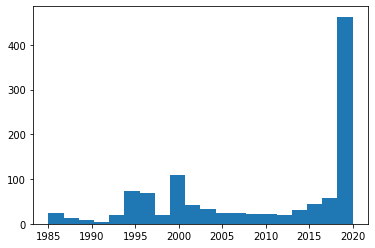

In [31]:
import matplotlib.pyplot as plt
plt.hist(Sample_test_data['start_date'], bins=20)
plt.show()

In [559]:
temp_df_part1.to_csv('Sample_data_test2.csv',index=False,header=True)

In [1]:
import pandas as pd
Sample_test_data = pd.read_csv('Sample_data_test.csv',sep=',',encoding = "ISO-8859-1")

In [2]:
Train = Sample_test_data.drop(columns = ['Unified_url','label','levenshtein_distance','Special_mark'])
label = Sample_test_data['label']

In [3]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117 entries, 0 to 1116
Data columns (total 14 columns):
Way_back_archived                          1117 non-null int64
Freenom_top_level_domain                   1117 non-null int64
Previous_malicious_top_level_domain_TLD    1117 non-null int64
Name_length                                1117 non-null int64
Wrong_spell_List                           1117 non-null int64
Longest_word_ratio                         1117 non-null float64
sub_domain                                 1117 non-null int64
Contain_Weried_number_combination          1117 non-null int64
Alexa_rank                                 1117 non-null int64
start_date                                 1117 non-null int64
wildcard_subdomain                         1117 non-null int64
Redirect_URL                               1117 non-null int64
Created on 2020                            1117 non-null int64
certificate_period                         1117 non-null int64
dtypes: f

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Train, label, test_size=0.33, random_state=42)

In [5]:
Features = []
Target = ['legitimate','maclious']
for i in X_train.columns:
    Features.append(i)

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
from skrules import SkopeRules
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,accuracy_score, precision_score,recall_score
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
import graphviz
import matplotlib.pyplot as plt

/Users/jackline/miniconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


depth = 1 accuracy: 0.8617886178861789 precision: 0.8456375838926175 recall: 0.8181818181818182 f1_score: 0.8316831683168316 cross_val: 0.8792551480051479
depth = 2 accuracy: 0.8644986449864499 precision: 0.8561643835616438 recall: 0.8116883116883117 f1_score: 0.8333333333333333 cross_val: 0.863167631917632
depth = 3 accuracy: 0.8997289972899729 precision: 0.8421052631578947 recall: 0.935064935064935 f1_score: 0.8861538461538462 cross_val: 0.8989221364221365
depth = 4 accuracy: 0.9051490514905149 precision: 0.8520710059171598 recall: 0.935064935064935 f1_score: 0.8916408668730651 cross_val: 0.9124195624195623
depth = 5 accuracy: 0.8997289972899729 precision: 0.8726114649681529 recall: 0.8896103896103896 f1_score: 0.8810289389067525 cross_val: 0.8999195624195625
depth = 6 accuracy: 0.8970189701897019 precision: 0.8670886075949367 recall: 0.8896103896103896 f1_score: 0.8782051282051282 cross_val: 0.8980855855855856
depth = 7 accuracy: 0.8915989159891599 precision: 0.875 recall: 0.8636363

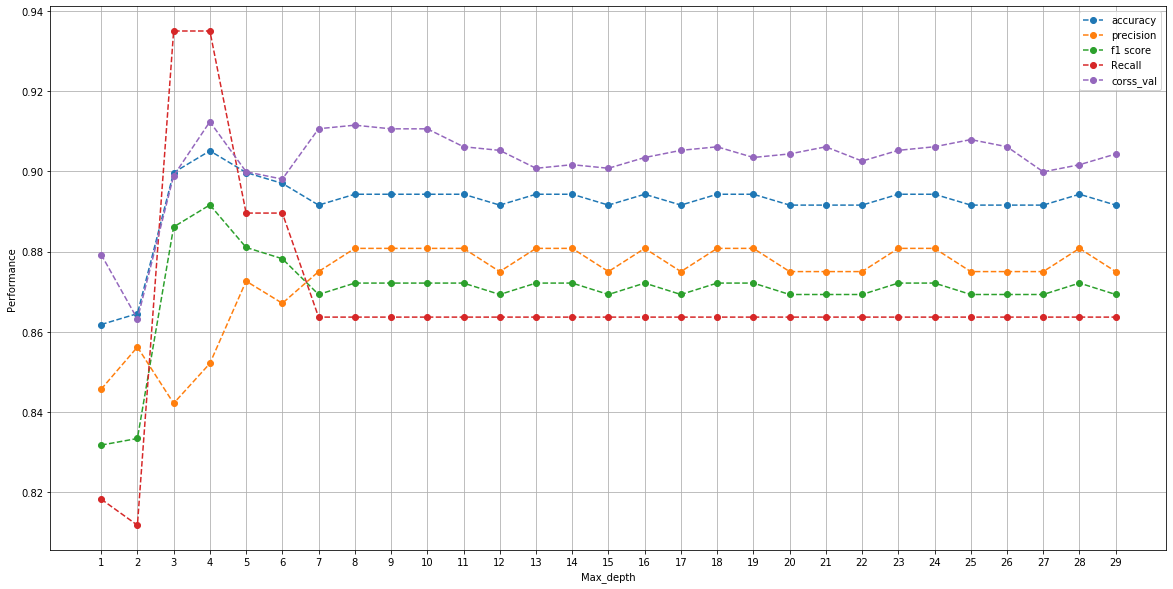

In [7]:
import numpy as np
def Decision_tree(X_train, X_test, y_train, y_test, Data, Label):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    cross_mean_scores = []
    max_depth = range(1,30)
    for i in max_depth:
        Tree = tree.DecisionTreeClassifier(max_depth=i,criterion='gini',min_samples_leaf=5)
        Tree.fit(X_train, y_train)
        prediction = Tree.predict(X_test)
        recall = recall_score(y_test, prediction)
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction)
        scores = cross_val_score(Tree, Data, Label, cv=10)
        mean_scores = np.mean(scores)
        cross_mean_scores.append(mean_scores)
        f1 = f1_score(y_test, prediction)
        acc_list.append(accuracy)
        pre_list.append(precision)
        rec_list.append(recall)
        f1_list.append(f1)
        
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1,'cross_val:',mean_scores )
    return acc_list, pre_list, rec_list,f1_list,cross_mean_scores,max_depth
accuracy_DT, precision_DT, recall_DT,f1_score_DT,cross_val_score_DT,max_depth1 = Decision_tree(X_train, X_test, y_train, y_test,Train, label)

plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(max_depth1,accuracy_DT,label='accuracy',marker='o', linestyle='--',)
plt.plot(max_depth1,precision_DT,label = 'precision',marker='o', linestyle='--',)
plt.plot(max_depth1, f1_score_DT,label = 'f1 score',marker='o', linestyle='--',)
plt.plot(max_depth1, recall_DT,label='Recall',marker='o', linestyle='--',)
plt.plot(max_depth1, cross_val_score_DT,label='corss_val',marker='o', linestyle='--',)
plt.xlabel('Max_depth')
plt.ylabel('Performance')
plt.xticks(max_depth1, max_depth1)
plt.legend()
plt.show()

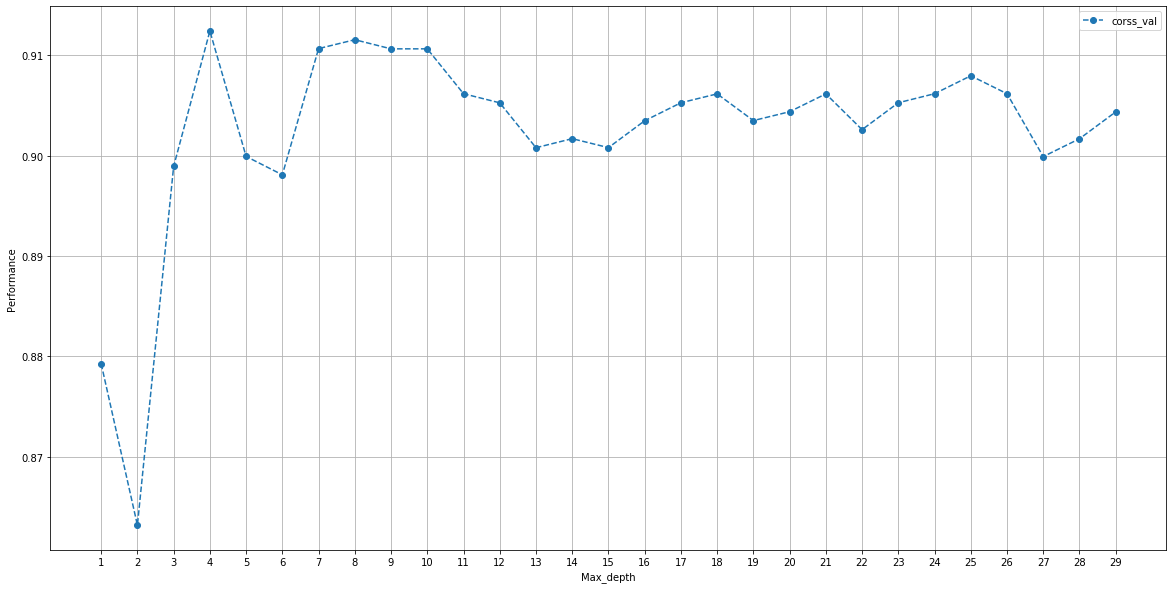

In [8]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(max_depth1, cross_val_score_DT,label='corss_val',marker='o', linestyle='--')
plt.xlabel('Max_depth')
plt.ylabel('Performance')
plt.xticks(max_depth1, max_depth1)
plt.legend()
plt.show()
# plt

In [9]:
print('best depth for accuracy:',max_depth1[accuracy_DT.index(max(accuracy_DT))],'accuracy:',max(accuracy_DT))
print('best depth for precision:',max_depth1[precision_DT.index(max(precision_DT))],'precision:',max(precision_DT))
print('best depth for f1_score:',max_depth1[f1_score_DT.index(max(f1_score_DT))],'f1_score:',max(f1_score_DT))
print('best depth for recall:',max_depth1[recall_DT.index(max(recall_DT))],'recall:',max(recall_DT))
print('best depth for cross_val:',max_depth1[cross_val_score_DT.index(max(cross_val_score_DT))],'recall:',max(cross_val_score_DT))

best depth for accuracy: 4 accuracy: 0.9051490514905149
best depth for precision: 8 precision: 0.8807947019867549
best depth for f1_score: 4 f1_score: 0.8916408668730651
best depth for recall: 3 recall: 0.935064935064935
best depth for cross_val: 4 recall: 0.9124195624195623


min sample = 1 accuracy: 0.907859078590786 precision: 0.8571428571428571 recall: 0.935064935064935 f1_score: 0.8944099378881988 cross_val: 0.9115267052767052
min sample = 2 accuracy: 0.9051490514905149 precision: 0.8520710059171598 recall: 0.935064935064935 f1_score: 0.8916408668730651 cross_val: 0.9195624195624197
min sample = 3 accuracy: 0.9051490514905149 precision: 0.8520710059171598 recall: 0.935064935064935 f1_score: 0.8916408668730651 cross_val: 0.9177767052767052
min sample = 4 accuracy: 0.907859078590786 precision: 0.8571428571428571 recall: 0.935064935064935 f1_score: 0.8944099378881988 cross_val: 0.915990990990991
min sample = 5 accuracy: 0.9051490514905149 precision: 0.8520710059171598 recall: 0.935064935064935 f1_score: 0.8916408668730651 cross_val: 0.9124195624195623
min sample = 6 accuracy: 0.9051490514905149 precision: 0.8562874251497006 recall: 0.9285714285714286 f1_score: 0.8909657320872274 cross_val: 0.9106338481338481
min sample = 7 accuracy: 0.9024390243902439 prec

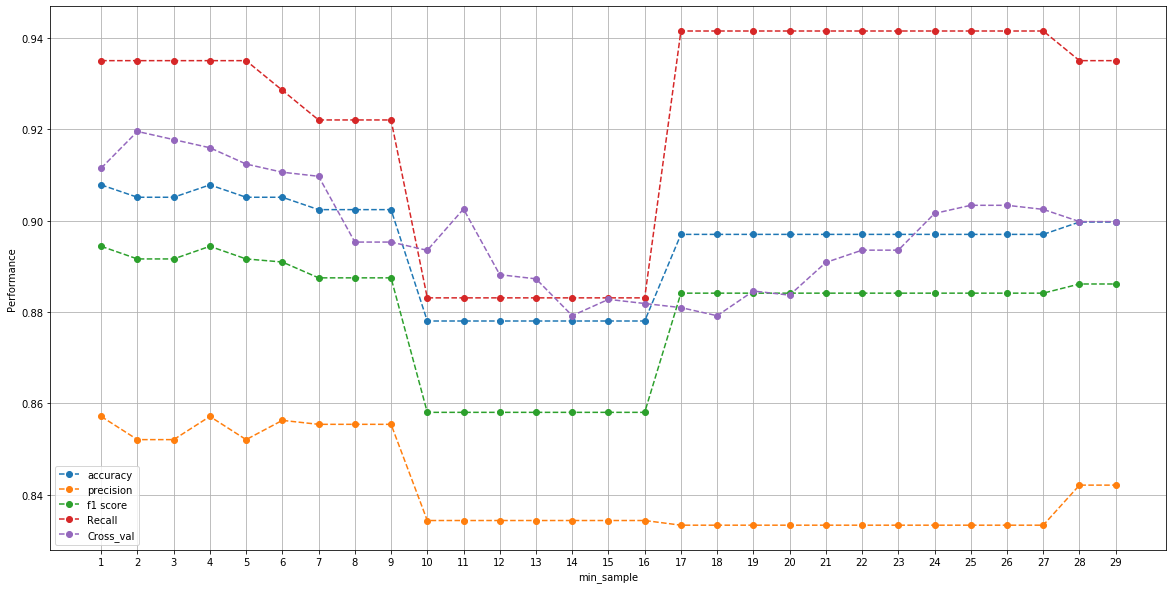

In [10]:
def Decision_tree3(X_train, X_test, y_train, y_test,Data,Label):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    cross_mean_scores = []
    min_sam = range(1,30)
    for i in min_sam:
        Tree = tree.DecisionTreeClassifier(max_depth=4,criterion='gini',min_samples_leaf=i)
        Tree.fit(X_train, y_train)
        prediction = Tree.predict(X_test)
        recall = recall_score(y_test, prediction)
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        scores = cross_val_score(Tree, Data, Label, cv=10)
        mean_scores = np.mean(scores)
        cross_mean_scores.append(mean_scores)
        acc_list.append(accuracy)
        pre_list.append(precision)
        rec_list.append(recall)
        f1_list.append(f1)
        print('min sample =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1,'cross_val:',mean_scores)
    return acc_list, pre_list, rec_list,f1_list,cross_mean_scores,min_sam
accuracy_DT, precision_DT, recall_DT,f1_score_DT,cross_mean_scores_DT,min_sam = Decision_tree3(X_train, X_test, y_train, y_test,Train,label)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(min_sam,accuracy_DT,label='accuracy',marker='o', linestyle='--',)
plt.plot(min_sam,precision_DT,label = 'precision',marker='o', linestyle='--',)
plt.plot(min_sam, f1_score_DT,label = 'f1 score',marker='o', linestyle='--',)
plt.plot(min_sam, recall_DT,label='Recall',marker='o', linestyle='--',)
plt.plot(min_sam, cross_mean_scores_DT,label='Cross_val',marker='o', linestyle='--',)
plt.xlabel('min_sample')
plt.ylabel('Performance')
plt.xticks(min_sam, min_sam)
plt.legend()
plt.show()

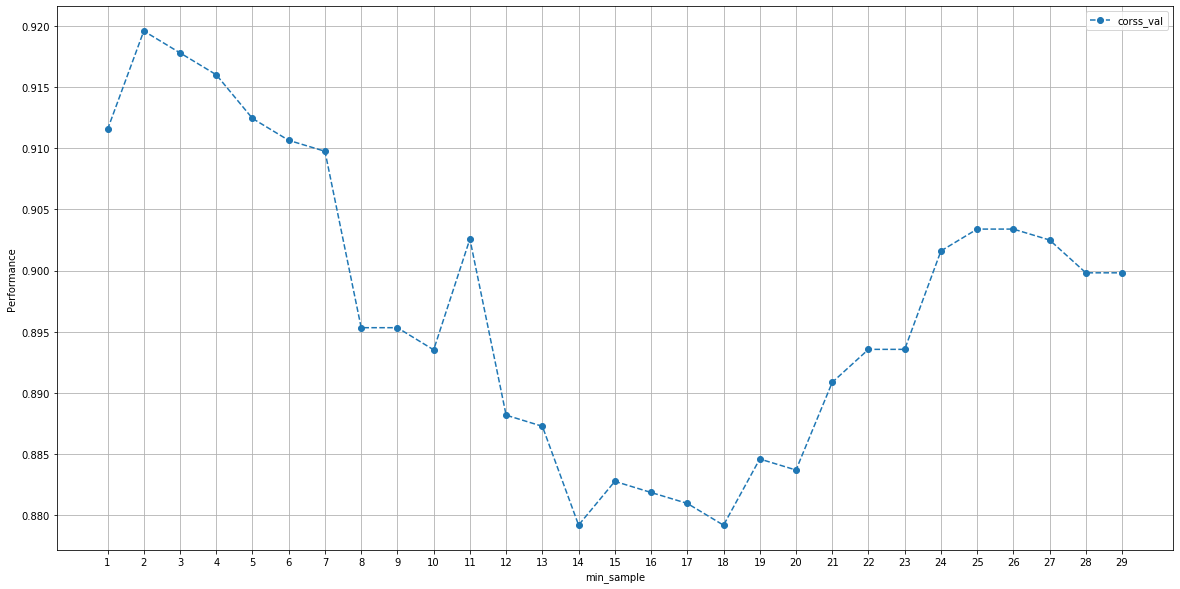

In [11]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(min_sam, cross_mean_scores_DT,label='corss_val',marker='o', linestyle='--')
plt.xlabel('min_sample')
plt.ylabel('Performance')
plt.xticks(min_sam, min_sam)
plt.legend()
plt.show()

In [12]:
print('minimum sample for accuracy:',min_sam[accuracy_DT.index(max(accuracy_DT))],'accuracy:',max(accuracy_DT))
print('minimum sample for precision:',min_sam[precision_DT.index(max(precision_DT))],'precision:',max(precision_DT))
print('minimum sample for f1_score:',min_sam[f1_score_DT.index(max(f1_score_DT))],'f1_score:',max(f1_score_DT))
print('minimum sample for recall:',min_sam[recall_DT.index(max(recall_DT))],'recall:',max(recall_DT))
print('minimum sample for Cross_avl:',min_sam[cross_mean_scores_DT.index(max(cross_mean_scores_DT))],'Cross_val:',max(cross_mean_scores_DT))

minimum sample for accuracy: 1 accuracy: 0.907859078590786
minimum sample for precision: 1 precision: 0.8571428571428571
minimum sample for f1_score: 1 f1_score: 0.8944099378881988
minimum sample for recall: 17 recall: 0.9415584415584416
minimum sample for Cross_avl: 2 Cross_val: 0.9195624195624197


In [18]:
def Decision_tree2(X_train, X_test, y_train, y_test,Data,Label):
    Tree = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=2,max_depth=4)
    Tree.fit(X_train, y_train)
    prediction = Tree.predict(X_test)
    print("------TREE---------Evaluate----------------")
    recall = recall_score(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    scores = cross_val_score(Tree, Data, Label, cv=10)
    mean_scores = np.mean(scores)
    
    print("accuracy is ", accuracy)
    print("precision is", precision)
    print("recall is", recall)
    print("f1 score is",f1)
    print('Cross_val is',mean_scores)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1])
    print(confusion_matrix1)
    return accuracy, precision, recall,f1_score,Tree
accuracy_DT, precision_DT, recall_DT,f1_score,DTree = Decision_tree2(X_train, X_test, y_train, y_test,Train, label)

------TREE---------Evaluate----------------
accuracy is  0.9051490514905149
precision is 0.8520710059171598
recall is 0.935064935064935
f1 score is 0.8916408668730651
Cross_val is 0.9195624195624197

[[190  25]
 [ 10 144]]


In [19]:
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        print(inner_tree.value[index].min())
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

print(sum(DTree.tree_.children_left < 0))
# start pruning from the root
prune_index(DTree.tree_, 0, 10)
sum(DTree.tree_.children_left < 0)

11
7.0
0.0
5.0
0.0
0.0


13

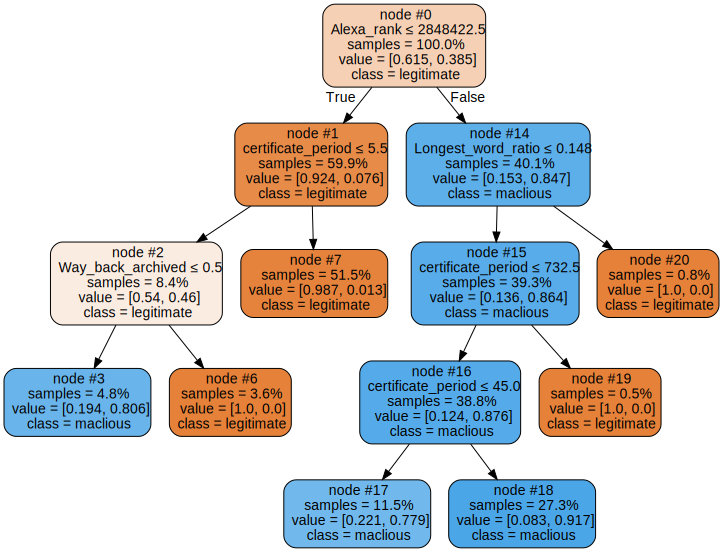

In [20]:
dot_data = tree.export_graphviz(DTree, out_file=None, 
                      feature_names=Features,  
                      class_names=Target,node_ids=True,rounded =True,  
                      filled=True,impurity= False,proportion=True,  
                      special_characters=True,leaves_parallel=False)  
graph = graphviz.Source(dot_data)  
graph

In [21]:
graph.render("Covid_gini_new_final")

'Covid_gini_new_final.pdf'

In [22]:
from sklearn.tree import export_text
r = export_text(DTree, feature_names=Features,show_weights= True)
print(r)

|--- Alexa_rank <= 2848422.50
|   |--- certificate_period <= 5.50
|   |   |--- Way_back_archived <= 0.50
|   |   |   |--- Longest_word_ratio <= 0.10
|   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |   |--- Longest_word_ratio >  0.10
|   |   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |--- Way_back_archived >  0.50
|   |   |   |--- weights: [27.00, 0.00] class: 0
|   |--- certificate_period >  5.50
|   |   |--- Alexa_rank <= 646011.50
|   |   |   |--- weights: [6.00, 0.00] class: 0
|   |   |--- Alexa_rank >  646011.50
|   |   |   |--- weights: [6.00, 0.00] class: 0
|--- Alexa_rank >  2848422.50
|   |--- Longest_word_ratio <= 0.15
|   |   |--- certificate_period <= 732.50
|   |   |   |--- certificate_period <= 45.00
|   |   |   |   |--- weights: [19.00, 67.00] class: 1
|   |   |   |--- certificate_period >  45.00
|   |   |   |   |--- weights: [17.00, 187.00] class: 1
|   |   |--- certificate_period >  732.50
|   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- Lon

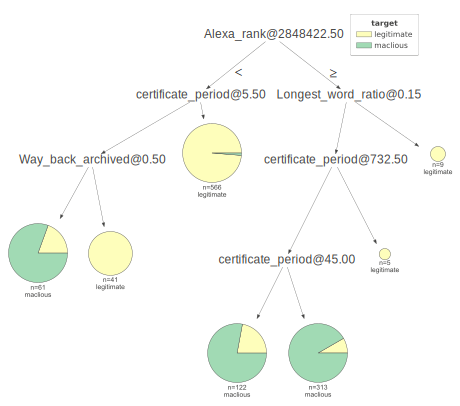

In [23]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(DTree, Train, label,
                target_name="target",
                feature_names=Features,
                class_names=Target,fancy=False)

viz

In [24]:
viz.save("decision_tree12_final")

Exception: darwin can only save .svg files: decision_tree12_final

neighbors = 1 accuracy: 0.8888888888888888 precision: 0.900709219858156 recall: 0.8246753246753247 f1_score: 0.8610169491525425 cross_val: 0.8773648648648649
neighbors = 3 accuracy: 0.8997289972899729 precision: 0.8926174496644296 recall: 0.8636363636363636 f1_score: 0.8778877887788779 cross_val: 0.8764880952380955
neighbors = 5 accuracy: 0.8970189701897019 precision: 0.8866666666666667 recall: 0.8636363636363636 f1_score: 0.875 cross_val: 0.8836711711711711
neighbors = 7 accuracy: 0.8888888888888888 precision: 0.8741721854304636 recall: 0.8571428571428571 f1_score: 0.8655737704918033 cross_val: 0.8800675675675675
neighbors = 9 accuracy: 0.8915989159891599 precision: 0.875 recall: 0.8636363636363636 f1_score: 0.869281045751634 cross_val: 0.8764961389961389
neighbors = 11 accuracy: 0.8943089430894309 precision: 0.8709677419354839 recall: 0.8766233766233766 f1_score: 0.8737864077669903 cross_val: 0.8729247104247104
neighbors = 13 accuracy: 0.8943089430894309 precision: 0.8758169934640523

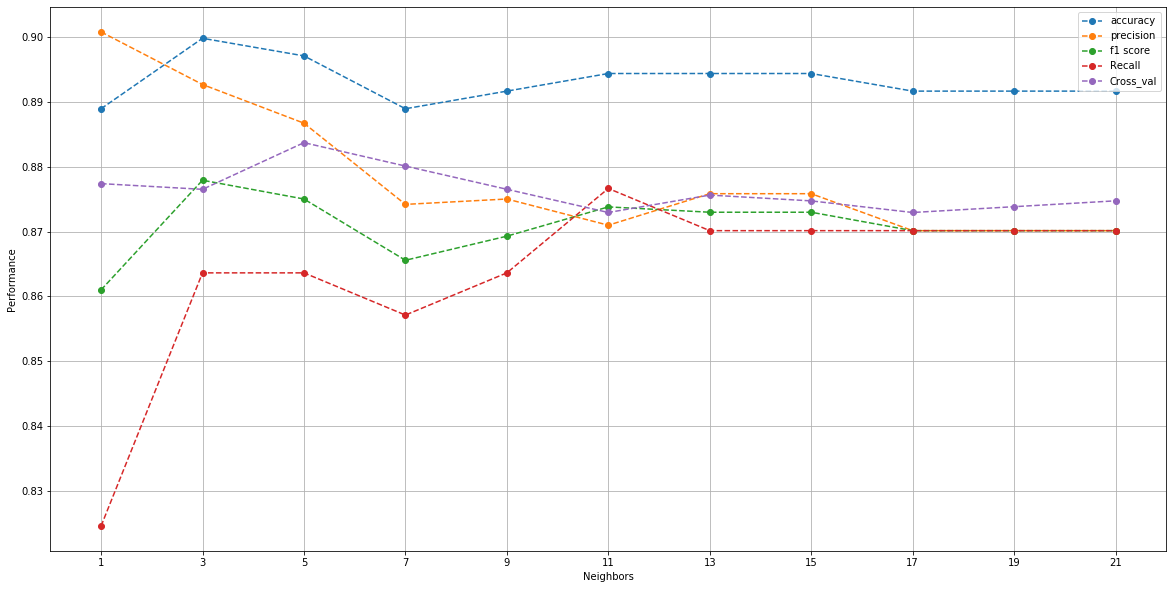

In [32]:
import matplotlib.pyplot as plt
def KNN(train_x, x_test, train_y, y_test,Data,Label):
    neighbors = [1,3,5,7,9,11,13,15,17,19,21]
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    cross_val = []
    for i in neighbors:
        nbrs = KNeighborsClassifier(n_neighbors=i,weights='distance',p=2)
        nbrs.fit(train_x, train_y)
        prediction = nbrs.predict(x_test)
#         print("------KNN---------Evaluate----------------")
        recall = recall_score(y_test, prediction)
        accuracy = accuracy_score(y_test, prediction)
        precision = precision_score(y_test, prediction)
        scores = cross_val_score(nbrs, Data, Label, cv=10)
        mean_scores = np.mean(scores)
        cross_val.append(mean_scores)
        f1 = f1_score(y_test, prediction)
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        print('neighbors =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1,'cross_val:',mean_scores )
    return acc_list, pre_list, f1_list, rec_list,cross_val,neighbors

accuracy_KNN, precision_KNN, f1_score_KNN,recall_KNN,cross_val_KNN,neighbors = KNN(X_train, X_test, y_train, y_test,Train,label)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(neighbors,accuracy_KNN,label='accuracy',marker='o', linestyle='--',)
plt.plot(neighbors,precision_KNN,label = 'precision',marker='o', linestyle='--',)
plt.plot(neighbors, f1_score_KNN,label = 'f1 score',marker='o', linestyle='--',)
plt.plot(neighbors, recall_KNN,label='Recall',marker='o', linestyle='--',)
plt.plot(neighbors, cross_val_KNN,label='Cross_val',marker='o', linestyle='--',)
plt.xlabel('Neighbors')
plt.ylabel('Performance')
plt.xticks(neighbors, neighbors)
plt.legend()
plt.show()

In [33]:
print('best K for accuracy:',neighbors[accuracy_KNN.index(max(accuracy_KNN))],'accuracy:',max(accuracy_KNN))
print('best K for precision:',neighbors[precision_KNN.index(max(precision_KNN))],'precision:',max(precision_KNN))
print('best K for f1_score:',neighbors[f1_score_KNN.index(max(f1_score_KNN))],'f1_score:',max(f1_score_KNN))
print('best K for recall:',neighbors[recall_KNN.index(max(recall_KNN))],'recall:',max(recall_KNN))
print('best K for cross_val:',neighbors[cross_val_KNN.index(max(cross_val_KNN))],'cross_val:',max(cross_val_KNN))

best K for accuracy: 3 accuracy: 0.8997289972899729
best K for precision: 1 precision: 0.900709219858156
best K for f1_score: 3 f1_score: 0.8778877887788779
best K for recall: 11 recall: 0.8766233766233766
best K for cross_val: 5 cross_val: 0.8836711711711711


[ 8  0  5  9  3  6 12 13 10  2  7  1  4 11]
Feature ranking:
1. feature 8 (0.359945) Contain_Weried_number_combination
2. feature 0 (0.148983) certificate_period
3. feature 5 (0.101318) Wrong_spell_List
4. feature 9 (0.082754) Alexa_rank
5. feature 3 (0.082633) Previous_malicious_top_level_domain_TLD
6. feature 6 (0.082149) Longest_word_ratio
7. feature 12 (0.052189) Redirect_URL
8. feature 13 (0.050640) Created on 2020
9. feature 10 (0.028685) start_date
10. feature 2 (0.004877) Freenom_top_level_domain
11. feature 7 (0.003305) sub_domain
12. feature 1 (0.002160) Way_back_archived
13. feature 4 (0.000333) Name_length
14. feature 11 (0.000028) wildcard_subdomain


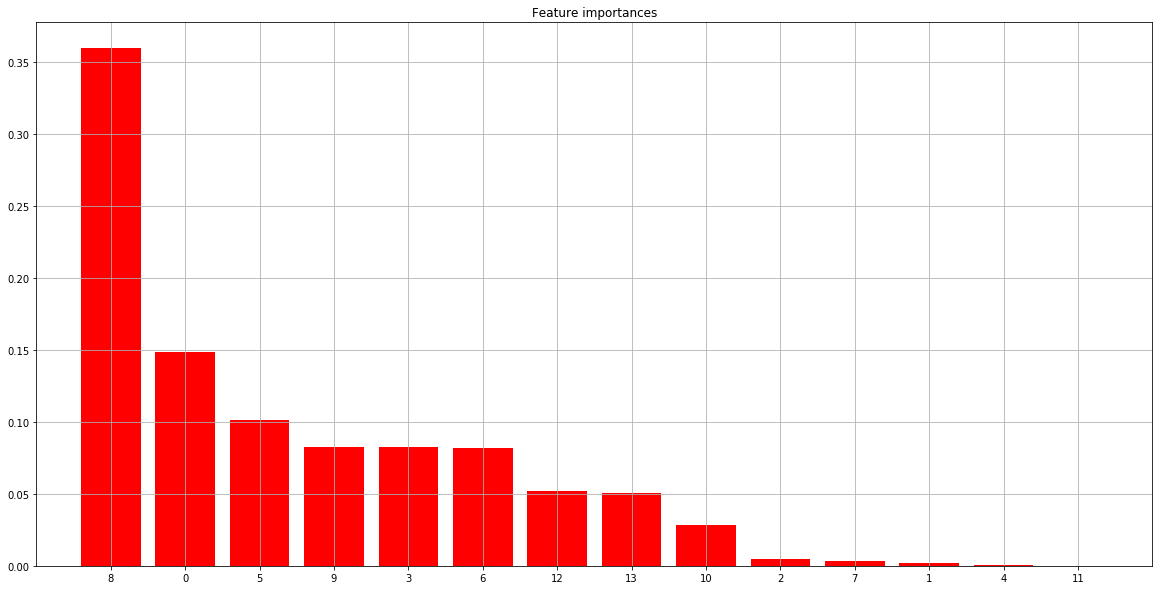

In [34]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
def Feature_importance(train_x, x_test, train_y, y_test):
    forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

    forest.fit(train_x, train_y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
              axis=0)
    indices = np.argsort(importances)[::-1]
    print(indices)
    # Print the feature ranking
    print("Feature ranking:")
    features_all_rank = []
    for f in range(train_x.shape[1]):
        features_all_rank.append(Features[indices[f]-1])
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),Features[indices[f]-1])

    # Plot the feature importances of the forest
    plt.figure(figsize=(20,10))
    plt.grid(True)
    plt.title("Feature importances")
    plt.bar(range(train_x.shape[1]), importances[indices],
        color="r",  align="center")
    plt.xticks(range(train_x.shape[1]), indices)
    plt.xlim([-1, train_x.shape[1]])
    plt.show()
Feature_importance(X_train, X_test, y_train, y_test)

depth = 1 accuracy: 0.8130081300813008 precision: 0.8455284552845529 recall: 0.6753246753246753 f1_score: 0.7509025270758124
depth = 2 accuracy: 0.8834688346883469 precision: 0.8363636363636363 recall: 0.8961038961038961 f1_score: 0.8652037617554859
depth = 3 accuracy: 0.8970189701897019 precision: 0.8493975903614458 recall: 0.9155844155844156 f1_score: 0.88125
depth = 4 accuracy: 0.9105691056910569 precision: 0.8622754491017964 recall: 0.935064935064935 f1_score: 0.897196261682243
depth = 5 accuracy: 0.9159891598915989 precision: 0.8727272727272727 recall: 0.935064935064935 f1_score: 0.90282131661442
depth = 6 accuracy: 0.9159891598915989 precision: 0.8727272727272727 recall: 0.935064935064935 f1_score: 0.90282131661442
depth = 7 accuracy: 0.9132791327913279 precision: 0.8719512195121951 recall: 0.9285714285714286 f1_score: 0.8993710691823901
depth = 8 accuracy: 0.9105691056910569 precision: 0.8711656441717791 recall: 0.922077922077922 f1_score: 0.8958990536277602
depth = 9 accuracy: 

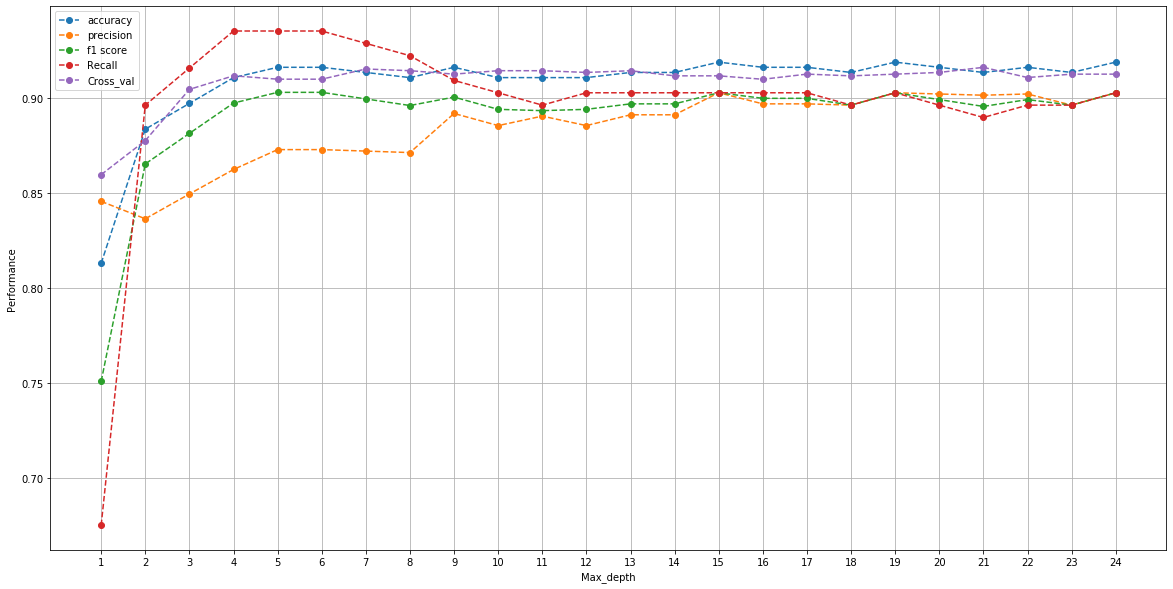

In [35]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
def RandomForest(train_x, x_test, train_y, y_test,Data, Label):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    cross_list = []
    for i in max_depth:
        clf = RandomForestClassifier(n_estimators=250,max_depth=i, max_features='auto',criterion = 'entropy')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction)
        accuracy = accuracy_score(y_test, prediction)
        cross_val = cross_val_score(clf, Data, Label, cv=10)
        mean_val = np.mean(cross_val)
        cross_list.append(mean_val)
        precision = precision_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list,cross_list

accuracy_RF, precision_RF, f1_score_RF, recall_RF,cross_list_RF = RandomForest(X_train, X_test, y_train, y_test,Train,label)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(max_depth,accuracy_RF,label='accuracy',marker='o', linestyle='--',)
plt.plot(max_depth,precision_RF,label = 'precision',marker='o', linestyle='--',)
plt.plot(max_depth, f1_score_RF,label = 'f1 score',marker='o', linestyle='--',)
plt.plot(max_depth, recall_RF,label='Recall',marker='o', linestyle='--',)
plt.plot(max_depth, cross_list_RF,label='Cross_val',marker='o', linestyle='--',)
plt.xlabel('Max_depth')
plt.ylabel('Performance')
plt.xticks(max_depth, max_depth)
plt.legend()
plt.show()


In [36]:
print('best depth for accuracy:',max_depth[accuracy_RF.index(max(accuracy_RF))],'accuracy:',max(accuracy_RF))
print('best depth for precision:',max_depth[precision_RF.index(max(precision_RF))],'precision:',max(precision_RF))
print('best depth for f1_score:',max_depth[f1_score_RF.index(max(f1_score_RF))],'f1_score:',max(f1_score_RF))
print('best depth for recall:',max_depth[recall_RF.index(max(recall_RF))],'recall:',max(recall_RF))
print('best depth for Cross_val:',max_depth[cross_list_RF.index(max(cross_list_RF))],'cross_val:',max(cross_list_RF))

best depth for accuracy: 15 accuracy: 0.9186991869918699
best depth for precision: 15 precision: 0.9025974025974026
best depth for f1_score: 5 f1_score: 0.90282131661442
best depth for recall: 4 recall: 0.935064935064935
best depth for Cross_val: 21 cross_val: 0.9159668597168598


In [37]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
def RandomForest(train_x, x_test, train_y, y_test,Data,Label):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    cross_list = []
    acc_list2 = []
    pre_list2 = []
    rec_list2 = []
    f1_list2 = []
    cross_list2 = []
    for i in max_depth:
        clf = RandomForestClassifier(n_estimators=250,max_depth=i, max_features='auto',criterion = 'gini')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction,average='micro')
        accuracy = accuracy_score(y_test, prediction)
        cross_val = cross_val_score(clf, Data,Label, cv=10)
        mean_val = np.mean(cross_val)
        cross_list.append(mean_val)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction,average='micro')
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
        
    for i in max_depth:
        clf = RandomForestClassifier(n_estimators=250,max_depth=i, max_features='auto',criterion = 'entropy')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction)
        accuracy = accuracy_score(y_test, prediction)
        cross_val = cross_val_score(clf, Data,Label, cv=10)
        mean_val = np.mean(cross_val)
        cross_list2.append(mean_val)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction)
        f1 = f1_score(y_test, prediction, average='macro')
        acc_list2.append(accuracy)
        pre_list2.append(precision)
        f1_list2.append(f1)
        rec_list2.append(recall)
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
#         print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list,cross_list,acc_list2, pre_list2, f1_list2, rec_list2,cross_list2

accuracy_RF, precision_RF, f1_score_RF, recall_RF,cross_list_RF,accuracy_RF2, precision_RF2, f1_score_RF2, recall_RF2,cross_list_RF2 = RandomForest(X_train, X_test, y_train, y_test,Train,label)



depth = 1 accuracy: 0.8102981029810298 precision: 0.8102981029810298 recall: 0.8102981029810298 f1_score: 0.8011853448275863
depth = 2 accuracy: 0.8753387533875339 precision: 0.8753387533875339 recall: 0.8753387533875339 f1_score: 0.8720681338558939
depth = 3 accuracy: 0.8943089430894309 precision: 0.8943089430894309 recall: 0.8943089430894309 f1_score: 0.8924897465205407
depth = 4 accuracy: 0.9105691056910569 precision: 0.9105691056910569 recall: 0.9105691056910569 f1_score: 0.9088963871286314
depth = 5 accuracy: 0.9105691056910569 precision: 0.9105691056910569 recall: 0.9105691056910569 f1_score: 0.9087571277639989
depth = 6 accuracy: 0.9132791327913279 precision: 0.9132791327913279 recall: 0.9132791327913279 f1_score: 0.9115902964959569
depth = 7 accuracy: 0.907859078590786 precision: 0.907859078590786 recall: 0.907859078590786 f1_score: 0.9059181714559962
depth = 8 accuracy: 0.9132791327913279 precision: 0.9132791327913279 recall: 0.9132791327913279 f1_score: 0.9113087369306574
dep

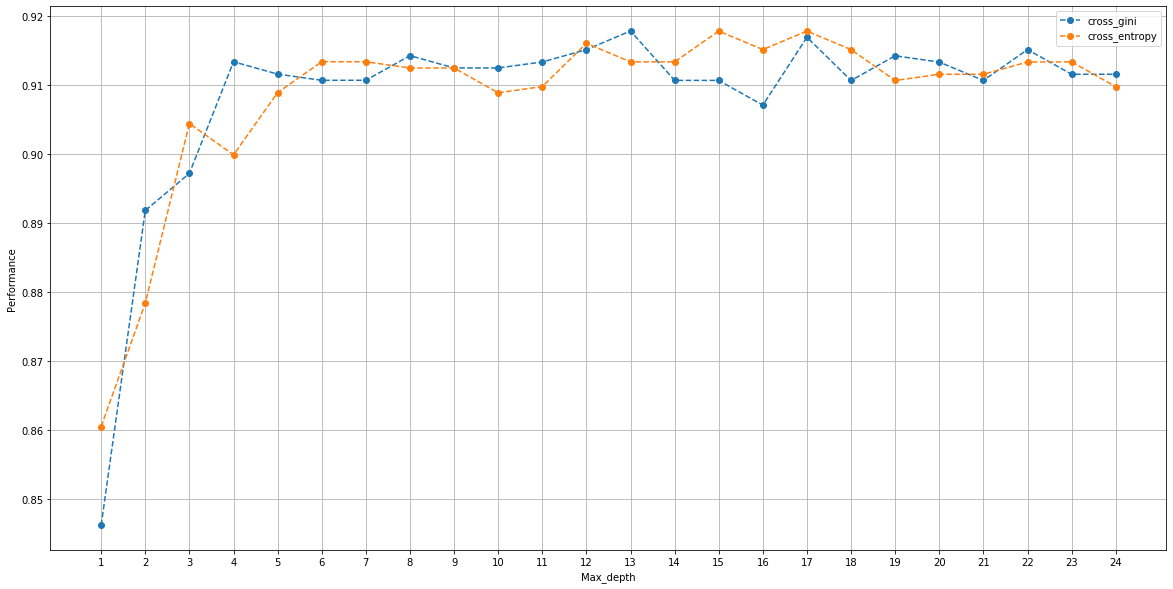

In [38]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(max_depth,cross_list_RF,label='cross_gini',marker='o', linestyle='--',)
# plt.plot(max_depth,precision_RF,label = 'precision_gini',marker='o', linestyle='--',)
# plt.plot(max_depth, f1_score_RF,label = 'f1 score_gini',marker='o', linestyle='--',)
# plt.plot(max_depth, recall_RF,label='Recall_gini',marker='o', linestyle='--',)
plt.plot(max_depth,cross_list_RF2,label='cross_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth,precision_RF2,label = 'precision_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth, f1_score_RF2,label = 'f1 score_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth, recall_RF2,label='Recall_entropy',marker='o', linestyle='--',)
plt.xlabel('Max_depth')
plt.ylabel('Performance')
plt.xticks(max_depth, max_depth)
plt.legend()
plt.show()

In [39]:
n_estimators = list(range(1,500))
def RandomForest(train_x, x_test, train_y, y_test,Data,Label):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    cross_list = []
    for i in n_estimators:
        clf = RandomForestClassifier(n_estimators=i,max_depth=9, max_features='auto',criterion = 'entropy')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction)
        accuracy = accuracy_score(y_test, prediction)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction)
        cross_val = cross_val_score(clf, Data,Label, cv=10)
        mean_val = np.mean(cross_val)
        cross_list.append(mean_val)
        f1 = f1_score(y_test, prediction)
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        
        print('n_estimators =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list,cross_list

accuracy_RF, precision_RF, f1_score_RF, recall_RF,cross_list_RF = RandomForest(X_train, X_test, y_train, y_test,Train,label)

n_estimators = 1 accuracy: 0.8563685636856369 precision: 0.8098159509202454 recall: 0.8571428571428571 f1_score: 0.832807570977918
n_estimators = 2 accuracy: 0.8970189701897019 precision: 0.8766233766233766 recall: 0.8766233766233766 f1_score: 0.8766233766233766
n_estimators = 3 accuracy: 0.9132791327913279 precision: 0.88125 recall: 0.9155844155844156 f1_score: 0.8980891719745223
n_estimators = 4 accuracy: 0.8780487804878049 precision: 0.8978102189781022 recall: 0.7987012987012987 f1_score: 0.845360824742268
n_estimators = 5 accuracy: 0.8997289972899729 precision: 0.8633540372670807 recall: 0.9025974025974026 f1_score: 0.8825396825396825
n_estimators = 6 accuracy: 0.8915989159891599 precision: 0.8701298701298701 recall: 0.8701298701298701 f1_score: 0.8701298701298701
n_estimators = 7 accuracy: 0.8943089430894309 precision: 0.8709677419354839 recall: 0.8766233766233766 f1_score: 0.8737864077669903
n_estimators = 8 accuracy: 0.8970189701897019 precision: 0.8717948717948718 recall: 0.883

n_estimators = 64 accuracy: 0.9024390243902439 precision: 0.86875 recall: 0.9025974025974026 f1_score: 0.8853503184713377
n_estimators = 65 accuracy: 0.9186991869918699 precision: 0.8827160493827161 recall: 0.9285714285714286 f1_score: 0.9050632911392404
n_estimators = 66 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 67 accuracy: 0.9186991869918699 precision: 0.8875 recall: 0.922077922077922 f1_score: 0.9044585987261146
n_estimators = 68 accuracy: 0.9105691056910569 precision: 0.8757763975155279 recall: 0.9155844155844156 f1_score: 0.8952380952380953
n_estimators = 69 accuracy: 0.9159891598915989 precision: 0.8867924528301887 recall: 0.9155844155844156 f1_score: 0.9009584664536741
n_estimators = 70 accuracy: 0.9132791327913279 precision: 0.8765432098765432 recall: 0.922077922077922 f1_score: 0.8987341772151898
n_estimators = 71 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909

n_estimators = 127 accuracy: 0.907859078590786 precision: 0.879746835443038 recall: 0.9025974025974026 f1_score: 0.8910256410256411
n_estimators = 128 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 129 accuracy: 0.9105691056910569 precision: 0.8805031446540881 recall: 0.9090909090909091 f1_score: 0.8945686900958466
n_estimators = 130 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 131 accuracy: 0.9105691056910569 precision: 0.8805031446540881 recall: 0.9090909090909091 f1_score: 0.8945686900958466
n_estimators = 132 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 133 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 134 accuracy: 0.9105691056910569 precision: 0.885

n_estimators = 189 accuracy: 0.9159891598915989 precision: 0.8819875776397516 recall: 0.922077922077922 f1_score: 0.9015873015873016
n_estimators = 190 accuracy: 0.907859078590786 precision: 0.879746835443038 recall: 0.9025974025974026 f1_score: 0.8910256410256411
n_estimators = 191 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 192 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 193 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 194 accuracy: 0.9105691056910569 precision: 0.8757763975155279 recall: 0.9155844155844156 f1_score: 0.8952380952380953
n_estimators = 195 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 196 accuracy: 0.9132791327913279 precision: 0.8860

n_estimators = 251 accuracy: 0.907859078590786 precision: 0.879746835443038 recall: 0.9025974025974026 f1_score: 0.8910256410256411
n_estimators = 252 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 253 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 254 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 255 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 256 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 257 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 258 accuracy: 0.9105691056910569 precision: 0.875

n_estimators = 313 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 314 accuracy: 0.9132791327913279 precision: 0.88125 recall: 0.9155844155844156 f1_score: 0.8980891719745223
n_estimators = 315 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 316 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 317 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 318 accuracy: 0.9132791327913279 precision: 0.88125 recall: 0.9155844155844156 f1_score: 0.8980891719745223
n_estimators = 319 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 320 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall

n_estimators = 375 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 376 accuracy: 0.9132791327913279 precision: 0.88125 recall: 0.9155844155844156 f1_score: 0.8980891719745223
n_estimators = 377 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 378 accuracy: 0.9132791327913279 precision: 0.88125 recall: 0.9155844155844156 f1_score: 0.8980891719745223
n_estimators = 379 accuracy: 0.907859078590786 precision: 0.879746835443038 recall: 0.9025974025974026 f1_score: 0.8910256410256411
n_estimators = 380 accuracy: 0.9105691056910569 precision: 0.8805031446540881 recall: 0.9090909090909091 f1_score: 0.8945686900958466
n_estimators = 381 accuracy: 0.9105691056910569 precision: 0.8805031446540881 recall: 0.9090909090909091 f1_score: 0.8945686900958466
n_estimators = 382 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 

n_estimators = 437 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 438 accuracy: 0.907859078590786 precision: 0.879746835443038 recall: 0.9025974025974026 f1_score: 0.8910256410256411
n_estimators = 439 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 440 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 441 accuracy: 0.907859078590786 precision: 0.879746835443038 recall: 0.9025974025974026 f1_score: 0.8910256410256411
n_estimators = 442 accuracy: 0.907859078590786 precision: 0.879746835443038 recall: 0.9025974025974026 f1_score: 0.8910256410256411
n_estimators = 443 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576
n_estimators = 444 accuracy: 0.9132791327913279 precision: 0.88125 r

n_estimators = 499 accuracy: 0.9105691056910569 precision: 0.8853503184713376 recall: 0.9025974025974026 f1_score: 0.8938906752411576


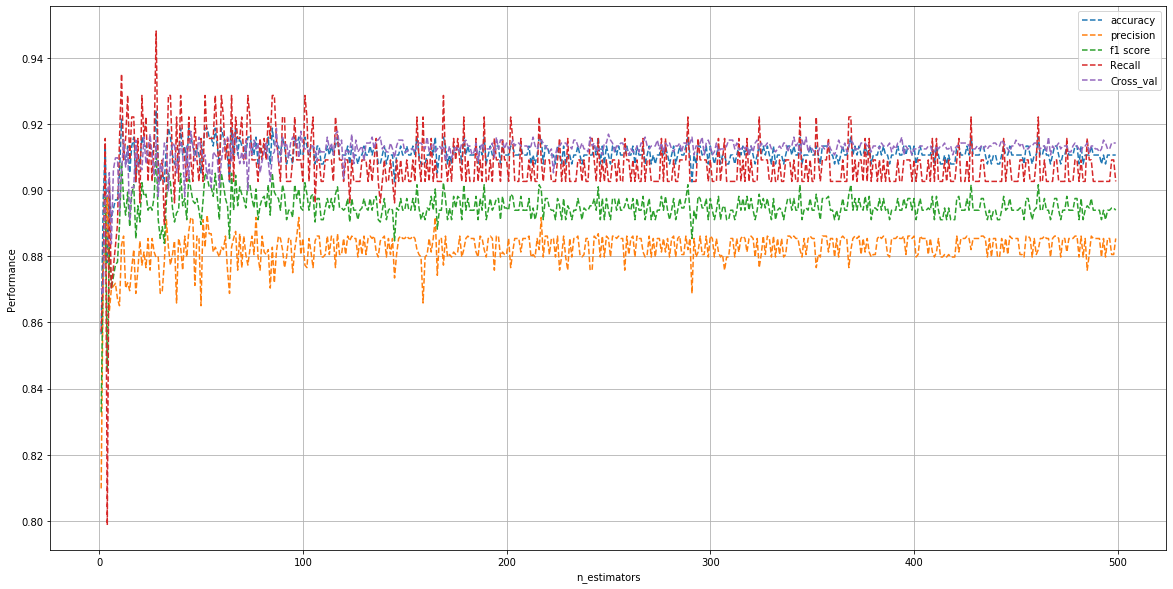

In [40]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(n_estimators,accuracy_RF,label='accuracy',linestyle='--',)
plt.plot(n_estimators,precision_RF,label = 'precision',linestyle='--',)
plt.plot(n_estimators, f1_score_RF,label = 'f1 score',linestyle='--',)
plt.plot(n_estimators, recall_RF,label='Recall',linestyle='--',)
plt.plot(n_estimators, cross_list_RF,label='Cross_val',linestyle='--',)
plt.xlabel('n_estimators')
plt.ylabel('Performance')
# plt.xticks(n_estimators, n_estimators)
plt.legend()
plt.show()

In [41]:
print('best estimator for accuracy:',n_estimators[accuracy_RF.index(max(accuracy_RF))],'accuracy:',max(accuracy_RF))
print('best estimator for precision:',n_estimators[precision_RF.index(max(precision_RF))],'precision:',max(precision_RF))
print('best estimator for f1_score:',n_estimators[f1_score_RF.index(max(f1_score_RF))],'f1_score:',max(f1_score_RF))
print('best estimator for recall:',n_estimators[recall_RF.index(max(recall_RF))],'recall:',max(recall_RF))
print('best estimator for Cross_val:',n_estimators[cross_list_RF.index(max(cross_list_RF))],'Cross_val:',max(cross_list_RF))

best estimator for accuracy: 28 accuracy: 0.924119241192412
best estimator for precision: 4 precision: 0.8978102189781022
best estimator for f1_score: 28 f1_score: 0.9125
best estimator for recall: 28 recall: 0.948051948051948
best estimator for Cross_val: 87 Cross_val: 0.9186695624195623


depth = 1 accuracy: 0.7967479674796748 precision: 0.8434782608695652 recall: 0.6298701298701299 f1_score: 0.721189591078067
depth = 2 accuracy: 0.8265582655826558 precision: 0.8409090909090909 recall: 0.7207792207792207 f1_score: 0.7762237762237761
depth = 3 accuracy: 0.8943089430894309 precision: 0.8662420382165605 recall: 0.8831168831168831 f1_score: 0.8745980707395498
depth = 4 accuracy: 0.8997289972899729 precision: 0.8633540372670807 recall: 0.9025974025974026 f1_score: 0.8825396825396825
depth = 5 accuracy: 0.8997289972899729 precision: 0.8633540372670807 recall: 0.9025974025974026 f1_score: 0.8825396825396825
depth = 6 accuracy: 0.907859078590786 precision: 0.8658536585365854 recall: 0.922077922077922 f1_score: 0.8930817610062892
depth = 7 accuracy: 0.907859078590786 precision: 0.8658536585365854 recall: 0.922077922077922 f1_score: 0.8930817610062892
depth = 8 accuracy: 0.907859078590786 precision: 0.8658536585365854 recall: 0.922077922077922 f1_score: 0.8930817610062892
depth =

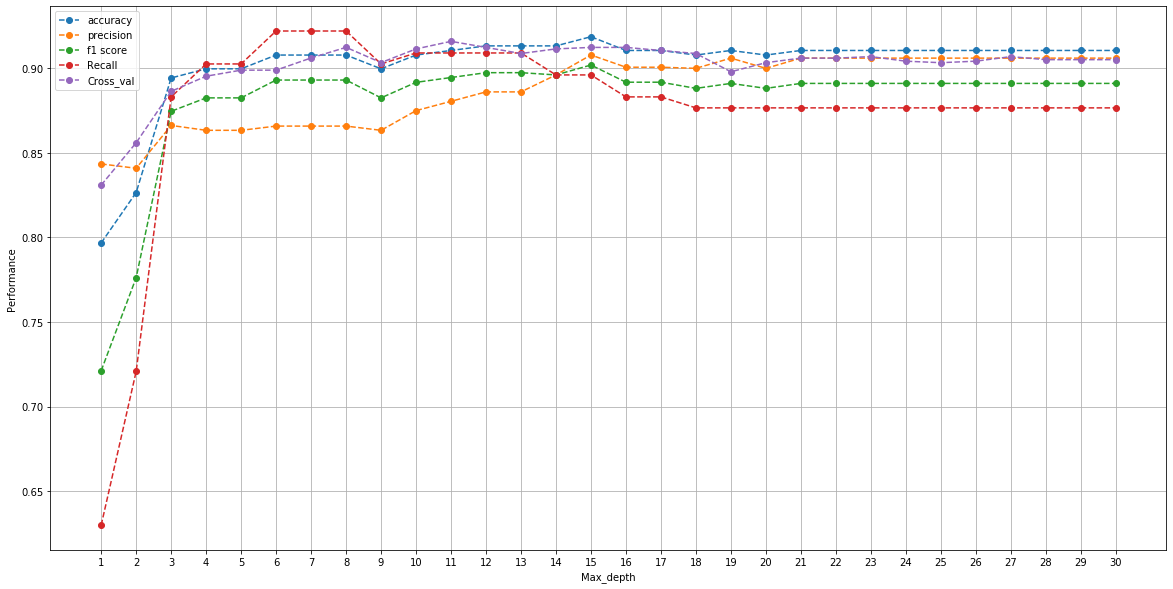

In [42]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
def Extratree(train_x, x_test, train_y, y_test,Data,Label):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    cross_list = []
    for i in max_depth:
        clf = ExtraTreesClassifier(n_estimators=250,max_depth=i,
                              random_state=0)
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction)
        accuracy = accuracy_score(y_test, prediction)
        cross_val = cross_val_score(clf, Data,Label, cv=10)
        mean_val = np.mean(cross_val)
        cross_list.append(mean_val)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list,cross_list

accuracy_ET, precision_ET, f1_score_ET, recall_ET,cross_list_ET = Extratree(X_train, X_test, y_train, y_test,Train,label)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(max_depth,accuracy_ET,label='accuracy',marker='o', linestyle='--',)
plt.plot(max_depth,precision_ET,label = 'precision',marker='o', linestyle='--',)
plt.plot(max_depth, f1_score_ET,label = 'f1 score',marker='o', linestyle='--',)
plt.plot(max_depth, recall_ET,label='Recall',marker='o', linestyle='--',)
plt.plot(max_depth, cross_list_ET,label='Cross_val',marker='o', linestyle='--',)
plt.xlabel('Max_depth')
plt.ylabel('Performance')
plt.xticks(max_depth, max_depth)
plt.legend()
plt.show()


In [43]:
print('best depth for accuracy:',max_depth[accuracy_ET.index(max(accuracy_ET))],'accuracy:',max(accuracy_ET))
print('best depth for precision:',max_depth[precision_ET.index(max(precision_ET))],'precision:',max(precision_ET))
print('best depth for f1_score:',max_depth[f1_score_ET.index(max(f1_score_ET))],'f1_score:',max(f1_score_ET))
print('best depth for recall:',max_depth[recall_ET.index(max(recall_ET))],'recall:',max(recall_ET))
print('best depth for Cross_val:',max_depth[cross_list_ET.index(max(cross_list_ET))],'Cross score:',max(cross_list_ET))

best depth for accuracy: 15 accuracy: 0.9186991869918699
best depth for precision: 15 precision: 0.9078947368421053
best depth for f1_score: 15 f1_score: 0.9019607843137255
best depth for recall: 6 recall: 0.922077922077922
best depth for Cross_val: 11 Cross score: 0.9159588159588161


depth = 1 accuracy: 0.7967479674796748 precision: 0.8434782608695652 recall: 0.6298701298701299 f1_score: 0.721189591078067
depth = 2 accuracy: 0.8265582655826558 precision: 0.8409090909090909 recall: 0.7207792207792207 f1_score: 0.7762237762237761
depth = 3 accuracy: 0.8943089430894309 precision: 0.8662420382165605 recall: 0.8831168831168831 f1_score: 0.8745980707395498
depth = 4 accuracy: 0.8997289972899729 precision: 0.8633540372670807 recall: 0.9025974025974026 f1_score: 0.8825396825396825
depth = 5 accuracy: 0.8997289972899729 precision: 0.8633540372670807 recall: 0.9025974025974026 f1_score: 0.8825396825396825
depth = 6 accuracy: 0.907859078590786 precision: 0.8658536585365854 recall: 0.922077922077922 f1_score: 0.8930817610062892
depth = 7 accuracy: 0.907859078590786 precision: 0.8658536585365854 recall: 0.922077922077922 f1_score: 0.8930817610062892
depth = 8 accuracy: 0.907859078590786 precision: 0.8658536585365854 recall: 0.922077922077922 f1_score: 0.8930817610062892
depth =

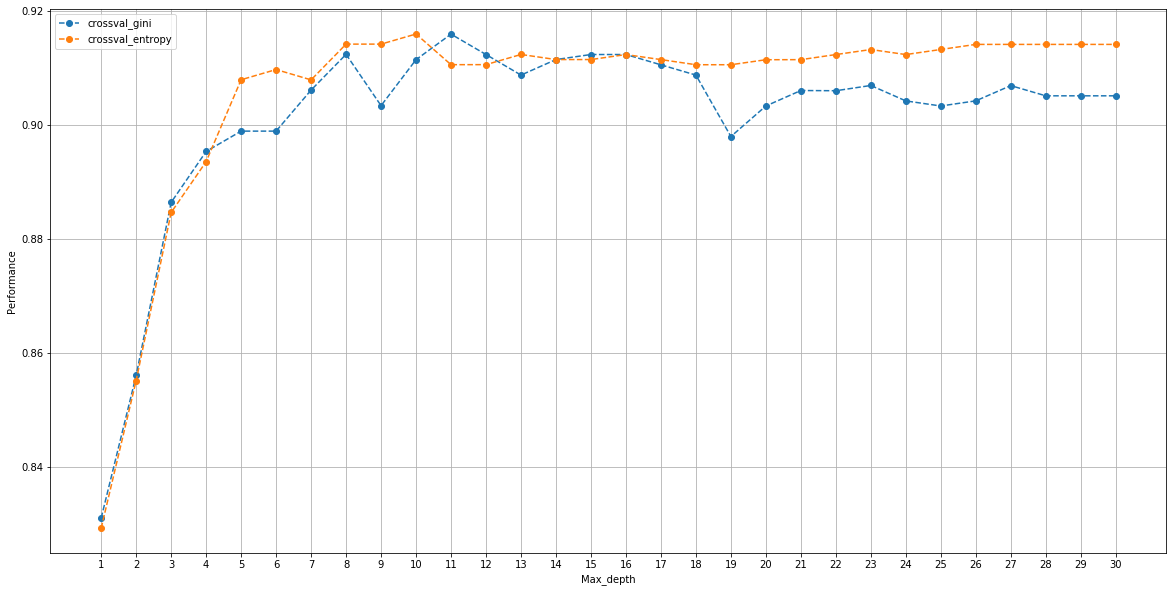

In [44]:
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
def Extratree(train_x, x_test, train_y, y_test,Data, Label):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    acc_list2 = []
    pre_list2 = []
    rec_list2 = []
    f1_list2 = []
    cross_list = []
    cross_list2 = []
    for i in max_depth:
        clf = ExtraTreesClassifier(n_estimators=250,max_depth=i,criterion='gini',
                              random_state=0)
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction)
        accuracy = accuracy_score(y_test, prediction)
        cross_val = cross_val_score(clf, Data,Label, cv=10)
        mean_val = np.mean(cross_val)
        cross_list.append(mean_val)
        precision = precision_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
        
    for i in max_depth:
        clf = ExtraTreesClassifier(n_estimators=250,max_depth=i,criterion='entropy',
                              random_state=0)
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction)
        accuracy = accuracy_score(y_test, prediction)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        acc_list2.append(accuracy)
        cross_val = cross_val_score(clf, Data,Label, cv=10)
        mean_val = np.mean(cross_val)
        cross_list2.append(mean_val)
        pre_list2.append(precision)
        f1_list2.append(f1)
        rec_list2.append(recall)
        print('depth =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list,acc_list2, pre_list2, f1_list2, rec_list2, cross_list, cross_list2

accuracy_ET, precision_ET, f1_score_ET, recall_ET,accuracy_ET2, precision_ET2, f1_score_ET2, recall_ET2,cross_list_ET, cross_list_ET2 = Extratree(X_train, X_test, y_train, y_test, Train, label)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(max_depth,cross_list_ET,label='crossval_gini',marker='o', linestyle='--',)
# plt.plot(max_depth,precision_RF,label = 'precision_gini',marker='o', linestyle='--',)
# plt.plot(max_depth, f1_score_RF,label = 'f1 score_gini',marker='o', linestyle='--',)
# plt.plot(max_depth, recall_RF,label='Recall_gini',marker='o', linestyle='--',)
plt.plot(max_depth,cross_list_ET2,label='crossval_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth,precision_RF2,label = 'precision_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth, f1_score_RF2,label = 'f1 score_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth, recall_RF2,label='Recall_entropy',marker='o', linestyle='--',)
plt.xlabel('Max_depth')
plt.ylabel('Performance')
plt.xticks(max_depth, max_depth)
plt.legend()
plt.show()


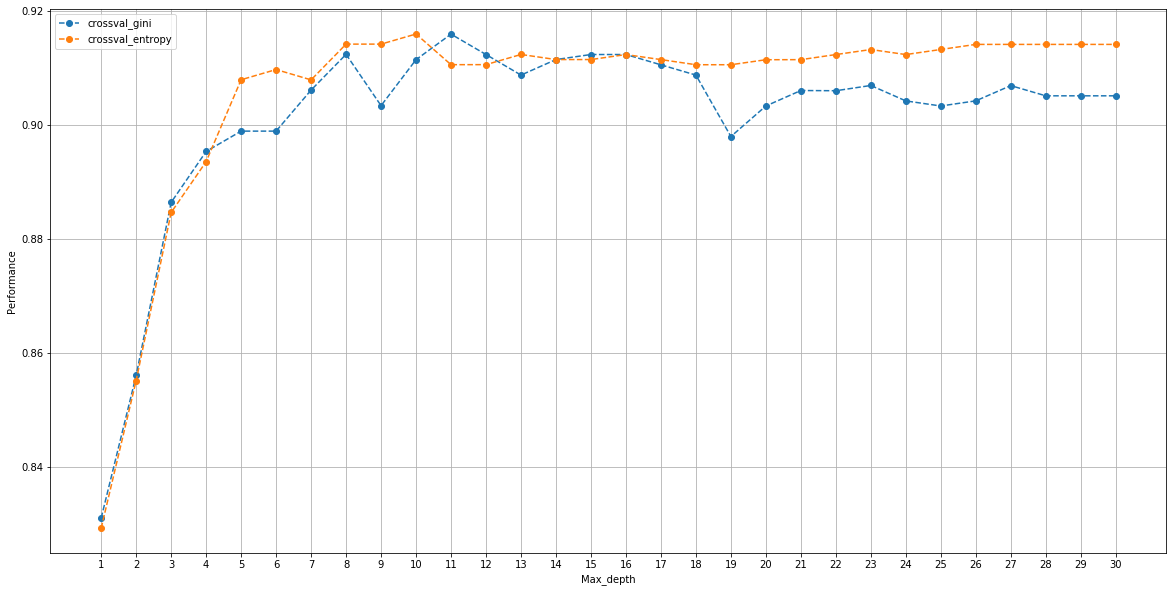

In [45]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(max_depth,cross_list_ET,label='crossval_gini',marker='o', linestyle='--',)
# plt.plot(max_depth,precision_RF,label = 'precision_gini',marker='o', linestyle='--',)
# plt.plot(max_depth, f1_score_RF,label = 'f1 score_gini',marker='o', linestyle='--',)
# plt.plot(max_depth, recall_RF,label='Recall_gini',marker='o', linestyle='--',)
plt.plot(max_depth,cross_list_ET2,label='crossval_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth,precision_RF2,label = 'precision_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth, f1_score_RF2,label = 'f1 score_entropy',marker='o', linestyle='--',)
# plt.plot(max_depth, recall_RF2,label='Recall_entropy',marker='o', linestyle='--',)
plt.xlabel('Max_depth')
plt.ylabel('Performance')
plt.xticks(max_depth, max_depth)
plt.legend()
plt.show()


In [46]:
n_estimators = list(range(1,500))
def Extratree(train_x, x_test, train_y, y_test,Data,Label):
    acc_list = []
    pre_list = []
    rec_list = []
    f1_list = []
    cross_list = []
    for i in n_estimators:
        clf = ExtraTreesClassifier(n_estimators=i,max_depth=13,
                              random_state=0,criterion='entropy')
        clf.fit(train_x, train_y)
        prediction = clf.predict(x_test)
#         print("------RandomForest---------Evaluate----------------")
        recall = recall_score(y_test, prediction)
        accuracy = accuracy_score(y_test, prediction)
        cross_val = cross_val_score(clf, Data,Label, cv=10)
        mean_val = np.mean(cross_val)
        cross_list.append(mean_val)
#         cross_val = cross_val_score(clf, train_x, train_y, cv=10,scoring='accuracy')
        precision = precision_score(y_test, prediction)
        f1 = f1_score(y_test, prediction)
        acc_list.append(accuracy)
        pre_list.append(precision)
        f1_list.append(f1)
        rec_list.append(recall)
        
        print('n_estimators =',i,'accuracy:',accuracy,'precision:',precision,'recall:',recall,'f1_score:',f1 )
    return acc_list, pre_list, f1_list, rec_list, cross_list

accuracy_ET, precision_ET, f1_score_ET, recall_ET,Cross_val_ET = Extratree(X_train, X_test, y_train, y_test,Train,label)



n_estimators = 1 accuracy: 0.8807588075880759 precision: 0.8525641025641025 recall: 0.8636363636363636 f1_score: 0.8580645161290322
n_estimators = 2 accuracy: 0.8834688346883469 precision: 0.8881118881118881 recall: 0.8246753246753247 f1_score: 0.8552188552188552
n_estimators = 3 accuracy: 0.9051490514905149 precision: 0.8742138364779874 recall: 0.9025974025974026 f1_score: 0.8881789137380192
n_estimators = 4 accuracy: 0.907859078590786 precision: 0.9 recall: 0.8766233766233766 f1_score: 0.888157894736842
n_estimators = 5 accuracy: 0.9132791327913279 precision: 0.8765432098765432 recall: 0.922077922077922 f1_score: 0.8987341772151898
n_estimators = 6 accuracy: 0.9159891598915989 precision: 0.896774193548387 recall: 0.9025974025974026 f1_score: 0.8996763754045307
n_estimators = 7 accuracy: 0.9132791327913279 precision: 0.88125 recall: 0.9155844155844156 f1_score: 0.8980891719745223
n_estimators = 8 accuracy: 0.9214092140921409 precision: 0.9032258064516129 recall: 0.9090909090909091 f1_

n_estimators = 65 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 66 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 67 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 68 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 69 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 70 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 71 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 72 accuracy: 0.9159891598915989 precision: 0.891719745

n_estimators = 127 accuracy: 0.9159891598915989 precision: 0.89171974522293 recall: 0.9090909090909091 f1_score: 0.9003215434083601
n_estimators = 128 accuracy: 0.9159891598915989 precision: 0.89171974522293 recall: 0.9090909090909091 f1_score: 0.9003215434083601
n_estimators = 129 accuracy: 0.9159891598915989 precision: 0.89171974522293 recall: 0.9090909090909091 f1_score: 0.9003215434083601
n_estimators = 130 accuracy: 0.9159891598915989 precision: 0.89171974522293 recall: 0.9090909090909091 f1_score: 0.9003215434083601
n_estimators = 131 accuracy: 0.9159891598915989 precision: 0.89171974522293 recall: 0.9090909090909091 f1_score: 0.9003215434083601
n_estimators = 132 accuracy: 0.9159891598915989 precision: 0.89171974522293 recall: 0.9090909090909091 f1_score: 0.9003215434083601
n_estimators = 133 accuracy: 0.9159891598915989 precision: 0.89171974522293 recall: 0.9090909090909091 f1_score: 0.9003215434083601
n_estimators = 134 accuracy: 0.9159891598915989 precision: 0.89171974522293 

n_estimators = 189 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 190 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 191 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 192 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 193 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 194 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 195 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 196 accuracy: 0.9132791327913279 precision: 0.8

n_estimators = 251 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 252 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 253 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 254 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 255 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 256 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 257 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 258 accuracy: 0.9132791327913279 precision: 0.8

n_estimators = 313 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 314 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 315 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 316 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 317 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 318 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 319 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 320 accuracy: 0.9132791327913279 precision: 0.8

n_estimators = 375 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 376 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 377 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 378 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 379 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 380 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 381 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 382 accuracy: 0.9132791327913279 precision: 0.8

n_estimators = 437 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 438 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 439 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 440 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 441 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 442 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 443 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974
n_estimators = 444 accuracy: 0.9159891598915989 precision: 0.8

n_estimators = 499 accuracy: 0.9132791327913279 precision: 0.8860759493670886 recall: 0.9090909090909091 f1_score: 0.8974358974358974


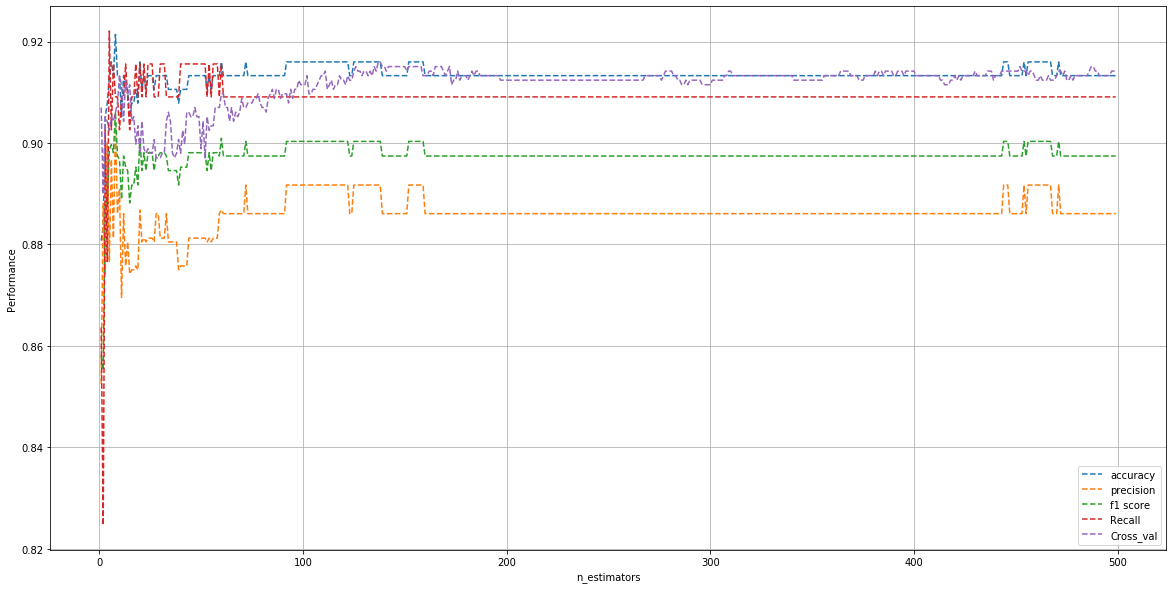

In [47]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(n_estimators,accuracy_ET,label='accuracy', linestyle='--',)
plt.plot(n_estimators,precision_ET,label = 'precision', linestyle='--',)
plt.plot(n_estimators, f1_score_ET,label = 'f1 score', linestyle='--',)
plt.plot(n_estimators, recall_ET,label='Recall',linestyle='--',)
plt.plot(n_estimators, Cross_val_ET,label='Cross_val',linestyle='--',)
plt.xlabel('n_estimators')
plt.ylabel('Performance')
# plt.xticks(n_estimators, n_estimators)
plt.legend()
plt.show()

In [48]:
print('best estimator for accuracy:',n_estimators[accuracy_ET.index(max(accuracy_ET))],'accuracy:',max(accuracy_ET))
print('best estimator for precision:',n_estimators[precision_ET.index(max(precision_ET))],'precision:',max(precision_ET))
print('best estimator for f1_score:',n_estimators[f1_score_ET.index(max(f1_score_ET))],'f1_score:',max(f1_score_ET))
print('best estimator for recall:',n_estimators[recall_ET.index(max(recall_ET))],'recall:',max(recall_ET))
print('best estimator for Cross_val:',n_estimators[Cross_val_ET.index(max(Cross_val_ET))],'cross val:',max(Cross_val_ET))

best estimator for accuracy: 8 accuracy: 0.9214092140921409
best estimator for precision: 8 precision: 0.9032258064516129
best estimator for f1_score: 8 f1_score: 0.9061488673139159
best estimator for recall: 5 recall: 0.922077922077922
best estimator for Cross_val: 137 cross val: 0.9159588159588159


In [49]:
def naive_bayes(train_x, x_test, train_y, y_test, Data, Label):
    clf = GaussianNB()
    clf.fit(train_x, train_y)
    prediction = clf.predict(x_test)
    print("------BAYES---------Evaluate----------------")
    recall = recall_score(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    cross_val = cross_val_score(clf, Data,Label, cv=10)
    mean_val = np.mean(cross_val)
    print('cross score is', cross_val)
    print("accuracy is ", accuracy)
    print('cross val is', mean_val)
    print("precision is", precision)
    print("recall is", recall)
    f1 = f1_score(y_test, prediction)
    print("f1 score is",f1)
    print('')
    confusion_matrix1 = confusion_matrix(y_test, prediction, labels=[0, 1])
    print(confusion_matrix1)    
    return accuracy, precision, recall, cross_val

accuracy_NB, precision_NB, recall_NB,f1_score_NB = naive_bayes(X_train, X_test, y_train, y_test, Train, label)

------BAYES---------Evaluate----------------
cross score is [0.5625     0.78571429 0.99107143 0.99107143 0.97321429 0.96428571
 0.74107143 0.78378378 0.99099099 0.99099099]
accuracy is  0.8509485094850948
cross val is 0.8774694337194336
precision is 0.8461538461538461
recall is 0.7857142857142857
f1 score is 0.8148148148148148

[[193  22]
 [ 33 121]]


In [50]:
X_train.shape[1]

14

In [51]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from keras.optimizers import RMSprop
import keras

def MLP(X_train,y_train,X_test, y_test):
#     a_list = []
#     p_list = []
#     f_list = []
#     r_list = []
#     for i in range(10,100):
    batch_size = 81
    epochs = 300
    model = Sequential()
    model.add(Dense(13, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train,
                        batch_size=batch_size,                   
                        epochs=epochs,
                        verbose=1)
    score = model.evaluate(X_test, y_test, verbose=0)

    prediction = model.predict_classes(X_test)
    prediction_mlp = []
    for i in prediction:
        prediction_mlp.append(i[0])
    prediction = prediction_mlp
    recall = recall_score(y_test, prediction)
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    tf.keras.backend.clear_session()
    print(accuracy,precision,recall,f1)
#         a_list.append(accuracy)
#         p_list.append(precision)
#         f_list.append(f1)
#         r_list.append(recall)
#     return a_list,p_list,f_list,r_list
MLP(X_train,y_train,X_test, y_test)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                195       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 14        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
10/10 [==============================] - 0s 930us/step - loss: 303845.0312 - accuracy: 0.4799
Epoch 2/300
10/10 [==============================] - 0s 961us/step - loss: 267566.2188 - accuracy: 0.4947
Epoch 3/300
10/10 [==============================] - 0s 852us/step - loss: 231666.2500 - accuracy: 0.5187
Epoch 4/300
10/10 [==============================] - 0s 775us/step - loss: 195305.1406 - accuracy: 0.5495
Epoch 5/300
10/10 [==============================] - 0s 730us/step - loss: 160247.7188 - accurac

10/10 [==============================] - 0s 583us/step - loss: 1836.3184 - accuracy: 0.8021
Epoch 151/300
10/10 [==============================] - 0s 645us/step - loss: 1627.7123 - accuracy: 0.7941
Epoch 152/300
10/10 [==============================] - 0s 556us/step - loss: 2566.4377 - accuracy: 0.8316
Epoch 153/300
10/10 [==============================] - 0s 548us/step - loss: 2348.2646 - accuracy: 0.7901
Epoch 154/300
10/10 [==============================] - 0s 561us/step - loss: 1743.1653 - accuracy: 0.8128
Epoch 155/300
10/10 [==============================] - 0s 548us/step - loss: 1664.2605 - accuracy: 0.8195
Epoch 156/300
10/10 [==============================] - 0s 560us/step - loss: 1843.2393 - accuracy: 0.8436
Epoch 157/300
10/10 [==============================] - 0s 550us/step - loss: 1369.0874 - accuracy: 0.8302
Epoch 158/300
10/10 [==============================] - 0s 554us/step - loss: 535.4780 - accuracy: 0.8222
Epoch 159/300
10/10 [==============================] - 0s 551

0.8509485094850948 0.8193548387096774 0.8246753246753247 0.8220064724919093


NameError: name 'a_list' is not defined

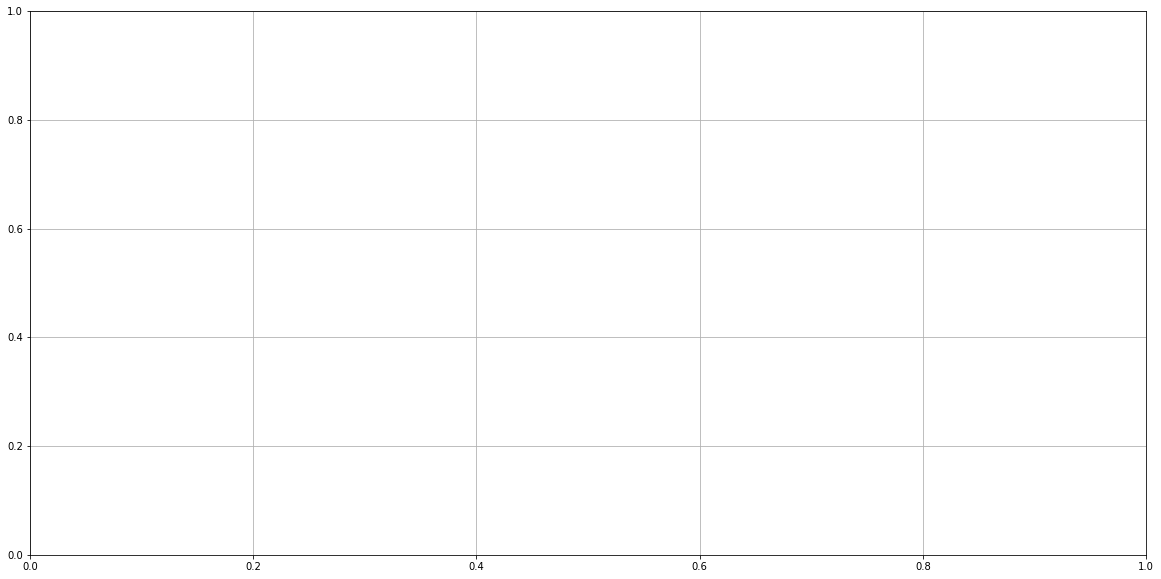

In [52]:
batch_size = range(10,100)
plt.figure(figsize=(20,10))
plt.grid(True)
plt.plot(batch_size,a_list,label='accuracy', linestyle='--',marker='o')
plt.plot(batch_size,p_list,label = 'precision', linestyle='--',marker='o')
plt.plot(batch_size, f_list,label = 'f1 score', linestyle='--',marker='o')
plt.plot(batch_size, r_list,label='Recall',linestyle='--',marker='o')
plt.xlabel('batch_size')
plt.ylabel('Performance')
plt.legend()
plt.show()

In [ ]:
print('best batch_size for accuracy:',batch_size[a_list.index(max(a_list))],'accuracy:',max(a_list))
print('best batch_size for precision:',batch_size[p_list.index(max(p_list))],'precision:',max(p_list))
print('best batch_size for f1_score:',batch_size[f_list.index(max(f_list))],'f1_score:',max(f_list))
print('best batch_size for recall:',batch_size[r_list.index(max(r_list))],'recall:',max(r_list))